# 주식분석

Last updated 202410

## 목차

* 1. 주식분석
* 2. 데이터 수집
* 3. 기본 지표
* 4. 기술 지표
* 5. 성과 지표
* 6. 백테스트 backtesting.py
  7. 기계학습 백테스트
* 8. BackTrader
* 9. 주가보고서 작성: chatGPT
* 10. 주가 예측
* 11. 포트폴리오
* 12. 트레이딩 프로그램

## 참고
- advances in financial machine learning
- see hello_finance.ipynb

# 1. 주식 분석, 필요해?

주식 분석은 주식의 가격, 가치, 추세, 그리고 시장의 여러 요인을 분석하여 투자 결정을 내리는 과정을 말한다.

주가가 오를 것인지 내릴 것인지 맞추기는 극히 어렵다. 오죽하면 램덤 워크, 술마시고 걷듯이 어디로 갈지 모른다고 했을까 싶다.

## 램덤 워크

랜덤 워크(Random Walk)는 주가 변동이 무작위적이기 때문에 미래 주가는 과거 주가에 의존하지 않고, 예측이 거의 불가능하다는 가설이다.

즉, 주가의 변동이 과거의 가격 패턴이나 다른 변수로는 설명할 수 없고, 오로지 무작위적인 사건들에 의해 결정된다는 뜻이다. 이 이론은 금융 시장에서 **효율적 시장 가설(EMH, efficient market hypothesis)**와 밀접하게 관련되어 있으며, 주식 가격이 모든 정보를 반영하고 있으므로 미래의 가격을 예측할 수 없다는 가정에 기반하고 있다.

랜덤 워크 가설의 주요 특징은:

- 무작위성: 주가의 변화는 독립적이며, 과거의 가격 변동과는 상관이 없다.
- 예측 불가능성: 주식 시장에서 발생하는 뉴스나 사건이 갑작스럽고 예측할 수 없기 때문에, 주가의 움직임도 예측이 불가능하다.
- 효율적 시장: 주가는 현재 모든 공시된 정보를 반영하고 있으므로, 새로운 정보만이 가격에 영향을 미친다. 하지만 그 정보는 무작위로 발생하며, 예측할 수 없다.

이 이론에 따르면, 기존의 주가 패턴이나 기술적 분석을 통해서 주식 가격을 예측하려는 시도는 효과가 없거나 무의미하다는 결론에 도달할 수 있다.

## 그럼에도 불구하고 분석이 필요할까?

랜덤 워크 가설이 주식 시장의 예측 불가능성을 강조하며, 단기적인 주가 움직임을 맞추는 것이 어렵다고 주장하지만, 그럼에도 불구하고 분석은 필요하다.

- 그러나 시장은 비효율적이다. 현실적으로는 시장이 과도하게 반응하거나, 비합리적으로 움직이는 비효율적인 순간들이 자주 발생한다. 이러한 비효율성을 탐지하고 기회를 찾으려면 기술적 분석과 기본적 분석이 유효하다.
- 시간을 사라: 랜덤 워크 가설은 단기적으로는 시장을 예측할 수 없다고 주장하지만, 장기적인 추세는 예측할 수 있는 경우가 많다. 주가가 오르는 추세에서 따라가고, 하락하는 추세에서 빠져나오는 대응이 유효하다. 따라서 시간을 사라는 관점에서, 장기적으로 시장에 참여하고 장기적 추세를 분석하는 것은 유효한 투자 전략이다.
- 리스크를 관리하라: 랜덤워크가 맞더라도 아무리 시장이 예측 불가능하더라도, 분석을 통해 리스크를 최소화하는 전략은 필요하다. 포트폴리오 분산하거나 자산에 대한 위험을 조정하려면 지표분석과 금융모델이 필수적이다.
- 기회를 탐지하자: 시장이 랜덤하게 움직이는 것처럼 보이더라도, 과거 데이터를 기반으로 백테스팅을 통해 검증된 투자 전략은 여전히 성과를 낼 수 있다. 과거에 성공적이었던 패턴이나 규칙을 기반으로 포지션을 취하는 것이나, 리스크 대비 수익을 극대화하는 전략은 데이터를 통해서만 도출할 수 있다.


## 주식 분석

주식 분석은 투자 결정을 내리는 데 필수적이고, 크게 나누어 기본적 분석 (Fundamental Analysis)과 기술적 분석 (Technical Analysis)으로 구분할 수 있다.

(1) 기본적 분석은 기업의 내재 가치를 평가하기 위해 그 기업의 재무 상태, 경영진, 경쟁 상황, 시장 환경 등을 조사하는 방법이다.

현재 주가가 내재가치에 비해 저평가 또는 고평가되었는지를 말해줄 수 있다.

장기적으로 주가는 기업의 내재 가치에 수렴하고, 내재가치가 높으면 장기적으로 성장한다고 여긴다.

기본 분석을 하기 위해 분석하는 요인들을 보자.
- 재무제표 분석: 손익계산서, 대차대조표, 현금흐름표 등을 분석하여 기업의 재정 상태와 수익성을 평가
- 재무 비율: P/E 비율, P/B 비율, ROE, 부채비율 등 다양한 재무비율을 평가
- 산업 분석: 기업이 속한 산업의 성장 가능성, 경쟁 강도, 규제 환경 등을 평가
- 경제 분석: 경제 성장률, 금리, 환율, 실업율 등의 거시경제 지표가 기업의 성과에 미치는 영향을 분석

(2) 기술적 분석은 주식의 가격과 거래량 데이터를 기반으로 미래 주가 움직임을 예측하는 방법이다.

뉴스나 재무정보보다 주가 자체에 중점을 둔다. 주가에는 모든 정보가 종합되어 있다고 여긴다.
역사적 패턴은 반복되며, 투자자의 심리와 행동으로 주가가 변동한다고 본다.

지표는 다음을 분석하여 나타낸다.
- 차트 패턴: 머리 어깨 패턴, 이중 바닥/천정, 깃발, 삼각형 패턴 등.
- 지표 및 오실레이터: 이동 평균, RSI, MACD, 볼린저 밴드 등.
- 지지선과 저항선: 주가가 하락하지 않는 수준(지지선)과 상승하지 않는 수준(저항선)을 식별
- 거래량 분석: 거래량의 변화를 통해 매수세와 매도세의 강도를 평가

## 과학적 투자

과학적 투자는 공포나 탐욕과 같은 감정에 치우치지 않고 데이터와 수학적 모델에만 의존해 객관적, 체계적 투자 결정을 내리는 방식을 의미한다. 

물론 주관적이나 과학적이나 어떤 투자이든 더 나은 성과를 목표로 하지만, 일관성있고 검증가능해야 한다.

과학적 투자의 핵심 요소는 다음과 같다.

(1) 데이터 기반 분석: 기본적, 기술적 지표를 계산하고 이를 분석한다.
(2) 수학적 모델: 통계적 방법, 기계학습 알고리즘을 사용해 수익률을 극대화하는 모델을 개발하고 적용한다.
(3) 투자전략의 규칙화: 수학적, 논리적 규칙에 따라 매매시점, 자산배분의 투자전략을 자동으로 결정한다. 감정적 판단을 배제하고, 수익률을 추구하는 동시에 손실을 제한하는 리스크 관리 전략을 포함한다.
(4) 백테스팅: 과거 데이터를 활용해 투자 전략을 검증하고, 실제 성과를 예측, 측정하여 전략의 유효성을 판단한다.


# 2. 데이터 수집

주가 데이터는 물론 손작업으로 가져올 수 있지만, 요즘 누가 그렇게 하겠는가. 프로그래밍으로 하면 자동으로 간편하게 가져올 수 있는데, 대표적인 몇 가지만 배워보자.

## 2.1 yfinance

Yahoo Finance 데이터를 편리하게 가져오기 위해 개발된 비공식 오픈 소스 Python 라이브러리이다. yfinance는 이전에 fix-yahoo-finance라는 이름으로 알려져 있었으며, Yahoo Finance API가 중단된 이후 이를 대체하기 위해 만들어졌다.

yfinance를 사용하면, Yahoo Finance에서 주식, 환율, 파생상품, 암호화폐 등 시계열 데이터를 편리하게 가져올 수 있다.

yfinance는 무료로 제공되어 일반적인 분석에 적합한 도구이다.

반면 실시간 트레이딩, 고빈도 매매, 애플리케이션 개발 등이 필요하면 전문가를 위한 도구를 사용할 수 있다 (예: Polygon.io, 실시간 데이터와 고급 기능에 대해 유료).

설치하려면 명령창에 pip install yfinance이라고 입력하고 실행한다.

티커 (Ticker)란 주식에 부여된 고유의 종목 코드이다. 
- 우리나라는 숫자로 (005930.KS와 같이 끝에 .KS를 붙여 사용)
- 미국은 알파벳으로
- 홍콩은 숫자와 알파벳의 혼합형식으로 구성되어 있다.

In [55]:
import yfinance as yf
ticker = yf.Ticker("005930.KS")

ticker.info는 많은 정보를 dict 형식으로 제공한다.

In [56]:
type(ticker.info)

dict

dict 타입은 key=value로 구성된다. 정보는 key를 통해서 가져오므로 어떤 key가 있는지 아는 것이 중요하다.

In [57]:
ticker.info.keys()

dict_keys(['address1', 'address2', 'city', 'zip', 'country', 'phone', 'fax', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'maxAge', 'priceHint', 'previousClose', 'regularMarketPreviousClose', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'marketCap', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'currency', 'enterpriseValue', 'forwardPE', 'profitMargins', 'floatShares', 'sharesOutstanding', 'heldPercentInsiders', 'heldPercentInstitutions', 'impliedSharesOutstanding', 'lastFiscalYearEnd', 'nextFiscalYearEnd', 'mostRecentQuarter', 'earningsQuarterlyGrowth', 'netIncomeToCommon'

따라서 특정 key의 value를 읽으려면, 배열[키]를 읽는 것처럼 다음과 같이 적는데, 'address1'를 읽어보자.

In [58]:
ticker.info['address1']

'129 Samsung-Ro'

Ticker get 함수를 사용해, 다양한 배당 등 재무정보를 출력할 수 있다.

In [59]:
ticker.get_financials()

2023-12-31  \
TaxEffectOfUnusualItems                                -22864080000.0   
TaxRateForCalcs                                                  0.24   
NormalizedEBITDA                                     50698344000000.0   
TotalUnusualItems                                      -95267000000.0   
TotalUnusualItemsExcludingGoodwill                     -95267000000.0   
NetIncomeFromContinuingOperationNetMinorityInte...   14473401000000.0   
ReconciledDepreciation                               38666559000000.0   
ReconciledCostOfRevenue                             180388580000000.0   
EBITDA                                               50603077000000.0   
EBIT                                                 11936518000000.0   
NetInterestIncome                                     3427769000000.0   
InterestExpense                                        930253000000.0   
InterestIncome                                        4358022000000.0   
NormalizedIncome                                     14545803920000.0   
NetIncomeFromContinuingAndDiscontinuedOperation      14473401000000.0   
TotalExpenses                                       252368518000000.0   
TotalOperatingIncomeAsReported                        6566976000000.0   
DilutedAverageShares                                     6791835289.0   
BasicAverageShares                                       6791835289.0   
DilutedEPS                                                     2131.0   
BasicEPS                                                       2131.0   
DilutedNIAvailtoComStockholders                                   NaN   
NetIncomeCommonStockholders                          14473401000000.0   
OtherunderPreferredStockDividend                                  NaN   
PreferredStockDividends                                           NaN   
NetIncome                                            14473401000000.0   
MinorityInterests                                    -1013699000000.0   
NetIncomeIncludingNoncontrollingInterests            15487100000000.0   
NetIncomeContinuousOperations                        15487100000000.0   
TaxProvision                                         -4480835000000.0   
PretaxIncome                                         11006265000000.0   
OtherNonOperatingIncomeExpenses                        157431000000.0   
SpecialIncomeCharges                                  -224513000000.0   
OtherSpecialCharges                                    224513000000.0   
NetNonOperatingInterestIncomeExpense                  3427769000000.0   
InterestExpenseNonOperating                            930253000000.0   
InterestIncomeNonOperating                            4358022000000.0   
OperatingIncome                                       6566976000000.0   
OperatingExpense                                     71979938000000.0   
DepreciationAndAmortizationInIncomeStatement          2338121000000.0   
Amortization                                           688786000000.0   
DepreciationIncomeStatement                           1649335000000.0   
ResearchAndDevelopment                               28339724000000.0   
SellingGeneralAndAdministration                      32678162000000.0   
SellingAndMarketingExpense                           26552163000000.0   
GeneralAndAdministrativeExpense                       6125999000000.0   
GrossProfit                                          78546914000000.0   
CostOfRevenue                                       180388580000000.0   
TotalRevenue                                        258935494000000.0   
OperatingRevenue                                    258935494000000.0   

                                                           2022-12-31  \
TaxEffectOfUnusualItems                                -25405600000.0   
TaxRateForCalcs                                                 0.275   
NormalizedEBITDA                                     86403532000000.0   
TotalUnusualItems                          

history() 함수는 Ticker 객체에 대해 호출되며, 단일 종목에 대한 데이터를 가져온다.

다음과 같은 인자를 정해줄 수 있다.
- period: 기간을 “1d”, “5d”, “1mo”, “3mo”, “6mo”, “1y”, “2y”, “5y”, “10y”, “ytd”, “max” 정할 수 있다.
- interval: 간격을 정해 줄 수 있다. 가능한 간격은 (1분(1m) 간격은 7일, 1일 미만은 60일로 제한된다)
“1m”, “2m”, “5m”, “15m”, “30m”, “60m”, “90m”, “1h”, “1d”, “5d”, “1wk”, “1mo”, “3mo”
- start, end: 'period'를 사용하지 않는 경우, yyyy-mm-dd 형식이거나 datetime
- auto_adjust: OHLC (Open/High/Low/Close prices) 자동 조정 Adj_close

OHLCV외 배당, 주식 분할 (Stock Split, 주식을 더 작은 단위로 나누는 것을 의미) 항목도 같이 출력되고 있다.

In [60]:
sse1 = ticker.history(interval='1d', period='1y')

In [557]:
sse1.head()

Open               High  \
Date                                                               
2023-10-04 00:00:00+09:00  66,482.36148148148 66,778.27703703703   
2023-10-05 00:00:00+09:00  66,383.72960785232 66,482.36813624437   
2023-10-06 00:00:00+09:00  66,186.44954427083  66,383.7265920928   
2023-10-10 00:00:00+09:00 65,298.703419145335   66,679.642766378   
2023-10-11 00:00:00+09:00  67,666.03067723606  68,455.1389067082   

                                          Low           Close    Volume  \
Date                                                                      
2023-10-04 00:00:00+09:00  65,791.89185185185        66,581.0  23361149   
2023-10-05 00:00:00+09:00      65,791.8984375  65,791.8984375  16108313   
2023-10-06 00:00:00+09:00     65,101.42578125 65,101.42578125  14386527   
2023-10-10 00:00:00+09:00 65,298.703419145335 65,495.98046875  19889202   
2023-10-11 00:00:00+09:00  66,975.56097644794  67,271.4765625  25209349   

                           Dividends  Stock Splits  
Date                                                
2023-10-04 00:00:00+09:00        0.0           0.0  
2023-10-05 00:00:00+09:00        0.0           0.0  
2023-10-06 00:00:00+09:00        0.0           0.0  
2023-10-10 00:00:00+09:00        0.0           0.0  
2023-10-11 00:00:00+09:00        0.0           0.0

download() 함수를 사용하면, Ticker 객체 대신 문자열을 입력해도 된다.
일자는 문자열 또는 datetime 객체로 설정해도 좋다.

In [558]:
import yfinance as yf

sse = '005930.KS'  #   삼성전자
start = '2020-01-01' # datetime.datetime(2020,1,1) (import datetime)
end = '2023-12-31' # datetime.datetime(2023,12,31)

sse2 = yf.download(sse, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [559]:
print(sse2.head())

               Open     High      Low    Close       Adj Close    Volume
Date                                                                    
2020-01-02 55,500.0 56,000.0 55,000.0 55,200.0   49,099.421875  12993228
2020-01-03 56,000.0 56,600.0 54,900.0 55,500.0 49,366.26953125  15422255
2020-01-06 54,900.0 55,600.0 54,600.0 55,500.0 49,366.26953125  10278951
2020-01-07 55,700.0 56,400.0 55,600.0 55,800.0 49,633.10546875  10009778
2020-01-08 56,200.0 57,400.0 55,900.0 56,800.0    50,522.59375  23501171


다운로드 데이터는 데이터프레임이다.

In [560]:
type(sse2)

pandas.core.frame.DataFrame

다운로드한 후, 분석을 위해서 저장해 놓을 수 있다.

In [603]:
yf.download("005930.KS", start="2010-01-01", end="2024-07-20").to_csv(os.path.join('data','sse2010_2024.csv'))

[*********************100%%**********************]  1 of 1 completed


파일이 생성되었는지 확인하자. 운영체제에 따라 명령어와 디렉토리 구분자에 차이가 있으니 주의한다 (리눅스/맥에서는 !ls data/sse2010_2024.csv)

In [604]:
!dir data\sse2010_2024.csv

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: BA86-B12A

 C:\Users\admin\Code\git\bb\jsl\pyds\data 디렉터리

2024-10-03  오전 08:19           240,844 sse2010_2024.csv
               1개 파일             240,844 바이트
               0개 디렉터리  348,477,911,040 바이트 남음


In [561]:
aapl = yf.download("AAPL", start="2023-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed


## 2.2 데이터프레임


### 인덱스
데이터프레임의 index는 일자를 쓰고 있는데, 시계열데이터는 흔히 그렇게 하고 있다.

In [562]:
sse2.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2023-12-14', '2023-12-15', '2023-12-18', '2023-12-19',
               '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-26',
               '2023-12-27', '2023-12-28'],
              dtype='datetime64[ns]', name='Date', length=985, freq=None)

이번 데이터는 일간 주가이므로, index는 datetime으로 정해지고 year, month, day 등으로 쉽게 분할할 수 있다.

In [563]:
sse2.index.year

Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='Date', length=985)

인덱스는 재설정할 수 있다.

In [564]:
data = {
    'Name': ['lim', 'kim', 'lee'],
    'Age': [25, 30, 35],
    'City': ['Seoul', 'Los Angeles', 'Tokyo']
}

_df = pd.DataFrame(data)

In [565]:
print(_df)

  Name  Age         City
0  lim   25        Seoul
1  kim   30  Los Angeles
2  lee   35        Tokyo


- set_index 특정 열을 인덱스로 설정하는 함수
- reset 인덱스를 기본값(0부터 시작하는 정수형 인덱스)으로 재설정하는 함수

In [566]:
_df_indexed = _df.set_index('Name')
print(_df_indexed)

      Age         City
Name                  
lim    25        Seoul
kim    30  Los Angeles
lee    35        Tokyo


drop=True는 특정한 행이나 열을 삭제할 때 관련된 인덱스를 삭제하거나 반환하지 않도록 하는 옵션이다. 주로 reset_index와 drop_duplicates 같은 함수에서 사용된다.

- drop=True로 설정하면 기존 인덱스를 데이터프레임에서 완전히 제거하고, 새로운 인덱스만 남긴다.
- drop=False로 하면, 기존 인덱스가 새로운 열로 데이터프레임에 추가된다.

In [567]:
_df_reset = _df_indexed.reset_index(level=0, drop=True)
print(_df_reset)

   Age         City
0   25        Seoul
1   30  Los Angeles
2   35        Tokyo


### 슬라이싱

- iloc은 정수기반 인덱싱, 행과 열의 숫자 위치를 사용해서 데이터를 조회. 범위 선택도 가능하다.
    - df.iloc[-1:])은 마지막 행부터 끝까지 출력 (데이터프레임으로), [-1]하면 마지막만을 출력한다 (Series로).
    - df.iloc[0, 1]는 첫 번째 행(0번째 행)과 두 번째 열(1번째 열)의 값을 반환한다.
- loc는 레이블 기반 인덱싱, 행 또는 열 이름을 사용해서 데이터를 선택한다.
- at은 loc와 비슷하게 레이블로 찾지만, 단일 값 선택에 최적화되어 속도가 더 빠르다.

In [568]:
print(_df.iloc[0][0]) # iloc은 인덱스 위치, 0번째를 검색

lim


C:\Users\admin\AppData\Local\Temp\ipykernel_6284\1325375955.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [569]:
print(_df.Name.iloc[0]) # iloc은 인덱스 위치, 0번째를 검색

lim


In [570]:
print(_df.loc[_df['Name']=='lim']['Age']) # 오류 print(_df.loc['Name']['Age'])

0    25
Name: Age, dtype: int64


loc에 정수를 쓰면, 정수레이블로 본다.

In [571]:
print(_df.loc[0]['Age']) #  loc은 인덱스의 레이블을 검색

25


### 마스크

마스크는 특정 조건을 만족하는 행을 선택하기 위해 사용하는 불리언 배열이다.

_abcd.A == 0의 결과는 불린이고, 그 마스크에 따라 필터링을 한다.

In [572]:
import pandas as pd
import numpy as np

d=np.array( [ [0,2,6,0], [6,1,5,2], [0,2,6,0], [9,3,2,2] ] )
_abcd=pd.DataFrame(d, columns=['A','B','C','D'])

mask = ~(_abcd.A == 0)
print(f"dataA!=0:\n{_abcd[mask]}")
#    A  B  C  D
# 1  6  1  5  2
# 3  9  3  2  2

print(f"dataA==0:\n{_abcd[(_abcd.A==0)]}")
#    A  B  C  D
# 0  0  2  6  0
# 2  0  2  6  0

dataA!=0:
   A  B  C  D
1  6  1  5  2
3  9  3  2  2
dataA==0:
   A  B  C  D
0  0  2  6  0
2  0  2  6  0


### 컬럼 삭제

inplace=True하면 원본을 직접 삭제한다.

-  inplace=True이면, 원본이 그 자리 (inplace)에서 작업이 일어나서 변경된다. 수정본이 반환되지 않는다.
-  반면에 inplace=False로 설정하면 (inplace=False가 기본 값이어서 굳이 설정하지 않아도 된다), 복사본이 생성되고 수정되기 때문에, 원본은 수정없이 보존되고, 복사본이 반환된다.


In [573]:
_abcd.drop('A', axis=1, inplace=True)  # inplace=True 원본 직접 수정
print(_abcd)

   B  C  D
0  2  6  0
1  1  5  2
2  2  6  0
3  3  2  2


이중괄호를 주의하자 .columns[[2]] 특정위치의 컬럼명을 지칭한다 (3번째).

- 첫 번째 괄호([])는 인덱싱이고, 이를 통해 df.columns에서 특정 위치의 값(열 이름)을 선택할 수 있다.
- 두 번째 괄호가 추가되는 이유는, [[2]]와 같이 리스트로 만들어 주는 역할인데, 여기서는 1개 이지만 여러 개의 열을 선택할 수 있기 때문이다.

In [574]:
_abcd.columns[[2]]

Index(['D'], dtype='object')

In [576]:
_abcd.columns[[1,2]] # 리스트에 여러 개 가능

Index(['C', 'D'], dtype='object')

In [253]:
#_abcd.drop(_abcd.columns[[2]], axis=1) # 3번쨰 컬럼
_abcd.drop(_abcd.columns[[2]], axis=1, inplace=True)
print(_abcd)

   B  C
0  2  6
1  1  5
2  2  6
3  3  2


In [254]:
print(f"data:drop1_3\n{_abcd.drop([1,3])}")

data:drop1_3
   B  C
0  2  6
2  2  6


### 컬럼 재명명

rename() 메소드는 딕셔너리 형식으로 기존 열 이름을 매핑하여 수정한다. 이때, inplace=True 옵션을 사용하면 원본을 직접 수정할 수 있다.


In [577]:
_abcd.rename(columns={'A': 'X', 'B': 'Y', 'C': 'Z'}, inplace=True) # 일부만 변경 가능

In [578]:
_abcd

Y  Z  D
0  2  6  0
1  1  5  2
2  2  6  0
3  3  2  2

대문자에서 소문자로 변환할 수 있다.

In [579]:
_abcd.rename(columns=str.lower, inplace=True)

In [581]:
_abcd.columns

Index(['y', 'z', 'd'], dtype='object')

columns을 직접 변경해도 된다. 기존 컬럼 순서를 그대로 유지하면서 이름만 수정하는 경우에 적합하다.
이 경우 일부는 안되고 전체를 변경해야 한다. rename()은 전체를 변경하지 않아도 된다.

In [582]:
_abcd.columns = ['yy', 'zz', 'dd'] #전체 변경해야 한다

In [583]:
_abcd.rename(index={1: '111'})

yy  zz  dd
0     2   6   0
111   1   5   2
2     2   6   0
3     3   2   2

### 컬럼 추가



인덱스의 년도만 선별해서 year 컬럼을 생성한다.

In [586]:
sse2['year'] = sse2.index.year

In [587]:
sse2.head()

Open     High      Low    Close       Adj Close    Volume  year
Date                                                                          
2020-01-02 55,500.0 56,000.0 55,000.0 55,200.0   49,099.421875  12993228  2020
2020-01-03 56,000.0 56,600.0 54,900.0 55,500.0 49,366.26953125  15422255  2020
2020-01-06 54,900.0 55,600.0 54,600.0 55,500.0 49,366.26953125  10278951  2020
2020-01-07 55,700.0 56,400.0 55,600.0 55,800.0 49,633.10546875  10009778  2020
2020-01-08 56,200.0 57,400.0 55,900.0 56,800.0    50,522.59375  23501171  2020

데이터는 Date, Open, High, Low, Close, Adj Close, Volume 7개 컬럼으로 구성되어 있다.
이 중 Open, High, Low, Close 4가지의 앞글자를 따서 ohlc라고 부르기도 한다.

'Close' 열은 pandas.core.series.Series이고, 이를 출력해보자.

Series는 1차원 배열로 데이터프레임의 개별 열 또는 행을 의미한다.

In [588]:
sse2['Close']

Date
2020-01-02   55,200.0
2020-01-03   55,500.0
2020-01-06   55,500.0
2020-01-07   55,800.0
2020-01-08   56,800.0
               ...   
2023-12-21   75,000.0
2023-12-22   75,900.0
2023-12-26   76,600.0
2023-12-27   78,000.0
2023-12-28   78,500.0
Name: Close, Length: 985, dtype: float64

In [589]:
type(sse2.Close)

pandas.core.series.Series

### map

map() 함수는 시리즈의 각 요소에 대해 함수를 적용한다. 데이터프레임이 아닌 시리즈에 사용된다.

lamda는 보통 한 줄짜리의 짧고 간단한 익명 함수를 정의하는 데 사용된다. 주로 apply, map, filter 등과 함께 사용된다.

In [590]:
_df =  pd.DataFrame([["+-1한글", "2", "+-3한글"], ["4", "5", "+-6한글"] ,["7", "+-8한글", "9"]])
_df[0] = _df[0].map(lambda x: x.lstrip('+-').rstrip('한글')) # 컬럼0에서만 거거
_df

0      1      2
0  1      2  +-3한글
1  4      5  +-6한글
2  7  +-8한글      9

- map()은 Series 객체에만 사용되므로, DataFrame에 대해 각 요소에 함수를 적용하려면 applymap()을 사용
- applymap()은 DataFrame의 각 요소에 대해 함수를 적용한다. applymap() 함수는 2.1.0 이후 제거된다고 했지만, 여전히 사용가능하다.

In [591]:
d=np.array( [ [0,2,6,0], [6,1,5,2], [0,2,6,0], [9,3,2,2] ] )
_abcd=pd.DataFrame(d, columns=['A','B','C','D'])

def even(x):
    return x if x%2==0 else x+1;

#even_df = _abcd.applymap(even) #applymap 제거됨
even_df_mapSer = _abcd.A.map(even)
even_df_mapDf = _abcd.map(even)
even_df_applymapDf = _abcd.applymap(even)
print(f"map A: {even_df_mapSer}\nmap df:\n{even_df_mapDf}\nappymap df:\n{even_df_applymapDf}")

map A: 0     0
1     6
2     0
3    10
Name: A, dtype: int64
map df:
    A  B  C  D
0   0  2  6  0
1   6  2  6  2
2   0  2  6  0
3  10  4  2  2
appymap df:
    A  B  C  D
0   0  2  6  0
1   6  2  6  2
2   0  2  6  0
3  10  4  2  2


C:\Users\admin\AppData\Local\Temp\ipykernel_6284\284555752.py:10: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



### apply

map() 함수가 요소별로 작동하는 반면, apply()는 데이터프레임의 행 또는 열에 적용되는데, 축(axis)을 기준으로 작업이 수행된다.

- 데이터프레임의 행(axis=0), 열(axis=1)에 적용된다.


apply()를 사용하여 각 열에 대해 map()을 적용하면 DataFrame 전체에 대해 함수를 적용할 수 있다.

In [592]:
#even_df = _abcd.apply(even) #오류
even_df = _abcd.apply(lambda col: col.map(even)) 
print(even_df)

    A  B  C  D
0   0  2  6  0
1   6  2  6  2
2   0  2  6  0
3  10  4  2  2


In [593]:
data = {
    'A': [1, 2, 3],
    'B': [11, 5, 7],
    'C': [22, 8, 9]
}

_df = pd.DataFrame(data)
result = _df.apply(sum)
print(result)

A     6
B    23
C    39
dtype: int64


In [594]:
f=lambda x: x.max() - x.min()
_df.apply(f)

A     2
B     6
C    14
dtype: int64

In [595]:
df_applied_row_ax_ = _df.apply(lambda row: row.sum())
df_applied_row_ax0 = _df.apply(lambda row: row.sum(), axis=0)
df_applied_row_ax1 = _df.apply(lambda row: row.sum(), axis=1)
print(f"--ax_:\n{df_applied_row_ax_} \n--ax0:\n{df_applied_row_ax0} \n--ax1:\n{df_applied_row_ax1}")

--ax_:
A     6
B    23
C    39
dtype: int64 
--ax0:
A     6
B    23
C    39
dtype: int64 
--ax1:
0    34
1    15
2    19
dtype: int64


주의:
- Numpy의 axis=0은 수직 축을 따라 행을 축소하여 연산이 수행되며, 각 열을 기준으로 값이 집계된다. 결과는 34, 15, 19이다.
- pandas의 axis=0은 행 방향으로 연산이 수행되며, 앞서 보듯이 결과는 6, 23, 39이다.

### resample, apply

일간을 주간으로 변경한다.

In [596]:
import pandas as pd

dates = pd.date_range('2023-01-01', periods=10, freq='D')
data = {'Close': [10, 11, 12, 13, 14, 13, 12, 11, 12, 13]}
_df10 = pd.DataFrame(data, index=dates)

# Resample to weekly frequency and calculate sum of 'Close' prices
df_weekly_sum = _df10['Close'].resample('W').apply(lambda x: x.sum())

print(df_weekly_sum)

2023-01-01    10
2023-01-08    86
2023-01-15    25
Freq: W-SUN, Name: Close, dtype: int64


### 컬럼 분할

split() 함수는 문자열을 ' '(공백)을 기준으로 분리하고, expand=True 새로운 열로 확장한다.

In [68]:
_df = pd.DataFrame({"Id": [34, 22, 19], 
                   "when":["2000/01/01", "2000/02/01", "2000/03/01 2000/04/01"]})

df_split = _df['when'].str.split(' ')

df_combined = pd.concat([_df[['Id']], df_split], axis=1)
print(df_combined)

   Id                      when
0  34              [2000/01/01]
1  22              [2000/02/01]
2  19  [2000/03/01, 2000/04/01]


"2000/03/01 2000/04/01" -> [2000/03/01, 2000/04/01]

이렇게 분리만 되었지, 셀 안에 리스트가 남겨졌다.

여러 열로 분리하려면 어떻게 해야할까?

(1) 컬럼으로 분리

- .apply(pd.Series, 1)하여 리스트를 개별 시리즈로 변환할 수 있다. 1은 axis=1을 의미하며, 이는 행 단위로 연산한다는 의미이다.
- .str.split(' ', expand=True)를 사용해도 동일한 결과를 얻을 수 있다.


In [600]:
df_split = _df['when'].str.split(' ').apply(pd.Series, 1) # 1은 axis=1을 의미
df_split.columns = ['Date1', 'Date2']
df_combined = pd.concat([_df[['Id']], df_split], axis=1)
print(df_combined)

   Id       Date1       Date2
0  34  2000/01/01         NaN
1  22  2000/02/01         NaN
2  19  2000/03/01  2000/04/01


C:\Users\admin\AppData\Local\Temp\ipykernel_6284\1132155910.py:1: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



(2) 컬럼분리하지 않고 행으로 쌓음

.stack()은 다차원 데이터에서 NaN이 아닌 값을 세로로 쌓아서 하나의 열로 병합할 수 있다.

In [601]:
df_split = _df['when'].str.split(' ', expand=True)
df_stacked = df_split.stack()
print(df_stacked)

0  0    2000/01/01
1  0    2000/02/01
2  0    2000/03/01
   1    2000/04/01
dtype: object


### pivot

pivot 함수는 데이터를 재구조화하기 위해 사용한다.

예제의 데이터프레임에서 Gender를 -> 상호배타적인 m,f을 재구조화하니까 NaN이 발생하고 있다.

인덱스를 지정하지 않고, pivot으로 재구조화를 해보자. 

In [459]:
import pandas as pd
_dfGT = pd.DataFrame({
    'Gender': ['f','f','m','f','m','m','f','m','f','m'],
    'TV': [3.4,3.5,2.6,4.7,4.1,4.0,5.1,4.0,3.7,2.1]
})

In [460]:
_dfGT.pivot(columns='Gender', values='TV')

Gender   f   m
0      3.4 NaN
1      3.5 NaN
2      NaN 2.6
3      4.7 NaN
4      NaN 4.1
5      NaN 4.0
6      5.1 NaN
7      NaN 4.0
8      3.7 NaN
9      NaN 2.1

pivot을 사용할 때 index는 비어 있으면 안 된다.

In [461]:
_dfGT['Index'] = _dfGT.index
_dfGT.pivot(index='Index', columns='Gender', values='TV')

Gender   f   m
Index         
0      3.4 NaN
1      3.5 NaN
2      NaN 2.6
3      4.7 NaN
4      NaN 4.1
5      NaN 4.0
6      5.1 NaN
7      NaN 4.0
8      3.7 NaN
9      NaN 2.1

- pivot은 데이터가 index-column 쌍이 유일하도록 정리된 형태여야 하고, 중복된 값이 없어야 한다. aggfunc이 가능하지 않다.
- 반면 중복 데이터 처리를 위해서는 pivot_table을 사용하는 것이 더 적합할 수 있고 aggfunc 함수를 사용해서 평균이나 합계를 계산할 수 있다.

In [463]:
_dfGT.pivot_table(index=_dfGT.index, columns='Gender', values='TV', aggfunc='mean')
#pivot = _dfGT.pivot(index=None, columns='Gender', values='TV')

Gender   f   m
0      3.4 NaN
1      3.5 NaN
2      NaN 2.6
3      4.7 NaN
4      NaN 4.1
5      NaN 4.0
6      5.1 NaN
7      NaN 4.0
8      3.7 NaN
9      NaN 2.1

### groupby

groupby()는 데이터를 그룹화하고 집계 연산을 수행하여, 평균이나 표준편차 등 통계 정보를 얻기 위해 사용한다.
    
groupby는 주로 그룹별 집계 및 요약을 위해, pivot은 데이터를 재구조화하여 시각화하거나 분석에 적합하게 만든다.

In [464]:
grouped = _dfGT.groupby('Gender')
print(grouped.describe())

          TV                                                           Index  \
       count               mean                std min 25% 50% 75% max count   
Gender                                                                         
f        5.0               4.08 0.7694153624668537 3.4 3.5 3.7 4.7 5.1   5.0   
m        5.0 3.3600000000000003 0.9396807968666806 2.1 2.6 4.0 4.0 4.1   5.0   

                                                   
       mean               std min 25% 50% 75% max  
Gender                                             
f       3.6 3.361547262794322 0.0 1.0 3.0 6.0 8.0  
m       5.4 2.701851217221259 2.0 4.0 5.0 7.0 9.0  


In [192]:
groupedMean = _dfGT.groupby('Gender').agg({'TV': 'mean'})

print(groupedMean)

          TV
Gender      
f       4.08
m       3.36


In [465]:
femaleVal = grouped.get_group('f').values

print(femaleVal)

[['f' 3.4 0]
 ['f' 3.5 1]
 ['f' 4.7 3]
 ['f' 5.1 6]
 ['f' 3.7 8]]


## 2.3 캔들스틱

캔들스틱 Candle Stick은 주식의 4가지 가격 Open, High, Low, Close을 흡사 캔들모양으로 그려준다.
- Open, Close는 개장, 폐장 가격을 막대로 그리고,
- High, Low는 최대, 최소 가격을 수평선으로 표시하고,
- 파란색은 주가상승, 빨간색은 주가하락을 나타낸다.

주가 상승, 하락의 색상은 나라별 문화 또는 관습의 차이로 서로 다르다.
- 미국은 일반적인 상승 녹색, 하락 빨간색
- 한국과 일본은 반대, 상승 빨간색 하락 파란색
- 중국은 상승 빨간색(중국에서는 좋은 의미) 하락 녹색

ohlc 시계열 그래프를 그려줄 수 있는 mplfinance (Matplotlib Finance)를 사용하자. 설정에 사용되는 변수는 다음과 같다.
- type:
    - type='candle': 캔들스틱 모양으로 그린다.
    - type='ohlc': 캔들스틱 모양을 open, high, low, and close 가격만 그린다.
    - type='line': close를 선 모양으로 그린다.
    - type='Renko', 'Point & Figure' 등: Renko, Point & Figure 등 특별한 기술분석에 사용되는 모양으로 그린다.
- style: 'yahoo', 'charles', 'mike', 'classic' 등 챠트의 스타일을 정한다.
- volume: volume 거래량 챠트를 별도로 포함할 지 설정한다.
- addplot: 이동평균 등 메인챠트 위에 얹어서 그릴지 설정한다. mav (3, 6, 9)
- figscale: 크기를 설정한다.
- title: 챠트 제목을 설정한다.

설치하려면 pip install mplfinance를 명령창에 입력한다.

!pip install mplfinance

많은 분량의 데이터를 챠트로 작성하면 경고가 뜬다. 일부 슬라이싱해서 olhc 챠트를 그려보자.

numpy 오류가 발생할 수 있으니, 버전을 확인하자:
- mplfinance == 0.12
- numpy == 1.24.1

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from font(s) Arial.

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) Arial.



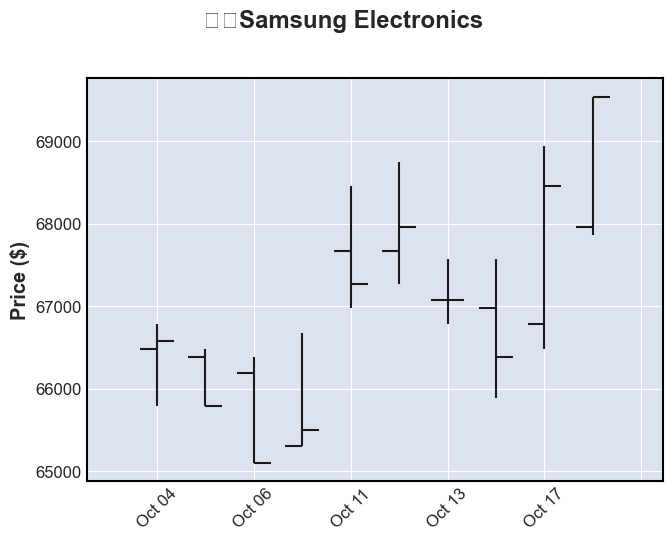

In [602]:
import mplfinance as mpf

mpf.plot(sse1[:10],
         type='ohlc', #candle,
         title="삼성Samsung Electronics", #한글출력은 한글폰트 필요
         ylabel='Price ($)'
)

한글 폰트 설치
- 한글 폰트가 설치된 경로는 운영체제별로 다르다.

In [387]:
import matplotlib.font_manager as fm
fm.findSystemFonts(fontpaths=None, fontext='ttf')[:3] # 경로 확인, 3개만 출력

['C:\\Windows\\Fonts\\segoesc.ttf',
 'C:\\Windows\\Fonts\\LBRITEI.TTF',
 'C:\\Windows\\Fonts\\ERASDEMI.TTF']

폰트 파일 다운로드:

- 네이버 클라우드 한글 폰트 다운로드 페이지에서 나눔고딕 폰트를 다운로드 (예: 나눔고딕 (NanumGothic), 맑은 고딕 (Malgun Gothic))
- 다운로드한 .ttf 파일을 별도 디렉토리를 만들어 복사해도 된다. Windows에서 폰트를 C:\Windows\Fonts\ 시스템 경로에 넣으면 시스템에 자동으로 등록되며, 바로 사용할 수 있다. 그러나 **matplotlib**에서 그 폰트를 사용하기 위해서는 폰트를 명시적으로 설정해 주는 것이 일반적이다. 그렇지 않으면 matplotlib는 여전히 기본 폰트인 Arial, DejaVu Sans 등을 사용할 수 있기 떄문이다.
- 폰트 캐시를 업데이트한다. Windows 시스템 폰트 캐시는 컴퓨터를 재부팅하면 대부분 자동으로 업데이트된다.
- 챠트를 그려서 한글이 출력되면 설정이 잘 되었다는 의미이다.

In [ ]:
from matplotlib import font_manager, rc
# (1) 폰트 이름으로 설정하는 경우
rc('font', family='Malgun Gothic')  # 'Malgun Gothic' 폰트 설정

# (2) 폰트 경로 (.ttf)를 직접 설정하는 경우
#font_path = 'C:/Windows/Fonts/malgun.ttf'
#font_name = font_manager.FontProperties(fname=font_path).get_name()
#rc('font', family=font_name)

sse1 데이터 (축소 분량으로) ohlc 챠트에 이동평균선을 얹어 보자 (mav=(5,20)). 이번에는 거래량을 같이 표시하지만, 별도의 바챠트로 작성되고 있다.

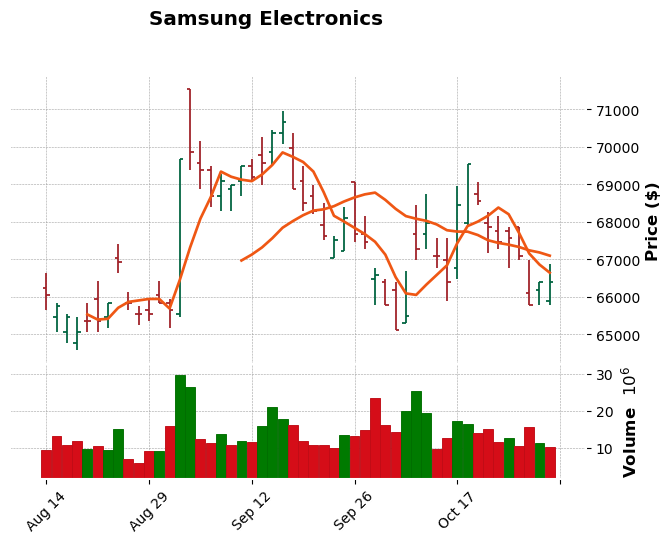

In [20]:
import mplfinance as mpf

mpf.plot(sse1[:50],
         type='ohlc',
         style = 'charles',
         volume = True,
         mav=(5,20),
         title="Samsung Electronics", #한글출력은 한글폰트 필요
         ylabel='Price ($)'
)

Pandas의 기능으로 그려보기

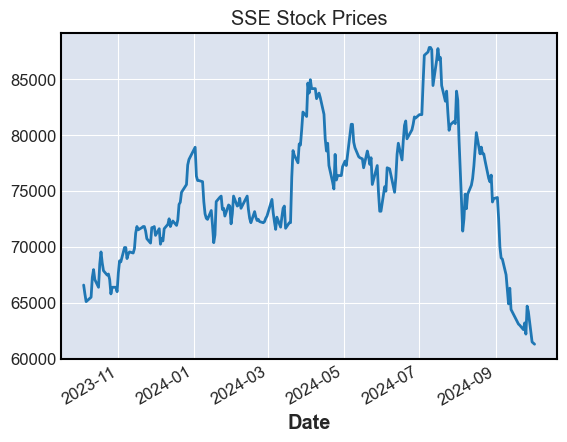

In [606]:
sse1['Close'].plot()
plt.title("SSE Stock Prices")
plt.show()

## 2.4 FinanceDataReader

FinanceDataReader는 오픈소스(https://github.com/FinanceData/FinanceDataReader)이고 yfinance와 비슷하게 미국, 유럽, 아시아 등을 대상으로 주식, ETF, 환율, 암호화폐 등 시장 데이터를 제공한다.

그러나 FinanceDataReader 한국 시장 (KRX)관련 데이터를 얻는데 보다 유리하다고 봐야 한다.

다음과 같이 설치하는데, plotly는 chart.plot()에 필요하다.

!pip install finance-datareader
!pip install plotly

In [609]:
import FinanceDataReader as fdr
usdKrw=fdr.DataReader('USD/KRW', '2023-01-01', '2023-12-01') #환율

HTTP Error 401: Unauthorized  - symbol "USD/KRW" not found or invalid periods


JPMorgan Equity Premium Income 미국 주식 데이터를 가져와 보자.

In [614]:
jepi = yf.download('JEPI', start='2023-01-01', end='2023-12-01')
#jepi=fdr.DataReader('JEPI', '2023-01-01', '2023-12-01')  #Error 401: symbol "JEPI" not found or invalid periods

[*********************100%%**********************]  1 of 1 completed


한국주가를 읽어와 보자.

In [41]:
sse2000_now=fdr.DataReader('005930') # ses 005930
sse2023=fdr.DataReader('005930', '20230101', '20231231')

csv 파일로 저장할 수 있다.

In [42]:
sse2023.to_csv('data/sse2023.csv')

In [43]:
sse2023.head()

Open   High    Low  Close    Volume    Change
Date                                                      
2023-01-02  55500  56100  55200  55500  10031448  0.003617
2023-01-03  55400  56000  54500  55400  13547030 -0.001802
2023-01-04  55700  58000  55600  57800  20188071  0.043321
2023-01-05  58200  58800  57600  58200  15682826  0.006920
2023-01-06  58300  59400  57900  59000  17334989  0.013746

7개 컬럼이지만 마지막이 Change이고, 종가의 변화율을 말한다.

pct_change() 함수로 종가에 대해 변화율을 계산하면 동일한 값을 출력하고 있다.

In [47]:
sse2023['pct_change']=sse2023.Close.pct_change()

In [48]:
sse2023.head()

Open   High    Low  Close    Volume    Change  pct_change
Date                                                                  
2023-01-02  55500  56100  55200  55500  10031448  0.003617         NaN
2023-01-03  55400  56000  54500  55400  13547030 -0.001802   -0.001802
2023-01-04  55700  58000  55600  57800  20188071  0.043321    0.043321
2023-01-05  58200  58800  57600  58200  15682826  0.006920    0.006920
2023-01-06  58300  59400  57900  59000  17334989  0.013746    0.013746

In [49]:
krxAll=fdr.StockListing('KRX') # stock listing of krx

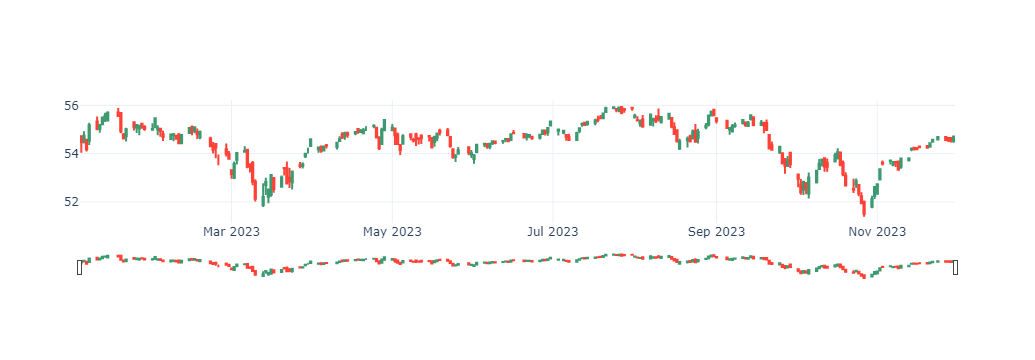

In [615]:
import plotly.graph_objects as go

candlestick = go.Candlestick(
                            x=jepi.index,
                            open=jepi['Open'],
                            high=jepi['High'],
                            low=jepi['Low'],
                            close=jepi['Close']
                            )

fig = go.Figure(data=[candlestick])

fig.show()

Layout과 스타일을 조정할 수 있다.

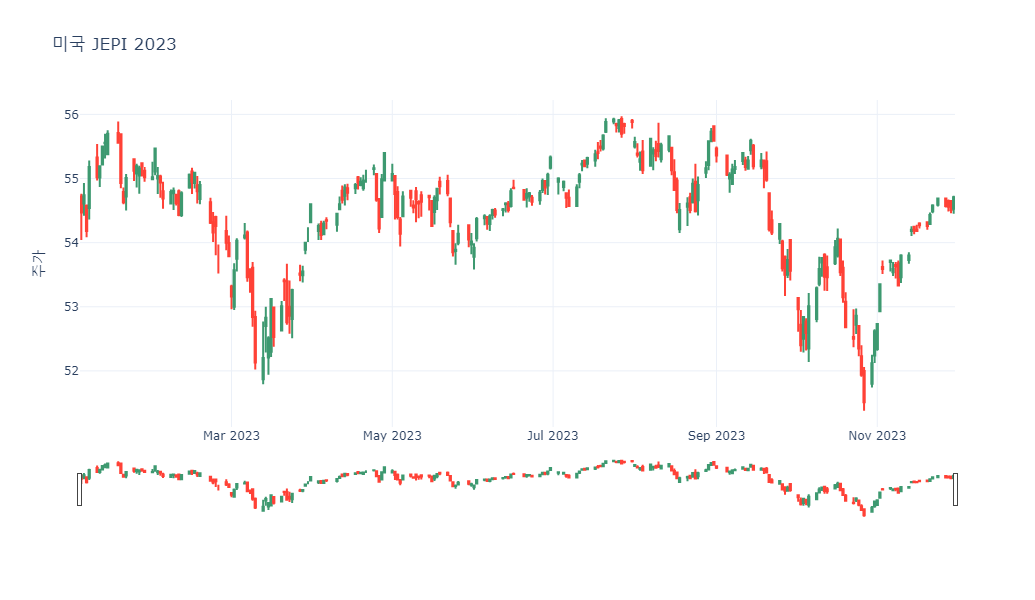

In [618]:
fig.update_layout(
    width=800, height=600,
    title="미국 JEPI 2023",
    yaxis_title='주가'
)
fig.show()

## 2.5 Pandas data reader

앞서 소개한 yfinance, FinanceDataReader와 비슷하게 금융데이터를 제공하는 라이브러리이지만, Yahoo Finance, Google Finance, FRED (Federal Reserve Economic Data) 등 다양한 소스를 지원한다.

- AlphaVantage
- Federal Reserve Economic Data (FRED)
- Fama-French Data (Ken French’s Data Library)
- Bank of Canada
- Econdb - 경제 시계열
- Enigma - 공공데이터
- Eurostat
- The Investors Exchange (IEX) - 과거 주가 데이터, 인증키 필요 (os.environ["IEX_API_KEY"] 설정) 
- Moscow Exchange (MOEX)
- NASDAQ
- Naver Finance
- Organisation for Economic Co-operation and Development (OECD)
- Quandl -  Quandl에서 제공하는 일일 주가, ET, 인증키 필요 (os.environ['QUANDL_API_KEY'] 설정)
- Stooq.com
- Tiingo
- Thrift Savings Plan (TSP)
- World Bank - 세계 은행 GDP 관련 데이터
- Yahoo Finance - 야후에서 제공하는 주식, 배당금 데이터

원래 pandas_datareader는 Yahoo Finance API를 사용해 데이터를 가져왔지만, Yahoo Finance가 2017년에 API 서비스를 중단하면서 기본 지원이 중단되었디. 그러나 일부 우회 방법으로 여전히 Yahoo Finance 데이터를 사용할 수 있다.

pip install pandas_datareader

### FRED 데이터 가져오기

FRED 미국 실업률, GDP를 가져와보자.

In [466]:
import pandas_datareader as pdr

# FRED에서 미국 실업률(UNRATE) 가져오기
_df_unemployment = pdr.get_data_fred('UNRATE')
print(_df_unemployment.head())

            UNRATE
DATE              
2019-10-01     3.6
2019-11-01     3.6
2019-12-01     3.6
2020-01-01     3.6
2020-02-01     3.5


In [467]:
import pandas_datareader as pdr

# FRED API에서 GDP 데이터 가져오기
_df_fred = pdr.get_data_fred('GDP')
print(_df_fred.tail())

                  GDP
DATE                 
2023-04-01 27,453.815
2023-07-01 27,967.697
2023-10-01 28,296.967
2024-01-01 28,624.069
2024-04-01 29,016.714


In [468]:

from datetime import datetime
fred_code = 'UNRATE' # 'GDP
start_date = datetime(2023, 1, 1)
#end_date = datetime(2024, 7, 31
end_date = datetime(2023, 12, 31)
_df_fred = pdr.DataReader(fred_code, 'fred', start_date, end_date)
_df_fred

UNRATE
DATE              
2023-01-01     3.4
2023-02-01     3.6
2023-03-01     3.5
2023-04-01     3.4
2023-05-01     3.7
2023-06-01     3.6
2023-07-01     3.5
2023-08-01     3.8
2023-09-01     3.8
2023-10-01     3.8
2023-11-01     3.7
2023-12-01     3.7

### World Bank

GDP per capita in constant 2010 U.S. dollars.

In [469]:
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const') # "gdp", "capita", "constant"와 관련된 지표를 정규표현식으로 검색

_wb = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2015, end=2023)

C:\Users\admin\AppData\Local\Temp\ipykernel_6284\2823350988.py:4: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [470]:
print(_wb)

                      NY.GDP.PCAP.KD
country       year                  
Canada        2023 44,388.4029989751
              2022 45,227.1447354204
              2021 44,359.6167266713
              2020 42,366.1285192527
              2019 45,100.2914903262
              2018 44,907.3436837248
              2017 44,339.3886692751
              2016 43,551.3426018259
              2015 43,594.1941045394
Mexico        2023 10,326.9538532988
              2022 10,078.6025419466
              2021 9,756.85862179455
              2020 9,279.04949552593
              2019  10,228.980944107
              2018 10,343.3534302908
              2017 10,240.3104275695
              2016 10,161.3557094782
              2015  10,098.173182095
United States 2023 65,020.3529285737
              2022 63,720.7641611959
              2021 62,741.0018131151
              2020  59,394.778327105
              2019 61,330.6459767318
              2018 60,127.2102775233
              2017 58,703.1440782154
 

## 2.6 Alpha Vantage

Alpha Vantage는 미국 주식 및 글로벌 주식을 지원하지만, **한국 주식(KRX)**에 대한 지원은 명확하게 제공되지 않는다.

한국 주식의 티커를 조회하려면, 한국의 pykrx 또는 Yahoo Finance API를 사용한다.

금융데이터를 가져올 수 있는 라이브러리로 Alpha Vantage가 또 다른 대안이 될 수 있다.

사용하려면 API 키가 필요하다. API 키는 무료로 제공되며, 등록 후 사용하면 된다 (무료는 제한된 호출량: 분당 5회, 하루 500회)
Alpha Vantage는 주식, 외환, 암호화폐 뿐만 아니라 (실시간 포함하여 폭넓은 데이터를 제공한다), 특히 다양한 기술 지표 (예: 이동 평균, MACD, RSI 등)와 경제 데이터를 제공한다는 장점이 있다.

JSON이나 CSV 형식으로 데이터를 반환하며, Pandas DataFrame으로 쉽게 변환할 수 있다.


In [148]:
%%writefile src/key.properties
dataseoul=73725974496a736c34395757705847
gokr=DRcvXV9pTVecnxe3K%2BG5G6CWZQM0BsXkQThwxpjDsnnyM9QIAuL89RLupk4dDmxk3BgWnfAJSQ%2B4atSNvIDA8g%3D%3D
dart=6c7eeeca018231e02294002a03efded1f0e595ef
alpha=X75SEDLQKYDXNY3T

Overwriting src/key.properties


In [70]:
import os
import src.mylib

keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
key=src.mylib.getKey(keyPath)

In [71]:
key

{'dataseoul': '73725974496a736c34395757705847',
 'gokr': 'DRcvXV9pTVecnxe3K%2BG5G6CWZQM0BsXkQThwxpjDsnnyM9QIAuL89RLupk4dDmxk3BgWnfAJSQ%2B4atSNvIDA8g%3D%3D',
 'dart': '6c7eeeca018231e02294002a03efded1f0e595ef',
 'alpha': 'X75SEDLQKYDXNY3T'}

In [72]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=REAL_GDP&interval=annual&apikey=demo'
r = requests.get(url)
data = r.json()
pd.DataFrame(data['data'])

date      value
0   2023-01-01  22671.096
1   2022-01-01  22034.828
2   2021-01-01  21494.798
3   2020-01-01  20267.585
4   2019-01-01  20715.671
..         ...        ...
90  1933-01-01    877.431
91  1932-01-01    888.414
92  1931-01-01   1019.977
93  1930-01-01   1089.785
94  1929-01-01   1191.124

[95 rows x 2 columns]

In [73]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey='+key['alpha']+'&datatype=json'
r = requests.get(url)

In [ ]:
data = r.json()

In [75]:
data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [76]:
print(pd.DataFrame(data['Time Series (Daily)']))

          2024-10-10 2024-10-09 2024-10-08 2024-10-07 2024-10-04 2024-10-03  \
1. open     235.1000   229.2000   228.1100   225.3800   223.7500   219.5000   
2. high     235.8300   234.9500   229.3450   227.6700   226.0800   222.8300   
3. low      231.8100   228.5000   227.0401   225.0200   223.2700   219.2700   
4. close    233.0200   234.3000   228.6200   227.1200   226.0000   222.7200   
5. volume    3131250    5083566    3245342    3457952    3554328    3788265   

          2024-10-02 2024-10-01 2024-09-30 2024-09-27  ... 2024-06-03  \
1. open     218.3100   220.6300   220.6500   223.0000  ...   166.5400   
2. high     220.2000   221.1000   221.3200   224.1500  ...   166.7800   
3. low      215.7980   215.9000   219.0200   220.7700  ...   163.5300   
4. close    219.7300   219.3500   221.0800   220.8400  ...   165.2800   
5. volume    3343399    3548374    3544264    3830335  ...    2776058   

          2024-05-31 2024-05-30 2024-05-29 2024-05-28 2024-05-24 2024-05-23  \
1. open

해당 코드는 Alpha Vantage API를 통해 주식 심볼(symbols) 리스트에 대한 1시간 단위(Time Series Intraday) 데이터를 가져와서, 각 시간 간격의 **2. 고가(high)**와 **5. 거래량(volume)**을 출력해보자.

Alpha Vantage의 지원 시간 간격(interval)
- 분 단위: 1분 (1min), 5분 (5min), 15분 (15min), 30분 (30min), 60분 (60min)
- 일별(daily), 주간(weekly), 월간(monthly)


In [628]:
import requests
import json

API_URL = "https://www.alphavantage.co/query" 
symbols = ['QCOM', 'INTC'] #퀄컴, 인텔
api_key = key['alpha']

for symbol in symbols:
    params = {
        "function": "TIME_SERIES_INTRADAY",
        "symbol": symbol,
        "interval": "60min",
        "datatype": "json",
        "apikey": api_key
    }
    
    response = requests.get(API_URL, params)
    
    if response.status_code == 200:  # 성공적으로 데이터를 받아왔는지 확인
        jr = response.json()
        #print(f"Response for {symbol}: {json.dumps(jr, indent=4)}") # 테스트출력
        if "Time Series (60min)" in jr:
            time_series = jr['Time Series (60min)']
            for time_point, values in time_series.items():
                high = values['2. high']
                volume = values['5. volume']
                print(f"종목: {symbol} | 시간: {time_point} | High: {high} | Volume: {volume}")
        else:
            print(f"오류 {symbol}: {jr.get('Error Message', 'Unknown Error')}")
    else:
        print(f"HTTP 오류 {symbol}. 코드: {response.status_code}")

종목: QCOM | 시간: 2024-10-01 19:00:00 | High: 165.7800 | Volume: 2639
종목: QCOM | 시간: 2024-10-01 18:00:00 | High: 166.4400 | Volume: 3478
종목: QCOM | 시간: 2024-10-01 17:00:00 | High: 166.0000 | Volume: 167411
종목: QCOM | 시간: 2024-10-01 16:00:00 | High: 166.8150 | Volume: 3763628
종목: QCOM | 시간: 2024-10-01 15:00:00 | High: 167.2660 | Volume: 1622921
종목: QCOM | 시간: 2024-10-01 14:00:00 | High: 167.4000 | Volume: 441909
종목: QCOM | 시간: 2024-10-01 13:00:00 | High: 166.2300 | Volume: 597287
종목: QCOM | 시간: 2024-10-01 12:00:00 | High: 166.7450 | Volume: 492898
종목: QCOM | 시간: 2024-10-01 11:00:00 | High: 166.6900 | Volume: 842789
종목: QCOM | 시간: 2024-10-01 10:00:00 | High: 166.8300 | Volume: 1240321
종목: QCOM | 시간: 2024-10-01 09:00:00 | High: 170.2900 | Volume: 774248
종목: QCOM | 시간: 2024-10-01 08:00:00 | High: 171.0375 | Volume: 6867
종목: QCOM | 시간: 2024-10-01 07:00:00 | High: 170.9800 | Volume: 22318
종목: QCOM | 시간: 2024-10-01 06:00:00 | High: 170.8900 | Volume: 197
종목: QCOM | 시간: 2024-10-01 05:00:00 | High

## 2.7 DART-fss

금융감독원 DART (https://opendart.fss.or.kr) 에서 공시정보를 제공하고 있다.
인증키가 필요하다.

### 라이브러리 dart-fss

공시정보 pip install dart-fss

!pip install dart-fss #dart-fss-0.4.10

In [ ]:
%%writefile src/key.properties
dataseoul=73725974496a736c34395757705847
gokr=DRcvXV9pTVecnxe3K%2BG5G6CWZQM0BsXkQThwxpjDsnnyM9QIAuL89RLupk4dDmxk3BgWnfAJSQ%2B4atSNvIDA8g%3D%3D
dart=6c7eeeca018231e02294002a03efded1f0e595ef

In [ ]:
import os
import src.mylib

keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
key=src.mylib.getKey(keyPath)

In [137]:
import dart_fss as dart

# OPENDART API KEY
api_key=key['dart']
dart.set_api_key(api_key=api_key)

'6c7eeeca018231e02294002a03efded1f0e595ef'

In [138]:
corp = dart.get_corp_list()

In [139]:
sse = corp.find_by_corp_name('삼성전자', exactly=True)[0]

In [147]:
dart.api.filings.get_corp_info(sse.corp_code)

{'status': '000',
 'message': '정상',
 'corp_code': '00126380',
 'corp_name': '삼성전자(주)',
 'corp_name_eng': 'SAMSUNG ELECTRONICS CO,.LTD',
 'stock_name': '삼성전자',
 'stock_code': '005930',
 'ceo_nm': '한종희',
 'corp_cls': 'Y',
 'jurir_no': '1301110006246',
 'bizr_no': '1248100998',
 'adres': '경기도 수원시 영통구  삼성로 129 (매탄동)',
 'hm_url': 'www.samsung.com/sec',
 'ir_url': '',
 'phn_no': '02-2255-0114',
 'fax_no': '031-200-7538',
 'induty_code': '264',
 'est_dt': '19690113',
 'acc_mt': '12'}

In [ ]:
연결재무제표 XBRL을 내려받으려면 시간이 몇 분 정도 꽤 걸린다.

save() 함수를 제공하고 있으니, 저장해놓고 사용하는 편이 좋다.

In [143]:
fs = sse.extract_fs(bgn_de='20180101')

Annual reports:   0%|          | 0/7 [00:00<?, ?report/s]

In [146]:
type(fs)

dart_fss.fs.fs.FinancialStatement

### dart openAPI

금융감독원 dart에서 공시정보를 제공하고 있다.

정기보고서 재무정보 https://opendart.fss.or.kr/api/fnlttSinglAcntAll.json

개방 인증키를 사용해도 데이터를 가져온다.

In [130]:
import requests

url = 'https://opendart.fss.or.kr/api/fnlttSinglAcntAll.json'

params = {
    'crtfc_key': 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx', #key['dart']
    'corp_code' : '00126380',
    'bsns_year' : 2021,
    'reprt_code' : '11011', #1분기보고서: 11013 반기보고서: 11012 3분기보고서: 11014 사업보고서: 11011
    'fs_div' : 'CFS'  #CFS:연결재무제표, OFS:재무제표
}

results = requests.get(url, params=params).json()

results json의 k:v 구성은 다음과 같다.

```
{'status': '000',
 'message': '정상',
 'list': [{'rcept_no': '20220308000798',
   'reprt_code': '11011',
   'bsns_year': '2021',
   'corp_code': '00126380',
   'sj_div': 'BS',
   'sj_nm': '재무상태표',
   'account_id': 'ifrs-full_CurrentAssets',
   'account_nm': '유동자산',
   'account_detail': '-',
   'thstrm_nm': '제 53 기', --> 당기명 
   'thstrm_amount': '218163185000000', --> 당기금액 
   'frmtrm_nm': '제 52 기', --> 전기명
   'frmtrm_amount': '198215579000000', --> 전기금액
   'bfefrmtrm_nm': '제 51 기', --> 전전기명
   'bfefrmtrm_amount': '181385260000000', --> 전전기금액
   'ord': '1', --> 계정과목 정렬순서
   'currency': 'KRW'},...]
}
```

In [131]:
results['list'][0]

{'rcept_no': '20220308000798',
 'reprt_code': '11011',
 'bsns_year': '2021',
 'corp_code': '00126380',
 'sj_div': 'BS',
 'sj_nm': '재무상태표',
 'account_id': 'ifrs-full_CurrentAssets',
 'account_nm': '유동자산',
 'account_detail': '-',
 'thstrm_nm': '제 53 기',
 'thstrm_amount': '218163185000000',
 'frmtrm_nm': '제 52 기',
 'frmtrm_amount': '198215579000000',
 'bfefrmtrm_nm': '제 51 기',
 'bfefrmtrm_amount': '181385260000000',
 'ord': '1',
 'currency': 'KRW'}

In [127]:
results['list'][0]['corp_code']

'00126380'

In [ ]:
if results['status'] == '000':
    result_df = pd.DataFrame(results['list'])
    #result_all = pd.concat([result_all,result_df])

In [134]:
result_df.head(3)

rcept_no reprt_code bsns_year corp_code sj_div  sj_nm  \
0  20220308000798      11011      2021  00126380     BS  재무상태표   
1  20220308000798      11011      2021  00126380     BS  재무상태표   
2  20220308000798      11011      2021  00126380     BS  재무상태표   

                                          account_id account_nm  \
0                            ifrs-full_CurrentAssets       유동자산   
1                   ifrs-full_CashAndCashEquivalents   현금및현금성자산   
2  dart_ShortTermDepositsNotClassifiedAsCashEquiv...     단기금융상품   

  account_detail thstrm_nm    thstrm_amount frmtrm_nm    frmtrm_amount  \
0              -    제 53 기  218163185000000    제 52 기  198215579000000   
1              -    제 53 기   39031415000000    제 52 기   29382578000000   
2              -    제 53 기   81708986000000    제 52 기   92441703000000   

  bfefrmtrm_nm bfefrmtrm_amount ord currency thstrm_add_amount  
0       제 51 기  181385260000000   1      KRW               NaN  
1       제 51 기   26885999000000   2      KRW               NaN  
2       제 51 기   76252052000000   3      KRW               NaN

## 2.8 pykrx

한국거래소(KRX)는 공식적인 주식 시장 데이터를 API로 제공하지는 않는다. yfinance, pykrx 등은 비공식적으로 데이터를 제공하고 있다.

pykrx는 한국거래소(KRX), 네이버에서 데이터를 가져와서 제공하는 라이브러리이다.
한국 주식 시장(KOSPI, KOSDAQ, KONEX)에 특화되어 아래와 같은 데이터를 제공한다.

- 시가, 고가, 저가, 종가, 거래량, 거래대금, 등락율
- 종목별, 일자별 div, bps, per, eps
- 기관, 개인, 외국인별 거래대금
- 종목별 시가총액
- 공매도 정보
- ETF, ETN, 채권

주의: 주가 데이터만 액면분할이 조정되어 있고 PER, EPS 등의 데이터에는 반영되어 있지 않다.

!pip install pykrx

### 종목코드 조회

모든 코드를 가져온다.

In [75]:
from pykrx import stock

In [76]:
stock_code = stock.get_market_ticker_list(date="20221104", market="ALL")

현재 2562 종목이 등록되어 있다.

In [78]:
len(stock_code)

2670

In [ ]:
KOSPI에는 923종목이 등록되어 있다.

In [79]:
stock_code = stock.get_market_ticker_list(date="20210520", market="KOSPI")

In [58]:
len(stock_code)

923

### 주가데이터 조회

get_market_ohlcv() 함수는 시작일, 종료일, 티커를 입력받아 일자별 OHLCV를 출력한다.

frequency 파라미터(d/m/y)를 추가할 수 있는데, d는 일자, m은 월, y는 연도를 의미한다.

stock.get_market_ohlcv("20200810", "20201212", "005930", "m")

In [471]:
#_dfK = stock.get_market_ohlcv_by_date(fromdate="20240901", todate="20240923", ticker="005930")
_dfK = stock.get_market_ohlcv(fromdate="20240901", todate="20240923", ticker="005930")
print(_dfK.head(3))

               시가     고가     저가     종가       거래량                 등락률
날짜                                                                  
2024-09-02  74500  74700  73500  74400  12641376 0.13458950201884254
2024-09-03  74100  74300  72500  72500  16314599  -2.553763440860215
2024-09-04  69800  71100  69800  70000  27366563 -3.4482758620689653


In [472]:
_dfK = stock.get_market_ohlcv("20240720", "20240910", "005930")
print(_dfK.head(3))

               시가     고가     저가     종가       거래량                 등락률
날짜                                                                  
2024-07-22  84400  84900  82600  83000  18987560 -1.6587677725118484
2024-07-23  84200  84700  83400  83900  15766389  1.0843373493975903
2024-07-24  82900  83300  81900  82000  16939083  -2.264600715137068


### 거래실적 추이 (거래량)

In [473]:
_dfK = stock.get_market_trading_volume_by_date("20210115", "20210122", "005930")
print(_dfK.head())

               기관합계    기타법인       개인    외국인합계  전체
날짜                                               
2021-01-15 -5006115  288832  7485785 -2768502   0
2021-01-18   505669  262604   151228  -919501   0
2021-01-19  1139258  -34023 -2044543   939308   0
2021-01-20 -4157919  262408  4917655 -1022144   0
2021-01-21  -712099 -321732  2890389 -1856558   0


# 3. 기본 지표

## 3.1 자기자본이익률 (Return on Equity, ROE)

순이익을 자기자본으로 나눈 비율로, 자본에 대한 수익성을 의미한다.

이익은 재무 분석에서 자주 사용되는 용어이다. 
- 총이익(Gross Profit) = 매출액 - 매출원가 (원재료, 인건비 등)
- 순이익(Net Profit) = 총이익 - 모든 비용(운영비, 세금, 이자, 감가상각 등)
- 한계이익 = 매출액 - 변동비(Variable Costs)를 제외한 금액, 이는  판매함이으로써 고정비를 충당할 수 있는 금액을 의미한다.

ROE가 높을수록 기업의 경영 효율성이 높다고 볼 수 있고, PER도 높게 평가될 가능성이 있다.

## 3.2 부채비율 (Debt-to-Equity Ratio, D/E Ratio)

총 부채를 자기자본으로 나눈 비율로, 회사의 재무 위험을 의미하며, 높을수록 부채 비중이 높아 재무적 위험이 클 수 있다.

## 3.3 이익 성장률 (Earnings Growth Rate)

특정 기간 동안의 이익 증가율을 측정하며, 기업의 수익성 향상 여부를 평가하는 데 사용된다.

## 3.4 PER/ EPS/ PBR

### EPS

순이익을 주식수로 나눈 값이다.

EPS = 당기순이익 / (주식수정평균발행주식수, 보통주 + 우선주)

### PER 

PER (PER, Price-to-Earnings Ratio)는 주가수익비율을 의미하며, $\frac{주가}{EPS}$ 주가를 주당순이익(EPS)으로 나누어 계산한다.
주가가 수익성 대비 얼마나 고평가 또는 저평가되었는지를 나타내는 지표이다.

PER를 계산할 때 어떤 기준이 적용되는지 알 필요가 있다.
- 주가는: 
    - 일반적으로 보통주를 기준으로 한 현재 가격
    - 우선주는 따로 계산하는 경우도 있지만 보통주만큼 많이 쓰이진 않는다.
    - 수정주가는 특별한 상황에서 사용되며, 분할이나 합병 등으로 주가가 바뀔 때 적용한다.

- EPS는:
    - 일반적으로 1년 단위로 최근 12개월 동안의 주당 순이익(EPS, Earnings Per Share)
    - Forward P/E는 현재 주가를 미래 예상 주당 순이익(예측 EPS)으로 나눈 값이다 (현재 주가 / 미래 12개월 예상 EPS)

어떤 회사의 주가가 10000원이고, 지난 12개월간의 EPS가 500원이라면, PER는 20(=10000/500)이다.
향후 12개월 동안의 예상 EPS가 1000원이라면, Forward PER는 10(=10000/1000)이다.

### PBR

PBR (Price-to-Book Ratio, 주가순자산비율)은 주가를 주당순자산가치(BVPS)로 나눈 값으로, 1보다 낮으면 회사의 시장 가치가 자산 가치보다 낮게 평가된 것으로 볼 수 있다.


In [257]:
import yfinance as yf
tickerSse = yf.Ticker("005930.KS") # 삼성전자의 티커 (KRX).

In [258]:
tickerSse.info['forwardPE']

7.6388435

In [259]:
currentPriceSse = tickerSse.history(period="1d")['Close'].iloc[-1] # 직전일 주가

financialsSse = tickerSse.financials.transpose()  # 데이터가 열 기준으로 되어있으니 행을 기준으로 바꿔준다

financialsSse는 년도별 재무항목으로 구성된 데이터프레임인데, 어떤 항목들이 있는지 출력해보자.

In [260]:
financialsSse

Tax Effect Of Unusual Items Tax Rate For Calcs  \
2023-12-31           -22,864,080,000.0               0.24   
2022-12-31           -25,405,600,000.0              0.275   
2021-12-31      -13,557,566,210.000643           0.251995   
2020-12-31      -24,113,252,297.550728           0.273415   
2019-12-31                         NaN                NaN   

              Normalized EBITDA Total Unusual Items  \
2023-12-31 50,698,344,000,000.0   -95,267,000,000.0   
2022-12-31 86,403,532,000,000.0   -92,384,000,000.0   
2021-12-31 88,084,529,000,000.0   -53,801,000,000.0   
2020-12-31 67,351,939,000,000.0   -88,193,000,000.0   
2019-12-31                  NaN                 NaN   

           Total Unusual Items Excluding Goodwill  \
2023-12-31                      -95,267,000,000.0   
2022-12-31                      -92,384,000,000.0   
2021-12-31                      -53,801,000,000.0   
2020-12-31                      -88,193,000,000.0   
2019-12-31                                    NaN   

           Net Income From Continuing Operation Net Minority Interest  \
2023-12-31                               14,473,401,000,000.0           
2022-12-31                               54,730,018,000,000.0           
2021-12-31                               39,243,791,000,000.0           
2020-12-31                               26,090,846,000,000.0           
2019-12-31                                                NaN           

           Reconciled Depreciation Reconciled Cost Of Revenue  \
2023-12-31    38,666,559,000,000.0      180,388,580,000,000.0   
2022-12-31    39,107,659,000,000.0      190,041,770,000,000.0   
2021-12-31    34,247,361,000,000.0      166,411,342,000,000.0   
2020-12-31    30,335,616,000,000.0      144,488,296,000,000.0   
2019-12-31                     NaN                        NaN   

                         EBITDA                 EBIT  ...      Amortization  \
2023-12-31 50,603,077,000,000.0 11,936,518,000,000.0  ... 688,786,000,000.0   
2022-12-31 86,311,148,000,000.0 47,203,489,000,000.0  ... 664,346,000,000.0   
2021-12-31 88,030,728,000,000.0 53,783,367,000,000.0  ... 543,544,000,000.0   
2020-12-31 67,263,746,000,000.0 36,928,130,000,000.0  ... 492,314,000,000.0   
2019-12-31                  NaN                  NaN  ...               NaN   

           Depreciation Income Statement Research And Development  \
2023-12-31           1,649,335,000,000.0     28,339,724,000,000.0   
2022-12-31           1,574,757,000,000.0     24,919,198,000,000.0   
2021-12-31           1,529,507,000,000.0     22,401,726,000,000.0   
2020-12-31           1,593,365,000,000.0     21,111,490,000,000.0   
2019-12-31                           NaN                      NaN   

           Selling General And Administration Selling And Marketing Expense  \
2023-12-31               32,678,162,000,000.0          26,552,163,000,000.0   
2022-12-31               33,560,956,000,000.0          27,567,710,000,000.0   
2021-12-31               29,528,020,000,000.0          24,687,074,000,000.0   
2020-12-31               26,084,793,000,000.0          21,396,523,000,000.0   
2019-12-31                                NaN                           NaN   

           General And Administrative Expense          Gross Profit  \
2023-12-31                6,125,999,000,000.0  78,546,914,000,000.0   
2022-12-31                5,993,246,000,000.0 112,189,590,000,000.0   
2021-12-31                4,840,946,000,000.0 113,193,457,000,000.0   
2020-12-31                4,688,270,000,000.0  92,318,692,000,000.0   
2019-12-31                                NaN                   NaN   

                 Cost Of Revenue         Total Revenue     Operating Revenue  
2023-12-31 180,388,580,000,000.0 258,935,494,000,000.0 258,935,494,000,000.0  
2022-12-31 190,041,770,000,000.0 302,231,360,000,000.0 302,231,360,000,000.0  
2021-12-31 166,411,342,000,000.0 279,604,799,000,000.0 279,604,799,000,000.0  
2020-12-31 144,488,296,000,000.0 236,806,988,000,000.0 2

In [72]:
financialsSse.columns

Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Otherunder Preferred Stock Dividend',
       'Preferred Stock Dividends', 'Net Income', 'Minority Interests',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Non Operating Income Expenses', 'Sp

그 가운데 순이익을 출력해보자. 인덱스 0은 첫째 2023-12-31를 기준으로 한 값을 가리킨다.

In [94]:
sharesOutstanding = tickerSse.info['sharesOutstanding'] # 발행주식수 tickerSse.info에서 가져온다.
netIncome = financialsSse['Net Income'].iloc[0] # financialsSse['Net Income'].iloc[0:4].sum() 4년치 합계

# yfinance에서 순자산은 'totalAssets'에서 'totalLiab'를 빼서 계산.
totalAssets = tickerSse.balance_sheet.loc['Total Assets'].iloc[0]
totalLiabilities = tickerSse.balance_sheet.loc['Total Liabilities Net Minority Interest'].iloc[0]
netAsset = totalAssets - totalLiabilities

- 코드 info['sharesOutstanding']: 보통주 수를 말한다. 우선주의 발행주식수까지 산입하려면 DART API나 다른 경로에서 구해야 한다.

In [95]:
eps = netIncome / sharesOutstanding
per = currentPriceSse / eps
bvps = netAsset / sharesOutstanding
pbr = currentPriceSse / bvps

print(f"삼성전자의 현재 주가: {currentPriceSse:.2f}원")
print(f"삼성전자의 EPS: {eps:.2f}원")
print(f"삼성전자의 Basic EPS: {financialsSse['Basic EPS'].iloc[0]:.2f}원")
print(f"삼성전자의 PER: {per:.2f}")
print(f"삼성전자의 PBR: {pbr:.2f}")

삼성전자의 현재 주가: 186000.00원
삼성전자의 EPS: -810.11원
삼성전자의 Basic EPS: -13244.00원
삼성전자의 PER: -229.60
삼성전자의 PBR: 3.05


### pykrx 기본지표

다른 패키지와 달리 pykrx 라이브러리는 get_market_fundamental 함수를 통해 코스피 시장의 DIV/BPS/PER/EPS/PBR 등 기본지표를 제공한다.

get_market_fundamental() 함수에 frequency 파라미터(d/m/y)를 추가할 수 있다. 

다음은 20180810부터 20181212까지의 삼성전자 월별(월의 종가를 기준) DIV/BPS/PER/EPS를 출력한다.
df = stock.get_market_fundamental("20200101", "20200430", "005930", freq="m")

In [84]:
sseFundamentals202408 = stock.get_market_fundamental_by_date(fromdate="20240801", todate="20240815", ticker="005930")

In [85]:
sseFundamentals202408.head()

BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2024-08-01  52002  39.00  1.60  2131  1.74  1444
2024-08-02  52002  37.35  1.53  2131  1.81  1444
2024-08-05  52002  33.51  1.37  2131  2.02  1444
2024-08-06  52002  34.02  1.39  2131  1.99  1444
2024-08-07  52002  35.05  1.44  2131  1.93  1444

### 네이버에서 EPS, PER, PBR 읽기

NAVER 금융은 공식적으로 주식 데이터 API를 제공하지 않고 있다. 웹 스크레이핑을 통한 데이터 수집은 가능하지만, 이는 NAVER의 이용 약관을 위반할 수 있다. 따라서, 공식적인 주식 데이터 API를 사용하거나, pykrx와 같은 라이브러리를 활용하는 것이 더 안전하고 합법적이다.

Python 3 환경에서 Beautiful Soup 3.x 버전을 사용하려고 할 때는 오류가 발생하고 있으니, Python 3에서는 Beautiful Soup 4.x 버전을 사용한다.

개발자 도구에서 HTML을 띄운 후, 커서를 이리 저리 움직이면 해당 정보가 하이라이트되는데 찾고자 하는 정보항목이 있는지 주의깊게 살펴본다.

```
<table summary="PER/EPS 정보" class="per_table">
    <tbody>
        <tr>
            <th scope="row">...</th>
            <td>
                <em id="_per">26.63</em>배
                <em id="_eps">2,899</em>원                
            </td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <th scope="row">...</th>
            <td>
                <em id="_cns_per">13.05</em>배									
                <em id="_cns_eps">5,917</em>원               
            </td>
        </tr>
        <tr>
            <th scope="row">...</th>
            <td>
                <em id="_pbr">1.45</em>배
                <em>53,339</em>원                
            </td>
        </tr>
    </tbody>
</table>
```

!pip install requests beautifulsoup4

In [263]:
import requests
from bs4 import BeautifulSoup

def get_stock_metrics(stock_code):
    url = f"https://finance.naver.com/item/main.nhn?code={stock_code}" # 네이버 금융 URL
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    table = soup.find('table', {'class': 'per_table'})     # EPS, PER, PBR 정보가 있는 테이블을 찾는다.
    
    # 테이블이 없을 경우를 대비한 예외 처리
    if not table:
        return None, None, None
    
    # EPS, PER, PBR 값 추출
    #eps = table.find_all('em')[0].text.strip().replace(',', '')
    #per = table.find_all('em')[1].text.strip().replace(',', '')
    #pbr = table.find_all('em')[3].text.strip().replace(',', '')
    per = soup.find('em', id="_per").text.strip()
    eps = soup.find('em', id="_eps").text.strip()
    pbr = soup.find('em', id="_pbr").text.strip() 
    return eps, per, pbr

# 삼성전자(005930)의 EPS, PER, PBR 가져오기
stock_code = "005930"
eps, per, pbr = get_stock_metrics(stock_code)

print(f"삼성전자 (005930)의 EPS: {eps}")
print(f"삼성전자 (005930)의 PER: {per}")
print(f"삼성전자 (005930)의 PBR: {pbr}")

삼성전자 (005930)의 EPS: 4,091
삼성전자 (005930)의 PER: 15.30
삼성전자 (005930)의 PBR: 1.14


네이버나 다른 경로의 PER, EPS, PBR의 계산에 다소 차이가 있을 수 있다. 그 이유는 데이터 업데이트 시점, 계산 방법의 차이 (우선주 포함여부, 발행주식수와 유통주식수의 차이, 연결/개별 재무제표, 기본/희석 EPS 등), 주가 기준 시점 등 여러 요소가 복합적으로 작용할 수 있기 때문이다.

In [ ]:
네이버에서 ETF 종목 정보를 가져올 수 있다.

In [209]:
import requests
url="https://finance.naver.com/api/sise/etfItemList.nhn"
etf=requests.get(url).text

import json
jetf=json.loads(etf)

json 데이터를 살펴보면, ['result']['etfItemList'] 인덱스를 사용하면 데이터를 조회할 수 있다.
```
{'resultCode': 'success',
 'result': {'etfItemList': [
    {'itemcode': '069500',
        'etfTabCode': 1,
        'itemname': 'KODEX 200',
        'nowVal': 41630,
        'risefall': '5',
        'changeVal': -715,
        'changeRate': -1.69,
        'nav': 41665.0,
        'threeMonthEarnRate': 0.0432,
        'quant': 5942133,
        'amonut': 247565,
        'marketSum': 46188},
     {'itemcode': '252670', ...}
    ]}
}
```

In [211]:
import pandas as pd
pd.json_normalize(jetf['result']['etfItemList'])

itemcode  etfTabCode             itemname   nowVal risefall  changeVal  \
0     459580           6    KODEX CD금리액티브(합성)  1046145        2         55   
1     357870           6  TIGER CD금리투자KIS(합성)    54835        2         10   
2     069500           1            KODEX 200    36715        5       -195   
3     423160           6  KODEX KOFR금리액티브(합성)   107830        2         10   
4     360750           4       TIGER 미국S&P500    18635        5        -20   
..       ...         ...                  ...      ...      ...        ...   
876   412560           2       TIGER BBIG레버리지     2290        2         80   
877   333960           2       PLUS KS모멘텀가중TR    15510        5        -60   
878   333980           2       PLUS KS퀄리티가중TR    15230        3          0   
879   436180           2    PLUS K-유니콘투자기업액티브     9985        3          0   
880   402520           1        FOCUS 혁신기업액티브     8780        5        -50   

     changeRate        nav  threeMonthEarnRate    quant  amonut  marketSum  
0          0.01  1046145.0              0.9004   558312  584073      93627  
1          0.02    54832.0              0.8832   120718    6619      61018  
2         -0.53    36751.0             -0.5604  2692410   99039      60782  
3          0.01   107822.0              0.9125    29155    3143      45200  
4         -0.11    18615.0              3.2202  4239877   78842      43317  
..          ...        ...                 ...      ...     ...        ...  
876        3.62     2284.0              3.0303    18401      41         18  
877       -0.39    15551.0              0.9073       86       1         16  
878        0.00    15235.0              0.5612        0       0         15  
879        0.00    10094.0             -3.1993        0       0         10  
880       -0.57     8807.0             -0.6750        5       0          9  

[881 rows x 12 columns]

# 4. 기술 지표

## 4.1 구분

주로 가격, 거래량, 시간 등의 데이터를 바탕으로 계산되며, 다양한 범주로 구분할 수 있다.

1. 추세 지표 (Trend Indicators) 가격 움직임의 방향을 파악하고, 상승 또는 하락 추세를 식별.
- 이동 평균 (Moving Average, MA): 일정 기간 동안의 평균 가격을 계산
- MACD (Moving Average Convergence Divergence): 두 이동 평균 간의 차이를 계산
- ADX (Average Directional Index): 추세의 강도

2. 오실레이터 (Oscillators): 가격이 과매수 또는 과매도 상태에 있는지를 식별.
- RSI (Relative Strength Index): 가격 상승과 하락의 크기를 비교하여 과매수 또는 과매도 상태를 측정.
- 스토캐스틱 오실레이터 (Stochastic Oscillator): 현재 가격을 일정 기간 동안의 고가 및 저가와 비교하여 과매수 또는 과매도 상태를 나타냄.
- CCI (Commodity Channel Index): 가격이 평균 수준에서 얼마나 멀리 떨어져 있는지를 측정.

3. 변동성 지표 (Volatility Indicators): 가격 변동성의 크기를 측정
- Bollinger Bands: 이동 평균의 상하에 위치한 두 개의 밴드를 계산. 밴드의 너비가 변동성을 의미.
- ATR (Average True Range): 일정 기간 동안의 가격 변동성의 평균을 계산
- 표준편차 (Standard Deviation): 가격의 표준 편차

4. 거래량 지표 (Volume Indicators) 거래량을 분석하여 시장의 강도와 추세를 파악.
- OBV (On-Balance Volume): 가격 움직임과 거래량의 관계를 파악.
- Volume Moving Average: 거래량에 대한 이동 평균을 계산
- Chaikin Money Flow: 거래량과 가격 움직임을 결합하여 시장의 매수 또는 매도 압력을 평가.

5. 시장 모멘텀 지표 (Momentum Indicators): 가격 변화의 속도를 측정하여 추세의 강도와 방향을 평가.
- 모멘텀 (Momentum): 현재 가격과 과거 가격 간의 차이를 통해 추세의 속도를 측정.
- Rate of Change (ROC): 가격 변화율을 계산하여 추세의 힘을 파악.

6. 시장 강도 지표 (Market Strength Indicators): 시장의 전반적인 강도를 평가.
- A/D 라인 (Accumulation/Distribution Line): 주가와 거래량을 결합하여 자금의 흐름을 측정.
- Money Flow Index (MFI): 가격과 거래량을 결합하여 자금의 유입 및 유출을 측정.

7. 혼합 지표 (Composite Indicators): 여러 지표를 결합하여 포괄적인 분석을 제공.
- Ichimoku Cloud: 추세, 모멘텀, 변동성 지표를 통합하여 가격의 추세와 지지 및 저항 수준을 평가.
- Parabolic SAR (Stop and Reverse): 추세의 방향을 파악하고, 추세가 반전될 가능성이 있는 지점을 예측.

## 4.2 라이브러리 설치

### TA-Lib

TA-Lib는 C로 작성된 기술적 분석 라이브러리로, 성능이 매우 우수하며, 150개 이상의 기술적 지표를 지원한다.

TA-Lib은 C 라이브러리를 포함하고 있어, pip가 설치를 시도할 때 C 컴파일러가 필요하다. 
Microsoft C++ Build Tools을 사전 설치해 놓아야 한다.

설치 시 C++ Build Tools 옵션을 선택하고 MSVC 컴파일러와 Windows 10 SDK를 포함하여 설치한다.

!pip install ta-lib

window의 경우 pip 오류가 나는 경우가 있다. ERROR: Failed building wheel for TA-Lib 오류가 발생하면
Python 버전에 맞는 wheel 파일을 선택해서 다운로드 한후 설치 (버전 0.4 이상)
https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib 참조 (페이지 삭제 202410)

```
c:\Users\jsl\Code\201711111>pip install .\TA_Lib-0.4.24-cp39-cp39-win_amd64.whl
Processing c:\users\jsl\code\201711111\ta_lib-0.4.24-cp39-cp39-win_amd64.whl
Requirement already satisfied: numpy in c:\users\jsl\appdata\roaming\python\python39\site-packages (from TA-Lib==0.4.24) (1.23.4)
Installing collected packages: TA-Lib
Successfully installed TA-Lib-0.4.24
```

### pandas-ta
반면에 pandas-ta는 Pandas DataFrame과 통합된 파이썬 라이브러리로, 약 130개 이상의 기술적 지표를 지원한다.

!pip install pandas-ta # 0.3.14b

## 4.3 이동평균

이동평균 (Moving Averages)은 특정 기간 동안의 데이터를 평균해서 계산한다.

가중치를 변경하면서 단순이동평균, 지수이동평균, 가중이동평균의 방법이 있다.

- 단순 이동 평균 (Simple Moving Average, SMA): 일정 기간 동안의 주가 평균을 계산하여 주가의 일반적인 방향을 파악하는 데 사용된다. 5일 SMA는 지난 5일 동안의 종가를 더한 후 5로 나눈 값이다. 

- 지수 이동 평균 (Exponential Moving Average, EMA): 최근 주가에 더 많은 가중치를 두어 SMA보다 반응이 빠른 지표이다.

- 가중이동평균 (Weighted Moving Average, WMA)은 각 데이터 포인트에 가중치를 두고 평균을 계산한다. 최근 데이터에 더 많은 가중치를 부여할 수 있다.

In [40]:
import yfinance as yf

sse2 = yf.download('005930.KS', start = '2020-01-01', end = '2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [41]:
_dfSse2 = sse2.copy()

- 코드 copy(): dataframe.copy() 메서드는 기본적으로 깊은 복사(deep copy)를 수행한다. 즉, dataframe.copy()를 호출하면 원래 데이터프레임과는 독립적인 새로운 데이터프레임이 생성된다. 이 새로운 데이터프레임은 원래 데이터프레임의 데이터와 구조를 그대로 복사하지만, 이 두 데이터프레임은 서로 다른 메모리 공간에 저장되므로 한쪽을 변경해도 다른 쪽에는 영향을 미치지 않는다.

In [437]:
_dfSse2['SMA'] = _dfSse2.Close.rolling(10).mean()

- 코드 df[종가].rolling(윈도우 크기).mean(): 종가의 윈도우 크기만큼 이동평균을 계산한다.

In [438]:
_dfSse2['EWA'] = _dfSse2['Close'].ewm(span=10).mean()

- 코드: span=10 과거 10일 동안의 데이터를 기반으로 지수 가중 이동 평균 (Exponential Weighted Moving Average, EWMA)를 계산

<Axes: xlabel='Date'>

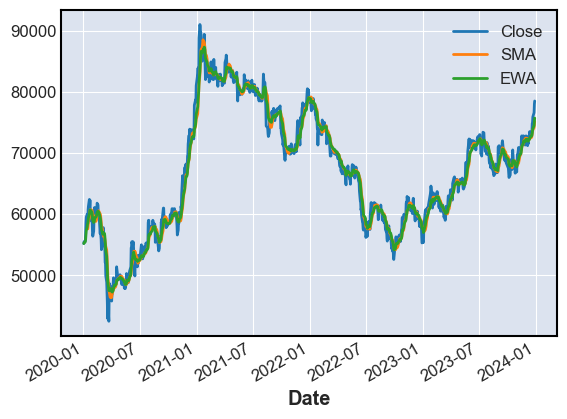

In [439]:
_dfSse2[['Close', 'SMA', 'EWA']].plot()

부분만 잘라내서, 앞 50일치 분량을 그려보면 이동평균선의 움직임을 자세하게 볼 수 있다.

특히 이동평균의 특성상 앞 부분의 데이터가 NaN이 되는 현상이 있을 수 밖에 없지만 잘 그려내고 있다.
이동평균선의 움직임을 자세하게 볼 수 있다.

부분만 잘라내서, 앞 50일치 분량을 그려보면 이동평균선의 움직임을 자세하게 볼 수 있다.

기간 10의 이동평균이므로, SMA선의 앞 부분이 안 나타나 있다.

<Axes: xlabel='Date'>

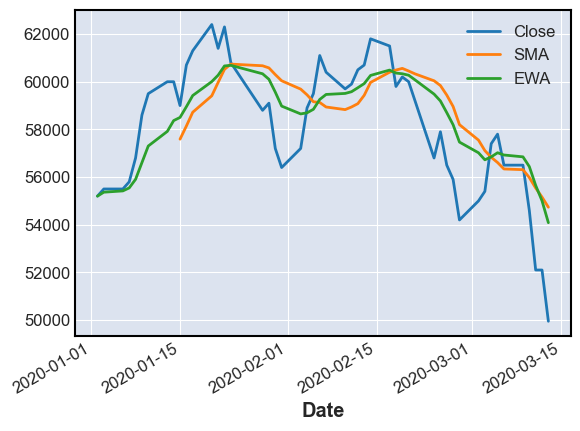

In [440]:
_dfSse2[['Close', 'SMA', 'EWA']][:50].plot()

데이터프레임의 컬럼을 선별해서 조회하려면 이중 괄호를 적어준다.

출력하려는 행의 갯수는 적어주면 된다. 출력에 NaN이 다수 포함되어 있다.

In [630]:
_dfSse2_10 = _dfSse2[['Close', 'SMA', 'EWA']].head(10)

앞부분에 채워진 NaN(Not a Number)은 데이터프레임에서 결측값을 나타내는 방식으로, plot이나 계산을 수행할 때 여러 가지 문제를 일으킬 수 있다.

- Plot하는 경우, 대부분의 시각화 라이브러리(Matplotlib, Seaborn, Plotly 등)는 NaN이 있는 부분에서 그래프가 끊긴다.

- 연산에 NaN 값은 직접적으로 영향을 미칠 수 있다.
    - 합산 또는 평균 계산: NaN 값이 포함된 데이터프레임에서 sum()이나 mean() 같은 함수를 사용할 때, NaN 값은 기본적으로 무시된다.
    
    - 논리 연산: NaN은 논리 연산에서 예상치 못한 결과를 낳을 수 있다. 예를 들어, NaN == NaN은 False이다.


NaN을 다루는 방법을 살펴보자.

- 제거: dropna()를 사용하여 NaN이 포함된 행 또는 열을 제거한다.

- 대체: fillna()를 사용하여 NaN을 특정 값(예: 평균, 중위수 등)으로 대체한다.
```data.fillna(data.mean())```

- 보간: interpolate()를 사용하여 NaN 값을 이전 또는 이후의 값을 기반으로 보간한다.
```data_interpolated = data.interpolate()```

- 마스킹: NaN이 포함된 데이터를 연산에서 무시하고 싶다면, 마스크를 사용해 선택적으로 연산할 수 있다.

```
mask = ~data.isna()
result = data[mask].sum()
```

_dfSse2_10에서 NaN만 제거하고 그 자리에 남겨둔다.

In [631]:
_dfSse2_10.dropna(inplace=True)

In [632]:
_dfSse2_10

Close      SMA                EWA
Date                                           
2020-01-15 59,000.0 57,590.0 58,502.03512903832

In [ ]:
pandas를 사용하면 apply를 통해 가중 이동 평균을 쉽게 계산할 수 있다.
처음부터 4개씩 윈도우를 가져와 여기에 가중치를 곱하여 계산해나간다.

In [36]:
import pandas as pd
import numpy as np

_s = pd.Series([110, 120, 130, 140, 150, 160, 170, 180, 200, 190, 210, 220, 230, 240, 250])

weights = np.array([0.1, 0.2, 0.3, 0.4]) #최근 값에 더 큰 가중치 부여

def weightedMA(window):
    return np.dot(window, weights) / weights.sum()

wma = _s.rolling(window=len(weights)).apply(weightedMA, raw=True)

print(wma)

0       NaN
1       NaN
2       NaN
3     130.0
4     140.0
5     150.0
6     160.0
7     170.0
8     184.0
9     189.0
10    199.0
11    209.0
12    219.0
13    230.0
14    240.0
dtype: float64


## 4.4 RSI

RSI(상대 강도 지수, Relative Strength Index)는 1978년 J. Welles Wilder가 개발하였고 주식, 암호화폐, 외환 등 금융 자산의 기술적 분석에서 널리 사용되는 모멘텀 오실레이터이다.

RSI는 자산의 가격 변동 속도와 크기를 측정하여, 0에서 100 사이의 값을 가지는데, 일반적으로 70 이상은 과매수, 30 이하는 과매도로 간주한다.

RSI 계산하는 순서는 다음과 같다.
- Gain/Loss 계산: 주어진 기간 동안의 주가 변동 중 양의 변동(이익, gain)과 음의 변동(손실, loss)을 계산한다.
- 지수 이동 평균(EMA): Gain과 Loss 각각에 대해 지수 이동 평균(Exponential Moving Average)을 계산한다.
- RS(Relative Strength): EMA(Gain) / EMA(Loss)를 계산한다.
- RSI 계산: RS를 비율로 만든다.

In [37]:
import pandas as pd

def calculate_rsi(data, window=7):
    # 1. 종가의 차이 (현재 종가 - 이전 종가)
    delta = data['Close'].diff() 

    # 2. 상승과 하락 값 분리
    gain = delta.where(delta > 0, 0)  # 상승 (양수만 남기고 나머지 0)
    loss = -delta.where(delta < 0, 0)  # 하락 (음수를 양수로 바꾸고 나머지 0)

    # 3. 상승과 하락의 이동 평균 계산 (보통 window=14)
    gainMean = gain.rolling(window=window, min_periods=1).mean()
    lossMean = loss.rolling(window=window, min_periods=1).mean()

    # 4. RS 계산
    rs = gainMean / lossMean

    # 5. RSI 계산
    rsi = 100 - (100 / (1 + rs))

    return rsi

_df15 = pd.DataFrame(_s, columns=["Close"]) # Series --> 컬럼명 지정 데이터프레임
_df=_df15.copy()

_df['RSI'] = calculate_rsi(_df)

print(_df)

    Close         RSI
0     110         NaN
1     120  100.000000
2     130  100.000000
3     140  100.000000
4     150  100.000000
5     160  100.000000
6     170  100.000000
7     180  100.000000
8     200  100.000000
9     190   87.500000
10    210   88.888889
11    220   88.888889
12    230   88.888889
13    240   88.888889
14    250   88.888889


pandas ta 라이브러리를 이용해서 RSI를 계산할 수도 있다.

In [447]:
import pandas_ta as ta
_df['RSIta'] = ta.rsi(_df['Close'], length=14)

print(_df)

    Close               RSI             RSIta
0     110               NaN               NaN
1     120             100.0               NaN
2     130             100.0               NaN
3     140             100.0               NaN
4     150             100.0               NaN
5     160             100.0               NaN
6     170             100.0               NaN
7     180             100.0               NaN
8     200             100.0               NaN
9     190              87.5               NaN
10    210 88.88888888888889               NaN
11    220 88.88888888888889               NaN
12    230 88.88888888888889               NaN
13    240 88.88888888888889               NaN
14    250 88.88888888888889 93.37707861274215


## 4.5 그래프에 sma, ema 등 기술지표 추가하기

In [635]:
import plotly.graph_objects as go

candlestick = go.Candlestick(
                            x=sse2.index,
                            open=sse2['Open'],
                            high=sse2['High'],
                            low=sse2['Low'],
                            close=sse2['Close'],
                            showlegend=False
                            )

In [636]:
import pandas_ta as ta

sse2['SMA'] = ta.sma(sse2['Close'], length=100)
sse2['EMA'] = ta.ema(sse2['Close'], length=100)

In [637]:
sma = go.Scatter(x=sse2.index,
                 y=sse2["SMA"],
                 yaxis="y1",
                 name="SMA"
                )
ema = go.Scatter(x=sse2.index,
                 y=sse2["EMA"],
                 name="EMA"
                )

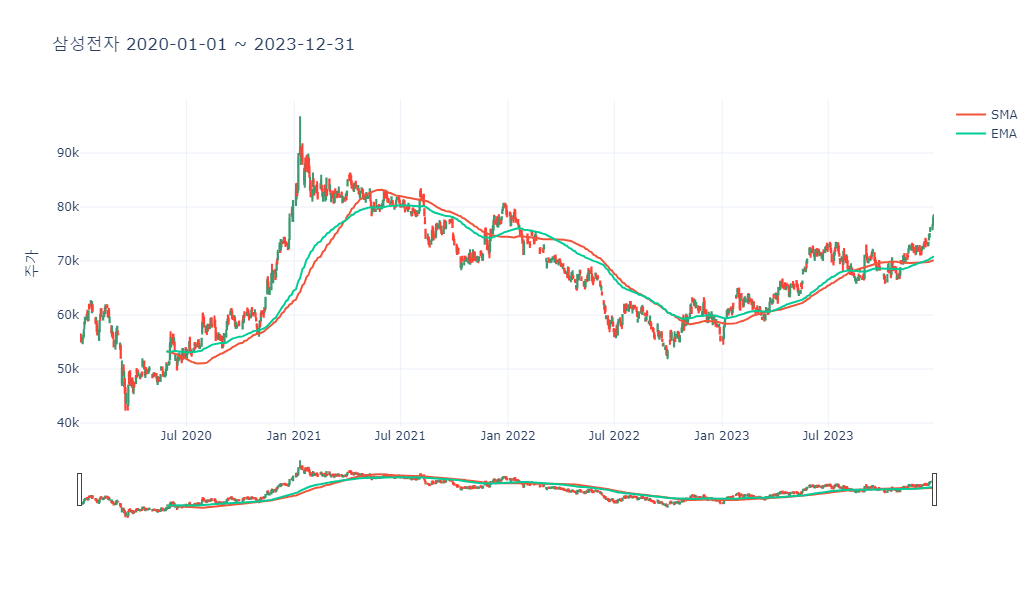

In [638]:
fig = go.Figure(data=[candlestick, sma, ema])

fig.update_layout(
    width=800, height=600,
    title="삼성전자 2020-01-01 ~ 2023-12-31",
    yaxis_title='주가',
)

fig.show()

## 4.6 Bollinger Bands

주가의 변동성을 측정하기 위해 사용되며, 주가의 평균 가격 주위를 둘러싼 상위 밴드와 하위 밴드로 구성되며, 폭이 넓어지면 변동성이 증가, 좁아지면 변동성이 감소하는 것을 의미한다.


In [475]:
window = 10
num_std = 2

_df=_df15.copy()
_df['Middle Band'] = _df['Close'].rolling(window=window).mean()

_df['Std Dev'] = _df['Close'].rolling(window=window).std()

_df['Upper Band'] = _df['Middle Band'] + (num_std * _df['Std Dev'])
_df['Lower Band'] = _df['Middle Band'] - (num_std * _df['Std Dev'])

In [483]:
_df

Close  Middle Band            Std Dev         Upper Band  \
0     110          NaN                NaN                NaN   
1     120          NaN                NaN                NaN   
2     130          NaN                NaN                NaN   
3     140          NaN                NaN                NaN   
4     150          NaN                NaN                NaN   
5     160          NaN                NaN                NaN   
6     170          NaN                NaN                NaN   
7     180          NaN                NaN                NaN   
8     200          NaN                NaN                NaN   
9     190        155.0 30.276503540974915 215.55300708194983   
10    210        165.0 30.276503540974915 225.55300708194983   
11    220        175.0 30.276503540974915 235.55300708194983   
12    230        185.0 30.276503540974915 245.55300708194983   
13    240        195.0 30.276503540974915 255.55300708194983   
14    250        205.0 30.276503540974915 265.55300708194983   

           Lower Band  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
5                 NaN  
6                 NaN  
7                 NaN  
8                 NaN  
9   94.44699291805017  
10 104.44699291805017  
11 114.44699291805017  
12 124.44699291805017  
13 134.44699291805017  
14 144.44699291805017

pandas로 계산해보자.
꼭 필요한 3개에 2개의 컬럼이 생성되고 있다.
컬럼은 L M U B P, 윈도우 크기, 표준편차가 붙여서 생성되고 있다.

- BBL_20_2.0: 하단 (중간 - 2 * std)
- BBM_20_2.0: 중간 (이동평균)
- BBU_20_2.0: 상단 (중간 + 2 * std)
- BBB_20_2.0: 밴드 너비 (BBU - BBL) / BBM
- BBP_20_2.0: %B, 밴드에서의 종가 위치 ((Close - BBL) / (BBU - BBL))


In [484]:
bbands = ta.bbands(_df['Close'], length=10, std=2)
print(bbands)

           BBL_10_2.0  BBM_10_2.0        BBU_10_2.0        BBB_10_2.0  \
0                 NaN         NaN               NaN               NaN   
1                 NaN         NaN               NaN               NaN   
2                 NaN         NaN               NaN               NaN   
3                 NaN         NaN               NaN               NaN   
4                 NaN         NaN               NaN               NaN   
5                 NaN         NaN               NaN               NaN   
6                 NaN         NaN               NaN               NaN   
7                 NaN         NaN               NaN               NaN   
8                 NaN         NaN               NaN               NaN   
9   97.55437353461971       155.0 212.4456264653803 74.12338898758746   
10 107.55437353461971       165.0 222.4456264653803 69.63106238227913   
11 117.55437353461971       175.0 232.4456264653803 65.65214453186319   
12 127.55437353461971       185.0 242.4456264653803

In [487]:
_df['BB_Lower'] = bbands['BBL_10_2.0']
_df['BB_Middle'] = bbands['BBM_10_2.0']
_df['BB_Upper'] = bbands['BBU_10_2.0']

In [488]:
_df

Close  Middle Band            Std Dev         Upper Band  \
0     110          NaN                NaN                NaN   
1     120          NaN                NaN                NaN   
2     130          NaN                NaN                NaN   
3     140          NaN                NaN                NaN   
4     150          NaN                NaN                NaN   
5     160          NaN                NaN                NaN   
6     170          NaN                NaN                NaN   
7     180          NaN                NaN                NaN   
8     200          NaN                NaN                NaN   
9     190        155.0 30.276503540974915 215.55300708194983   
10    210        165.0 30.276503540974915 225.55300708194983   
11    220        175.0 30.276503540974915 235.55300708194983   
12    230        185.0 30.276503540974915 245.55300708194983   
13    240        195.0 30.276503540974915 255.55300708194983   
14    250        205.0 30.276503540974915 265.55300708194983   

           Lower Band           BB_Lower  BB_Middle          BB_Upper  
0                 NaN                NaN        NaN               NaN  
1                 NaN                NaN        NaN               NaN  
2                 NaN                NaN        NaN               NaN  
3                 NaN                NaN        NaN               NaN  
4                 NaN                NaN        NaN               NaN  
5                 NaN                NaN        NaN               NaN  
6                 NaN                NaN        NaN               NaN  
7                 NaN                NaN        NaN               NaN  
8                 NaN                NaN        NaN               NaN  
9   94.44699291805017  97.55437353461971      155.0 212.4456264653803  
10 104.44699291805017 107.55437353461971      165.0 222.4456264653803  
11 114.44699291805017 117.55437353461971      175.0 232.4456264653803  
12 124.44699291805017 127.55437353461971      185.0 242.4456264653803  
13 134.44699291805017  137.5543735346197      195.0 252.4456264653803  
14 144.44699291805017  147.5543735346197      205.0 262.4456264653803

mplfinance 패키지로 시각화해보자.

물론 사전 설치가 필요하다.
pip install mplfinance

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


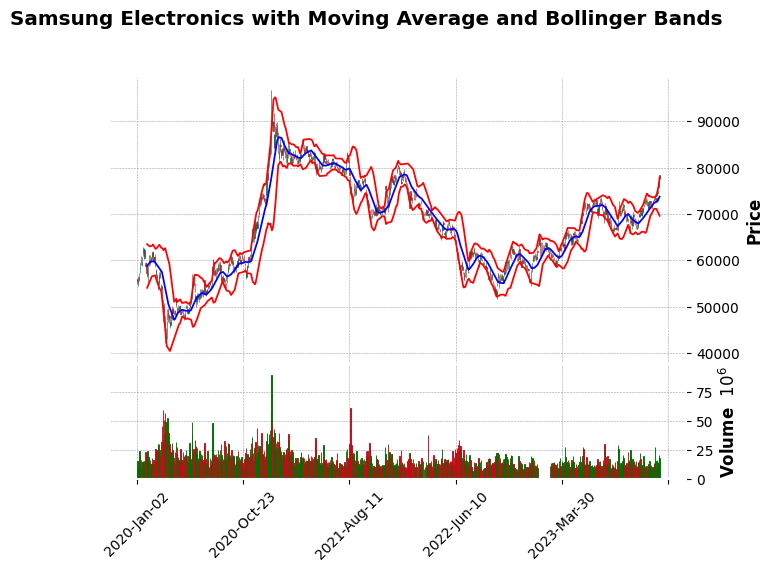

In [368]:
import mplfinance as mpf

_ema = mpf.make_addplot(sse2['Close'].rolling(20).mean(), color='blue')
_bollinger = [
    mpf.make_addplot(sse2['Close'].rolling(20).mean() + 2 * sse2['Close'].rolling(20).std(), color='red'),
    mpf.make_addplot(sse2['Close'].rolling(20).mean() - 2 * sse2['Close'].rolling(20).std(), color='red')
]

mpf.plot(sse2, type='candle', volume=True, style='charles',
         addplot=[_ema] + _bollinger,
         title="Samsung Electronics with Moving Average and Bollinger Bands")

## 4.7 MOM

현재 종가와 과거 5거래일 종가의 차이를 계산해보자.

In [435]:
lookback_period = 5

_df['mom'] = _df['Close'] - _df['Close'].shift(lookback_period)
print(_df)

    Close               RSI             RSIta             EMA_12  \
0     110               NaN               NaN              110.0   
1     120             100.0               NaN 111.53846153846155   
2     130             100.0               NaN 114.37869822485207   
3     140             100.0               NaN 118.32043695949022   
4     150             100.0               NaN 123.19421588879942   
5     160             100.0               NaN  128.8566442135995   
6     170             100.0               NaN  135.1863912576611   
7     180             100.0               NaN 142.08079260263634   
8     200             100.0               NaN 150.99143989453844   
9     190              87.5               NaN 156.99275683384022   
10    210 88.88888888888889               NaN  165.1477173209417   
11    220 88.88888888888889               NaN 173.58653004079682   
12    230 88.88888888888889               NaN 182.26552541913577   
13    240 88.88888888888889               NaN 19

In [491]:
#talib.MOM(close, timeperiod=5)
ta.mom(sse2['Close'], length=5)

Date
2020-01-02       NaN
2020-01-03       NaN
2020-01-06       NaN
2020-01-07       NaN
2020-01-08       NaN
               ...  
2023-12-21   1,900.0
2023-12-22   2,600.0
2023-12-26   3,700.0
2023-12-27   4,600.0
2023-12-28   3,700.0
Name: MOM_5, Length: 985, dtype: float64

## 4.8 MACD

MACD (Moving Average Convergence Divergence, 이동 평균 수렴/발산)는 두 개의 단기, 장기 이동 평균의 차이를 이용하여 추세의 강도와 변화를 파악하는 지표이다.

MACD선과 신호선의 교차점을 분석하여 매수/매도 신호를 포착힌다.

- 'MACD' = 종가의 지수이동평균 EMA(12)와 EMA(26) 차이
- 'MACD_Signal' = MACD의 EMA(9)
- 'MACD_Histogram' = 'MACD' - 'MACD_Signal'

In [356]:
_df = sse2.copy()
type(_df)

pandas.core.frame.DataFrame

In [359]:
print(f"df.columns: {_df.columns} index={type(_df.index)}")

df.columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') index=<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [422]:
def ema(df, span):
    return df.ewm(span=span, adjust=False).mean()

_df['EMA_12'] = ema(_df['Close'], 12)
_df['EMA_26'] = ema(_df['Close'], 26)
_df['MACD'] = _df['EMA_12'] - _df['EMA_26']

_df['MACD_Signal'] = ema(_df['MACD'], 9) # MACD_Signal
_df['MACD_Histogram'] = _df['MACD'] - _df['MACD_Signal'] # MACD - MACD_Signal

print(_df[['Close', 'MACD', 'MACD_Signal', 'MACD_Histogram']]) # 이중괄호 - 컬럼들의 리스트

    Close               MACD        MACD_Signal     MACD_Histogram
0     110                0.0                0.0                0.0
1     120 0.7977207977208138 0.1595441595441628  0.638176638176651
2     130 2.2113456871291675 0.5699044650611638 1.6414412220680037
3     140  4.091406831969024 1.2742049384427359 2.8172018935262884
4     150  6.315484289242747  2.282460808602738  4.033023480640009
5     160  8.783744584380372  3.582717563758265 5.2010270206221065
6     170 11.415187897273015  5.149211630461215 6.2659762668117995
7     180 14.144493194869582 6.9482679433428896  7.196225251526693
8     200 17.717088591050697  9.102032072884452  8.615056518166245
9     190 19.516505626907133 11.184926783688988  8.331578843218145
10    210  22.29933657378143 13.407808741707477  8.891527832073955
11    220 25.023214534166925 15.730889900199369  9.292324633967556
12    230  27.66986291299699 18.118684502758896  9.551178410238094
13    240 30.225842549823994 20.540116112171916  9.68572643765

pandas ta로 간단히 계산할 수도 있다.

In [363]:
ta.macd(_df['Close'])

MACD_12_26_9      MACDh_12_26_9       MACDs_12_26_9
Date                                                                 
2020-01-02                 NaN                NaN                 NaN
2020-01-03                 NaN                NaN                 NaN
2020-01-06                 NaN                NaN                 NaN
2020-01-07                 NaN                NaN                 NaN
2020-01-08                 NaN                NaN                 NaN
...                        ...                ...                 ...
2023-12-21   835.8271732751309 143.47273941520757   692.3544338599233
2023-12-22   973.4969026782928 224.91397505469558   748.5829276235972
2023-12-26 1,126.1042758269032 302.01707856264477   824.0871972642584
2023-12-27 1,344.5162715891784   416.343259459936   928.1730121292424
2023-12-28 1,540.2006982224266  489.6221488745473 1,050.5785493478793

[985 rows x 3 columns]

## 4.9 스토캐스틱 오실레이터 (Stochastic Oscillator)
스토캐스틱 오실레이터는 주가가 기준 기간 동안의 고가와 저가 사이에서 어디에 위치하는지를 나타낸댜. 이 지표는 주로 과매수(overbought)와 과매도(oversold) 상태를 알 수 있다.

- %K: 현재 종가가 일정 기간 동안의 가격 범위 내에서 차지하는 위치를 백분율로 나타낸다.
100 x (종가 - 최저(기준기간)) / (최고(기준기간) - 최저(기준기간))

- %D: %K의 이동평균 값으로, 일반적으로 3일 동안의 이동평균을 사용한다.

%K와 %D 값이 80 이상이면 과매수 상태로 간주되고, 20 이하이면 과매도 상태로 간주된다.
%K가 %D를 아래에서 위로 교차하면 매수 신호, 위에서 아래로 교차하면 매도 신호로 해석된다.

In [61]:
_df = sse1.copy()

_window = 14

_df['Lowest_Low'] = _df['Low'].rolling(window=_window).min()
_df['Highest_High'] = _df['High'].rolling(window=_window).max()

_df['%K'] = ((_df['Close'] - _df['Lowest_Low']) / (_df['Highest_High'] - _df['Lowest_Low'])) * 100
_df['%D'] = _df['%K'].rolling(window=3).mean()

#_df = _df.drop(columns=['Lowest_Low', 'Highest_High'])

_df

Open          High           Low  \
Date                                                                  
2023-10-10 00:00:00+09:00  65298.699525  66679.638790  65298.699525   
2023-10-11 00:00:00+09:00  67666.030677  68455.138907  66975.560976   
2023-10-12 00:00:00+09:00  67666.029731  68751.053531  67271.475621   
2023-10-13 00:00:00+09:00  67074.203125  67567.395795  66778.287523   
2023-10-16 00:00:00+09:00  66975.557706  67567.388849  65890.533943   
...                                 ...           ...           ...   
2024-10-02 00:00:00+09:00  60500.000000  61900.000000  59900.000000   
2024-10-04 00:00:00+09:00  61000.000000  61700.000000  60500.000000   
2024-10-07 00:00:00+09:00  60200.000000  61900.000000  59500.000000   
2024-10-08 00:00:00+09:00  60000.000000  61000.000000  59900.000000   
2024-10-10 00:00:00+09:00  60100.000000  60200.000000  58900.000000   

                                  Close    Volume  Dividends  Stock Splits  \
Date                                                                         
2023-10-10 00:00:00+09:00  65495.976562  19889202        0.0           0.0   
2023-10-11 00:00:00+09:00  67271.476562  25209349        0.0           0.0   
2023-10-12 00:00:00+09:00  67961.945312  19311380        0.0           0.0   
2023-10-13 00:00:00+09:00  67074.203125   9724086        0.0           0.0   
2023-10-16 00:00:00+09:00  66383.726562  12599299        0.0           0.0   
...                                 ...       ...        ...           ...   
2024-10-02 00:00:00+09:00  61300.000000  28473536        0.0           0.0   
2024-10-04 00:00:00+09:00  60600.000000  24247578        0.0           0.0   
2024-10-07 00:00:00+09:00  61000.000000  35066533        0.0           0.0   
2024-10-08 00:00:00+09:00  60300.000000  27411786        0.0           0.0   
2024-10-10 00:00:00+09:00  58900.000000  45262214        0.0           0.0   

                           Lowest_Low  Highest_High         %K         %D  
Date                                                                       
2023-10-10 00:00:00+09:00         NaN           NaN        NaN        NaN  
2023-10-11 00:00:00+09:00         NaN           NaN        NaN        NaN  
2023-10-12 00:00:00+09:00         NaN           NaN        NaN        NaN  
2023-10-13 00:00:00+09:00         NaN           NaN        NaN        NaN  
2023-10-16 00:00:00+09:00         NaN           NaN        NaN        NaN  
...                               ...           ...        ...        ...  
2024-10-02 00:00:00+09:00     59900.0       68200.0  16.867470  13.029897  
2024-10-04 00:00:00+09:00     59900.0       67300.0   9.459459   8.775643  
2024-10-07 00:00:00+09:00     59500.0       66600.0  21.126761  15.817897  
2024-10-08 00:00:00+09:00     59500.0       66600.0  11.267606  13.951275  
2024-10-10 00:00:00+09:00     58900.0       65500.0   0.000000  10.798122  

[245 rows x 11 columns]

ta를 사용해서, 기간 14, 이동평균 3으로 계산해보자.

In [62]:

stochastic = ta.stoch(_df['High'], _df['Low'], _df['Close'])
_df['ta%K'] = stochastic['STOCHk_14_3_3']
_df['ta%D'] = stochastic['STOCHd_14_3_3']


## 4.10 피보나치 되돌림 (Fibonacci Retracement)
피보나치 되돌림은 특정 가격 움직임(상승 또는 하락)의 되돌림 수준을 예측하는 데 사용되는데, 피보나치 수열을 기반의 비율을 사용해 이전 추세가 멈추고 되돌아올 가능성이 있는 지점들을 나타낸다.

일반적으로 많이 쓰이는 수준은 23.6%, 38.2%, 50%, 61.8%, 100%이다. 이러한 특정 피보나치 수준에서 가격이 지지되거나 저항받는다면, 그 수준이 중요한 지지선과 저항선이라고 볼 수 있다.

이전의 일정 구간을 정해서 고점과 저점을 구하고, 어느 수준에서 되돌림할 것인지 예측해보자.

In [63]:

def fibonacciLevels(high, low):
    diff = high - low
    levels = {
        "0%": high,
        "23.6%": high - 0.236 * diff,
        "38.2%": high - 0.382 * diff,
        "50%": high - 0.5 * diff,
        "61.8%": high - 0.618 * diff,
        "100%": low,
    }
    return levels

highMax = _df['High'][-30:].max()
lowMin = _df['Low'][-30:].min()

fibLevels = fibonacciLevels(highMax, lowMin)
print(f"피보나치 되돌림 수준: {fibLevels}")


피보나치 되돌림 수준: {'0%': 78900.0, '23.6%': 74180.0, '38.2%': 71260.0, '50%': 68900.0, '61.8%': 66540.0, '100%': 58900.0}


## 4.11 평균방향성지수 (ADX, Average Directional Index)
ADX는 추세의 강도를 측정하는 지표, 추세의 방향이 아니라 강도에 중점을 두며, 강한 추세일수록 높은 값을 나타넨다.

먼저 DM을 계산한다.
- DM+ (Positive Directional Movement): 고가상승폭이 저가하락폭보다 클 때 그 값을 저장.
    - (_df['High'] - _df['High'].shift(1)): 현재 고가에서 이전 고가를 뺀 값으로 -> 고가가 전일보다 얼마나 상승했는지를 의미.
    - (_df['Low'].shift(1) - _df['Low']): 이전 저가에서 현재 저가를 뺀 값으로 -> 저가가 전일보다 얼마나 하락했는지를 의미.
    - np.where() 함수는 조건을 설정하고, 참일 때와 거짓일 때 다른 값을 반환한다.
        - 조건: 고가상승폭이 저가하락폭보다 클 경우.
        - 참일 경우: 고가상승폭과 0 중 큰 값 (np.maximum)을 반환 (즉, 고가가 상승했다면 그 값을 DM+로 설정).
        - 거짓일 경우: DM+ 값은 0.
- DM- (Negative Directional Movement): DM+와 반대방향으로 계산한다. 저가하락폭이 고가상승폭보다 클 때 그 값을 저장

이 값들의 이동평균을 계산하고, 
- DI+ (Positive Directional Indicator): 상승 추세의 강도를 나타낸다.
- DI- (Negative Directional Indicator): 하락 추세의 강도를 나타낸다. D+I가 DI-보다 크면 상승 추세, 반대의 경우 하락 추세로 해석
- ADX: 추세의 강도를 나타내며, 0에서 100 사이의 값을 가지고, 20 이하이면 약한 추세 또는 횡보 상태, 40 이상이면 강한 추세를 의미


In [64]:
_df['High_Low'] = _df['High'] - _df['Low']
_df['High_Close'] = np.abs(_df['High'] - _df['Close'].shift(1))
_df['Low_Close'] = np.abs(_df['Low'] - _df['Close'].shift(1))

_df['TR'] = _df[['High_Low', 'High_Close', 'Low_Close']].max(axis=1) # True Range 가격변동 최대값
_df['DM+'] = np.where((_df['High'] - _df['High'].shift(1)) > (_df['Low'].shift(1) - _df['Low']), 
                     np.maximum(_df['High'] - _df['High'].shift(1), 0), 0)
_df['DM-'] = np.where((_df['Low'].shift(1) - _df['Low']) > (_df['High'] - _df['High'].shift(1)), 
                     np.maximum(_df['Low'].shift(1) - _df['Low'], 0), 0)

_window = 14
_df['TRmav'] = _df['TR'].rolling(window=_window).mean()

_df['DM+mav'] = _df['DM+'].rolling(window=_window).mean()
_df['DM-mav'] = _df['DM-'].rolling(window=_window).mean()

_df['DI+'] = 100 * (_df['DM+mav'] / _df['TRmav'])
_df['DI-'] = 100 * (_df['DM-mav'] / _df['TRmav'])

_df['DX'] = 100 * np.abs(_df['DI+'] - _df['DI-']) / (_df['DI+'] + _df['DI-'])

_df['ADX'] = _df['DX'].rolling(window=_window).mean()  # MA 또는 EMA를 해도 된다.

_df = _df.drop(columns=['High_Low', 'High_Close', 'Low_Close', 'DM+mav', 'DM-mav', 'DX']) # 선택적 수행

_df[['High', 'Low', 'Close', 'TR', 'DM+', 'DM-', 'TRmav', 'DI+', 'DI-', 'ADX']]

High           Low         Close  \
Date                                                                  
2023-10-10 00:00:00+09:00  66679.638790  65298.699525  65495.976562   
2023-10-11 00:00:00+09:00  68455.138907  66975.560976  67271.476562   
2023-10-12 00:00:00+09:00  68751.053531  67271.475621  67961.945312   
2023-10-13 00:00:00+09:00  67567.395795  66778.287523  67074.203125   
2023-10-16 00:00:00+09:00  67567.388849  65890.533943  66383.726562   
...                                 ...           ...           ...   
2024-10-02 00:00:00+09:00  61900.000000  59900.000000  61300.000000   
2024-10-04 00:00:00+09:00  61700.000000  60500.000000  60600.000000   
2024-10-07 00:00:00+09:00  61900.000000  59500.000000  61000.000000   
2024-10-08 00:00:00+09:00  61000.000000  59900.000000  60300.000000   
2024-10-10 00:00:00+09:00  60200.000000  58900.000000  58900.000000   

                                    TR          DM+          DM-        TRmav  \
Date                                                                            
2023-10-10 00:00:00+09:00  1380.939265     0.000000     0.000000          NaN   
2023-10-11 00:00:00+09:00  2959.162344  1775.500117     0.000000          NaN   
2023-10-12 00:00:00+09:00  1479.577910   295.914624     0.000000          NaN   
2023-10-13 00:00:00+09:00  1183.657790     0.000000   493.188098          NaN   
2023-10-16 00:00:00+09:00  1676.854906     0.000000   887.753580          NaN   
...                                ...          ...          ...          ...   
2024-10-02 00:00:00+09:00  2000.000000     0.000000  1600.000000  1885.714286   
2024-10-04 00:00:00+09:00  1200.000000     0.000000     0.000000  1807.142857   
2024-10-07 00:00:00+09:00  2400.000000     0.000000  1000.000000  1871.428571   
2024-10-08 00:00:00+09:00  1100.000000     0.000000     0.000000  1807.142857   
2024-10-10 00:00:00+09:00  1400.000000     0.000000  1000.000000  1785.714286   

                                 DI+        DI-        ADX  
Date                                                        
2023-10-10 00:00:00+09:00        NaN        NaN        NaN  
2023-10-11 00:00:00+09:00        NaN        NaN        NaN  
2023-10-12 00:00:00+09:00        NaN        NaN        NaN  
2023-10-13 00:00:00+09:00        NaN        NaN        NaN  
2023-10-16 00:00:00+09:00        NaN        NaN        NaN  
...                              ...        ...        ...  
2024-10-02 00:00:00+09:00  12.878788  45.075758  75.050535  
2024-10-04 00:00:00+09:00  13.438735  41.501976  72.200656  
2024-10-07 00:00:00+09:00  12.977099  41.603053  69.463393  
2024-10-08 00:00:00+09:00  13.438735  35.968379  65.873245  
2024-10-10 00:00:00+09:00   9.200000  40.400000  64.530665  

[245 rows x 10 columns]

ta.adx 함수는 ADX_14, DMP_14, DMN_14 열을 포함한 DataFrame을 반환한다.


In [65]:
adx = ta.adx(_df['High'], _df['Low'], _df['Close'])
_df['ADX'] = adx['ADX_14']
_df['DI+'] = adx['DMP_14']
_df['DI-'] = adx['DMN_14']

print(_df[['ADX', 'DI+', 'DI-']].tail())

                                 ADX        DI+        DI-
Date                                                      
2024-10-02 00:00:00+09:00  42.687332  13.541624  44.673667
2024-10-04 00:00:00+09:00  43.458053  12.921780  42.628810
2024-10-07 00:00:00+09:00  44.402535  11.762167  42.542466
2024-10-08 00:00:00+09:00  45.279554  11.263258  40.737968
2024-10-10 00:00:00+09:00  46.322751  10.644421  42.424200


## 4.12 거래 가중 평균 가격 (VWAP, Volume Weighted Average Price)
VWAP는 일정 기간 동안의 거래량을 고려한 평균 가격으로, 주가의 전반적인 동향을 평가하는 데 사용된다. 

이동평균과 비슷하게 보이지만, VWAP는 주가와 함께 거래량을 반영하여 평균가격을 계산한다. 거래량이 많을수록 해당 가격이 평균에 더 크게 반영되어 대규모 거래자들이 공정가격에서 거래했는지 특히 하루 동안의 주가 움직임을 분석하는 데 유용하다.

- $\sum$ (거래량 x 주가) / $\sum$ 거래량
- 주가는 보통 (고가 + 저가 + 종가) / 3 으로 계산한다.

주가가 VWAP 위에 있으면 강세, 아래에 있으면 약세로 간주할 수 있다.

예를 들어
- 9-11 거래: 60,000원 1000주
- 11-13 거래: 70,000원 600주
- 13-15 거래: 50,000원 900주

(60000 x 1000 + 70000 x 600 + 50000 x 900) / (1000 + 600 + 900) = 137000000 / 2500 = 54800

현재 주가가 50,000이라면 약세 60,000이라면 강세로 본다.

In [66]:
def vwap(df):
    vwap = (df['Volume'] * (df['High'] + df['Low'] + df['Close']) / 3).cumsum() / df['Volume'].cumsum()
    return vwap

_df['VWAP'] = vwap(_df)

print(_df[['VWAP']].tail())

                                   VWAP
Date                                   
2024-10-02 00:00:00+09:00  75073.282331
2024-10-04 00:00:00+09:00  74998.831072
2024-10-07 00:00:00+09:00  74891.529323
2024-10-08 00:00:00+09:00  74806.424354
2024-10-10 00:00:00+09:00  74657.822183


## 4.13 일목균형

일목균형표(Ichimoku Kinko Hyo)는 주로 일본에서 개발되었으며, 현재는 전 세계적으로 널리 사용된다.

일목균형표는 한눈에 현재의 추세, 지지와 저항 수준, 그리고 모멘텀을 평가할 수 있도록 돕는 복잡한 기술 지표이다.
핵심 요소 중 하나가 매우 시각적인 **구름(Cloud)**, 이를 통해 많은 정보를 한눈에 얻을 수 있다.

일목균형표 5가지 구성 요소 (default: tenkan=9, kijun=26, senkou=52)
- 전환선(Conversion Line, Tenkan-sen): 최근의 단기 가격 동향 (default: 9) TENKAN_SEN = midprice(high, low, close, length=tenkan)
- 기준선(Base Line, Kijun-sen): 중기적인 가격 동향 (default: 26) KIJUN_SEN = midprice(high, low, close, length=kijun)
- 선행스팬 1(Leading Span 1, Senkou Span A): (전환선 + 기준선) / 2 를 일정 기간 앞으로 이동한 값 (default: 52)
    - SPAN_A = 0.5 * (TENKAN_SEN + KIJUN_SEN)
    - SPAN_A = SPAN_A.shift(kijun)
- 선행스팬 2(Leading Span 2, Senkou Span B): 일정 기간 동안의 최고가와 최저가의 중간값을 일정 기간 앞으로 이동한 값   
    - SPAN_B = midprice(high, low, close, length=senkou)
    - SPAN_B = SPAN_B.shift(kijun)

- 후행스팬(Lagging Span, Chikou Span): 현재의 종가를 일정 기간 뒤로 이동시킨 값 CHIKOU_SPAN = close.shift(-kijun)

구름(Cloud, Kumo)
- 구름은 선행스팬 1과 선행스팬 2 사이의 영역을 색으로 채워서 나타낸다.
- 구름은 주가가 현재 추세에 대해 상승세에 있는지 하락세에 있는지 시각적으로 쉽게 확인할 수 있게 해준다.
- 주가가 구름 위에 있을 때는 상승 추세로, 구름 아래에 있을 때는 하락 추세로 간주한다.
- 구름의 두께는 지지 또는 저항의 강도를 나타낸다. 구름이 두꺼울수록 강한 지지 또는 저항이 존재한다고 볼 수 있다.

일목균형표의 활용
- 추세 판단: 주가가 구름 위에 있으면 상승 추세, 구름 아래에 있으면 하락 추세로 판단한다.
- 지지와 저항: 구름의 상단과 하단은 지지와 저항 수준으로 작용한다.
- 신호 생성: 전환선과 기준선의 교차, 주가와 구름의 상호작용 등을 통해 매수와 매도 신호를 생성할 수 있다.
    
함수에 넘겨주는 인자들:
- high (pd.Series): 'high' 값들
- low (pd.Series): 'low' 값들
- close (pd.Series): 'close' 값들
- tenkan 전환 (int): 단기 가격 동향 (Default: 9)
- kijun 기준 (int): 중기 가격 동향 (Default: 26)
- senkou 선행 (int): (전환선+기준선)/2를 일정 기간 앞으로 이동. Default: 52
- include_chikou 후행 (bool): 종가를 일정 기간 뒤로 이동할 것인지 Default: True
- offset (int): How many periods to offset the result. Default: 0
- [선택적] fillna (value, optional): pd.DataFrame.fillna(value)
- [선택적] fill_method (value, optional): Type of fill method

반환은 2개의 데이터프레임이다.
- 현재까지: 과거 ~ 현재까지 spanA, spanB, tenkan_sen, kijun_sen, chikou_span 컬럼들을 출력
- 향후: 향후 26기 spanA, spanB 2개만 출력

In [42]:
import yfinance as yf
import pandas_ta as ta
import pandas as pd

#_df = aapl.copy()
_df = sse2.copy()
ichimoku = ta.ichimoku(_df['High'], _df['Low'], _df['Close']) # 2개의 데이터프레임을 반환
#ichimoku = ta.ichimoku(df['High'], df['Low'], df['Close'], tenkan=9, kijun=26, senkou=52, timedelay=26, fillna=True)

_df = pd.concat([_df, ichimoku[0], ichimoku[1]], axis=1) # 모두 병합

_df.head()

Open     High      Low    Close     Adj Close      Volume  \
2020-01-02  55500.0  56000.0  55000.0  55200.0  49099.421875  12993228.0   
2020-01-03  56000.0  56600.0  54900.0  55500.0  49366.269531  15422255.0   
2020-01-06  54900.0  55600.0  54600.0  55500.0  49366.269531  10278951.0   
2020-01-07  55700.0  56400.0  55600.0  55800.0  49633.109375  10009778.0   
2020-01-08  56200.0  57400.0  55900.0  56800.0  50522.589844  23501171.0   

            ISA_9  ISB_26  ITS_9  IKS_26   ICS_26  ISA_9  ISB_26  
2020-01-02    NaN     NaN    NaN     NaN  59900.0    NaN     NaN  
2020-01-03    NaN     NaN    NaN     NaN  60500.0    NaN     NaN  
2020-01-06    NaN     NaN    NaN     NaN  60700.0    NaN     NaN  
2020-01-07    NaN     NaN    NaN     NaN  61800.0    NaN     NaN  
2020-01-08    NaN     NaN    NaN     NaN  61500.0    NaN     NaN

라이브러리를 사용하지 않고, 직접 계산하여 챠트를 그려보자.

In [48]:
tenkan_window = 9
kijun_window = 26
senkou_span_b_window = 52
cloud_displacement = 26
chikou_shift = -26

# 전환선 (Conversion Line): (9-period high + 9-period low)/2))
highMaxWin = _df['High'].rolling(window= tenkan_window).max()
lowMinWin = _df['Low'].rolling(window= tenkan_window).min()
_df['tenkan_sen'] = (highMaxWin + lowMinWin) /2

# 기준선 (Base Line): (26-period high + 26-period low)/2))
highKijunWin = _df['High'].rolling(window=kijun_window).max()
lowKijunWin = _df['Low'].rolling(window=kijun_window).min()
_df['kijun_sen'] = (highKijunWin + lowKijunWin) / 2

# 선행 Span A (Leading Span A): (Conversion Line + Base Line)/2)) shift는 뒤로 이동
_df['senkou_span_a'] = ((_df['tenkan_sen'] + _df['kijun_sen']) / 2).shift(cloud_displacement)

# 선행 Span B (Leading Span B): (52-period high + 52-period low)/2))
highSenkowWin = _df['High'].rolling(window=senkou_span_b_window).max()
lowSenkowWin = _df['Low'].rolling(window=senkou_span_b_window).min()
_df['senkou_span_b'] = ((highSenkowWin + lowSenkowWin) / 2).shift(cloud_displacement)

# 후행 종가 (optional)
_df['chikou_span'] = _df['Close'].shift(-chikou_shift)

In [506]:
_df

Open               High                Low  \
2023-01-03 130.27999877929688 130.89999389648438 124.16999816894531   
2023-01-04 126.88999938964844 128.66000366210938 125.08000183105469   
2023-01-05 127.12999725341797  127.7699966430664 124.76000213623047   
2023-01-06 126.01000213623047  130.2899932861328 124.88999938964844   
2023-01-09 130.47000122070312 133.41000366210938 129.88999938964844   
...                       ...                ...                ...   
2024-01-30                NaN                NaN                NaN   
2024-01-31                NaN                NaN                NaN   
2024-02-01                NaN                NaN                NaN   
2024-02-02                NaN                NaN                NaN   
2024-02-05                NaN                NaN                NaN   

                        Close          Adj Close        Volume  ISA_9  ISB_26  \
2023-01-03 125.06999969482422 123.90462493896484 112,117,500.0    NaN     NaN   
2023-01-04 126.36000061035156     125.1826171875  89,113,600.0    NaN     NaN   
2023-01-05  125.0199966430664 123.85508728027344  80,962,700.0    NaN     NaN   
2023-01-06  129.6199951171875 128.41224670410156  87,754,700.0    NaN     NaN   
2023-01-09 130.14999389648438  128.9373016357422  70,790,800.0    NaN     NaN   
...                       ...                ...           ...    ...     ...   
2024-01-30                NaN                NaN           NaN    NaN     NaN   
2024-01-31                NaN                NaN           NaN    NaN     NaN   
2024-02-01                NaN                NaN           NaN    NaN     NaN   
2024-02-02                NaN                NaN           NaN    NaN     NaN   
2024-02-05                NaN                NaN           NaN    NaN     NaN   

            ITS_9  IKS_26             ICS_26              ISA_9  \
2023-01-03    NaN     NaN  150.8699951171875                NaN   
2023-01-04    NaN     NaN 151.00999450683594                NaN   
2023-01-05    NaN     NaN 153.85000610351562                NaN   
2023-01-06    NaN     NaN  153.1999969482422                NaN   
2023-01-09    NaN     NaN  155.3300018310547                NaN   
...           ...     ...                ...                ...   
2024-01-30    NaN     NaN                NaN 194.60249710083008   
2024-01-31    NaN     NaN                NaN 194.87999725341797   
2024-02-01    NaN     NaN                NaN 194.44499588012695   
2024-02-02    NaN     NaN                NaN 194.13999557495117   
2024-02-05    NaN     NaN                NaN  193.9599952697754   

                      ISB_26  tenkan_sen  kijun_sen      senkou_span_a  \
2023-01-03               NaN         NaN        NaN                NaN   
2023-01-04               NaN         NaN        NaN                NaN   
2023-01-05               NaN         NaN        NaN                NaN   
2023-01-06               NaN         NaN        NaN                NaN   
2023-01-09               NaN         NaN        NaN                NaN   
...                      ...         ...        ...                ...   
2024-01-30 182.6449966430664         NaN        NaN 194.60249710083008   
2024-01-31 182.6449966430664         NaN        NaN 194.87999725341797   
2024-02-01 182.6449966430664         NaN        NaN 194.44499588012695   
2024-02-02 182.6449966430664         NaN        NaN 194.13999557495117   
2024-02-05 182.6449966430664         NaN        NaN  193.9599952697754   

               senkou_span_b        chikou_span  
2023-01-03               NaN                NaN  
2023-01-04               NaN                NaN  
2023-01-05               NaN                NaN  
2023-01-06               NaN                NaN  
2023-01-09               NaN                NaN  
...                      ...                ...  
2024-01-30 182.6449966430664 193.60000610351562  
2024-01-31 182.6449966430664  193.0500030517578  
2024-02-01 182.6449966430664 193.14999389648438  
2024-

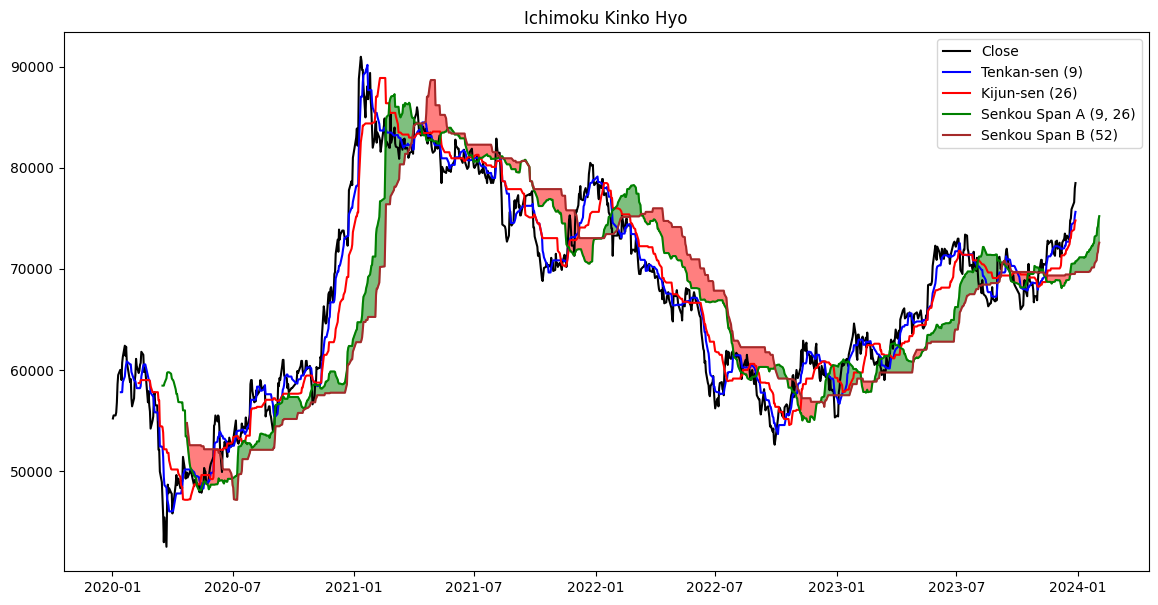

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(14, 7))
#plt.plot(df.index, df['Close'], label='Close', color='black') Multi-dimenstional indexing 류류
plt.plot(_df.index.to_numpy(), _df['Close'].to_numpy(), label='Close', color='black')

# 전환선, 기준선, 선행스팬1, 선행스팬2 플롯
plt.plot(_df.index.to_numpy(), _df['tenkan_sen'].to_numpy(), label='Tenkan-sen (9)', color='blue')
plt.plot(_df.index.to_numpy(), _df['kijun_sen'].to_numpy(), label='Kijun-sen (26)', color='red')
plt.plot(_df.index.to_numpy(), _df['senkou_span_a'].to_numpy(), label='Senkou Span A (9, 26)', color='green')
plt.plot(_df.index.to_numpy(), _df['senkou_span_b'].to_numpy(), label='Senkou Span B (52)', color='brown')

# 구름 영역 그리기
plt.fill_between(_df.index.values, _df['senkou_span_a'].values, _df['senkou_span_b'].values, where=_df['senkou_span_a'] >= _df['senkou_span_b'], color='green', alpha=0.5)
plt.fill_between(_df.index.values, _df['senkou_span_a'].values, _df['senkou_span_b'].values, where=_df['senkou_span_a'] < _df['senkou_span_b'], color='red', alpha=0.5)

plt.title("Ichimoku Kinko Hyo")
plt.legend()
plt.show()

- %matplotlib inline을 해주어야 챠트가 그려진다.
- 코드 fill_between(x, y1, y2, where=조건, color=색, alpha=투명도(0~1)) 두 y1, y2의 사이를 채운다.
- 오류 설명 ValueError: Multi-dimensional indexing (e.g. obj[:, None]) is no longer supported.

이 오류는 pandas의 최신 버전에서 다차원 인덱싱이 더 이상 지원되지 않기 때문에 발생한다. 이 문제를 해결하기 위해 pandas 데이터프레임이나 시리즈를 numpy 배열로 변환해주면 되는데, .to_numpy() 또는 .values를 활용하면 된다. 위 코드에서 일부는 .to_numpy(), 일부는 .values를 적용하여 numpy 배열로 변환하도록 코드를 작성하였다.

## 4.14 여러 지표들을 묶어 계산

- kind: 계산할 지표의 종류
- close: 일반적으로 종가(close)로 계산되지만, 다른 경우 설정 (예: 거래량)
- length: 계산하는 기간을 설정
- prefix: 이 필드는 생성될 새로운 열의 이름에 접두사를 붙이는 데 사용된다. 예를 들어, 계산된 단순 이동 평균의 결과는 VOLUME_sma와 같은 형식으로 데이터프레임에 추가된다.

In [508]:
_df=sse2.copy()

In [509]:
CustomStrategy = ta.Strategy(
    name="Momo and Volatility",
    description="SMA 50,200, BBANDS, RSI, MACD, Volume SMA 20",
    ta=[
        {"kind": "sma", "length": 50},
        {"kind": "sma", "length": 200},
        {"kind": "bbands", "length": 20},
        {"kind": "rsi"},
        {"kind": "macd", "fast": 8, "slow": 21},
        {"kind": "sma", "close": "volume", "length": 20, "prefix": "VOLUME"},
    ]
)

여러 지표를 계산하므로 잠깐 시간이 걸린다.

In [510]:
_df.ta.strategy(CustomStrategy)

In [511]:
_df.head()

Open     High      Low    Close       Adj Close    Volume  SMA  \
Date                                                                            
2020-01-02 55,500.0 56,000.0 55,000.0 55,200.0   49,099.421875  12993228  NaN   
2020-01-03 56,000.0 56,600.0 54,900.0 55,500.0 49,366.26953125  15422255  NaN   
2020-01-06 54,900.0 55,600.0 54,600.0 55,500.0 49,366.26953125  10278951  NaN   
2020-01-07 55,700.0 56,400.0 55,600.0 55,800.0 49,633.10546875  10009778  NaN   
2020-01-08 56,200.0 57,400.0 55,900.0 56,800.0    50,522.59375  23501171  NaN   

            EMA  SMA_50  SMA_200  BBL_20_2.0  BBM_20_2.0  BBU_20_2.0  \
Date                                                                   
2020-01-02  NaN     NaN      NaN         NaN         NaN         NaN   
2020-01-03  NaN     NaN      NaN         NaN         NaN         NaN   
2020-01-06  NaN     NaN      NaN         NaN         NaN         NaN   
2020-01-07  NaN     NaN      NaN         NaN         NaN         NaN   
2020-01-08  NaN     NaN      NaN         NaN         NaN         NaN   

            BBB_20_2.0  BBP_20_2.0  RSI_14  MACD_8_21_9  MACDh_8_21_9  \
Date                                                                    
2020-01-02         NaN         NaN     NaN          NaN           NaN   
2020-01-03         NaN         NaN     NaN          NaN           NaN   
2020-01-06         NaN         NaN     NaN          NaN           NaN   
2020-01-07         NaN         NaN     NaN          NaN           NaN   
2020-01-08         NaN         NaN     NaN          NaN           NaN   

            MACDs_8_21_9  VOLUME_SMA_20  
Date                                     
2020-01-02           NaN            NaN  
2020-01-03           NaN            NaN  
2020-01-06           NaN            NaN  
2020-01-07           NaN            NaN  
2020-01-08           NaN            NaN

- df.ta.log_return은 기본적으로 'Close' 컬럼에 대해 로그 수익률을 계산한다. 다른 컬럼에 대해 로그 수익률을 계산하려면, close='컬럼명' 인자를 추가해야 한다. cumulative=True는 누적 로그 수익률을, append=True는 결과를 원래 데이터프레임에 추가한다.

- df.ta.percent_return도 log_return과 유사한 방식으로 계산되지만, 두 가지 수익률 계산 방법에는 중요한 차이가 있다. percent_return은 단순 수익률(Simple Return) 또는 퍼센트 수익률을 계산하며, 두 값의 비율을 기준으로 변화를 계산한다. 반면, log_return은 로그 수익률(Logarithmic Return)을 계산하는 방식이다.

- 계산결과는 append=True로 현 데이터프레임에 추가된다.

In [512]:
_df.ta.log_return(cumulative=True, append=True)

Date
2020-01-02                    0.0
2020-01-03   0.005420067469339113
2020-01-06   0.005420067469339113
2020-01-07   0.010810916104215676
2020-01-08   0.028573372444055948
                     ...         
2023-12-21     0.3065251602532608
2023-12-22     0.3184537311185346
2023-12-26    0.32763412346349596
2023-12-27    0.34574587340654217
2023-12-28     0.3521356715053131
Name: CUMLOGRET_1, Length: 985, dtype: float64

In [513]:
_df.ta.percent_return(cumulative=True, append=True)

Date
2020-01-02                    0.0
2020-01-03   0.005434782608695565
2020-01-06   0.005434782608695565
2020-01-07   0.010869565217391353
2020-01-08    0.02898550724637672
                     ...         
2023-12-21     0.3586956521739131
2023-12-22                  0.375
2023-12-26     0.3876811594202898
2023-12-27     0.4130434782608696
2023-12-28     0.4221014492753623
Name: CUMPCTRET_1, Length: 985, dtype: float64

In [514]:
_df.head()

Open     High      Low    Close       Adj Close    Volume  SMA  \
Date                                                                            
2020-01-02 55,500.0 56,000.0 55,000.0 55,200.0   49,099.421875  12993228  NaN   
2020-01-03 56,000.0 56,600.0 54,900.0 55,500.0 49,366.26953125  15422255  NaN   
2020-01-06 54,900.0 55,600.0 54,600.0 55,500.0 49,366.26953125  10278951  NaN   
2020-01-07 55,700.0 56,400.0 55,600.0 55,800.0 49,633.10546875  10009778  NaN   
2020-01-08 56,200.0 57,400.0 55,900.0 56,800.0    50,522.59375  23501171  NaN   

            EMA  SMA_50  SMA_200  ...  BBU_20_2.0  BBB_20_2.0  BBP_20_2.0  \
Date                              ...                                       
2020-01-02  NaN     NaN      NaN  ...         NaN         NaN         NaN   
2020-01-03  NaN     NaN      NaN  ...         NaN         NaN         NaN   
2020-01-06  NaN     NaN      NaN  ...         NaN         NaN         NaN   
2020-01-07  NaN     NaN      NaN  ...         NaN         NaN         NaN   
2020-01-08  NaN     NaN      NaN  ...         NaN         NaN         NaN   

            RSI_14  MACD_8_21_9  MACDh_8_21_9  MACDs_8_21_9  VOLUME_SMA_20  \
Date                                                                         
2020-01-02     NaN          NaN           NaN           NaN            NaN   
2020-01-03     NaN          NaN           NaN           NaN            NaN   
2020-01-06     NaN          NaN           NaN           NaN            NaN   
2020-01-07     NaN          NaN           NaN           NaN            NaN   
2020-01-08     NaN          NaN           NaN           NaN            NaN   

                    CUMLOGRET_1          CUMPCTRET_1  
Date                                                  
2020-01-02                  0.0                  0.0  
2020-01-03 0.005420067469339113 0.005434782608695565  
2020-01-06 0.005420067469339113 0.005434782608695565  
2020-01-07 0.010810916104215676 0.010869565217391353  
2020-01-08 0.028573372444055948  0.02898550724637672  

[5 rows x 22 columns]

# 5. 성과지표

## 5.1 지표

(1) 절대 수익률

절대 수익률 (Rate of Absolute Return) 또는 단순 수익률이라고 하며, 직관적으로 가격의 변화율을 나타낸다.

단순 수익률 = (최종금액 - 초기금액) / 초기금액

$$ \frac{P_t - P_0}{P_0}$$

데이터프레임으로 보면 종가의 변동율 ```df['Close'].pct_change()``` 또는 ```df['Close'].diff()/df['Close'].shift(1)``` 이렇게 계산할 수 있다.

단순 수익률은 두 시점의 가격 변화를 비율로 나타낸 값이고, 합산한다고 해서 복리가 되지는 않는다.

(2) 로그 수익률

로그 수익률은 차이값을 기준값으로 나누는 대신 (단순수익률에서의 계산), 두 종가를 나누고 그 결과에 로그(자연로그 ln)를 취하는 방식으로 계산합니다.

수익률을 사용하려면 1을 더해야 한다. 그 이유는 수익률에만 로그를 취하면, 음수 값에 로그를 취할 수 있는 문제가 생기며 수학적으로도 의미가 없어진다. 하지만 1 + 수익률을 사용하면 가격 간의 비율로 변환된다. 그러면 로그를 취해도 항상 양수이며, 수익률 변화가 연속적이고 대칭적으로 표현된다.

$$ \ln\frac{P_t}{P_0}$$

로그수익률의 지수를 구하면:
- exp(로그수익률)하면 식의 가격간 비율로 복원: $e^{ln\frac{P_t}{P_0}} = \frac{P_t}{P_0}$
- (exp(로그수익률) - 1) 하면 단순수익률과 매우 유사한 값을 얻을 수 있다. $\frac{P_t}{P_0} - 1 = \frac{P_t - P_0}{P_0}$

P0 = 10000 Pt = 11000, 1000 올랐다고 하자.
- 단순수익률은 11000/10000 - 1 = 1.1 - 1 = 0.1 (10%)
- 로그수익률 ln(11000/10000) = 1n(1.1) = 0.0953 (9.53%) (참고: ln(수익률 + 1)의 계산이다, 수익률 자체에 로그를 취하지 않는다)
- 로그수익률 -> 단순수익률 = e^0.0953 - 1 = 0.1 (참고: 1을 빼준다)

P0 = 10000 Pt = 9000, 1000 올랐다고 하자.
- 단순수익률은 9000/10000 - 1 = 0.9 - 1 = -0.1 (-10%)
- 로그수익률 ln(9000/10000) = 1n(0.9) = -0.1053 (-10.53%) (참고: ln(수익률 + 1)의 계산이다)
- 로그수익률 -> 단순수익률 = e^(-1.053) - 1 = -0.1 (참고: 1을 빼준다)

로그수익률을 계산할 때는 자연로그(ln)를 사용한다. 즉, 밑이 e인 로그를 사용한다. 이는 금융과 투자 분석에서 표준적으로 사용되는 방식이다.
Python에서 math.log() 함수는 자연로그(ln)를 계산한다. 밑이 다른 로그를 계산하고 싶다면, math.log(x, base)를 사용한다.

로그수익률은 특히 장기 수익률이나 여러 기간을 합산하는 상황에서 아래와 같은 특성때문에 자주 사용된다.

- 연속적 수익률: 로그 수익률은 기간을 합산할 수 있는 특성이 있다. 로그수익률을 단순히 더하면 누적 수익률이 된다. 로그는 곱셈을 덧셈으로 변환해주는 방식이어서 복리 효과가 자동으로 반영된다.
- 대칭성: 로그수익률은 양방향으로 대칭적이다. 같은 비율의 상승과 하락은 동일한 값으로 나타난다. 반면 단순수익률은 100에서 10% 상승하면 110, 그러나 하향 10%는 99가 되어 비대칭적이다.
- 작은 변화에서 비슷함: 작은 변동에서는 단순수익률과 로그수익률이 거의 동일하게 나타납니다. 작은 수익률에서는 로그 수익률과 단순 수익률의 차이가 작지만, 큰 변동이 있으면 차이가 더 커진다.
- 정규분포: 단순 수익률은 주가가 매우 커질수록 상한이 없고, 100% 이상의 상승도 가능하지만, 하락은 100%가 한계이다. 이로 인해 비대칭적인 분포가 나타나기 쉬운데, 로그수익률을 사용하면 상승과 하락 모두 대칭적 분포를 이루고, 이는 정규분포 가정을 따르는 데 유리하다. 데이터 분석에서 정규분포는 통계 모델에서 자주 가정되는데, 로그 수익률을 사용하면 이러한 가정과 더 잘 맞아떨어진다.


> 더 알아보기: 72의 법칙
> 
> 72의 법칙은 투자 수익률에 따른 자산이 2배로 증가하는 시간 t = $ \frac{72}{\text{연간 수익률}}$를 의미하고, 이 법칙은 주로 복리를 이용한 투자에서 적용되며, 대략적인 결과를 빠르게 산출하는 데 유용하다. 
>
> 복리수익률로 2배가 되는 시간을 구해보자.
>
> $(1+r)^t = 2$ (r=단순수익률, t=2배로 증가하는 시간)
> 
> 로그를 양변에 취하면: $t \times ln(1+r) = ln(2) \approx 0.693$
> 
> $t \approx \frac{0.693}{ln(1+r)}$
> 
> 적은 수익률의 경우 $ln(1+r) \approx r$
> 
> $ t \approx \frac{0.693}{r}$
>
> 100을 곱해서 %로 변환하면: $ t \approx \frac{69.3}{\text{연간 수익률}}$
>
> 근사적으로 69.3 대신 72를 사용하여 더 간단하게 표현하면: $t \approx \frac{72}{\text{연간 수익률}}$

수익률은 가격 변화율이다. 무작위 수익률 시리즈 100개를 생성하고 로그수익률과 단순수익률을 계산해보자.

In [642]:
import numpy as np
from functools import reduce
import math

np.random.seed(11)
#returnsRandom = [random.uniform(-0.05, 0.05) for _ in range(100)] # 언더스코어 (_)는 i 대신 관습적 변수
returnsRandom = np.random.uniform(-0.10, 0.10, 100)  # -5% ~ 5% 범위의 무작위 수익률

returnsLog = list(map(lambda r: math.log(1 + r), returnsRandom)) # 1을 더해야 수익률 -> 가격간 비율로 표현
returnsLogTotal = reduce(lambda x, y: x + y, returnsLog) # 누적 로그수익률
returnsLogExp_1 = math.exp(returnsLogTotal) - 1  # 로그를 지수화하고 빼기 1은 단순 수익률

print(f"누적 로그 수익률 (변환전): {returnsLogTotal:.4f}")
print(f"단순 수익률: {returnsLogExp_1:.4f}")
print(f"수익률의 합계: {sum(returnsRandom)}")

누적 로그 수익률 (변환전): -0.0384
단순 수익률: -0.0377
수익률의 합계: 0.12306703963820678


- 코드 seed(): random.uniform 함수 자체는 시드(seed) 없이도 사용할 수 있다. 하지만, 결과의 재현성을 위해 시드를 설정하는 것이 유용할 수 있다.
    - 시드를 설정하지 않은 경우, random.uniform(a, b)은 매번 실행할 때마다 다른 값을 생성한다.
    - 시드를 설정한 경우, 같은 시드를 사용했을 때 매번 동일한 난수를 생성한다. 코드의 결과를 재현할 수 있게 해준다.
- 코드 random.uniform(): 균등분포의 무작위 수를 생성한다. numpy는 반복문 없이 생성하는 반면, python은 반복문을 사용해서 무작위 수를 생성한다.
- 코드 map(): Python의 map() 함수이다. 로그 수익률 (log(1 + R))을 계산한다.
- 코드 reduce(): Python의 reduce() 함수이고, 합산을 한다. 로그는 덧셈이 곱셈의 기능을 한다. 즉 복리 수익률을 산출한다.
- 코드 math.exp(): 로그는 exp를 취하면 로그를 취한 원래 값으로 변환된다.
- 출력: 로그 수익률과 단순 수익률은 다소 차이가 있을 수 있다.

(4) 위험 조정 수익

- Sharpe Ratio: $\frac{Return - R_f}{\sigma}$ Rf는 무위험, $\sigma$는 수익의 표준편차
    예를 들어, 샤프 비율이 0.47이라는 의미는 포트폴리오가 위험 단위당 약 0.47%의 초과 수익을 창출했다는 뜻이다.
    샤프 비율을 해석하면:
    - 1 미만: 투자 위험 대비 성과가 좋지 않음.
    - 1 이상: 적정한 성과.
    - 2 이상: 우수한 성과.
    - 3 이상: 매우 뛰어난 성과.

- Sortino Ratio: Sharpe와 비슷하지만 하락변동성을 감안한다. 하락변동성 (downside volatility)는 하락하는 기간 동안의 변동성을 의미하며, 기준 수익률을 밑도는 수익률을 추려내 표준편차를 계산해 구한다.

$\frac{Return - R_f}{Downside Volatility}$

- Alpha: 벤치마크와 비교해서 추가 수익

In [269]:
import numpy as np
import pandas as pd

returnsDaily = np.array([0.002, 0.001, -0.003, 0.004, 0.002, 0.001, -0.002])
riskFreeRate = 0.03 # 연간화된 무위험 수익률(예: 3% 국채 수익률)

tradingDays = 250 # 평균개장일수 (토,일,공휴 등 제외)
returnYearly = np.mean(returnsDaily) * tradingDays
stdYearly = np.std(returnsDaily) * np.sqrt(tradingDays)

sharpe_ratio = (returnYearly - riskFreeRate) / stdYearly
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 4.18


- 코드 stdYearly = np.std(returnsDaily) * np.sqrt(tradingDays)
    - 연간 표준편차를 계산하기 위해서는 단순히 일간 표준편차에 일수를 곱하는 것이 아니라, 시간 축적 효과를 고려해서 일수의 제곱근을 곱하여 일간 변동성을 연간 변동성으로 변환한다. 표준편차(변동성)는 분산의 제곱근을 취하기 때문에 동일하게 적용한다.
    - 연간 변동성 = 일간 변동성 x $\sqrt{252}$
    - 일간 변동성이 1%라면, 연간 변동성은: 1% x $\sqrt{252}\ \approx$15.87%

(5) 정확성

- MAPE (Mean Absolute Percentage Error, 평균 절대 백분율 오차): 예측값과 실제값의 차이를 백분율로 나타내어, 그 평균을 구하는 지표.
- MSE (Mean Squared Error, 평균 제곱 오차): 예측값과 실제값의 차이(오차)를 제곱한 후, 그 평균을 구하는 지표이다. 주로 회귀 분석에서 모델의 성능을 평가할 때 많이 사용된다.

## 5.2 라이브러리

성과 분석을 위한 Python 라이브러리로는 PyFolio, QuantStats가 있다.

### PyFolio

Quantopian에서 개발한 이 라이브러리는 Zipline과 함께 사용되어 왔으며, 포트폴리오의 성과를 시각화하고 분석하는 데 유용하다. Quantopian이 2020년에 서비스를 종료하면서 pyfolio와 같은 관련 라이브러리들의 활발한 개발도 사실상 중단되었다.

pyfolio가 원래 개발될 당시에는 Python 3.6이 주요 버전이었으므로, Python 3.6 또는 3.7에서 가장 안정적으로 작동할 가능성이 크고 최신 버전에서는 호환성 문제가 있을 수 있다.

많이 쓰이는 패키지라서 PyFolio Reloaded로 이어지고 있다. 원래의 PyFolio를 기반으로, 최신 Python 및 관련 라이브러리와의 호환성을 개선하고 있다.

Python 3.8 이상에서 안정적으로 작동하며, pandas, matplotlib 등의 최신 라이브러리와도 잘 호환된다. 설치와 사용법은 기존의 PyFolio와 유사하다.

pyfolio-reloaded는 matplotlib 최근버전 3.9을 설치한다. 버전을 강제로 정해서 하더라도 잘 설치된다 (pip install pyfolio matplotlib==3.2.2, pyfolio reloaded가 아닌 pyfolio를 설치한다).

- numpy: 2.0.2 <-- 1.24.0
- pyfolio: 0.9.2 (pyfolio-reloaded 설치해도 동일)
- pyfolio-reloaded 0.9.7


!pip install pyfolio-reloaded

In [270]:
import pyfolio
pyfolio.__version__

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


'0.9.2'

실행해보면 오류가 발생한다.
pyfolio는 zipline의 설치를 요구할 뿐 아니라, AttributeError: 'Series' object has no attribute 'iteritems' 오류가 발생한다.

pf.create_simple_tear_sheet(수익률) 이렇게 PyFolio를 적용하면 반복 함수를 사용하면서 오류가 발생하고 있다. AttributeError: 'Series' object has no attribute 'iteritems', Pandas Series의 iteritems() -> items()로 함수가 변경되었다. pandas의 버전을 낮추어야 한다.

pandas는 많이 의존하는 패키지라서 버전을 낮추기 보다는 QuantStats를 사용하기로 하자. 

import pyfolio as pf

pf.create_simple_tear_sheet(returns) # AttributeError: 'Series' object has no attribute 'iteritems' -> pandas 버전을 1.x로 낮춤

### QuantStats

QuantStats 라이브러리 역시 백테스트 결과를 시각화하고, 다양한 금융 지표를 계산해주고 있다.

설치하기 위해서는 pip install quantstats

QuantStats는 pandas.Series 형식의 수익률을 기반으로 작동한다. 백테스트 결과에서 나온 수익률 데이터를 사용하는 것이 일반적이다. 여기서는 간단한 예제 수익률 데이터를 생성하여 테스트해보자.

수익률을 pd.Series로 만들어서 넘겨주면 된다.

In [271]:
import numpy as np
import pandas as pd

dates = pd.date_range(start="2024-01-01", end='2024-08-31', freq='D')
prices = pd.Series(np.random.randn(len(dates)) / 100, index=dates) # 무작위 시리즈, 인덱스=일자
#dates = pd.date_range(start="2024-01-01", periods=15, freq='D')
#prices = pd.Series([100,102,101,105,107,110,108,112,115,118,120,125,122,119,123], index=dates)
returns = prices.pct_change() # 변경율

In [272]:
len(returns)

244

버전문제:

- numpy version으로 인한 오류: 1.24.0 버그 (TypeError: ufunc 'isfinite')를 1.24.1에서 해결하고 있다. 또한 no attribute 'product' 오류는 1.15부터 해당 명령어가 prod로 변경되어서 발생한다.  (1.14, 1.15는 아예 설치가 되지 않는다) 결국 절충하여 1.24.1로 설치한다.
- matplotlib==3.9.2에서 잘 작동한다.


In [273]:
import numpy as np; np.__version__ # 버전으로 인한 오류가 발생 2.0 -> 1.24.1

'1.24.1'

넘겨받은 수익률에서 객체를 만들면 된다.

- qs.reports.full: full 리포트는 전략의 전체 성과 분석을 출력한다.
    - 누적 수익률
    - 월별 수익률 ME (Month End): 주의: pandas 3.0부터 M, Q, Y 등 -> ME, QE, YE 등으로 변경되었다 (현재 pandas 2.2.2 사용)
    - 연간 수익률 YE (Year End)
    - 최대 드로우다운
    - 성과 요약(연간 수익률, 표준 편차, 샤프 비율 등)

- qs.reports.html: HTML 형식의 리포트를 생성하여 파일로 저장할 수 있다.

예를 들어, qs.reports.html(returns, "AAPL", output='my_report.html') 이 명령은 리포트를 my_report.html 파일에 저장한다.


In [549]:
import quantstats as qs

#qs.reports.full(returns, 'ME') # QuantStats 사용 -> 일부 오류
#AttributeError: 'Series' object has no attribute 'iteritems' -> pandas 버전을 1.x로 낮춤
#pf.create_simple_tear_sheet(returns)


QuantStats는 다양한 통계 지표를 계산할 수 있다.

In [5]:
#qs.reports.full(returns)
sharpe_ratio = qs.stats.sharpe(returns) # 샤프 비율 계산
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

max_drawdown = qs.stats.max_drawdown(returns) # 최대 드로우다운 계산
print(f"Max Drawdown: {max_drawdown:.2%}")

Sharpe Ratio: 0.83
Max Drawdown: -176.37%


d. qs.plots

수익, 손실 등 다양한 지표의 챠트도 작성할 수 있다.

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\quantstats\_plotting\core.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=11)


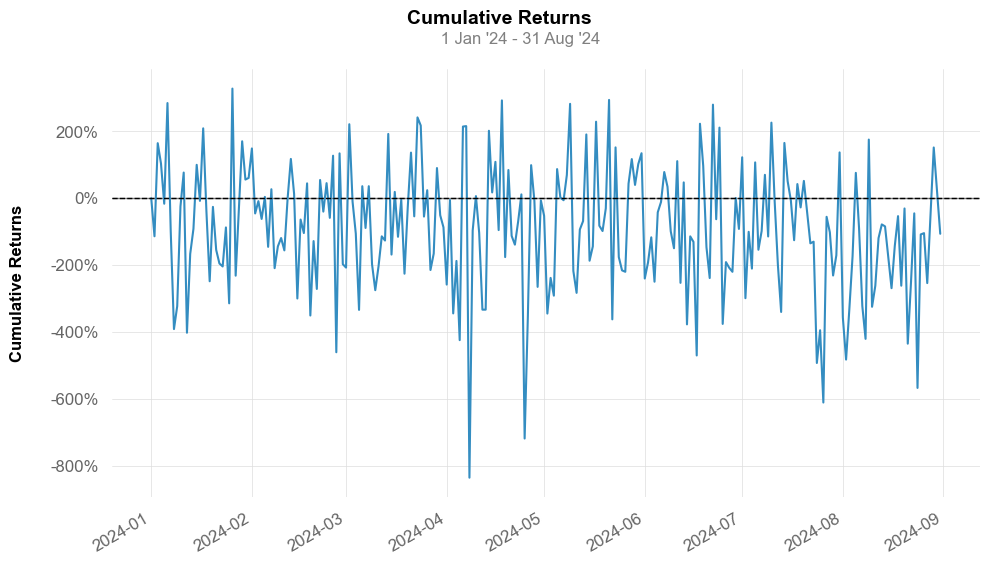

In [275]:
qs.plots.returns(returns) # 누적 수익률 차트

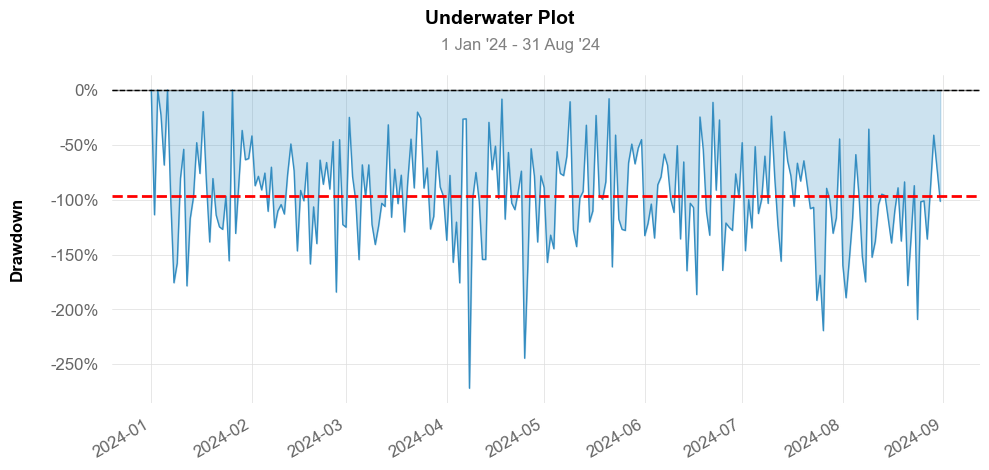

In [276]:
qs.plots.drawdown(returns) # 최대 드로우다운 차트

#### 월별 수익률 히트맵

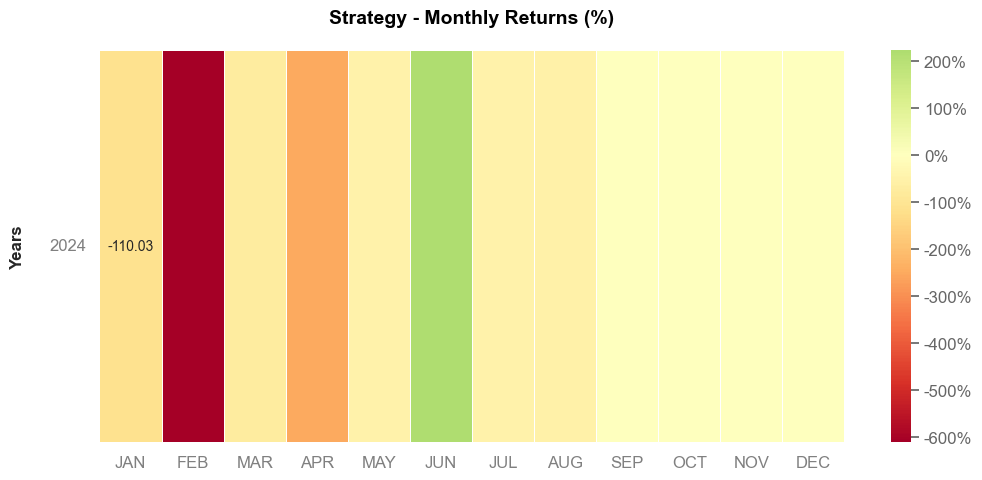

In [7]:
qs.plots.monthly_returns(returns)

## 5.3 투자전략의 성과측정 예제


In [672]:
import yfinance as yf

sse3 = yf.download("005930.KS", start="2010-01-01", end="2024-07-20")

[*********************100%%**********************]  1 of 1 completed


최근 데이터를 잘 읽었는지 확인하자.

In [673]:
_df=sse3.copy()

In [674]:
_df[-10:]

Open     High      Low    Close  Adj Close    Volume
Date                                                               
2024-07-08 87,900.0 88,600.0 86,900.0 87,400.0   87,400.0  24035809
2024-07-09 87,800.0 88,200.0 86,900.0 87,800.0   87,800.0  21336201
2024-07-10 87,600.0 88,000.0 87,100.0 87,800.0   87,800.0  17813847
2024-07-11 88,500.0 88,800.0 86,700.0 87,600.0   87,600.0  24677608
2024-07-12 85,900.0 86,100.0 84,100.0 84,400.0   84,400.0  26344386
2024-07-15 84,700.0 87,300.0 84,100.0 86,700.0   86,700.0  25193080
2024-07-16 86,900.0 88,000.0 86,700.0 87,700.0   87,700.0  16166688
2024-07-17 87,100.0 88,000.0 86,400.0 86,700.0   86,700.0  18186490
2024-07-18 83,800.0 86,900.0 83,800.0 86,900.0   86,900.0  24721790
2024-07-19 85,600.0 86,100.0 84,100.0 84,400.0   84,400.0  18569122

In [675]:
import pandas_ta as ta

n1=30
n2=200
_df['SMA1'] = ta.sma(_df['Close'], length=n1)
_df['SMA2'] = ta.sma(_df['Close'], length=n2)

_df['RSI'] = ta.rsi(_df['Close'], length=14) # 상대강도지수(RSI) 계산

### 연습: np.where 조건식, diff 차이, shift 다음 줄

차액의 합계를 구하는 함수

In [676]:
import numpy as np
import pandas as pd

_df2=pd.DataFrame({"c1": [1, 2, 3, 4, 5], "c2": [6, 7, 8, 9, 10]})

np.where 조건문과 diff(), shift() 함수를 배워보자.

- np.where 조건문으로 c3컬럼 추가: c1이 2미만이면 --> 11을 곱하고, 2이상 4미만이면 --> 22를 곱하고, 5이상이면 --> 33을 더함.
- diff(): 변화량을 계산
- shift(): 지정된 기간만큼 위치만 이동

In [677]:
_df2['c3'] = np.where(
    _df2['c1'] < 2, _df2['c1'] * 11, 
    np.where(_df2['c1'] < 4, _df2['c1'] * 22, _df2['c1'] + 33)
)
_df2['diff'] = _df2['c3'].diff() # 다음 줄과의 차이
_df2['diff1'] = _df2['c3'].diff() - _df2['c3'].diff().shift(1) # diff1의 다음 줄과의 차이. shift() 적용.
_df2['cumsum'] = _df2['diff'].cumsum() # 누적합
_df2['cumsumWithCondition'] = _df2['diff'].where(_df2['c2']>9).cumsum() # c2>9 보다 큰 경우만누적합계

- 줄1~4: 중첩조건문을 적용하고 있다. np.where(조건, 참의 값, 거짓의 값) 안에서 거짓의 경우 중첩 조건문을 사용하고 있다.

```
    c1 < 2 --> 11을 곱하고,
    아닌 경우 2 <= c1 < 4 --> 22를 곱하고
           아닌 경우 c1 > 4 --> 33을 더한다.
```

- 줄5: 컬럼의 현재값과 다음값 차이 $C3_{t} - C3_{t-1}$ 를 계산한다.
- 줄6: 줄5와 같은 기능으로 그냥 _df['diff1'].diff()해도 된다. 하지만 shift() 기능을 적용해 보고 있다.
- 줄7: 누적합계를 계산한다.
- 줄8: 조건을 넣어 누적합계를 계산한다.

In [678]:
_df2

c1  c2  c3  diff  diff1  cumsum  cumsumWithCondition
0   1   6  11   NaN    NaN     NaN                  NaN
1   2   7  44  33.0    NaN    33.0                  NaN
2   3   8  66  22.0  -11.0    55.0                  NaN
3   4   9  37 -29.0  -51.0    26.0                  NaN
4   5  10  38   1.0   30.0    27.0                  1.0

### Buy & Hold 수익률



### 포지션 계산

position은 투자자가 주식시장 내에서 취하는 특정한 투자 상태 또는 입장을 의미한다.
- 1이면 매수
- 0이면 유지
- -1이면 매도

In [679]:
_df['position'] = np.where(_df['SMA1'] > _df['SMA2'], 1,
                          np.where(_df['SMA1'] < _df['SMA2'], -1, 0))
#_df['longPositions'] = np.where(_df['SMA1'] > _df['SMA2'], 1, 0)
#_df['shortPpositions'] = np.where(_df['SMA1'] < _df['SMA2'], -1, 0)
#_df['positions'] = _df['longPositions'] + _df['shortPpositions']

- 코드 np.where(조건, 참인 경우 값, 거짓인 경우 값)에 따라 포지션을 정의한다. SMA1>SMA2 --> 1, 같으면 --> 0, SMA1<SMA2 --> -1

포지션별 건수를 세어보니, 0이 상당히 발생하고 있다. 장기, 단기 이동평균 윈도우 차이만큼 NaN이 발생한 구간이 계산되어 그렇다.
사실 이동평균을 계산하면 보통 소수이고 서로 같을 경우가 많지 않을 수 밖에 없다.

In [643]:
#pd.set_option('display.max_rows', 200) # pd.reset_option('display.max_rows')

In [680]:
_df.groupby(_df['position']).count()

Open  High   Low  Close  Adj Close  Volume  SMA1  SMA2   RSI
position                                                              
-1        1222  1222  1222   1222       1222    1222  1222  1222  1222
 0         199   199   199    199        199     199   170     0   185
 1        2165  2165  2165   2165       2165    2165  2165  2165  2165

In [681]:
_df.where(_df['position']==1)

Open     High      Low    Close  Adj Close       Volume  \
Date                                                                     
2010-01-04      NaN      NaN      NaN      NaN        NaN          NaN   
2010-01-05      NaN      NaN      NaN      NaN        NaN          NaN   
2010-01-06      NaN      NaN      NaN      NaN        NaN          NaN   
2010-01-07      NaN      NaN      NaN      NaN        NaN          NaN   
2010-01-08      NaN      NaN      NaN      NaN        NaN          NaN   
...             ...      ...      ...      ...        ...          ...   
2024-07-15 84,700.0 87,300.0 84,100.0 86,700.0   86,700.0 25,193,080.0   
2024-07-16 86,900.0 88,000.0 86,700.0 87,700.0   87,700.0 16,166,688.0   
2024-07-17 87,100.0 88,000.0 86,400.0 86,700.0   86,700.0 18,186,490.0   
2024-07-18 83,800.0 86,900.0 83,800.0 86,900.0   86,900.0 24,721,790.0   
2024-07-19 85,600.0 86,100.0 84,100.0 84,400.0   84,400.0 18,569,122.0   

                         SMA1     SMA2               RSI  position  
Date                                                                
2010-01-04                NaN      NaN               NaN       NaN  
2010-01-05                NaN      NaN               NaN       NaN  
2010-01-06                NaN      NaN               NaN       NaN  
2010-01-07                NaN      NaN               NaN       NaN  
2010-01-08                NaN      NaN               NaN       NaN  
...                       ...      ...               ...       ...  
2024-07-15           81,220.0 75,277.5 63.95519784764364       1.0  
2024-07-16           81,620.0 75,365.0 66.35239334807203       1.0  
2024-07-17           82,000.0 75,449.5 61.91773132706765       1.0  
2024-07-18 82,316.66666666667 75,536.0 62.45815482884831       1.0  
2024-07-19 82,553.33333333333 75,613.5 52.44036692257297       1.0  

[3586 rows x 10 columns]

In [682]:
_df['earnDiffDaily'] = _df['Close'].diff() # 단순수익률
_df['earnDiffBuyHold'] = _df['earnDiffDaily'].cumsum() # BnH 누적 수익
_df['earnDiffOnlyP1'] = _df['earnDiffDaily'].where(_df['position']>0).fillna(0).cumsum() # 전략의 누적 수익

In [683]:
_df['returnLogDaily'] = np.log(_df['Close']/_df['Close'].shift(1)) # 로그수익률
#qs로 넘겨주기 위해 _df['returnLogDailyOnlyP1'] = np.log(_df['Close']/_df['Close'].shift(1)) # 요걸 더해야 .where(_df['position']>0).fillna(0).cumsum()
_df['returnLogBuyHold'] = _df['returnLogDaily'].cumsum() # BnH 누적로그수익률
_df['returnLogOnlyP1'] = _df['returnLogDaily'].where(_df['position']>0).fillna(0).cumsum() #전략의 누적로그수익률
_df['returnCumulativeBuyHold'] = np.exp(_df['returnLogBuyHold']) - 1 # BnH의 누적로그수익률을 np.exp()로 변환하여 누적단순수익률
_df['returnCumulativeOnlyP1'] = np.exp(_df['returnLogOnlyP1']) - 1 # 전략의 누적로그수익률을 np.exp()로 변환하여 누적단순수익률

- 코드 diff, log return: diff()는 절대적 차이, log return은 상대적 변화율을 나타낸다.

    - (1) df['Close'].diff()는 차이 값을 계산한다. 즉 diff(t) = Close(t) - Close(t-1). 이 값은 순수하게 주가가 얼마만큼 변했는지, 즉 절대적인 가격 변화이다. 예를 들어, 주가가 100에서 105로 상승했다면 diff()는 5가 된다.
    
    - (2) np.log(df['Close']/df['Close'].shift(1))은 로그 수익률이다. log return(t) = log( Close(t) / Close(t-1)). 이 값은 두 가격 사이의 상대적인 변화율을 나타내며, 특히 여러 기간의 수익률을 더하기 쉽게 해준다. 주가가 100에서 105로 상승했다면, 이 방법은 약 0.04879 (또는 4.879%)를 반환한다. 이는 주가가 5% 증가한 것을 로그로 표현한 것이다.

- 코드 np.log(df['Close']/df['Close'].shift(1)).cumsum(): 로그수익률의 누적을 계산한다.
- 코드 np.exp() -1: 로그수익률을 np.exp()로 변환하고 마이너스 1하면 누적단순수익률이 된다.


In [684]:
_df

Open     High      Low    Close         Adj Close    Volume  \
Date                                                                         
2010-01-04 16,060.0 16,180.0 16,000.0 16,180.0 12,274.5908203125  11950800   
2010-01-05 16,520.0 16,580.0 16,300.0 16,440.0  12,471.833984375  27925850   
2010-01-06 16,580.0 16,820.0 16,520.0 16,820.0 12,760.1103515625  22948850   
2010-01-07 16,820.0 16,820.0 16,260.0 16,260.0  12,335.283203125  22107950   
2010-01-08 16,400.0 16,420.0 16,120.0 16,420.0    12,456.6640625  14777550   
...             ...      ...      ...      ...               ...       ...   
2024-07-15 84,700.0 87,300.0 84,100.0 86,700.0          86,700.0  25193080   
2024-07-16 86,900.0 88,000.0 86,700.0 87,700.0          87,700.0  16166688   
2024-07-17 87,100.0 88,000.0 86,400.0 86,700.0          86,700.0  18186490   
2024-07-18 83,800.0 86,900.0 83,800.0 86,900.0          86,900.0  24721790   
2024-07-19 85,600.0 86,100.0 84,100.0 84,400.0          84,400.0  18569122   

                         SMA1     SMA2               RSI  position  \
Date                                                                 
2010-01-04                NaN      NaN               NaN         0   
2010-01-05                NaN      NaN               NaN         0   
2010-01-06                NaN      NaN               NaN         0   
2010-01-07                NaN      NaN               NaN         0   
2010-01-08                NaN      NaN               NaN         0   
...                       ...      ...               ...       ...   
2024-07-15           81,220.0 75,277.5 63.95519784764364         1   
2024-07-16           81,620.0 75,365.0 66.35239334807203         1   
2024-07-17           82,000.0 75,449.5 61.91773132706765         1   
2024-07-18 82,316.66666666667 75,536.0 62.45815482884831         1   
2024-07-19 82,553.33333333333 75,613.5 52.44036692257297         1   

            earnDiffDaily  earnDiffBuyHold  earnDiffOnlyP1  \
Date                                                         
2010-01-04            NaN              NaN             0.0   
2010-01-05          260.0            260.0             0.0   
2010-01-06          380.0            640.0             0.0   
2010-01-07         -560.0             80.0             0.0   
2010-01-08          160.0            240.0             0.0   
...                   ...              ...             ...   
2024-07-15        2,300.0         70,520.0        48,490.0   
2024-07-16        1,000.0         71,520.0        49,490.0   
2024-07-17       -1,000.0         70,520.0        48,490.0   
2024-07-18          200.0         70,720.0        48,690.0   
2024-07-19       -2,500.0         68,220.0        46,190.0   

                  returnLogDaily     returnLogBuyHold    returnLogOnlyP1  \
Date                                                                       
2010-01-04                   NaN                  NaN                0.0   
2010-01-05  0.015941477997688185 0.015941477997688185                0.0   
2010-01-06  0.022851264916768057  0.03879274291445624                0.0   
2010-01-07  -0.03386055042513749 0.004932192489318747                0.0   
2010-01-08  0.009791999904617718 0.014724192393936466                0.0   
...                          ...                  ...                ...   
2024-07-15  0.026886482184584767   1.6786779721561478 0.9418330958537011   
2024-07-16   0.01146801559164129   1.6901459877477891 0.9533011114453425   
2024-07-17 -0.011468015591641182    1.678677972156148 0.9418330958537012   
2024-07-18 0.0023041484848502955   1.6809821206409983 0.9441372443385515   
2024-07-19 -0.029190630669434895   1.6517914899715633 0.9149466136691166   

            returnCumulativeBuyHold  returnCumulativeOnlyP1  
Date                                                         
2010-01-04                      NaN                     0.0  
2010-01-05      0.01606922126081578                     0.0  
2010-01-06     0.039555006180469476          

행열이 교차하는 셀의 값은 df.loc[행][열]로 한다 (또는 loc[행,열]). .loc가 없으면 오류가 발생하지 않지만 경고가 뜬다.

In [685]:
closeFirst = _df.Close.iloc[0]
closeLast = _df.Close.iloc[-1]
earnOnlyP1 = _df.earnDiffOnlyP1.iloc[-1]
print(f"초기 종가: {closeFirst:.2f} 최종 종가: {closeLast:.2f}")
print(f"Buy&Hold 최종 이익: {_df.earnDiffBuyHold.iloc[-1]:.2f} \t전략의 최종 이익: {_df.earnDiffOnlyP1.iloc[-1]:.2f}")
print(f"Buy&Hold 최종 로그 수익률: {_df.returnLogBuyHold.iloc[-1]:.2f} \t전략의 최종 로그 수익률: {_df.returnLogOnlyP1.iloc[-1]:.2f}")
print(f"Buy&Hold 최종 누적단순수익률: {_df.returnCumulativeBuyHold.iloc[-1]:.2f} 배 = ({closeLast}-{closeFirst})/{closeFirst}")
print(f"전략의 최종 누적단순수익률: {_df.returnCumulativeOnlyP1.iloc[-1]:.2f} 배 = ({earnOnlyP1}-{closeFirst})/{closeFirst}")

초기 종가: 16180.00 최종 종가: 84400.00
Buy&Hold 최종 이익: 68220.00 	전략의 최종 이익: 46190.00
Buy&Hold 최종 로그 수익률: 1.65 	전략의 최종 로그 수익률: 0.91
Buy&Hold 최종 누적단순수익률: 4.22 배 = (84400.0-16180.0)/16180.0
전략의 최종 누적단순수익률: 1.50 배 = (46190.0-16180.0)/16180.0


이 계산을 검증해보면, ta.log_return() (로그 수익률), ta.percent_return() (단순 수익률 또는 퍼센트 수익률)의 계산과 일치하고 있다.

In [686]:
_df.ta.log_return(cumulative=True, append=True)

Date
2010-01-04                    0.0
2010-01-05   0.015941477997688185
2010-01-06    0.03879274291445635
2010-01-07   0.004932192489318872
2010-01-08   0.014724192393936443
                     ...         
2024-07-15     1.6786779721561507
2024-07-16     1.6901459877477918
2024-07-17     1.6786779721561507
2024-07-18     1.6809821206410007
2024-07-19     1.6517914899715658
Name: CUMLOGRET_1, Length: 3586, dtype: float64

In [687]:
_df.ta.percent_return(cumulative=True, append=True) # ta.percent_return 

Date
2010-01-04                     0.0
2010-01-05     0.01606922126081578
2010-01-06      0.0395550061804697
2010-01-07   0.0049443757725586845
2010-01-08    0.014833127317676054
                      ...         
2024-07-15       4.358467243510507
2024-07-16       4.420271940667491
2024-07-17       4.358467243510507
2024-07-18       4.370828182941904
2024-07-19       4.216316440049444
Name: CUMPCTRET_1, Length: 3586, dtype: float64

<Axes: xlabel='Date'>

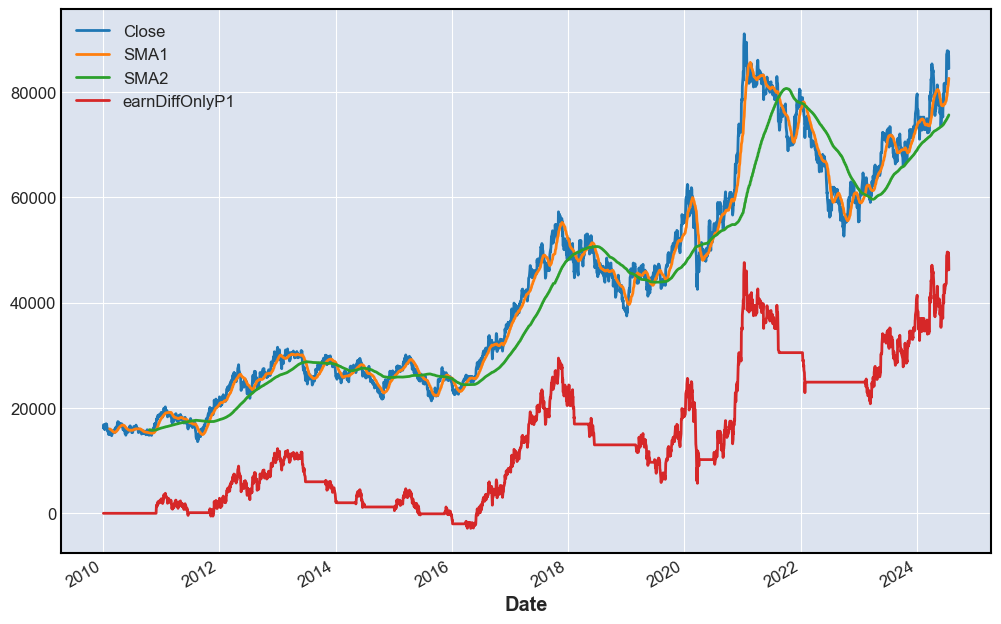

In [688]:
_df[ [ 'Close', 'SMA1', 'SMA2', 'earnDiffOnlyP1' ] ].plot(grid=True, figsize=(12, 8))

보기 좋게 챠트를 그리기 위해, 일부 데이터만 가져오자.

In [689]:
_df1 = _df[-800:]

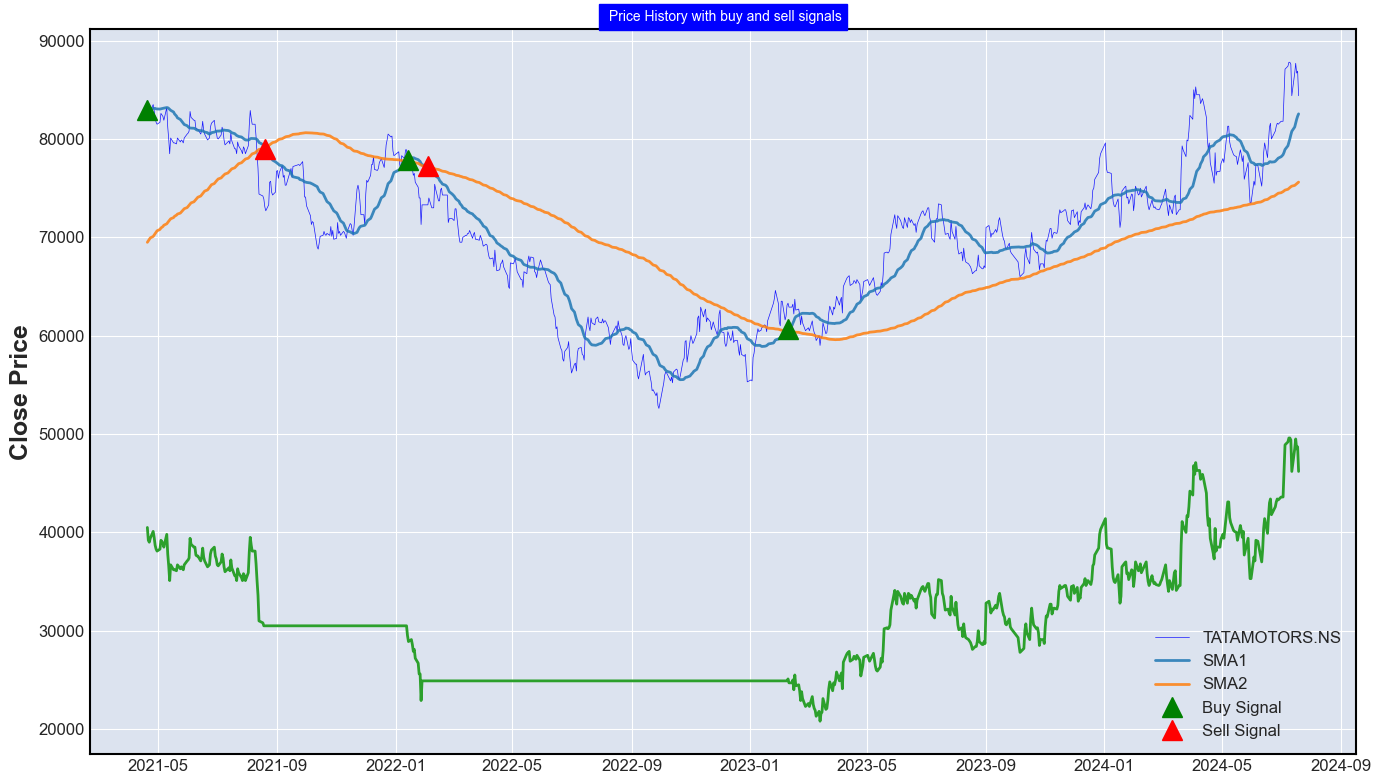

In [690]:
#from datetime import date
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,8)) # 여러 subplot의 격자 레이아웃을 배치하고, 축(Axes) 객체를 반환하고 이를 통해 시각화
#ax.plot(data['Adj Close'] , label = stocksymbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(_df1['Close'] , label = 'TATAMOTORS.NS', linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(_df1['SMA1'], label = 'SMA1', alpha = 0.85)
ax.plot(_df1['SMA2'], label = 'SMA2' , alpha = 0.85)
ax.plot(_df1.loc[(_df1['position'] == 1) & (_df1['position'].shift(1) != 1)]['SMA1'],
        '^', ms=15, label='Buy Signal', color='green')
ax.plot(_df1.loc[(_df1['position'] == -1) & (_df1['position'].shift(1) != -1)]['SMA1'],
        '^', ms=15, label='Sell Signal', color='red')
ax.plot(_df1['earnDiffOnlyP1'])
ax.set_title(" Price History with buy and sell signals", fontsize=10, backgroundcolor='blue', color='white')
#ax.set_xlabel(f'{startdate} - {end_date}' , fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend() #ax.plot(label='SMA') 챠트의 label을 범례로 작성한다.
ax.grid(True) # 격자선을 켠다 (True)
plt.tight_layout() # 제목, 레이블이 다른 요소들과 겹칠 수 있는 문제를 자동으로 조정
plt.show()

### 수익 분석

앞서 수익률을 계산하였다.

수익을 상세하게 분석하는 패키지에서는 일간수익률을 입력받는다.

약간의 코드만 작성하면 수익률을 상세하게 분석한 보고서나 챠트를 손쉽게 작성할 수 있다.

우리가 계산한 수익률은 다음과 같다.
- earnDiffOnlyP1는 전략의 누적 수익
- returnLogDaily는 로그 수익률
- returnLogOnlyP1 전략의 누적로그수익률

불행히도, 단순수익률은 계산하지 않았다.

단순수익률은 ( Close(t) - Close(t+1) ) / Close(t+1), 변화율로 계산할 수 있다.
누적단순수익률을 코드로 보면:

df['Close'].pct_change() 또는 (df['Close'].diff()/df['Close'].shift(1))로 작성한다.

투자전략의 단순 수익률을 코드로 작성해보자. 이 값은 나중에 exp로 변환하고 1을 빼서 누적단순수익률을 계산한다 (returnCumulativeOnlyP1)

In [691]:
_df['Close'].pct_change().where(_df['position']>0).fillna(0) # returnLogOnlyP1

Date
2010-01-04                     0.0
2010-01-05                     0.0
2010-01-06                     0.0
2010-01-07                     0.0
2010-01-08                     0.0
                      ...         
2024-07-15    0.027251184834123254
2024-07-16    0.011534025374855927
2024-07-17   -0.011402508551881407
2024-07-18   0.0023068050749712743
2024-07-19   -0.028768699654775576
Name: Close, Length: 3586, dtype: float64

누적단순수익률을 계산해보자.

In [692]:
_df['Close'].pct_change().where(_df['position']>0).fillna(0).sum() # returnCumulativeOnlyP1

1.2157172537780374

In [693]:
print(f"전략의 최종 누적단순수익률: {_df.returnCumulativeOnlyP1.iloc[-1]:.2f} 배 = ({earnOnlyP1}-{closeFirst})/{closeFirst}")

전략의 최종 누적단순수익률: 1.50 배 = (46190.0-16180.0)/16180.0


이 값 누적단순수익률 1.50배는 아래 보고서 Cumulative Return=149.66%과 일치하고 있다.
그러나 바로 앞서 계산한 값과는 약간의 차이가 있다. 왜 차이가 날까?

식에서 보듯이 첫 종가를 사용하고 있다. 그러나 전략을 적용한다면, 이동평균의 기간(n)만큼은 건너뛰고 계산하지 않는다 (이동평균이 계산되지 않는 경우 na). 당연히 차이가 발생할 수 밖에 없다. 이동분량만큼의 차이로 인해 서로 다른 값을 보여주고 있다.

In [694]:
returnSimpleOnlyP1 = _df['Close'].pct_change().where(_df['position']>0).fillna(0)

In [695]:
sharpe_ratio = qs.stats.sharpe(returnSimpleOnlyP1) # 샤프 비율 계산
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

max_drawdown = qs.stats.max_drawdown(returnSimpleOnlyP1) # 최대 드로우다운 계산
print(f"Max Drawdown: {max_drawdown:.2%}")

Sharpe Ratio: 0.42
Max Drawdown: -42.78%


성과측정을 하면 출력되는 항목은 다음과 같다.

- Start Period               : 시작일 2010-01-04
- End Period                 : 종료일 2024-07-19
- Risk-Free Rate             : 0.0% 일반적으로 무위험 자산으로 간주되는 정부 발행 채권(예: 미국 국채)의 이자율을 말한다. 우리가 제공하지 않았으므로 0이다.
- Time in Market             : 58.0% 투자일수/총투자일수의 비율, 58%의 시간동안 투자 나머지 42%는 현금으로 보유.
- Cumulative Return          : 149.66% (최종가치/초기투자금액 - 1) x 100으로 계산한다. 앞 계산 returnCumulativeOnlyP1 값에 해당한다.
- CAGR﹪                     : 4.44% Compound Annual Growth Rate, 연평균 복리 성장률을 의미한다.
- Sharpe                     : 0.42 (평균수익률 (보통 연간) - 무위험 이자율 (예: 미국 국채 수익률 등) / 표준편차)로 계산한다. 수익률이 위험(표준 편차)에 비해 얼마나 좋은지 평가
- Prob. Sharpe Ratio         94.18%, Sharpe Ratio가 얼마나 신뢰할 수 있는지에 대한 확률
- Smart Sharpe               0.41

- Expected Daily %           : 0.03% 일간 기대 수익
- Expected Monthly %         : 0.52%
- Expected Yearly %          : 6.29%
- Kelly Criterion            : 4.37% 전체 자본의 이 만큼 투자하는 것이 장기적으로 최적 (승리확률 x (베팅의 승리비율 + 1) - 1)/ 베팅의 승리비율
- Risk of Ruin               : 0.0% 자산의 투자 기간 동안 모든 자본을 잃을 확률
- Daily Value-at-Risk        : -2.1% VaR로 줄여쓰며, 주어진 신뢰 수준에서 특정 시간 동안 발생할 수 있는 최대 손실액
- Expected Shortfall (cVaR)  : -2.1%

- MTD                        : 3.56% Month-to-Date 이번 달의 시작일부터 현재까지 수익률
- 3M                         : 6.03% 지난 3개월간의 수익률
- 6M                         : 17.71% 지난 6개월간의 수익률
- YTD                        : 7.52% YTD (Year-to-Date) 올해 초부터 현재까지의 수익률
- 1Y                         : 17.22% 지난 1년간의 수익률

- Avg. Drawdown              : -6.79% 평균 최대 낙폭. 최고점에서 최저점으로 얼마나 하락했는지를 평균. 총낙폭/낙폭발생횟
- Avg. Drawdown Days         : 131 평균 복구 기간을 나타내며, 이는 포트폴리오가 하락에서 회복되는 데 걸리는 평균 일수
- Recovery Factor            : 2.84 복구 능력을 나타내며, 최대 낙폭 이후 2.84배의 성과를 내며 회복
- Ulcer Index                : 0.22 상대적으로 낮은 하락 위험. 계산식에 하락의 깊이(최고점-종가)와 일수(지속)가 입력된다.
- Serenity Index             : 0.19 수익성과 안정성을 모두 고려해서 계산식에 CAGR, Max Drawdown, Ulcer Index가 입력된다.


In [550]:
#qs.reports.full(returnSimpleOnlyP1)

# 6. 백테스트

백테스트는 과거 데이터에 대해 투자전략을 테스트한다는 뜻이다.

비록 과거에 대해 테스트하지만, 어떤 투자 전략이 우수한 성과를 내는지 평가하고 이를 바탕으로 미래의 투자를 어떻게 해야 할지 결정하게 된다.

과거의 주가 시계열에서 패턴이나 신호를 읽어 미래를 예측할 수 있는지 의문이 있을 수 있다.

그럼에도 불구하고, '과거는 미래를 말해준다'는 가설을 유효하다면 백테스트는 유용하다.

주요 절차는 다음과 같다.
- 투자 전략을 수학적 또는 논리적 규칙으로 설계한다. 예를 들어 이동평균이 상향돌파하거나 재무비율이 일정 수준이면 거래를 실행하는 식이다.
- 과거 데이터를 수집하고, 필요한 형식으로 변환한다.
- 투자 전략을 적용하여 거래를 시뮬레이션한다.
- 수익률 등 투자 성과를 분석한다.
- 전략을 최적화하고, 검증한다
- 실제 투자에 적용한다.

## 6.1 투자 전략

백테스팅은 도구일뿐이고 투자 전략이 중요하다.

투자 전략은 투자자가 시장에서 수익을 극대화하거나 손실을 최소화하기 위해 사용하는 방법으로 보자.

투자 전략은 수익율을 높이기 위한 다양한 방법이 활용할 수 있고, 특정 시장 조건에 더 효과적인 투자 전략이 있을 수 있다.
- 가치투자: PER, PBR 등 지표에 따라 내재 가치보다 저평가 주식에 투자
- 성장투자: EPS 성장률, 매출 성장률 등 높은 성장 잠재력을 가진 기업의 주식에 투자
- 배당투자: 안정적 배당금을 지급하는 기업의 주식에 투자
- 기술적분석투자: 과거 주가와 거래량을 분석하여 미래의 주가 변동을 예측. 주로 챠트분석, 패턴인식이나 이동 평균선, RSI, MACD 등 지표를 활용하며, 주관적인 해석이 들어갈 수 있다.
- 퀀트투자: 수학적 모델과 통계적 기법을 사용하여 투자 결정을 내리는 전략. 데이터와 알고리즘을 적용한 정량적 투자 방법으로 보통 자동화한다.
- 헤지 전략 (Hedge Strategy): 옵션, 선물, 공매도와 같이 포트폴리오의 위험을 최소화하기 위해 상반된 포지션을 동시에 취하는 전략


백테스팅 라이브러리에서는 RSI, MACD, Stochastic Oscillator 같은 지표를 신호로 매매한다.
- 실적 발표, 금리 변동, 경제 뉴스 등에 기반한 신호를 활용할 수 있다.
    - 매출 증가율이 예상치를 상회하면 매수, 반대면 매도.
    - 금리 인상 시 금융주를 매수, 금리 인하 시 성장주 매수.
    - 긍정적인 경제 지표 발표 시 시장의 전체 상승을 예상하고 매수. 부정적 지표에는 방어적인 섹터로 포지션 변경.

- 많이 쓰이는 이동평균지표에 따라 투자할 수도 있다. 단기이동평균선과 장기이동평균선을 계산하고, 상승돌파매수 하락돌파 매도한다.

투자 전략이 매우 성공적이라고 하자. 그 알고리즘은 매우 높은 가치를 가지게 된다. 실로 많은 투자 기관이나 트레이더는 자신만의 전략을 비공개로 유지하며, 알고리즘이 외부로 유출되지 않도록 철저히 보호한다.

높은 수익률을 내는 전략이 알려지는 경우에도 사실 문제가 될 수 있다. 시장 참여자들이 모두 같은 전략을 사용하면, 시장에 미치는 영향으로 인해 전략의 효과가 감소할 수 있다.

## 6.2 라이브러리

백테스팅은 필수적이라고 볼 수 있는 만큼, 많은 라이브러리가 발표되어 왔다.

- Zipline: Quantopian에서 개발되었으며 2020이후 개발 중단으로 보인다.
- QantConnect: 클라우드 기반, 사용료 있다.
- Quantiacs: Python과 MATLAB으로 전략을 코딩, 알고리즘 트레이딩 대회를 운영 
- Quantstats: 백테스팅 후의 성능 분석
- Pyfolio: 성능 분석
- Alphalens 알파 팩터 분석, Quantopian에서 사용하던 도구 중 하나이다.
- Quantlib: 금융 도구 및 파생상품 가격 계산 라이브러리로 백테스팅보다는 금융 공학, 옵션, 이자율 모델링 등에 중점을 둠.
- TradingView: 웹 기반 차트 및 기술적 분석 도구로, Pine Script를 사용하여 전략을 작성 가능.
- TA-Lib: 기술적 분석 지표 계산에 특화된 라이브러리
- pycaret: 머신러닝 자동화 도구로 퀀트 전략 개발에 도움을 줌.
- Backtrader: 가장 인기 있는 백테스팅 프레임워크 중 하나
- Backtesting.py: 가볍고 빠르게 사용 가능한 백테스팅 프레임워크
- bt (https://github.com/pmorissette/bt): 유연하고 강력한 포트폴리오 백테스팅 프레임워크
- PyAlgoTrade -> Basana (https://github.com/gbeced/basana): PyAlgoTrade는 개발이 멈추고 Basana가 뒤따르고 있다.
- VectorBT: 벡터화된 백테스팅 라이브러리, Pandas와 통합이 강점 (https://github.com/twopirllc/pandasta/blob/main/examples/VectorBT_Backtest_with_Pandas_TA.ipynb)

이 중에서 Backtrader, VectorBT, Backtesting.py는 Python 백테스팅 라이브러리 중에서 많이 사용되며, QuantConnect는 클라우드 기반에서 인기가 있다. TradingView는 기술적 분석 도구로 유명하고, TA-Lib은 다양한 기술적 지표를 계산하는 데 널리 사용되고 있다.

### zipline

Zipline은 Quantopian에서 개발된 백테스팅 라이브러리로, 주로 Quantopian 플랫폼에서 알고리즘 트레이딩을 수행하기 위해 사용되었다.
현재는 오픈 소스로 공개되어 있으며, QuantConnect 등과 통합하여 사용 가능하다.

빠른 실행을 위해 데이터와 알고리즘이 벡터화되어 있어 큰 규모의 데이터를 효율적이다. 주로 백테스팅에 초점을 맞추고 있어, 실시간 트레이딩에는 적합하지 않다.
처음 설정할 때 다소 복잡할 수 있으며, 특히 Windows 환경에서의 설치가 까다로울 수 있고, 가능하다면 Linux나 macOS에서 사용을 권장한다.

error "failed building wheel for h5py"
python이 32비트라서 python -c "import sys; print(sys.maxsize > 2**32)"로 확인해서 (1) false는 32, (2) true는 64
오류 pip install --upgrade pip setuptools wheel

Quantopian의 종료 이후, 라이브러리 업데이트가 더디고, 최신 Python 버전과의 호환이 어려울 수 있으며 Python 3.6에서 잘 작동한다.

zipline-reloaded은 zipline을 이어받아 개발을 지속하고 있다. 그래도 import zipline으로 라이브러리를 사용한다.
python 3.7, 3.8, 3.9 64비트를 지원한다.

### Backtrader

독립적인 개발자에 의해 개발된 백테스팅 라이브러리로, 오픈 소스로 제공되며 커뮤니티에 의해 활발히 유지보수되고 있다.
전략을 클래스로 정의하고, 간단하게 백테스팅을 수행할 수 있고, Interactive Brokers(IB)나 Oanda와 같은 브로커를 통해 실시간 거래를 수행할 수 있다.

### backtesting.py

백테스팅을 간단하고, 가볍게 시작하려면 backtesting.py가 적합하다.

의존하는 외부 라이브러리가 상대적으로 적어, 설치와 사용이 간편하다.

backtesting.py는 기본적으로 Python 3.6 이상에서 작동하며, 최신 버전 3.7, 3.8, 3.9 등에서도 가능하다.

backtesting.py는 기본적으로 Bokeh를 사용하여 백테스팅 결과를 시각화한다 (반면에 Backtrader는 matplotlib을 사용한다)


## 6.3 투자전략의 실행

백테스팅 라이브러리에서의 투자 전략이 실행되면서, 어떤 객체가 생성되고 다음 어느 객체로 넘어가는 등의 흐름이 차이가 있다.

그러나 정리하면 신호 -> 매수/매도 -> 포지션 생성/종료 -> 주문 체결 -> 거래 완료 순차적으로 진행된다.

1단계: 신호가 발생하면 매수 또는 매도

```
if 매수신호의 발생:
    self.buy()
elif 매도신호의 발생:
    self.sell()
```

2단계: Position 객체 업데이트, 주의: (buy, sell 후) 주문이 체결되어 거래가 완료되어야 청산된다! 결국, 포지션은 주문이 체결되었을 때만 변경되며, 새로운 주문을 할 때는 이전 포지션이 자동으로 닫히는 것이 아니라 새로운 포지션이 추가된다.

- self.position == None: 포지션이 없는 상태, 어떤 자산도 보유하고 있지 않다.
- self.position.size 보유 중인 주식 수
    - 0: 포지션이 완전히 청산된 상태
    - 양수: 롱포지션 (주식을 매수한 상태)
    - 음수: 숏포지션 (공매도 상태, 백테스트에서도 공매도가 가능하다)

잠깐. 공매도는 매도를 통해 포지션을 시작하는 것이 맞고, 이를 매수로 청산하는 방식이다.
- 매수: 주식을 사서 보유한 상태 (Long Position) -> 매도로 청산. 롱포지션 청산이라고 하며, 공매도라고 하지는 않는다.
- 공매도: 주식을 보유하지 않은 상태에서 빌려서 파는 상태 (Short Position) (대차거래(주식대여)가 필요하다) -> 이 경우 나중에 매수로 청산된다. 아래 코드에서 포지션이 없는데도 불구하고 매도하면 -> 공매도이다.

- self.position.size가 어떻게 갱신되는지 설명해보자.
    - 롱포지션 (position.size>0)에서 매도: (1) 일부매도 (position.size 감소), (2) 전량매도 (position.size==0)
    - 롱 -> 숏 전환 (매도 수량이 초과하는 경우 예를 들어 10개 보유에서 15개 매도): position.size==-5
    - 숏에서 매수 : position.size > 0 양수가 될 수 있다.

next() 함수에서 포지션에 따른 매매조건을 살펴보자.
- 포지션이 없으면 (self.position이 None이거나 0):
    - 조건에 따라 매수: self.buy()가 호출되면 -> 해당 포지션의 수량과 가격이 self.position 객체에 저장 (self.position.size > 0)
    - 조건에 따라 매도: self.sell()을 호출하면 (공매도 포지션) -> 음수 수량(self.position.size < 0)이 저장
- 포지션이 있으면 (self.position.size != 0):
    - 추가진입(매수/매도): 이미 열린 포지션에 추가 진입
        - 추가 매수: self.position.size 증가
        - 추가 매도: self.position.size 증가, 공매도 확장 
        - 반대 포지션: 매수->매도는 기존포지션 청산
    - 포지션 청산:
        - 명시적 청산, 포지션이 완전히 닫히고 수량이 0으로 바뀐다 (self.position.size == 0이 되지만, None으로는 변하지 않는다 (Backtrader의 설계))
        - 부분 청산: 남은 수량이 반영되어 self.position.size가 조정됩니다.
        - self.close()를 생략할 수 있다. 추가매수 또는 다양한 진입조건이 있는 경우 무조건 청산하면 예상하지 못한 결과를 초래할 수 있다.

```
if not self.position: # 포지션 없을 경우 (None 또는 0)
    if 매수신호:
        self.buy(size=10)  # [10주 매수] -> long 포지션
    elif 매도신호:
        self.sell(size=10)  # [10주 공매도] -> (short 포지션) (포지션이 없어도 공매도)
else: # 포지션이 있을 경우
    if self.position.size > 0:  # 매수 포지션이 있을 때
        if 부분청산신호:
            self.sell(size=5)  # 매수 포지션 일부(5주) 매도
        elif 완전청산신호:
            self.close()  # 전체 포지션 청산
    elif self.position.size < 0:  # 공매도 포지션이 있을 때
        if 부분청산신호:
            self.buy(size=5)  # 공매도 포지션 일부(5주) 매수하여 청산
        elif 완전청산신호:
            self.close()  # 전체 포지션 청산
```

단, 이렇게 코딩하면 전략이 의도한 방향으로 적용되지 않을 수 있다.
즉 [10주 매수] -> position.size==10으로 계속 유지 -> if not self.position 조건이 충족되지 않아서 [10주 공매도]가 전혀 발생하지 않는다.


3단계: Order 객체 생성. 주문이 체결될 때까지 대기

```
self.order = self.buy()  # 주문 생성
```

4단계: 주문이 체결되면 Trade 객체 생성하고, 매수 가격, 매수한 자산의 양, 매도 후 얻은 수익 등의 정보를 기록한다.

```
trade = self.trades # 현재 트레이드 목록
```

5단계: 매도 명령을 하면, 포지션 종료. 포지션이 종료되면 해당 트레이드는 마무리되고, 거래의 수익(또는 손실)이 확정된다

```
self.sell()  # 매도로 포지션 종료
```

### Strategy 클래스

백테스트에서 Strategy 클래스는 투자전략 그 자체이고 핵심이다. 다음과 같은 유용한 메소드와 속성을 제공한다.

주요 속성
- data: numpy array 데이터, Backtest()에 넘겨준 데이터가 여기에 전달된다.
    - data.Close[-1]은 최근(가장 최신)의 종가를 가리킨다.
    - data.Close는 종가 시계열을 나타내고, data.df는 전체 데이터를 DataFrame 형식으로 나타낸다.
- position: 현재 포지션 상태를 나타낸다. (롱 포지션 또는 숏 포지션 여부 등)
예를 들어, self.position.is_long은 현재 롱 포지션(매수)인지 여부를 의미한다.

- trades: 현재 진행 중인 모든 트레이드의 목록이다.

- closed_trades: 이미 종료된 트레이드 목록이다.

- orders: 현재 활성화된 주문 목록이다.

- equity: 현재 투자금 전액 = 초기 투자금 + 포지션의 현재 가치로 계산된다.

주요 메소드
- init(): 초기화 작업을 수행한다.
필요한 데이터나 객체를 설정하고, 전략 시작 전에 한 번만 호출된다.
예를 들어, 기술적 지표 계산이나 필요한 데이터를 저장할 때 사용된다.

- I(): 전략에 추가할 지표를 생성한다.

- next(): 전략의 핵심 논리가 구현되는 메소드로, 데이터의 각 행(하루의 시가, 고가, 저가, 종가)에 대해 한 번씩 호출된다.
super().next()를 사용하면 부모 클래스의 next() 메소드를 호출할 수 있다.

- buy() & sell(): 매수 및 매도 주문을 생성하는 함수. 수량을 지정하지 않으면 1주 단위로 매매가 이루어진다. 매매 명령 후 자동으로 포지션이 갱신되고, 주문이 실행된다.

    - 예를 들어, 매수 주문 10개 하면 self.buy(size=10)
        - self.order = self.buy(size=10) 주문하면 Order 객체 생성, 주문이 체결되면 notify_order() 메소드가 자동으로 호출되어 주문 상태를 추적한다.
        - self.position.size=10 (매수로 10주 보유)
        - self.position.is_long=True, self.position.is_short=False "롱(long)" 포지션으로 설정
    
    - 매도 주문 5개 하면 self.sell(size=5)    
        - self.position.size=5 (10주에서 5주 매도)
        - self.position.is_long=True (아직 롱 포지션, 5주 남음)
    
    - 나머지 매도 주문으로 포지션 청산 self.sell(size=5)   
        - self.position.size: 0 (포지션이 청산됨)
        - self.position.is_long=False (포지션이 없으므로 롱/숏 의미 없음)

- close(): 사용자가 호출하며 자동으로 호출되지 않는다. 포지션 청산은 새로운 주문으로 취급되어, Order를 자동으로 생성한다. 
    - 롱 포지션이 있는 경우 -> sell 주문이 생성
    - 숏 포지션이 있는 경우 -> buy 주문이 생성
    - 주문이 체결되면 해당 포지션이 완전히 종료되고 self.position.size==0이 된다. 다시 중립 상태로 돌아가며, is_long와 is_short 모두 False가 된다. 이는 실제 거래에서 청산하는 주문과 동일하게 체결로 기록 된다 (trade execution).

### Position 클래스: next함수에서 갱신

Position 클래스는 현재 보유 수량(size), 평균 진입 가격(price) 등을 제공하며, 앞서 Strategy 클래스에서 설명한 self.position에 저장되어 포지션 상태를 읽는 용도로만 사용된다고 이해하자.

주식 포지션은 크게 두 가지로 나눌 수 있다. 어떤 포지션을 택할 것인지, 쉽게 생각하면 상승을 예상하면 롱 포지션으로, 반대로 하락을 예상하면 쇼트 포지션으로 가면 된다.

- Long position 투자자가 주식을 매수하고 이를 보유하는 상태를 의미. 삼성전자 10주를 매수하고 보유하고 있는 경우 롱포지션을 취하고 있다고 말한다. 주가가 상승할 것이라고 예상하여 주식을 산 경우이다. 주식의 가격이 오르면 수익을 얻는다.
- Short position 투자자가 주식을 빌려서 매도한 상태를 의미한다. 나중에 주가가 하락하면 더 낮은 가격으로 다시 사들여 이익을 얻는 전략. 삼성전자를 10주 빌려서 매도하고, 더 떨어지기를 기다리면 (그 때 주식을 갚으면 된다) 숏포지션을 취하고 있다고 말한다.

주요 속성과 메서드
- size: 현재 보유하고 있는 포지션의 수량. 가치(self.position.size * self.dataclose[0])를 계산할 수 있다.
    - self.position.size == 0 또는 if not self.position 현재 보유하고 있는 포지션이 없다, 즉 0이다.
    - self.position.size: 보유하고 있는 주식의 수량을 의미한다.
- price: 포지션을 열었을 때의 평균 진입 가격이고, 수익률 계산에 사용된다.
- pl: 현재 포지션의 실현되지 않은 손익, 즉 포지션을 청산하지 않은 상태에서의 이익 또는 손실이다.
- is_long: 현재 포지션이 롱 포지션인 경우 True를 반환한다.
- is_short: 현재 포지션이 숏 포지션인 경우 True를 반환한다.
- pl_pct: 포지션의 퍼센트 수익률
- close(): backtesting.py에서는 close()함수를 제공하지만, 읽는 용도로 주로 사용되니까 명시적 호출은 필요한 경우에만 하자. backtrader에서는 buy(), sell(), close()와 같은 주문 함수에 따라 포지션이 갱신된다.

### Order 클래스: notify_order 함수에서 관리

Strategy.sell() 매수, Strategy.buy() 매도하면 Order가 자동으로 생성되고 (notify_trade() 함수 호출), 주문이 체결되기 전까지는 대기 상태이다. 주문이 체결되면 Order가 Trade로 전환되며, 포지션이 생성되거나 변경된다.

주요 속성과 메서드
- status: 주문의 현재 상태로 다음과 같이 구분된다.
    - Created: 주문이 생성되었으나 아직 제출되지 않은 상태.
    - Submitted: 주문이 거래소에 제출된 상태.
    - Accepted: 주문이 거래소에서 수락된 상태.
    - Completed: 주문이 완전히 체결된 상태.
    - Canceled: 주문이 취소된 상태.
    - Expired: 주문이 만료된 상태.

- is_long: 주문의 크기(size)가 양수이면 True, 매수 주문임을 의미한다.
- is_short: 주문의 크기(size)가 음수이면 True, 매도 주문임을 의미한다.
- size: 주문의 수량이고, 두 가지 경우로 구분된다:
    - 0 ~ 1 사이: 투자비율을 의미, 예를 들면 0.8은 80% 투자를 뜻한다.
    - 1: size를 설정하지 않는 경우의 기본 값, 최대 개수 100% 투자를 의미
    - 1 이상: 1이상인 경우 주문개수를 의미한다.
- price: 주문이 생성된 가격
- isbuy(), issell() 매수 주문인지, 매도 주문인지 확인
- sl (Stop-Loss 가격): 손실을 제한하기 위해 설정하는 가격이다. 이 가격에 도달하면 자동으로 매도 또는 매수 주문이 실행된다. 예를 들어, A 주식을 100달러에 매수한 후 스탑 로스 가격을 90달러로 설정하면, 주가가 90달러로 떨어졌을 때 자동으로 매도 주문이 실행되어 손실을 최소화할 수 있다.

Order 객체의 흐름
- 주문 생성: Strategy.buy() 또는 Strategy.sell() 메서드를 호출하여 주문이 자동 생성된다. 이때 Order 객체가 만들어진다.

- 주문 대기: 생성된 주문은 초기 상태로 대기하며, 거래소에서 수락될 때까지 Submitted 또는 Accepted 상태에 있다.

- 주문 체결: 주문이 거래소에서 체결되면 Completed 상태가 되며, 이 시점에서 포지션이 생성되거나 변경된다. 체결된 주문은 자동으로 Trade 객체로 전환되어 기록된다.

- 주문 취소/만료: 주문이 취소되거나, 유효 기간이 지나 만료되면 Canceled 또는 Expired 상태가 된다. 이 경우, 주문은 체결되지 않았으므로 포지션에 영향을 미치지 않는다.

### Trade 클래스: notify_trade 함수에서 관리

Order가 체결되면, 그 결과로 Trade 객체가 생성된다 (notify_trade() 함수 호출)
Trade는 실제로 체결된 거래이고, 포지션에 변화가 발생할 때 기록된다.
예를 들어, 매수 주문이 체결되면 포지션이 증가하고, 이때 Trade 객체가 생성된다.
Trade는 매수와 매도의 체결된 결과로, 손익 계산 및 거래 내역에 기록된다.

주요 속성과 메서드
- size: 거래된 자산의 수량, 예를 들어, 100주를 매수하거나 매도했다면 size는 100이 된다 (0~1은 투자비율)
- price: 거래가 체결된 가격
- value: 거래의 총 가치, 예를 들어, 100주를 주당 5000원에 매수했다면 value는 500,000원이다.
- commission: 거래 시 발생한 수수료, 브로커에게 지불하는 비용이다.
- pnl (Profit and Loss): 거래로 인해 발생한 손익, 거래가 종료된 후에만 계산되며, 수수료를 포함한 순수익을 보여준다.
- is_long: True이면 롱 포지션(매수 후 보유)을 나타내며, False이면 숏 포지션(매도 후 보유)을 의미한다.
- isclosed, isopen: 거래가 종료되었는지 여부(True/False), 거래 open -> 포지션 size 증가, 거래 close -> 포지션 0
- duration: 포지션이 유지된 기간, 포지션이 열린 후부터 청산될 때까지의 시간을 측정한다.

Trade 객체의 흐름
- 주문 체결: Order가 체결되면, 그 결과로 Trade 객체가 생성된다. 이 객체는 새로운 포지션을 열거나 기존 포지션을 확장한다.
- 포지션 관리: Trade 객체는 포지션의 상태를 추적한다. 롱 포지션인지 숏 포지션인지, 얼마나 많은 자산이 거래되었는지, 포지션이 열린 기간은 얼마나 되는지를 관리한다.
- 거래 종료: 포지션이 청산되면 Trade 객체는 손익(pnl)을 계산하고, 거래의 총 결과를 기록한다. 이 시점에서 is_closed 속성은 True로 변경된다.
- 성과 평가: 여러 Trade 객체가 생성되고 종료됨에 따라 개별 거래의 결과를 집계해서 전체 전략의 성과를 평가한다.

### backtesting.py과 backtrader 간 Position, Order, Trade의 차이

Position, Order, Trade를 어떻게 통제하는지 서로 차이가 있다.

- Position
    - backtrader는 self.position을 통해 통제한다.
    - 반면 backtesting.py는 온전한 클래스가 있어 이를 통해 통제한다.
    - 따라서 close()가 차이가 있다.
        - Backtrader에서는 Strategy 클래스의 self.close(), 현재 포지션을 종료하기 위한 매도 또는 매수 주문을 생성한다. 직접 포지션 객체에서 close()를 호출하는 방식은 지원되지 않는다. Backtrader의 Position 객체는 상태만 나타낸다 (현재 포지션이 있는지, 몇 주를 보유 중인지 등), 주문(Order)이 포지션을 변경하는 유일한 수단이다. 즉, 포지션을 직접 조작하는 대신 주문(buy(), sell(), close())을 통해 관리한다.
            - (backtrader는 self.close() -> 주문생성 -> 주문체결 -> 포지션 종료)
        - 반면 Backtesting.py에서는 포지션의 self.position.close() 함수를 통해 포지션을 직접 종료할 수 있다. self.close() 메서드는 존재하지 않거나 오류를 발생시킨다.

- Order, Trade:
    - Backtrader는 notify_order, notify_trade 함수를 통해서 보다 세밀한 통제가 가능하다. order.size, borker.cash, broker.equity 등 직접 설정이 가능하다. size>1은 개수이지만, 0~1은 투자비율로 해석되며 addsizer를 통해 설정한다.
    - 반면 backtesting.py는 객체지향 원칙에 따라 은익해서 개발자가 호출할 필요 없어 복잡성을 덜었다. 대신 Position 클래스를 통해 Order나 Trade를 개발자 노력없이 자동으로 관리하고 있다 (order.size, broker.cash 등을 직접 사용할 수 없다. broker.equity 대신 그냥 self.equity라고 해야 한다). size는 0~1 투자비율, 1이상은 개수를 의미한다 (비율일 경우 addsizer 같은 설정이 필요 없고, 직접 비율을 적어주면 된다)
    - 특히, size=1의 의미가 서로 다르다.
        - backtesting.py size=1: 자산의 100%를 투자, 잔고의 전부를 사용한다. 0 ~ 1은 비율만큼 투자하게 된다.
        - backtrader size=1: 1개의 주식을 의미한다. 전량 매매를 원하면 현재 잔고를 고려하여 size를 직접 계산해서 지정해야 한다.


## 6.4 backtesting.py

### 설치

먼저 backtesting.py를 배워보자. 설치하려면 pip install backtesting

backtesting.py는 기본적으로 결과를 Bokeh를 사용하여 시각화한다. 

주의: Bokeh 버전 문제: python 3.9는 bokeh 2.4.3이나 3.2.1에서 잘 그려진다 (python 3.12, bokeh 3.5에서).
- 기본적으로 backtesting.py를 설치하면, backtesting 0.3.3과 Bokeh 최근 버전 (3.4.3)이 함께 설치된다. 호환성 문제가 발생할 수 있고, Bokeh 2.4.3이 안정적인 선택이다. 3.2.1도 잘 된다. 단 주피터 커널을 샷다운 하지 않으면 이전 버전을 로딩하므로 재설치 효과가 없다 (그냥 주피터 노트북을 닫고 다시 열면). 설치하면서 matplotlib의 버전을 재설치할 수 있으니 주의하자.

!pip install bokeh==2.4.3

### 백테스트 클래스: 메인함수 run()

이 클래스는 데이터를 입력받고 그 위에 투자전략을 전략을 테스트 또는 시뮬레이션하는데, 메인함수에 해당하는 run()을 통해 실행된다.

주요 멤버변수는 다음과 같다.
- data: 백테스트에 사용되는 과거 데이터를 보통 Pandas DataFrame 또는 Numpy Array 형태로 저장한다. 일시 (인덱스), Open, High, Low, Close, Volume(선택적) 컬럼을 가진다. 다른 컬럼을 추가할 수 있다. DataFrame 형태의 가격 데이터 (OHLC 필수)
- strategy: 백테스트에 사용할 전략 클래스
- cash: 초기 자본을 설정, 예를 들어, 1백만 원으로 전략을 테스트하고 싶다면 이 값을 설정한다.
- commission: 거래마다 차감할 수수료 비율 (기본값: 0)
- trade_on_close: 당일 종가로 거래할지 여부
- hedging=False: 헤징전략을 사용할지 여부
- exclusive_orders=False  하나의 주문이 완료된 후에야 다음 주문이 실행할지 여부, 동시에 여러 주문이 발생하지 않도록 제어

주요 멤버함수는 다음과 같다.
- run(): 백테스트를 실행하는 시작 함수이다. 전략을 데이터에 적용하고, 결과를 산출한다.
- optimize() 전략의 파라미터를 최적화
- plot(): 백테스트 결과를 그래프나 차트 형태로 결과를 보여준다.

run()하기 전 생성자가 필요하다.
- 생성자 Backtest(data, strategy, *, cash, commission, margin, trade_on_close=False, hedging=False, exclusive_orders=False)는 아래와 같은 많은 입력이 필요하다. 
    - data: pd.DataFrame의 과거 데이터
    - strategy: 실행할 전략 클래스
    - cash: 초기 투자금, commision: 거래 수수료, margin: 마진 설정 (필요 시).
    - trade_on_close:  종가 기준 거래 여부

run()하면 다음 절차가 진행된다.
- 데이터 준비: 과거 데이터를 로드하고, 백테스트에 사용할 수 있도록 준비한다.
- 전략 실행: 준비된 데이터에 전략을 적용하여, 매수/매도 신호를 생성한다. 이 과정에서 포지션 관리, 리스크 관리 등의 규칙이 적용된다.
- 결과 저장: 백테스트가 끝나면, 성과 지표를 stats 속성에 저장.
- 결과 시각화: 필요에 따라 plot() 메서드를 사용하여 결과를 시각화할 수 있다. 이를 통해 매매 시점, 포트폴리오 가치 변화 등을 확인할 수 있다.

### MA 투자전략 시각화

이동평균전략을 실행하고, 시각화해보자.

In [1]:
import yfinance as yf

sse2020_2024 = yf.download("005930.KS", start="2020-01-01", end="2024-07-20")

df = sse2020_2024.copy() # 깊은 복사

[*********************100%%**********************]  1 of 1 completed


In [2]:
import pandas as pd
import os
#ohlcv = pd.read_csv(os.path.join('data','my.csv'), index_col=0, parse_dates=True)
sse2010_2024df=pd.read_csv(os.path.join('data','sse2010_2024.csv'), index_col=0, parse_dates=True)

sse2010_2024df.head

<bound method NDFrame.head of                Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2010-01-04  16060.0  16180.0  16000.0  16180.0  12274.590820  11950800
2010-01-05  16520.0  16580.0  16300.0  16440.0  12471.833984  27925850
2010-01-06  16580.0  16820.0  16520.0  16820.0  12760.110352  22948850
2010-01-07  16820.0  16820.0  16260.0  16260.0  12335.283203  22107950
2010-01-08  16400.0  16420.0  16120.0  16420.0  12456.664062  14777550
...             ...      ...      ...      ...           ...       ...
2024-07-15  84700.0  87300.0  84100.0  86700.0  86700.000000  25193080
2024-07-16  86900.0  88000.0  86700.0  87700.0  87700.000000  16166688
2024-07-17  87100.0  88000.0  86400.0  86700.0  86700.000000  18186490
2024-07-18  83800.0  86900.0  83800.0  86900.0  86900.000000  24721790
2024-07-19  85600.0  86100.0  84100.0  84400.0  84400.000000  18569122

[3586 rows x 6 columns]>

In [66]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG
import os

class SmaCross(Strategy):
    n1 = 30 #20
    n2 = 200 #50

    def init(self):
        close = self.data.Close #데이터프레임 df['Close'].values
        self.ma1 = self.I(SMA, close, self.n1) # n1기간의 이동평균을 계산
        self.ma2 = self.I(SMA, close, self.n2)

    def next(self):
        #print(f"{len(self.data)} 일자:{self.data.df.index[-1]} 보유: {self.position.size} \t보유자금: {self.equity:.1f}")
        if crossover(self.ma1, self.ma2):
            print(f"[+매수] 일자:{self.data.df.index[-1]} 직전보유: {self.position.size} 종가: {self.data.Close[-1]}" \
                    f"\t보유자금: {self.equity:.1f}")
            self.buy() # 기본값 1, 전량

        elif crossover(self.ma2, self.ma1):
            print(f"[-매도] 일자:{self.data.df.index[-1]} 직전보유: {self.position.size} 종가: {self.data.Close[-1]}")
            self.sell()           

#bt = Backtest(GOOG, SmaCross, commission=.002, exclusive_orders=True)
bt = Backtest(sse2010_2024df, SmaCross, commission=.002, cash=1000000, exclusive_orders=True)
stats = bt.run() # stats: 백테스트 결과를 저장 (수익률, 최대 낙폭, 거래 횟수 등 다양한 성과 지표가 포함된다).
print(stats)
bt.plot()

[+매수] 일자:2010-12-02 00:00:00 직전보유: 0 종가: 17180.0	보유자금: 1000000.0
[-매도] 일자:2011-06-23 00:00:00 직전보유: 57 종가: 16620.0
[+매수] 일자:2011-11-01 00:00:00 직전보유: -57 종가: 19800.0	보유자금: 747624.5
[-매도] 일자:2013-06-27 00:00:00 직전보유: 39 종가: 26780.0
[+매수] 일자:2013-10-30 00:00:00 직전보유: -39 종가: 30000.0	보유자금: 946205.3
[-매도] 일자:2014-01-09 00:00:00 직전보유: 31 종가: 25500.0
[+매수] 일자:2014-05-07 00:00:00 직전보유: -31 종가: 26880.0	보유자금: 763286.8
[-매도] 일자:2014-07-07 00:00:00 직전보유: 27 종가: 25840.0
[+매수] 일자:2015-01-05 00:00:00 직전보유: -27 종가: 26660.0	보유자금: 699605.9
[-매도] 일자:2015-06-19 00:00:00 직전보유: 26 종가: 25320.0
[+매수] 일자:2015-11-18 00:00:00 직전보유: -26 종가: 25620.0	보유자금: 699335.6
[-매도] 일자:2016-01-07 00:00:00 직전보유: 26 종가: 23260.0
[+매수] 일자:2016-03-28 00:00:00 직전보유: -27 종가: 25880.0	보유자금: 555278.0
[-매도] 일자:2018-02-12 00:00:00 직전보유: 21 종가: 45720.0
[+매수] 일자:2018-05-11 00:00:00 직전보유: -21 종가: 51300.0	보유자금: 871870.6
[-매도] 일자:2018-06-18 00:00:00 직전보유: 17 종가: 46600.0
[+매수] 일자:2019-03-04 00:00:00 직전보유: -17 종가: 44850.0	보유자금: 850181.8
[-매도] 일

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


GridPlot(id='p1989', ...)

- 코드 self.I(SMA, close, self.n1): SMA함수를 종가에 적용해서 n1기간의 이동평균을 지표화 (I() 함수)
- 코드 next() 함수의 인덱스 -1:
    - 매회 출력하면 다음과 같다. 마지막 인덱스 -1은 현재 바를 나타낸다.

    ```
        201 일자:2010-10-21 00:00:00 보유: 0 	보유자금: 1000000.0
        202 일자:2010-10-22 00:00:00 보유: 0 	보유자금: 1000000.0
        203 일자:2010-10-25 00:00:00 보유: 0 	보유자금: 1000000.0
        ...생략...
    ```

    - 일반적으로 Python 리스트에서 -1은 마지막 요소를 의미하지만, 백테스팅 라이브러리에서는 데이터가 과거부터 순차적으로 처리되므로 현재 처리 중인 바가 항상 최신 데이터이다. 백테스팅 중에는 -1이 현재 바로 해석되고, -2, -3은 직전, 그 이전의 바를 가리키게 된다.
    - backtesting.py에서는 self.data.Close[-1]이 현재, 그러나 backtrader에서는 self.data.close[0]가 현재를 가리키므로 주의한다.

- 코드 self.data.df, self.data의 차이

    - self.data: 백테스트 중 현재 시점의 캔들 데이터에 접근한다. self.data는 기본적으로 Open, High, Low, Close, Volume과 같은 기본적인 OHLCV 데이터만 포함하고 있다. 따라서 사용자가 추가한 데이터에 접근할 수 없다 (예: 계산된 지표나 추가 컬럼 등). 추가된 데이터를 사용하려면 self.data.df를 사용해야 한다.

    - self.data.df: 사용자가 제공한 기본적 OHLCV와 함께 사용자가 추가한 모든 컬럼을 포함하고 있다. 예를 들어, 기술적 지표(이동평균, RSI 등)를 계산하여 추가한 경우, 이 컬럼도 self.data.df를 통해 확인할 수 있다.

- 코드 print문의 self.equity는 현재 투자금 전액 (broker.cash는 제공되지 않는다), self.position.size는 보유하고 있는 주식의 수량 (order.size는 출력할 수 없다)
- 코드 cash=100000000: cash를 설정하지 않으면 Backtesting.py는 30,000 Backtrader는 100,000. cash의 기본 단위는 라이브러리에 의해 달러화(USD)로 고정된 것이 아니라, 사용자가 가정하는 통화에 맞추어 해석한다.
- 코드 exclusive_orders=True: 주문이 동시에 실행되지 않도록 하나의 주문이 완료된 후에야 다음 주문이 실행
- 코드 Backtest(sse2010_2024df...): Backtest 클래스는 첫 번째 인자로 DataFrame을 받아야 한다. 따라서 파일 경로를 직접 전달하는 대신, 파일을 읽어 DataFrame으로 전달해야 한다.
- 코드 bt.plot(): 기본으로 사용하는 Bokeh의 챠트를 그린다.

- 주의 BokehDeprecationWarning: Passing lists of formats for DatetimeTickFormatter scales was deprecated in Bokeh 3.0.

Bokeh의 버전 3.0에서 발생하는 경고로, 이전 버전에서는 DatetimeTickFormatter에서 여러 포맷을 리스트로 전달할 수 있었지만, Bokeh 3.0부터는 각 스케일에 대해 단일 문자열 포맷만 설정하도록 변경되었다. DatetimeTickFormatter 설정을 변경하면, 경고 없이 최신 Bokeh에서도 올바르게 동작한다.

```
from bokeh.plotting import figure
from bokeh.models import DatetimeTickFormatter

# 샘플 데이터 생성
dates = pd.date_range(start="2023-01-01", periods=100)
values = range(100)

p = figure(x_axis_type="datetime", width=800, height=350) # Bokeh figure 생성
p.xaxis.formatter = DatetimeTickFormatter(
    days="%Y-%m-%d",  # 단일 포맷 문자열로 설정
    months="%Y-%m",
    years="%Y",
)
```

해결: 이 경고가 backtesting.py 라이브러리의 내부 코드에서 발생하게 되는 경우, 사용자 측에서 수정하기 어렵다. 버전을 낮추면 해결될 수 있다 pip install bokeh==2.4.3

- 로그 설명:
    - 이동평균값에서 NaN이 없어지는 동안은 position이 없다
    - 이동평균전략이 적용되면서 position.size == 0으로 유지된다. 투자금(투자금+주식가치) 변화도 당연히 없다.
    - buy() 매수하면 position.size==매수량 (+ 양수값을 가진다). 종가기준으로 주문체결되고, 투자금도 계산된다.
    - sell() 매도하면 position.size==매도량 (- 음수값을 가진다). 종가기준으로 주문체결되고, 투자금도 계산된다.
- 출력 설명: 전략의 수익률 Return [%] 22.37%, 보유전략 Buy & Hold Return [%] 421.63%에 비해 매우 열등
    - 전략이 전체 시작 ~ 끝 기간 동안 시장에 노출된 시간을 백분율로 나타낸 값. 98.35%라는 값은 백테스트 기간 중 거의 대부분의 시간 동안 포지션을 유지했음을 의미한다.
    - Equity Final: 백테스팅이 끝난 시점에서 계좌의 총 자산, 죽 전략이 적용되어 최종적으로 얻게 된 금액을 의미한다.
    - Return [%] 백테스팅 기간 동안의 총 수익률, 초기 자본 대비 최종 자본의 증가율(%)로 계산된다.    
    - Buy & Hold Return [%]: 421.631644
    동일한 기간 동안 단순히 자산을 매수 후 보유했을 때 얻을 수 있었던 수익률이다. 이 지표와 전략의 수익률을 비교하여 전략의 성과를 평가할 수 있다.
    - Return (Ann.) [%]: 8.33248
    연평균 수익률로, 전략이 연간으로 얼마나 수익을 올렸는지 보여준다.
    - Volatility (Ann.) [%]: 27.501045
    연간 변동성 지표이다. 전략의 수익률이 연간 얼마나 변동했는지를 보여주는 지표로, 리스크를 평가하는 데 사용된다.
    - Sharpe Ratio: 0.302988
    위험 대비 초과 수익률을 측정한 값이다. 위험 단위당 얻은 초과 수익을 나타내며, 높을수록 위험 대비 수익이 좋다는 의미이다. 0.30은 비교적 낮은 샤프 비율로, 리스크 대비 수익률이 그다지 크지 않다는 의미이다.
    - Sortino Ratio: 0.479371
    Sharpe Ratio와 비슷하지만, Sortino Ratio는 총 변동성 대신 하락 변동성(특히 손실 위험)에 초점을 맞춘다.
    - Calmar Ratio: 0.172429
    연평균 수익률을 최대 자산 감소폭(드로우다운)으로 나눈 값으로 계산되고, 낮을수록 높은 위험 대비 수익률이 낮음을 나타낸다.

- 챠트를 보면 거래건수는 25건으로 색과 삼각형 방향이 구분되고 있다.
  - 녹색: 이익 트레이드
  - 빨간색: 손실 트레이드
  - 위쪽 방향 삼각형: 매수
  - 아래쪽 방향 삼각형: 매도

앞 결과를 저장한 stats를 활용하여 matplotlib 챠트를 작성해보자.

import matplotlib.pyplot as plt 한 후, plt로 챠트를 그린다.

In [83]:
stats

Start                     2010-01-04 00:00:00
End                       2024-07-19 00:00:00
Duration                   5310 days 00:00:00
Exposure Time [%]                   93.558282
Equity Final [$]                   1208070.84
Equity Peak [$]                    1241591.32
Return [%]                          20.807084
Buy & Hold Return [%]              421.631644
Return (Ann.) [%]                    1.337201
Volatility (Ann.) [%]               25.276797
Sharpe Ratio                         0.052902
Sortino Ratio                        0.077776
Calmar Ratio                         0.023451
Max. Drawdown [%]                  -57.022006
Avg. Drawdown [%]                  -10.291123
Max. Drawdown Duration     4216 days 00:00:00
Avg. Drawdown Duration      451 days 00:00:00
# Trades                                   25
Win Rate [%]                             28.0
Best Trade [%]                      78.159909
Worst Trade [%]                     -18.38537
Avg. Trade [%]                    

matplotlib을 사용할 수도 있지만, 분석결과를 식별하여 챠트를 그려야 한다.
stats['_equity_curve']['Equity'] 결과를 활용하여 챠트를 작성해보자.

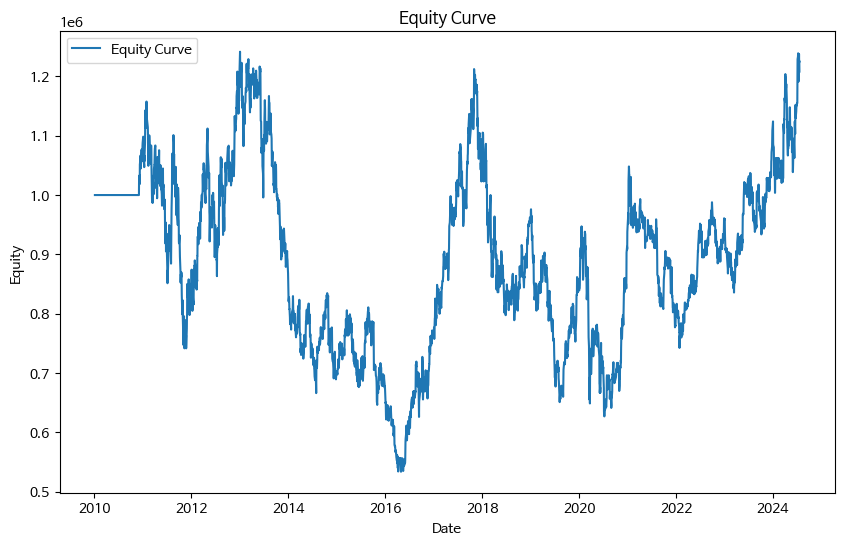

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(stats['_equity_curve'].index, stats['_equity_curve']['Equity'], label='Equity Curve')
plt.title('Equity Curve')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.legend()
#plt.plot()

### MA 투자전략 최적화

I() 함수에 Pandas에서 생성한 이동평균 지표를 사용해보자.

지표를 조합하여 어떤 성과를 산출하는지 분석하려면, 상당한 반복이 필요하다.
다행히도 최적화 함수가 제공되고 있다.

In [13]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import pandas_ta as ta
 
class SmaCross(Strategy):
    n1 = 30 #20
    n2 = 200 #50
    def init(self):
        # numpy.array 대신 pandas.Series를 반환하기 때문에 --> 오류
        #self.sma10 = self.I(ta.sma, self.data.Close, self.n1)
        #self.sma20 = self.I(ta.sma, self.data.Close, self.n2)
        # pandas_ta에서 계산한 이동평균을 numpy 배열로 변환 --> 오류
        #self.sma10 = self.I(lambda x: ta.sma(x, self.n1).to_numpy(), self.data.Close)
        #self.sma20 = self.I(lambda x: ta.sma(x, self.n2).to_numpy(), self.data.Close)
        # 이동 평균 계산을 직접 수행하여 numpy 배열로 변환
        self.sma10 = self.I(lambda x: pd.Series(x).rolling(self.n1).mean().to_numpy(), self.data.Close)
        self.sma20 = self.I(lambda x: pd.Series(x).rolling(self.n2).mean().to_numpy(), self.data.Close)

    def next(self):
        #if crossover(self.data.sma10, self.data.sma20):
        if crossover(self.sma10, self.sma20):
            self.buy()
        #elif crossover(self.data.sma20, self.data.sma10):
        elif crossover(self.sma20, self.sma10):
            self.sell()

#cash는 정수 소수 모두 가능하고 컴마없이 적는다. commission은 퍼센트를 적지 않는다. .015는 1.5% 
bt = Backtest(sse2010_2024df, SmaCross, cash=1000000, commission=.015, exclusive_orders=True)
 
#output = bt.run()
output = bt.optimize(n1=range(5,60,5),
                     n2=range(50,200,5),
                     maximize='Return [%]', 
                     #maximize='Equity Final [$]',
                     constraint=lambda param: param.n1 < param.n2)
print(output)
bt.plot(filename=f'scripts/tearsheet.html', plot_drawdown=True, open_browser=False)


C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 327 configurations.
  output = _optimize_grid()


  0%|          | 0/9 [00:00<?, ?it/s]

Start                     2010-01-04 00:00:00
End                       2024-07-19 00:00:00
Duration                   5310 days 00:00:00
Exposure Time [%]                   93.390965
Equity Final [$]                    1797728.3
Equity Peak [$]                     1843928.3
Return [%]                           79.77283
Buy & Hold Return [%]              421.631644
Return (Ann.) [%]                    4.207817
Volatility (Ann.) [%]               26.389063
Sharpe Ratio                         0.159453
Sortino Ratio                        0.241832
Calmar Ratio                          0.07055
Max. Drawdown [%]                  -59.643459
Avg. Drawdown [%]                   -6.719917
Max. Drawdown Duration     4017 days 00:00:00
Avg. Drawdown Duration      160 days 00:00:00
# Trades                                   22
Win Rate [%]                        45.454545
Best Trade [%]                      79.342953
Worst Trade [%]                    -25.704875
Avg. Trade [%]                    

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


Row(id='4661', ...)

In [14]:
print("최적화된 매개변수 조합:", output._strategy)

최적화된 매개변수 조합: SmaCross(n1=45,n2=185)


### RSI 투자전략

In [125]:
import datetime
import pandas_ta as ta
import pandas as pd

from backtesting import Backtest
from backtesting import Strategy
from backtesting.lib import crossover

class RsiOscillator(Strategy):

    upper_bound = 70 # 70이상이면 과매수
    lower_bound = 30 # 30이하이면 과매도
    rsi_window = 14 # 이전 14개 데이터항목을 기준으로 계산한다.

    def init(self):
        self.rsi = self.I(ta.rsi, pd.Series(self.data.Close), self.rsi_window)

    def next(self):
        if crossover(self.rsi, self.upper_bound):
            self.position.close() #self.close() -> Error
        elif crossover(self.lower_bound, self.rsi):
            self.buy()

bt = Backtest(sse2010_2024df, RsiOscillator, cash=1000000, commission=.002)
stats = bt.run()
statsOpt = bt.optimize(
        upper_bound = range(50,85,5),
        lower_bound = range(15,45,5),
        rsi_window = range(10,30,2),
        maximize='Equity Final [$]')
bt.plot()

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 420 configurations.
  output = _optimize_grid()


  0%|          | 0/9 [00:00<?, ?it/s]

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


Row(id='5948', ...)

대단한 성과를 보이고 있다. 수익률이 805%, 최종 9배 정도의 투자금이 되고 있다.

In [123]:
statsOpt

Start                     2010-01-04 00:00:00
End                       2024-07-19 00:00:00
Duration                   5310 days 00:00:00
Exposure Time [%]                   62.465142
Equity Final [$]                   9050086.96
Equity Peak [$]                   10062586.96
Return [%]                         805.008696
Buy & Hold Return [%]              421.631644
Return (Ann.) [%]                   16.742001
Volatility (Ann.) [%]               24.998031
Sharpe Ratio                         0.669733
Sortino Ratio                        1.206691
Calmar Ratio                         0.483062
Max. Drawdown [%]                  -34.658086
Avg. Drawdown [%]                   -4.494162
Max. Drawdown Duration     1164 days 00:00:00
Avg. Drawdown Duration       52 days 00:00:00
# Trades                                    5
Win Rate [%]                             80.0
Best Trade [%]                     111.708935
Worst Trade [%]                     -1.693212
Avg. Trade [%]                    

In [723]:
print("최적화된 매개변수 조합:", statsOpt._strategy)

최적화된 매개변수 조합: RsiOscillator(upper_bound=70,lower_bound=35,rsi_window=26)


- 코드 self.position.close(): 현재 포지션이 존재할 경우 해당 포지션을 직접 종료 (backtrader는 self.close() -> 주문생성 -> 주문체결 -> 포지션 종료). 현재의 포지션이 매수(Long) 상태라면, self.sell()과 같은 의미이다 (완전청산). 
    - self.sell(): 매도 주문이 실행되면 기존의 매수 포지션이 종료되지만, 새로운 매도 포지션이 생성된다는 차이가 있다.

### 복합조건: MA, RSI (일간, 주간), sl, tp

MA, RSI의 복수지표를 활용해서 투자전략을 설계해보자.

매수 조건:
- 포지션이 없고 (not self.position)
- 일간 RSI(self.daily_rsi), 주간 RSI(self.weekly_rsi)의 적정범위 비교
- 단기 이동평균선(ma10)이 장기 이동평균선(ma20, ma50, ma100)보다 큰지 비교

청산 조건:
- 손절매, 이익실현 기준이면 포지션을 청산 (self.position.close() -> position.size==0) (매수시 설정할 수 있다)

손절매하면 추세를 추적하지 않고 중단하는 것을 말한다 (Trailing Stop). 기준은 종가에서 얼마나 하락했는지 비율에 따라 설정하는데, 여기서는 8%로 설정한다. 가격 변동에 민감하게 반응하기 때문에 손절매가 잦아지고 수익이 제한될 수 있다.
- 100,000원에 매수하고 5%의 sl을 설정하면, 95,000원(100,000원의 95%) 이하로 떨어지면 자동으로 매도 주문이 실행된다.
- 주가가 110,000원으로 상승하면, 104,500원(110,000원의 95%)으로 조정된다.
- 계속 주가가 120,000원으로 상승할 경우, 114,000원으로 상향한다. 이 가격 이하로 떨어지면, 트레일링 스톱이 발동되어 자동으로 매도 주문이 실행되고 그 시점에 이익이 확정된다. 

sl, tp 로그를 출력하려면 notify_order()에서 추문을 추적해서 출력해야 한다.

resample_apply 함수가 시간 기반으로 리샘플링하려면 반드시 DatetimeIndex가 필요하니, 확인하자.

없으면 Date컬럼을 인덱스로 만들어주어야 한다.
```
sse2010_2024df['Date'] = pd.to_datetime(sse2010_2024df['Date'])
#sse2010_2024df.set_index('Date', inplace=True)
```

In [742]:
sse2010_2024df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2024-07-08', '2024-07-09', '2024-07-10', '2024-07-11',
               '2024-07-12', '2024-07-15', '2024-07-16', '2024-07-17',
               '2024-07-18', '2024-07-19'],
              dtype='datetime64[ns]', name='Date', length=3586, freq=None)

In [124]:
import pandas as pd
import pandas_ta as ta
from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply

def SMA(array, n):
    return pd.Series(array).rolling(n).mean()

class RsiSma(Strategy):
    d_rsi_win = 14  # 일간 RSI 윈도우
    w_rsi_win = 14  # 주간 RSI 윈도우
    rsi_high=70
    rsi_low=30
    #level = 70  # RSI 레벨
    sl = 0.8  # 손절매 비율
    tp = 1.5  # 이익실현 비율

    def init(self):
        self.ma10 = self.I(SMA, self.data.Close, 10)
        #self.ma20 = self.I(SMA, self.data.Close, 20)
        self.ma50 = self.I(SMA, self.data.Close, 50)
        self.ma100 = self.I(SMA, self.data.Close, 100)
        #self.daily_rsi = self.I(ta.rsi, self.data.Close, self.d_rsi_win) # ERROR
        self.daily_rsi = self.I(ta.rsi, pd.Series(self.data.Close), self.d_rsi_win)
        #self.weekly_rsi = resample_apply('W-FRI', self.daily_rsi, self.data.Close, self.w_rsi_win) # ERROR
        #self.weekly_rsi = resample_apply('W-FRI', ta.rsi, pd.Series(self.data.Close), self.w_rsi_win) # ERROR date 인식 못함
        self.weekly_rsi = resample_apply('W-FRI', ta.rsi, self.data.Close, self.w_rsi_win)

    def next(self):
        _close = self.data.Close[-1]
        #print(f"[{len(self.data)}] {self.data.df.index[-1]} RSId: {self.daily_rsi[-1]:.1f}"
        #      f" RSIw: {self.weekly_rsi[-1]:.1f} MA10: {self.ma10[-1]} MA50: {self.ma50[-1]}")
 
        if not self.position:
            if self.weekly_rsi > self.rsi_low and self.ma10[-1] > self.ma50[-1]:
                print(f"[+매수] 일자:{self.data.df.index[-1]} 직전보유: {self.position.size} 가격: {_close} 보유자금: {self.equity:.1f}")
                self.buy(sl=self.sl * _close, tp=self.tp * _close)
                #self.buy() #sl,tp 없이 매수
        else:
            if self.daily_rsi > self.rsi_high or self.ma10[-1] < self.ma50[-1]:
                print(f"[-청산] 일자:{self.data.df.index[-1]} 직전보유: {self.position.size} 가격: {_close} 보유자금: {self.equity:.1f}")
                self.position.close()

    def _next(self):
        _close = self.data.Close[-1]

        if (not self.position and
            self.daily_rsi[-1] > self.rsi_low and
            self.weekly_rsi[-1] > self.rsi_low and
            #self.weekly_rsi[-1] > self.daily_rsi[-1] and
            #self.ma10[-1] > self.ma20[-1] > self.ma50[-1] > self.ma100[-1] and
            self.ma10[-1] > self.ma50[-1] and
            _close > self.ma10[-1]):
            print(f"[+매수] 일자:{self.data.df.index[-1]} 직전보유: {self.position.size} 가격: {_close} 보유자금: {self.equity:.1f}")          
            self.buy() # sl,tp를 넣으면 elif의 청산조건과 중복될 수 있다.
        # 가격이 이동평균10 손절매 기준 미만이면 청산
        #elif _close < self.sl*self.ma50[-1]: # buy(청산)과 청산로직이 중복되면 주의
        elif self.position and _close < self.sl * self.ma50[-1]:
            print(f"[-청산] 일자:{self.data.df.index[-1]} 직전보유: {self.position.size} 가격: {_close} 보유자금: {self.equity:.1f}")
            self.position.close()

backtest = Backtest(sse2010_2024df, RsiSma, cash=1000000, commission=.002)
stats= backtest.run()
print(stats)

[+매수] 일자:2010-06-23 00:00:00 직전보유: 0 가격: 16100.0 보유자금: 1000000.0
[-청산] 일자:2010-07-02 00:00:00 직전보유: 61 가격: 15340.0 보유자금: 948008.5
[+매수] 일자:2010-07-16 00:00:00 직전보유: 0 가격: 16040.0 보유자금: 943128.5
[-청산] 일자:2010-08-12 00:00:00 직전보유: 59 가격: 15320.0 보유자금: 917673.5
[+매수] 일자:2010-11-12 00:00:00 직전보유: 0 가격: 15560.0 보유자금: 922393.5
[-청산] 일자:2010-12-03 00:00:00 직전보유: 58 가격: 17880.0 보유자금: 1045850.0
[+매수] 일자:2010-12-06 00:00:00 직전보유: 0 가격: 17800.0 보유자금: 1041210.0
[-청산] 일자:2010-12-07 00:00:00 직전보유: 58 가격: 18020.0 보유자금: 1055392.2
[+매수] 일자:2010-12-08 00:00:00 직전보유: 0 가격: 17760.0 보유자금: 1057712.2
[-청산] 일자:2010-12-09 00:00:00 직전보유: 59 가격: 18340.0 보유자금: 1093383.6
[+매수] 일자:2010-12-10 00:00:00 직전보유: 0 가격: 18380.0 보유자금: 1091023.6
[-청산] 일자:2010-12-13 00:00:00 직전보유: 59 가격: 18600.0 보유자금: 1101834.7
[+매수] 일자:2010-12-14 00:00:00 직전보유: 0 가격: 18580.0 보유자금: 1110094.7
[-청산] 일자:2010-12-21 00:00:00 직전보유: 59 가격: 18720.0 보유자금: 1120891.7
[+매수] 일자:2010-12-22 00:00:00 직전보유: 0 가격: 18780.0 보유자금: 1124431.7
[-청산] 일자:2011-01-03 00

rsi, sl, tp의 최적화를 해보자.

In [41]:
statsOpt = backtest.optimize(d_rsi_win=range(10, 35, 5),
                  w_rsi_win=range(10, 35, 5),
                  level=range(30, 80, 10),
                  sl=[0.85, 0.9, 0.95],  # 손절매 비율
                  tp=[1.1, 1.2, 1.25, 1.3])  # 이익실현 비율
#backtest.plot()

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 1500 configurations.
  output = _optimize_grid()


  0%|          | 0/9 [00:00<?, ?it/s]

최적화 조합을 확인해보자.

In [42]:
statsOpt._strategy

<Strategy RsiSma(d_rsi_win=30,w_rsi_win=20,level=30,sl=0.9,tp=1.1)>

- 코드 오류 self.daily_rsi = self.I(ta.rsi, self.data.Close, self.d_rsi_win): pandas_ta의 함수는 보통 pandas.Series 또는 pandas.DataFrame을 인자로 받기 때문에, 이 함수들을 self.I()와 함께 사용하려면 데이터를 numpy 배열로 변환하거나 함수 호출 방식을 수정해야 한다.

- 코드 resample_apply(): resample_apply는 pandas의 resample() 기능을 이용하여, 주어진 데이터를 특정 주기(예: 주간, 월간)로 리샘플링한 후, 이를 다시 함수(ta.rsi)에 적용하는 함수이다.
    - 일간을 주간으로: resample_apply('W-FRI', self.daily_rsi, self.data.Close, self.w_rsi_win)
    - 분간격을 시간격으로 resample_apply('1H', ta.rsi, self.data.Close, self.rsi_window)

- 주의: I() 함수에서는 pd.Series(self.data.Close) 시리즈를, 반면 여기서는 그냥 self.data.Close를 넘겨준다.
    - resample_apply는 pandas.Series나 pandas.DataFrame 같은 데이터 형식의 입력을 사용한다. self.data.Close가 pandas.Series 타입으로 전달되고, 리샘플링 후에도 pandas 형태로 유지되기 때문에 ta.rsi와 같은 pandas 기반 함수에 문제없이 적용될 수 있다.
    - 반면에, self.I()는 backtesting.py에서 성능 최적화를 위해 설계된 함수로, 주로 numpy 배열 형태의 데이터를 사용한다. 따라서 self.I()에서는 pandas_ta 같은 외부 라이브러리와의 직접적인 호환이 어렵고, 데이터 형식을 맞춰줘야 한다.
- 코드 next
    - 매회 출력을 보면, 101번째부터 한 줄씩 처리되고 있다. 주간 RSI 지표는 주일 동안 동일한 값이다.

    ```
    [101] 2010-05-28 00:00:00 RSId: 45.1 RSIw: 44.0 MA10: 15428.0 MA50: 16348.4
    [102] 2010-05-31 00:00:00 RSId: 44.6 RSIw: 44.0 MA10: 15360.0 MA50: 16340.0
    [103] 2010-06-01 00:00:00 RSId: 42.3 RSIw: 44.0 MA10: 15328.0 MA50: 16325.6
    ...생략...
    ```

- 코드 self.buy(sl=.92 * _close, tp=1.1 * _close)
    - tp는 Take Profit 이익실현, 목표 수익에 도달하면 자동으로 청산하여 수익을 확정한다. 현재 매수가 10% 상승하면 이익실현. 보통 보통 손절매 비율보다 크게 설정되며, 1:2 또는 1:3 이상의 손익비 (10% 손절매라면 2~30% 이익실현)
    - sl은 Stop Loss 손절매 가격, 현재 매수가의 8% 아래에서는 청산. 

- 코드 if self.position: 포지션은 자동으로 갱신되므로 이 코드는 반드시 필요하지 않지만, 보통 이렇게 작성한다.

(1) 포지션이 없는데 매수하거나 포지션이 있는데 매도하는 경우를 피하기 위해
(2) buy once, sell once 원칙을 지키기 위해서, 즉 포지션이 있는데 또 매수한다면 과매수, 포지션이 없는데 매도한다면 오류.

- 코드 self.position.close() 현재 열린 포지션을 명시적으로 청산. 사실 self.buy() 또는 self.sell() 후 주문이 전량 체결되면 해당 포지션이 자동으로 청산된다.
- 코드 optimize() 함수에는 rsi, sl, tp 모두 포함하고 있다.

# 7. 기계학습 백테스트

기계학습(Machine Learning)을 활용한 백테스팅은 모델이 데이터로부터 학습한 신호에 기반해 투자결정을 내리고 그 성과를 평가하는 작업이다. 기계학습모델이 투자전략을 대신하게 되고, 진행 절차는 백테스트하는 과정과 다를 바 없다.

이를 위해 필요한 데이터를 준비하고, 적절한 모델을 선택하여, 백테스트에 적용한다.

단계 1. 속성 및 레이블 준비

1. 속성 및 레이블 준비

우선 기계학습 모델을 훈련하기 위해서는 입력데이터(x)와 목표값(y)을 추출하거나 생성해야 한다.

목표값 (y): 기계학습 모델이 맞추어야 할 과녁 또는 학습하려는 목표를 말한다. 이중 또는 다중의 분류값을 가지면 레이블 또는 클래스라고 부른다. 또는 실제 주가를 학습할 수도 있다.

- 이진 분류(Binary classification): 상승(1) / 하락(0) 예측
- 다중 분류(Multi-class classification): 상승(1), 유지(0), 하락(-1)
- 실제 주가: 바로 다음 t+1을 예측하거나 더 긴 기간의 주가를 예측할 수 있다.

입력 속성 (x): 모델이 최적으로 학습하도록 다양한 속성(feature)을 조합한다. 속성 후보들을 보면:
- 기본 지표: PER, PBR, EPS 등 주가와 재무상태를 반영하는 지표
- 기술 지표: 이동평균(MA), 상대강도지수(RSI), MACD 등 주가 패턴, 거래량 비율, 변동성, 이전 수익률(예: t-1 수익률) 포함
- 시간 지표: 월별(1 ~ 12), 요일 (0:월 ~ 4:금 등 계절성과 주기 반영, 시계열 래그 (Close(t-1), Close(t-2)...)
- 경제 지표: 금리, 환율, 원유 등 거시경제지표 등 KOSPI, S&P500과 같은 시장지수
- 정서 지표: 뉴스나 SNS 토론방에서의 긍정, 부정 감성 분석 모델로 텍스트 데이터를 정량화
- 챠트 패턴: 캔들차트나 주가 패턴 이미지 분석 (딥러닝 활용)

단계 2. 모델 훈련

기계학습모델이 언제 매수, 매도할지 결정할 수 있도록 훈련한다. 모델은 데이터의 특성과 문제 유형에 따라 다르게 선택할 수 있다.
몇 가지 예를 들면:
- 랜덤 포레스트(Random Forest): 다수의 결정 트리들을 학습하는 앙상블 방법
- XGBoost (eXtreme Gradient Boosting): 경사 하강법(gradient descent)을 활용한 앙상블 방법
- SVM (Support Vector Machine): 서로 다른 분류가 되는 경계선의 폭이 최대가 되도록 하는 방법
- 인공 신경망(ANN): 인간의 신경 회로를 모방하여, 입력데이터와 출력값의 관계를 학습하는 방법

데이터는 훈련(Train)과 검증(Test) 세트로 나누어 교차검증(Cross-Validation) 기법을 활용해 성능을 평가한다.

단계 3. 백테스트

훈련된 기계학습 모델을 통해 나온 신호에 따라 매수/매도 전략을 수행한다. 일반적인 백테스팅 과정과 유사하지만, 모델이 매매 신호를 자동으로 생성한다.
수익률, 샤프 비율 등의 성과지표를 통해 모델의 성능을 평가한다.

## 7.1 기계학습 RandomForest

RandomForestClassifier는 여러 의사트리모델을 합성한다는 의미에서 숲이라고 명명했고, 모델입력변수를 무작위로 선별하고 이를 기반으로 각 각의 트리모델을 생성하고 합성하여 이진 또는 다중의 분류를 한다. 단일 모델만을 사용하지 않고, 정확성을 높이기 위해 여러 모델을 합쳐서 Ensemble 방법이다.

우선 라이브러리를 설치해야겠다. scikit-learn는 완전한 명칭을 말하고, sklearn는 import하는 명칭일뿐 모두 같은 라이브러리이고 차이가 없다.

In [ ]:
!pip install scikit-learn

### 학습

- 속성: 이동평균 지표 2개를 속성으로 추출
- 레이블: 상승여부 2진 분류
- 훈련 및 테스트 데이터 분할 7:3
- 기계학습모델: RandomForest

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example DataFrame with features (like moving averages) and target (up/down)
_myDf = pd.DataFrame({
        'Open': [100, 101, 102, 103, 104, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 97, 98],
    'High': [101, 102, 103, 104, 105, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 98, 99],
    'Low': [99, 100, 101, 102, 103, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 96, 97],
    'Close': [100, 101, 102, 103, 104, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 97, 98],
    'Volume': [1000, 1200, 1300, 1100, 1400, 1500, 1200, 1300, 1400, 1100, 1200, 1300, 1400, 1500, 1200, 1300, 1400],
    'SMA_10': [99, 99.5, 100, 100.5, 101, 101.5, 101.2, 100.9, 100.6, 100.3, 100, 99.7, 99.4, 99.1, 98.8, 98.9, 99],
    'SMA_20': [98, 98.5, 99, 99.5, 100, 100.5, 100.3, 100.1, 99.9, 99.7, 99.5, 99.3, 99.1, 98.9, 98.7, 98.8, 98.9],
})

_myDf['Target'] = (_myDf['Close'].shift(-1) > _myDf['Close']).astype(int) # 상승 1, 아니면 0으로 이분화

# Define features and target
features = ['SMA_10', 'SMA_20']
X = _myDf[features].iloc[:-1]  # [:-1] --> 마지막 줄 제외, features만 선별 (Close 제외)
y = _myDf['Target'].iloc[:-1]  # [:-1] --> 마지막 줄 제외

# 훈련과 테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 포함할 트리의 갯수=100, 무작위 seed=42 (seed 고정해서 무작위라도 재현성 보장)
model = RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # 테스트데이터에 모델 적용

X_test['Prediction'] = y_pred # X_test에 예측 컬럼을 추가
print(f"테스트본: {X_test}")

print(f"원본: {_myDf}")

테스트본:     SMA_10  SMA_20  Prediction
0     99.0    98.0           1
1     99.5    98.5           1
5    101.5   100.5           0
14    98.8    98.7           1
13    99.1    98.9           1
원본:     Open  High  Low  Close  Volume  SMA_10  SMA_20  Target
0    100   101   99    100    1000    99.0    98.0       1
1    101   102  100    101    1200    99.5    98.5       1
2    102   103  101    102    1300   100.0    99.0       1
3    103   104  102    103    1100   100.5    99.5       1
4    104   105  103    104    1400   101.0   100.0       1
5    105   106  104    105    1500   101.5   100.5       0
6    104   105  103    104    1200   101.2   100.3       0
7    103   104  102    103    1300   100.9   100.1       0
8    102   103  101    102    1400   100.6    99.9       0
9    101   102  100    101    1100   100.3    99.7       0
10   100   101   99    100    1200   100.0    99.5       0
11    99   100   98     99    1300    99.7    99.3       0
12    98    99   97     98    1400   

In [128]:
print(f"y_predAll: {y_predAll.shape} _myDf: {_myDf.shape}")

y_predAll: (17,) _myDf: (17, 8)


- fit() 함수

    model.fit(X_train, y_train)
    
    데이터를 넘겨받아 훈련하여 모델을 만든다. 모델의 훈련이 목적이라서 반환은 없다.
    - X_train: 2D 배열 (n_samples, n_features)로 구성한다.  numpy 배열, pandas 데이터프레임, 또는 list이다. n_features는 y축의 컬럼들, n_samples는 x축의 행 (레코드 또는 샘플)에 해당한다.
    - y_train: 목표 값 (즉 예측)이다. 복수의 값이므로 numpy 배열, pandas Series, 또는 list이다.

- predict() 함수

    y_pred = model.predict(X_test)
    
    테스트 데이터를 넘겨받아 훈련모델을 적용하여 예측 값을 생성한다.
    
    - X_test: X_train과 같은 형식
    - y_pred: y_train과 같은 형식
- 출력:
   - 테스트본의 인덱스 번호가 무작위로 선정되고 있다.
   - 테스트본의 Prediction과 원본의 Target을 비교하여 서로 일치하는지 확인해보자.


In [129]:
model.predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [130]:
model.predict(_myDf[features])

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [36]:
y_predAll = model.predict(_myDf[features]) #y_predAll = model.predict(X)

# 원본에 추가할 수도 있다. 나중에 백테스트데이터로 쓰기 위해 복사본을 만들자.
_myDfCopy = _myDf.copy()
_myDfCopy.loc[_myDfCopy.index, 'Prediction'] = y_predAll # 원본하고 합침

print(f"합본: {_myDfCopy}")

# 정확성 = 맞은 갯수/전체
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")


합본:     Open  High  Low  Close  Volume  SMA_10  SMA_20  Target  Prediction
0    100   101   99    100    1000    99.0    98.0       1         1.0
1    101   102  100    101    1200    99.5    98.5       1         1.0
2    102   103  101    102    1300   100.0    99.0       1         1.0
3    103   104  102    103    1100   100.5    99.5       1         1.0
4    104   105  103    104    1400   101.0   100.0       1         1.0
5    105   106  104    105    1500   101.5   100.5       0         0.0
6    104   105  103    104    1200   101.2   100.3       0         0.0
7    103   104  102    103    1300   100.9   100.1       0         0.0
8    102   103  101    102    1400   100.6    99.9       0         0.0
9    101   102  100    101    1100   100.3    99.7       0         0.0
10   100   101   99    100    1200   100.0    99.5       0         0.0
11    99   100   98     99    1300    99.7    99.3       0         0.0
12    98    99   97     98    1400    99.4    99.1       0         0.0
13

### 모델 저장

모델은 메모리에 있고, 나중에 불러 쓰려면 저장장치에 저장하야겠다. 이 때를 joblib과 pickle 등 Python의 직렬화 라이브러리를 사용하면 편리하다.

joblib을 사용해서 모델을 직렬화(Serialization) 및 역직렬화(Deserialization)해보자. Google Drive 등의 클라우드에 저장하면 Google Colab에서의 작업도 가능하다.

from google.colab import drive
drive.mount('/content/drive')

joblib.dump(clf, '/content/drive/My Drive/knn_model.pkl') # 경로 설정 후 저장

In [145]:
import joblib
joblib.dump(model, 'knn_model.pkl')

['knn_model.pkl']

## 7.2 기계학습 백테스트

기계학습한 후, 그 결과에 따라 주가가 상승(1), 횡보(0), 하락할지(-1) 일종의 신호로 구분하여 매매를 하게 된다.

기계학습한 모델을 실행하는 시점에 따라 (1) 과거데이터에 대해 일시에 하거나 (데이터프레임에 바로 적용하고 컬럼으로 저장), (2) 투자전략 코드에서 나중에 할 수 있다. 이를 구분해서 전략 코드를 작성해보자.

### 데이터프레임에 저장된 예측

앞서 기계학습을 실행하여 신호를 생성, 저장해 놓았고 이를 읽는 전략 코드를 작성한다.


In [143]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import pandas as pd

class MLStrategy(Strategy):
    def init(self):
        self.pred = self.data.Prediction
    
    def next(self):
        # Buy if model predicts price will go up
        print(f"[NEXT] {self.data.index[-1]} Close-1: {self.data.Close[-1]} Close0: {self.data.Close[0]} Volume: {self.data.Volume[-1]}")
        if self.pred[-1] == 1:
            if not self.position:
                self.buy()
        elif self.pred[-1] == 0:
            if self.position:
                self.sell()

_myDfBacktest = _myDfCopy
bt = Backtest(_myDfBacktest, MLStrategy, cash=10000, commission=.002) # increase cash
stats = bt.run()
print(stats)
bt.plot()

C:\Users\admin\AppData\Local\Temp\ipykernel_23096\4088760511.py:20: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(_myDfBacktest, MLStrategy, cash=10000, commission=.002)


[NEXT] 1 Close-1: 101 Close0: 100 Volume: 1200
[NEXT] 2 Close-1: 102 Close0: 100 Volume: 1300
[NEXT] 3 Close-1: 103 Close0: 100 Volume: 1100
[NEXT] 4 Close-1: 104 Close0: 100 Volume: 1400
[NEXT] 5 Close-1: 105 Close0: 100 Volume: 1500
[NEXT] 6 Close-1: 104 Close0: 100 Volume: 1200
[NEXT] 7 Close-1: 103 Close0: 100 Volume: 1300
[NEXT] 8 Close-1: 102 Close0: 100 Volume: 1400
[NEXT] 9 Close-1: 101 Close0: 100 Volume: 1100
[NEXT] 10 Close-1: 100 Close0: 100 Volume: 1200
[NEXT] 11 Close-1: 99 Close0: 100 Volume: 1300
[NEXT] 12 Close-1: 98 Close0: 100 Volume: 1400
[NEXT] 13 Close-1: 97 Close0: 100 Volume: 1500
[NEXT] 14 Close-1: 96 Close0: 100 Volume: 1200
[NEXT] 15 Close-1: 97 Close0: 100 Volume: 1300
[NEXT] 16 Close-1: 98 Close0: 100 Volume: 1400
Start                                     0.0
End                                      16.0
Duration                                 16.0
Exposure Time [%]                   88.235294
Equity Final [$]                     9592.212
Equity Peak [$]  

Row(id='20788', ...)

### 전략코드 내의 예측

signal 역할을 하는 forecast를 어느 함수 init, next에서 채워야 하는지 생각해보자.

- 일시에 예측을 하고 (다시 예측하지 않는한 고정되게 된다), 한 번에 채우려면 init에서 한다.

    ```
    def init(self):
        self.clf = joblib.load('knn_model.pkl')
        X = self.data.df[['X_SMA10', 'X_SMA20', 'X_BB_upper', 'X_BB_lower']]
        self.forecasts = pd.Series(self.clf.predict(X), index=self.data.df.index) # 일괄예측
    
    def next(self):
        forecast = self.forecasts[self.data.index[-1]]
        if forecast == 1 and not self.position.is_long:
            self.buy()
        elif forecast == -1 and not self.position.is_short:
            self.sell()
    ```

- 실시간 예측이므로 매번 채우려면 당연히 next에서 하는 편이 좋다.

    ```
    def init(self):
        self.clf = joblib.load('knn_model.pkl')
        self.forecasts = pd.Series(index=self.data.df.index, data=np.nan) # 인덱스 개수만큼의 빈 시리즈를 생성
    
    def next(self):
        X = self.data.df[['X_SMA10', 'X_SMA20', 'X_BB_upper', 'X_BB_lower']].iloc[-1:]
        forecast = self.clf.predict(X)[0] # 실시간 예측
        self.forecasts[self.data.index[-1]] = forecast
        if forecast == 1 and not self.position:
            self.buy()
        elif forecast == -1 and self.position:
            self.sell()
    ```


In [148]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import pandas as pd
import joblib

class MLStrategy(Strategy):
    def init(self):
        self.clf = joblib.load('knn_model.pkl') # 저장한 모델 joblib.dump(clf, 'knn_model.pkl') 불러기기
        X = self.data.df[['SMA_10', 'SMA_20']] # .df[[컬럼명]]으로 모델에 포함할 속성들 구성
        self.pred = pd.Series(self.clf.predict(X), index=self.data.df.index) # 일괄예측
    
    def next(self):
        # Buy if model predicts price will go up
        print(f"[NEXT] {self.data.index[-1]} Close-1: {self.data.Close[-1]} Close0: {self.data.Close[0]} Volume: {self.data.Volume[-1]}")
        if self.pred.loc[self.data.index[-1]] == 1:
            if not self.position:
                self.buy()
        # Sell if model predicts price will go down
        elif self.pred.loc[self.data.index[-1]] == 0:
            if self.position:
                self.sell()

# Prepare data for backtesting (we'll use the same DataFrame)
_myDfBacktest = _myDf.iloc[:-1].copy()  # Remove last row (no Target)
_myDfBacktest = _myDfCopy

# Run backtest
bt = Backtest(_myDfBacktest, MLStrategy, cash=10000, commission=.002)
stats = bt.run()
print(stats)
bt.plot()

C:\Users\admin\AppData\Local\Temp\ipykernel_23096\2491183094.py:34: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(_myDfBacktest, MLStrategy, cash=10000, commission=.002)


[N999XT] 1 Close-1: 101 Close0: 100 Volume: 1200
[N999XT] 2 Close-1: 102 Close0: 100 Volume: 1300
[N999XT] 3 Close-1: 103 Close0: 100 Volume: 1100
[N999XT] 4 Close-1: 104 Close0: 100 Volume: 1400
[N999XT] 5 Close-1: 105 Close0: 100 Volume: 1500
[N999XT] 6 Close-1: 104 Close0: 100 Volume: 1200
[N999XT] 7 Close-1: 103 Close0: 100 Volume: 1300
[N999XT] 8 Close-1: 102 Close0: 100 Volume: 1400
[N999XT] 9 Close-1: 101 Close0: 100 Volume: 1100
[N999XT] 10 Close-1: 100 Close0: 100 Volume: 1200
[N999XT] 11 Close-1: 99 Close0: 100 Volume: 1300
[N999XT] 12 Close-1: 98 Close0: 100 Volume: 1400
[N999XT] 13 Close-1: 97 Close0: 100 Volume: 1500
[N999XT] 14 Close-1: 96 Close0: 100 Volume: 1200
[N999XT] 15 Close-1: 97 Close0: 100 Volume: 1300
[N999XT] 16 Close-1: 98 Close0: 100 Volume: 1400
Start                                     0.0
End                                      16.0
Duration                                 16.0
Exposure Time [%]                   88.235294
Equity Final [$]               

Row(id='22116', ...)


- 코드 pd.Series(index=self.data.df.index, data=np.nan): self.data.df.index 인덱스 개수만큼의 빈 시리즈를 생성한다. 시리즈의 각 항목은 NaN으로 채워진다.
self.data을 데이터프레임으로 보고, 컬럼을 읽는 경우 self.data.df로 적는다.
- next함수의 [-1]: [-1]을 사용하면 에서 데이터를 앞부터 하나씩 가져온다. [0]은 첫째를 매번 가져온다. self.data.df.iloc[-1]은 처리되는 현행 데이터이며, 호출이 반복됨에 따라 차례로 처리된다.

## 7.3 기계학습: MACD, RandomForest

MACD와 시그널 라인을 이용해 단순한 모델을 학습시켜 트레이딩 전략을 구현해보자.

- 속성: MACD 지표 2개를 속성으로 추출
- 레이블: 상승여부 2진 분류
- 훈련 및 테스트 데이터 분할하지 않는다
- 기계학습모델: RandomForest

In [322]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from backtesting import Backtest, Strategy
#from backtesting.test import EURUSD

data = sse2010_2024df.copy()

# MACD 지표 생성
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# 기계학습을 위한 입력 데이터(X)와 타겟(y) 정의
data['X_MACD'] = data['MACD'] / data['Close']
data['X_Signal'] = data['Signal'] / data['Close']
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)

data.dropna(inplace=True) # NaN 제거

# 학습 데이터 준비
X = data[['X_MACD', 'X_Signal']]
y = data['Target']

# 기계 학습 모델 학습
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X, y)

class MACDMLStrategy(Strategy):
    def init(self):
        self.pred = pd.Series(model.predict(X), index=X.index) # 모델 바로 사용 (저장하지 않았다)
    
    def next(self):
        
        forecast = self.pred.loc[self.data.index[-1]] # 현재 위치 인덱스에 맞는 예측 값 가져오기

        if forecast == 1 and not self.position.is_long:
            self.buy()
        elif forecast == 0 and self.position.is_long:
            self.sell()

bt = Backtest(data, MACDMLStrategy, cash=10000, commission=.002)
stats = bt.run()
print(stats)
bt.plot()

C:\Users\admin\AppData\Local\Temp\ipykernel_6284\1136231659.py:48: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(data, MACDMLStrategy, cash=10000, commission=.002)


Start                     2010-01-04 00:00:00
End                       2024-07-19 00:00:00
Duration                   5310 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                     10,000.0
Equity Peak [$]                      10,000.0
Return [%]                                0.0
Buy & Hold Return [%]       421.6316440049444
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


Row(id='4911', ...)

- 코드 self.pred = pd.Series(model.predict(X), index=X.index): init() 함수의 초기화 시점에서 예측을 일시에 생성한다.
- 코드 not self.position.is_long: 롱 포지션에 대한 상태만 확인하려는 경우에는 self.position.is_long을 사용한다. 단순히 포지션이 있는지 없는지를 확인하려는 경우에는 self.position을 사용해도 된다.

## 7.4 기계학습: 볼린저, KNN

KNeighborsClassifier는 Scikit-learn 라이브러리에서 제공하는 KNN 분류 알고리즘의 구현 클래스이다.

학습 데이터가 이미 주어졌을 때, 새로운 데이터 포인트의 K개의 가장 가까운 이웃을 찾아 다수결 또는 평균으로 해당 데이터의 클래스를 예측하는 기법이다.

- 속성: 볼린저 지표 4개를 속성으로 추출
- 레이블: 상승, 중간, 하락 3진 분류
- 훈련 및 테스트 데이터 분할 7:3
- 기계학습모델: KNeighbors

### 기계학습을 위한 함수

- calculate_features_and_target: 입력변수들과 목표 값을 설정한다.
- train_and_save_knn_model: 훈련하여 모델을 생성하고 예측, 정확성을 계산한다.

In [323]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import joblib

def calculate_features_and_target(data):
    """Calculate features and target."""
    window = 20
    std_dev = 2
    hlc3 = (data.High + data.Low + data.Close) / 3
    mean = hlc3.rolling(window).mean()
    std = hlc3.rolling(window).std()
    upper = mean + std_dev * std
    lower = mean - std_dev * std

    # Features
    data['X_SMA10'] = (data.Close - data.Close.rolling(10).mean()) / data.Close
    data['X_SMA20'] = (data.Close - data.Close.rolling(20).mean()) / data.Close
    data['X_BB_upper'] = (upper - data.Close) / data.Close
    data['X_BB_lower'] = (lower - data.Close) / data.Close
    
    # Target
    data['Target'] = data.Close.pct_change(5).shift(-5)
    data['Target'] = np.where(data['Target'] > 0, 1, -1)
    
    data.dropna(inplace=True)
    return data

def train_and_save_knn_model(data):
    """Train KNN model and save it to a file."""
    data = calculate_features_and_target(data)
    X = data[['X_SMA10', 'X_SMA20', 'X_BB_upper', 'X_BB_lower']]
    y = data['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
    
    joblib.dump(clf, 'knn_model.pkl')
    
    # Optionally, print accuracy on test set
    from sklearn.metrics import accuracy_score
    y_pred = clf.predict(X_test)
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

# Load your data
#data = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)
dfBacktest = calculate_features_and_target(sse2010_2024df)

# Train and save the model
train_and_save_knn_model(dfBacktest)

Test Accuracy: 0.5464788732394367


### 기계학습 백테스트 실행

In [324]:
class BollingerKNNStrategy(Strategy):
    stop_loss_percent = 0.02  # 2%
    window=20
    
    def init(self):
        self.clf = joblib.load('knn_model.pkl')
        self.forecasts = pd.Series(index=self.data.df.index, data=np.nan) # 인덱스 개수만큼의 빈 시리즈를 생성
    
    def next(self):
        if len(self.data) < self.window:
            return

        # Use the pre-calculated features from the dataframe
        X = self.data.df[['X_SMA10', 'X_SMA20', 'X_BB_upper', 'X_BB_lower']].iloc[-1:]
        forecast = self.clf.predict(X)[0]
        self.forecasts[self.data.index[-1]] = forecast
        
        # Buy if forecast is 1 (price up) and not holding a position
        if forecast == 1 and not self.position:
            self.buy(size=0.2, tp=self.data.Close[-1] * (1 + self.stop_loss_percent), sl=self.data.Close[-1] * (1 - self.stop_loss_percent))
        # Sell if forecast is -1 (price down) and holding a position
        elif forecast == -1 and self.position:
            self.sell(size=0.2, tp=self.data.Close[-1] * (1 - self.stop_loss_percent), sl=self.data.Close[-1] * (1 + self.stop_loss_percent))

# Load your data
#data = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

# Initialize and run backtest
bt = Backtest(dfBacktest, BollingerKNNStrategy, cash=10000000, commission=0.001)
stats = bt.run()
print(stats)
bt.plot()

Start                     2010-02-26 00:00:00
End                       2024-07-19 00:00:00
Duration                   5257 days 00:00:00
Exposure Time [%]           73.50620067643743
Equity Final [$]         13,381,164.470000194
Equity Peak [$]           14,459,891.87000018
Return [%]                  33.81164470000194
Buy & Hold Return [%]       467.2043010752688
Return (Ann.) [%]          2.0902688517059786
Volatility (Ann.) [%]       4.083258828945379
Sharpe Ratio               0.5119119162587721
Sortino Ratio              0.7756182328331067
Calmar Ratio              0.21668940554023747
Max. Drawdown [%]          -9.646382325405533
Avg. Drawdown [%]         -0.8523194855920864
Max. Drawdown Duration     1526 days 00:00:00
Avg. Drawdown Duration       57 days 00:00:00
# Trades                                 1655
Win Rate [%]               51.963746223564954
Best Trade [%]              6.867921993972437
Worst Trade [%]            -9.016127826108622
Avg. Trade [%]            0.095232

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


Row(id='5445', ...)

## 7.5 기계학습에 트렌드 필터의 추가

트렌드 필터는 시장이 상승(Uptrend) 또는 하락(Downtrend) 중인지 판단하여 매매 신호를 필터링하고, 추세가 맞는 경우에만 거래를 하게 만든다.

기계학습전략에 트렌드 필터를 추가해보자. 이렇게 하면 불필요한 거래를 줄이고 더 나은 성과를 거둘 수 있겠다.

- 장기 이동 평균(SMA 50)을 기반으로 상승추세에서는 매수 신호만, 하락 추세에서는 매도 신호만을 따르도록 하자. 

- 손익비 설정: 손절매와 목표가격 설정에서 손익비를 더 크게 설정하여 거래 성과를 개선할 수 있다. 기본 설정은 2:1의 손익비이다.

- Margin: 백테스트에서 마진을 설정하면, 주어진 현금 자산으로 얼마나 더 큰 포지션을 취할 수 있는지를 결정한다. 예를 들어, margin=0.1로 설정하면, 10%의 자본만으로 전체 포지션을 취할 수 있으며, 이는 10배 레버리지를 사용하는 것과 같다. margin을 설정하지 않으면 백테스트는 레버리지 없이(1배 레버리지) 진행된다.

In [156]:
import numpy as np
import pandas as pd
import joblib
from backtesting import Backtest, Strategy
from backtesting.test import EURUSD

class BollingerKNNStrategy(Strategy):
    stop_loss_percent = 0.02  # 2%
    take_profit_percent = 0.04  # 4%
    window = 20

    def init(self):
        self.clf = joblib.load('knn_model.pkl')
        self.forecasts = pd.Series(index=self.data.df.index, data=np.nan)
        self.sma50 = self.I(SMA, self.data.Close, 50)

    def next(self):
        if len(self.data) < self.window:
            return

        X = self.data.df[['X_SMA10', 'X_SMA20', 'X_BB_upper', 'X_BB_lower']].iloc[-1:]
        forecast = self.clf.predict(X)[0]
        self.forecasts[self.data.index[-1]] = forecast
        is_uptrend = self.data.Close[-1] > self.sma50[-1] # 장기추세보다 큰 경우만 선별하기 해해

        if forecast == 1 and is_uptrend and not self.position:
            self.buy(
                size=0.2, 
                tp=self.data.Close[-1] * (1 + self.take_profit_percent), 
                sl=self.data.Close[-1] * (1 - self.stop_loss_percent)
            )
        elif forecast == -1 and not is_uptrend and self.position:
            self.sell(
                size=0.2, 
                tp=self.data.Close[-1] * (1 - self.take_profit_percent), 
                sl=self.data.Close[-1] * (1 + self.stop_loss_percent)
            )


# Run backtest
bt = Backtest(sse2010_2024df, BollingerKNNStrategy, cash=10000000, commission=0.001, margin=0.05)
# bt = Backtest(sse2010_2024df, BollingerKNNStrategy, commission=0.0002, margin=0.05)
stats = bt.run()
print(stats)
bt.plot()

Start                     2010-02-26 00:00:00
End                       2024-07-19 00:00:00
Duration                   5257 days 00:00:00
Exposure Time [%]                   46.561443
Equity Final [$]              21002318.060003
Equity Peak [$]              107063138.060002
Return [%]                         110.023181
Buy & Hold Return [%]              467.204301
Return (Ann.) [%]                    5.411824
Volatility (Ann.) [%]                 78.4594
Sharpe Ratio                         0.068976
Sortino Ratio                        0.121732
Calmar Ratio                         0.059975
Max. Drawdown [%]                  -90.233989
Avg. Drawdown [%]                  -16.523521
Max. Drawdown Duration     2929 days 00:00:00
Avg. Drawdown Duration      149 days 00:00:00
# Trades                                  432
Win Rate [%]                        39.351852
Best Trade [%]                       7.739749
Worst Trade [%]                     -6.471481
Avg. Trade [%]                    

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


Row(id='24820', ...)

- 코드 self.clf.predict(X)[0] 왜 -1이 아니라 0일까?: -1은 배열에서 마지막 요소를 가져올 때 사용하는 인덱스이고, 이 경우 predict(X)는 한 개의 값만 반환하는 배열이기 때문에, 그 값을 가져오기 위해 첫 번째 요소 [0]을 사용한다.
- 다른 코드에서 -1을 사용하면, 가장 최신 데이터를 의미하고 백테스팅이나 트레이딩 로직에서 자주 이렇게 사용된다.

## 7.6 기계학습에 스톱로스 추가

스톱로스 (Stop Loss)는 특정 가격에 도달하면 자동으로 청산하는 손절매 기준이다.

트렌드 필터는 구간범위를 설정하여 매매하려는 규칙을 따르고 있는 반면, 스톱로스 전략은 매수한 후 제한폭까지 하락하면 자동으로 매도하여 손실을 제한하는 방식이다.

기계학습은 다음과 같이 적용한다.
- 속성: 이동평균, MOM, 볼린저, 일시 지표 12개를 속성으로 추출. 감성지표는 일반적으로 텍스트 데이터(예: 뉴스, 소셜 미디어, 보고서 등)를 분석하여 긍정, 부정으로 분류한 값이다. 이와는 달리, 여기서는 특정 기간을 기준으로 그 안은 긍정, 외는 부정으로 간주하고 있다.
- 레이블: 상승, 중간, 하락 3진 분류
- 훈련 및 테스트 데이터 분할 7:3
- 기계학습모델: KNeighbors

In [547]:
import pandas as pd
import numpy as np
from backtesting.test import SMA

def calculate_features_and_target(data):
    # BBANDS 계산
    window = 20
    std_dev = 2
    hlc3 = (data.High + data.Low + data.Close) / 3
    mean = hlc3.rolling(window).mean()
    std = hlc3.rolling(window).std()
    upper = mean + std_dev * std
    lower = mean - std_dev * std

    # SMA 계산
    sma10 = SMA(data.Close, 10)
    sma20 = SMA(data.Close, 20)
    sma50 = SMA(data.Close, 50)
    sma100 = SMA(data.Close, 100)

    # Add features to the DataFrame
    close = data.Close.values
    data['X_SMA10'] = (close - sma10) / close
    data['X_SMA20'] = (close - sma20) / close
    data['X_SMA50'] = (close - sma50) / close
    data['X_SMA100'] = (close - sma100) / close
    data['X_DELTA_SMA10'] = (sma10 - sma20) / close
    data['X_DELTA_SMA20'] = (sma20 - sma50) / close
    data['X_DELTA_SMA50'] = (sma50 - sma100) / close
    data['X_MOM'] = data.Close.pct_change(periods=2)
    data['X_BB_upper'] = (upper - close) / close
    data['X_BB_lower'] = (lower - close) / close
    data['X_BB_width'] = (upper - lower) / close
    #data['X_Sentiment'] = ~data.index.to_series().between('2017-09-27', '2017-12-14')
    data['X_day'] = data.index.dayofweek
    #data['X_hour'] = data.index.hour

    # Target: Price change over the next 48 periods
    y = data.Close.pct_change(48).shift(-48)
    y[y.between(-.004, .004)] = 0
    y[y > 0] = 1
    y[y < 0] = -1
    data['Target'] = y

    # Drop any NaN values
    data.dropna(inplace=True)

    return data

from sklearn.neighbors import KNeighborsClassifier
import joblib

def train_and_save_knn_model(data, n_neighbors=7, model_path='knn_model.pkl'):
    X = data.filter(like='X')
    y = data['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # Save the trained model to a file
    joblib.dump(clf, model_path)

    # Optionally, print accuracy on test set
    from sklearn.metrics import accuracy_score
    y_pred = clf.predict(X_test)
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

dfBacktest2 = calculate_features_and_target(sse2010_2024df)

# Train and save the model
train_and_save_knn_model(dfBacktest2)

Test Accuracy: 0.563971340839304


- 코드 data['X_Sentiment'] = ~data.index.to_series().between('2017-09-27', '2017-12-14') 데이터프레임의 인덱스를 시리즈로 변환해서 얻은 일자가 .between('2017-09-27', '2017-12-14') 해당 날짜 범위 내에 속하는지 여부 True 또는 False. 앞에 부정이 붙었으므로 반전하여 결과적으로 **X_Sentiment**는 해당 기간에 속하지 않는 날짜가 True, 속하는 날짜는 False로 나타난다.
- data['X_day']= data.index.dayofweek, 인덱스(날짜)에서 요일 번호를 의미한다.
- data['X_hour'] data.index.hour, 인덱스의 시간(시) 부분을 나타낸다.

In [548]:
from backtesting import Strategy
import joblib
import numpy as np
import pandas as pd

class MLStrategy(Strategy):
    price_delta = .004  # 0.4%
    window = 20
    def init(self):
        self.model = joblib.load('knn_model.pkl')
        self.forecasts = self.I(lambda: np.repeat(np.nan, len(self.data)), name='forecast')

    def next(self):
        if len(self.data) < self.window:
            return

        high, low, close = self.data.High, self.data.Low, self.data.Close
        current_time = self.data.index[-1]

        X = self.data.df.filter(like='X').iloc[-1:]  # 최근 데이터의 속성만 가져옴
        forecast = self.model.predict(X)[0]

        self.forecasts[-1] = forecast

        upper, lower = close[-1] * (1 + np.r_[1, -1] * self.price_delta) # 목표 구간

        if forecast == 1 and not self.position.is_long:
            self.buy(size=.2, tp=upper, sl=lower)
        elif forecast == -1 and not self.position.is_short:
            self.sell(size=.2, tp=lower, sl=upper)

        # stop-loss for trades open > 2 days
        for trade in self.trades:
            if current_time - trade.entry_time > pd.Timedelta('2 days'):
                if trade.is_long:
                    trade.sl = max(trade.sl, low)
                else:
                    trade.sl = min(trade.sl, high)

bt = Backtest(dfBacktest2, MLStrategy, cash=1000000, commission=.0002, margin=.05)
stats = bt.run()
print(stats)
#bt.plot()

Start                     2010-12-10 00:00:00
End                       2024-02-28 00:00:00
Duration                   4828 days 00:00:00
Exposure Time [%]           18.43884449907806
Equity Final [$]           5,414.428000006421
Equity Peak [$]                   1,000,000.0
Return [%]                 -99.45855719999935
Buy & Hold Return [%]      298.25897714907506
Return (Ann.) [%]         -33.245710207888294
Volatility (Ann.) [%]       9.314414133845597
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]          -99.45855719999935
Avg. Drawdown [%]          -99.45855719999935
Max. Drawdown Duration     4800 days 00:00:00
Avg. Drawdown Duration     4800 days 00:00:00
# Trades                                  600
Win Rate [%]                              8.5
Best Trade [%]             0.6568341504112896
Worst Trade [%]            -5.136867363369424
Avg. Trade [%]           -0.233168

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:455: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Row(id='7824', ...)

- 코드 buy(size=0.2, tp=upper, sl=lower): 리스크 관리를 위해 tp, sl을 설정하면서 매수
    - size=0.2: 매수할 자산의 양, 여기서 0.2는 현재 자산의 20%를 매수하겠다는 의미이다.
    - tp=upper: Take-Profit 가격을 설정한다. 매수 후 upper 가격에 도달하면 자동으로 매도하여 이익을 실현한다.
    - sl=lower: Stop-Loss 가격을 설정한. 매수 후 lower 가격에 도달하면 자동으로 매도하여 손실을 제한한다.

- 코드 upper, lower = close[-1] * (1 + np.r_[1, -1] * self.price_delta): 종가의 가격 구간 설정
    - close[-1]: 현재의 마지막 종가(close)
    - np.r_[1, -1]: Numpy의 r_ 객체를 사용하여 배열 [1, -1]을 생성
    - self.price_delta: 전략에서 설정한 가격 변동폭

    만약 현재 종가가 100이고 self.price_delta가 0.004 (0.4%)이라면,
    - upper = 100 * (1 + 0.004) = 100 * 1.004 = 100.4
    - lower = 100 * (1 - 0.004) = 100 * 0.996 = 99.6

- 코드 entry_time: 
매수(buy) 또는 매도(sell) 주문이 시장에 제출되면, 해당 주문이 체결되어 포지션이 열린다. 체결 시점은 trade.entry_time으로 기록된다. 예를 들어, 매수 주문이 체결되면 롱 포지션이 열리고, 매도 주문이 체결되면 숏 포지션이 열린다. 포지션이 열린 후, 시장의 변동성이나 전략의 조건에 따라 (특정 기술적 지표가 충족되지 않거나, 목표가에 스톱-로스 조건이 충족되지 않는 경우) 포지션이 오래 열려 있을 수 있다.

- 반복 코드 for trade in self.trades: 트레이드가 2일 이상 열려 있을 경우, 트레이드의 방향에 따라 스톱-로스를 조정, 트레이드가 손실을 최소화하기 위해 한다.

    모든 거래에 대해 반복:
        2일 이상 열려있다면
            롱포지션인 경우, sl을 저가보다 상향
            숏포지션인 경우, sl을 고가보다 하향

    - current_time - trade.entry_time > pd.Timedelta('2 days') 트레이드 시작 시간부터 2일이 지났는지 확인한다.
    - trade.sl: 스톱-로스(stop-loss) 가격.
    - trade.is_long: 트레이드가 롱(매수) 포지션인지 여부
    - trade.sl = max(trade.sl, low): 롱 포지션에서는 현재 트레이드의 스톱-로스 가격 trade.sl을 현재의 저가(low)와 비교하여 더 높은 가격으로 상향조정한다.
    - trade.sl = min(trade.sl, high): 숏 포지션에서는 현재 트레이드의 스톱-로스 가격 trade.sl을 현재의 고가(high)와 비교하여 더 낮은 가격으로 하향 조정한다.

# 8. BackTrader

backtesting.py는 단순하고 가벼운 백테스팅 환경을 제공한다.

반면 Backtrader는 확장성이 있고 복잡한 전략을 구현할 수 있는 많은 기능을 포함하고 있다.

단 매우 복잡한 전략이나 큰 규모의 데이터셋을 사용할 경우 성능이 떨어질 수 있다.

## 8.1 설치, 다른 패키지 버전

설치하려면 pip install backtrader

!pip install backtrader

Backtrader가 지원하는 버전에 유의하자. 는 Python 3.9에서 실행하면서 matplotlib 버전을 고려해야 한다.
- Python 현재 3.9에서 작업: 3.2 이상 ~ 3.7까지 지원한다고 하지만 조금 높은 버전인 3.9를 사용, Python 3.12에서는 bt.feeds.Pandas csv데이터 입력 오류도 많음 (2024-07-17)
- mathplotlib 버전: 현재 3.9.2 사용
    - matplotlib 1.4.1 이상 ~ 3.2.2가 안정적이다 (실제 3.2.2로 낮추어 잘 되었으나, PyPortfolioOpt 등을 설치하면서 충돌 오류, 그 사이 3.1~3.4까지 모두 해도 오류 발생. 한참 헤메다가 3.9.2.로 올려 해결, Javascript Error: IPython is not defined 문제는 별도 처치)
    - Python <= 3.6.6을 사용하면 보통 matplotlib 3.0.0을 사용하지만, Python 3.9과 호환되는 matplotlib은 3.3.x부터 최신 버전까지 지원. 그 이전 예를 들어, matplotlib 3.2는 Python 3.9 출시전에 개발, 호환성 보장 안된다.
    - 타 패키지 seaborn는 3.3이상, 그리고 pyfolio, quantstats 모두 3.9를 설치하고 있다

- 경고 matplotlib 등 패키지 재설치 하면서 물결표시로 시작하는 패키지가 남겨질 수 있는데 env3.9\Lib\site-packages\~atplotlib 등을 삭제해도 된다.
- 패키지 의존성 문제
    - riskfolio-lib 6.2.3은 matplotlib>=3.8.0
    - seaborn 0.12.2은 numpy!=1.24.0,>=1.17 (현재 numpy 1.24.1)

- 참고로 현재 사용하고 있는 버전을 확인하자.
    - Python 3.9
    - backtrader 1.9.78.123
    - Backtesting 0.3.3
    - matplotlib 3.9.2 (backtrader에서 적합한 3.2.2에서 버전업)
    - pandas==2.2.2 (pandas는 가급적 최신을 유지하자.)
    - plotly==5.23.0
    - seaborn 0.12.2
    - numpy==1.24.1
    - pyfolio 0.9.2
    - QuantStats 0.0.62
    - bokeh==3.4.3 (backtesting.py에서 3.0이상 오류라고 해서 2.4.3 사용하다 버전업)

## 8.2 Hello

Backtrader는 다양한 기능을 지원하는 만큼 초기화와 사용법도 조금 복잡하다.

필요한 설정을 먼저 해주어야 한다.
- adddata(data): OHLC 데이터 피드 등록
- addstrategy(strategy): 여러 전략을 등록할 수 있음
- broker.setcash(cash): 초기 자본 설정
- broker.setcommission(commission): 수수료 비율 설정

그리고 나서 run()을 실행한다.

backtrader는 최근 개발이 중단되어 있다. 버전에 주의해서 사용하도록 하자.

참고로 현재 패키지의 버전을 출력해보자.

### import와 버전확인

In [792]:
import backtrader as bt
print(bt.__version__)

1.9.78.123


### Hello 전략의 생성

bt.Strategy를 상속한 class로 생성해야 함.

In [793]:
class HelloStrategy(bt.Strategy):
    def next(self):
        pass #Do something

### Cerebro 엔진 생성

In [796]:
cerebro = bt.Cerebro()

### 데이터 입력

형식은 csv, pandas 가능하고, 곧 실습한다.

### 전략을 입력

Backtrader에서 addstrategy() 메서드는 전략이 추가된 후, 전략의 인덱스 또는 ID를 반환한다. 0은 추가된 순서에 따라 첫 번째 전략의 ID이다.

In [797]:
cerebro.addstrategy(HelloStrategy)

0

### 백테스트의 실행: 메인함수 run()

전략은 run()을 실행한다. 데이터가 없으므로 실행 결과 역시 비워있다.

In [798]:
cerebro.run()

[]

### 일괄실행

In [799]:
import backtrader as bt

class MyStrategy(bt.Strategy):
    def next(self):
        pass #Do something

cerebro = bt.Cerebro()

cerebro.addstrategy(MyStrategy)

cerebro.run()

[]

## 8.3 출력하기

### 단순 데이터 입력

간단한 몇 줄 데이터를 입력하고, 출력해보자.

In [811]:
import backtrader as bt
import pandas as pd
import datetime

dataDemo = {
    'datetime': [
        datetime.datetime(2024, 1, 2),
        datetime.datetime(2024, 1, 3),
        datetime.datetime(2024, 1, 4),
        datetime.datetime(2024, 1, 5),
        datetime.datetime(2024, 1, 8),
    ],
    'open': [100, 102, 104, 103, 102],
    'high': [105, 106, 108, 107, 106],
    'low': [99, 100, 102, 101, 100],
    'close': [104, 110, 105, 106, 104],
    'volume': [1000, 1100, 1050, 1150, 1200]
}

df = pd.DataFrame(dataDemo)
df.set_index('datetime', inplace=True)

class PrintClose(bt.Strategy):
    def __init__(self):
        self.close = self.datas[0].close  # 종가의 저장

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0) # 각 일자의 형식을 설정
        #print(f'{dt.isoformat()} : {txt}') # 일자와 txt를 출력
        print('%s %s' % (dt, txt))

    def next(self):
        self.log(f'종가0: {self.close[0]:.1f} 종가-1: {self.close[-1]:.1f}') # 0은 첫행을 계속 출력한다
        if(self.close[-1] > 105):
            self.log(f'[+매수]')

cerebro = bt.Cerebro()

_data=bt.feeds.PandasData(dataname=df) # 앞 데이터를 입력한다
cerebro.adddata(_data)

#Add strategy to Cerebro
cerebro.addstrategy(PrintClose)

#Run Cerebro Engine
cerebro.run()
cerebro.plot()

2024-01-02 종가0: 104.0 종가-1: 104.0
2024-01-03 종가0: 110.0 종가-1: 104.0
2024-01-04 종가0: 105.0 종가-1: 110.0
2024-01-04 [+매수]
2024-01-05 종가0: 106.0 종가-1: 105.0
2024-01-08 종가0: 104.0 종가-1: 106.0
2024-01-08 [+매수]


<IPython.core.display.Javascript object>

[[<Figure size 640x480 with 4 Axes>]]

- 코드 init()

    Backtrader에서는 여러 개의 데이터 피드를 추가하여 self.datas 리스트를 통해 접근할 수 있다. **self.datas**는 데이터를 입력받고 사용하는 반면, **self.lines**는 전략이나 인디케이터의 결과를 저장하고 이를 다음 계산에 사용할 수 있게 한다.

    - adddata() 함수로 데이터를 입력하게 되면, datas[0]에 할당하게 된다. 복수의 데이터를 입력하면 다음 인덱스를 통해, datas[1]로 읽는다.
    - self.datas[0]은 첫 번째 데이터 피드, self.datas[1]은 두 번째 데이터 피드 이렇게 인덱스를 통해 접근한다. 여러 데이터 피드를 동시에 사용할 수 있다.
    - 컬럼: 각 줄은 datetime, open, high, low, close, volume, openinterest 등으로 구성한다. datas[0].close는 종가close에 해당하는 컬럼을 가리킨다.

    - self.lines는 여러 줄의 데이터를 파일에서 읽어서 처리하거나 저장할 때 자주 사용된다. 각 라인은 숫자, 텍스트 등 시간에 따른 시퀀스 또는 텍스트를 가질 수 있다.

- 코드 인덱싱 0, -1: self.close[0]: self.close[0] 은 현재 행 종가를 가리키고, self.close[-1]은 이전 행의 종가를 말한다.
    - 첫 번째에서는 데이터가 충분하지 않아서 self.close[-1]과 self.close[0]이 모두 같은 현재 행(2024-01-02)를 가리킨다.    
    - 두 번째는 self.close[0]이 현재 (2024-01-03)의 종가 110.0을 가리키고, self.close[-1]은 이전 (2024-01-02)의 종가 104.0을 가리킨다. 그 이후는 동일하게 가리킨다.

- 코드 next 함수: 최소 데이터 기간이 충족된 후 (None같은 계산 값 없는 구간은 그냥 넘긴다), 호출된다.

    next()함수는 각 행에 대해 실행되는데, close[0]은 최근값을 읽는다.
    close[-1]은 직전, close[-2]는 전전 값을 의미한다.

- backtesting.py에서는 self.data.Close[-1]가 현재 바를 가리키고, self.data.Close[-2]는 직전 바를 가리킨다. 이와 달리 Backtrader에서는 self.data.close[0]이 현재를 가리키고, self.data.close[-1]이 직전을 나타낸다. 따라서 인덱스 방식이 두 라이브러리에서 다르게 작동하므로 주의한다.
    - backtesting.py: .data.Close[-1]: 현재 바, self.data.Close[-2]: 직전 바
    - Backtrader: self.data.close[0]: 현재 바, self.data.close[-1]: 직전 바


- 코드 log 함수: 주로 전략의 동작을 기록하거나 디버깅 목적으로 사용된다. 로그 메시지를 날짜와 함께 출력한다. backtesting.py나 backtrader는 모두 내장된 log() 함수가 제공되지 않는다.
    
    로그함수의 인자 txt는 문자열을 만들어 넘겨주어야 한다. self.log('Close: %.2f' % self.close[0]) 이런 식으로 문자열을 넘기면 그 txt를 받아서 print('%s %s' % (dt, txt)) 출력한다.

- 챠트 오류 Javascript Error IPython is not defined: 챠트가 그려지지 않고 Javascript Error: IPython is not defined 오류 메시지가 뜨고 있다. 이는 Jupyter Notebook 환경에서 발생하는 matplotlib과 IPython의 호환성 문제와 관련이 있을 수 있고, 특히 Jupyter에서는 matplotlib의 인터랙티브 기능이 제대로 동작하지 않을 때 이 오류가 발생할 수 있다. 해결하려면 iplot은 interactive plot의 줄임말로, iplot=False해서 대화형 그래프를 생성하는 기능을 사용하지 않는다. %matplotlib inline 설정으로 대화형 그래프를 생성하지만, 인라인으로 표시하게 한다.

- ImportError: cannot import name '_has_pil' from 'matplotlib.backend_bases' matplot 3.2.2 pillow backtrader 등
일반적으로 버전이 충돌해서 ImportError가 발생한다. 챠트를 그리는 matplotlib을 3.2.2, 3.3.4 또는 최신 버전을 설치, 시도해보자.

여기서는 matplotlib 3.9 최신 버전을 설치한다.

In [50]:
!pip install --upgrade matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/7.8 MB 10.7 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 11.9 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.12.2 requires numpy!=1.24.0,>=1.17, but you have numpy 1.24.0 which is incompatible.


챠트를 보면, cerebro는 초기 현금을 명시적으로 설정하지 않으면 기본적으로 10,000으로 설정하는데, 매수하고 손해가 나고 있다 (Broker Cash 빨간색 라인).

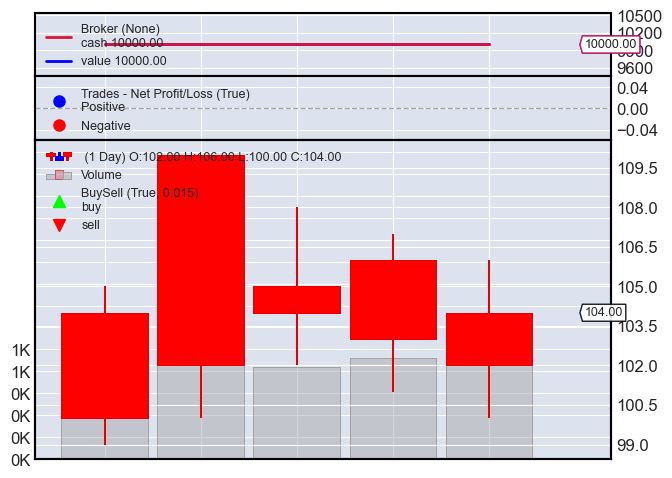

[[<Figure size 640x480 with 4 Axes>]]

In [812]:
%matplotlib inline
cerebro.plot(iplot=False)

### 단순 텍스트 읽기

In [332]:
%%writefile data/myTest.txt
Hello World
This is to say hello
Hhhello to everybody

Overwriting data/myTest.txt


In [813]:
class TextProcessor:
    def __init__(self, file_path):
        self.lines = []

        with open(file_path, 'r') as file:
            self.lines = file.readlines()

    def print_lines(self):
        for line in self.lines:
            print(line.strip())
    
    def find_lines(self, target):
        return [line for line in self.lines if target in line] #find target

processor = TextProcessor(os.path.join('data','myTest.txt'))
processor.print_lines()
print("--Found: ")
linesFound = processor.find_lines('Hello'.lower())
for line in linesFound:
    print(line.strip())

Hello World
This is to say hello
Hhhello to everybody
--Found: 
This is to say hello
Hhhello to everybody


In [327]:
'Hello'.lower()

'hello'

### 실제 OHLC 데이터 읽기


In [815]:
import yfinance as yf

#sds=web.DataReader('018260.KS', 'yf', '1/1/2021', '11/10/2022') # yahoo
sds=yf.download('018260.KS', start='2022-01-01', end='2024-07-31')

# sdsF=sds.astype(float) # CSV에서 읽거나 문자열인 경우 형변환을 위해 필요

sds[:3]

[*********************100%%**********************]  1 of 1 completed


Open      High       Low     Close      Adj Close  Volume
Date                                                                     
2022-01-04 156,000.0 156,500.0 154,000.0 156,500.0 150,221.859375   88751
2022-01-05 154,500.0 156,000.0 152,000.0 153,000.0 146,862.265625  104430
2022-01-06 151,500.0 153,500.0 148,000.0 149,000.0  143,022.71875  179429

In [816]:
import backtrader as bt

class PrintClose(bt.Strategy):
    def __init__(self):
        self.close = self.datas[0].close  # 종가의 저장

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0) # 각 일자의 형식을 설정
        #print(f'{dt.isoformat()} : {txt}') # 일자와 txt를 출력
        print('%s %s' % (dt, txt))

    def next(self): # 반복적으로 호출하는 함수
        self.log('종가: %.2f' % self.close[0]) # 0은 첫행을 계속 출력한다

cerebro = bt.Cerebro()

#_data = bt.feeds.YahooFinanceCSVData(dataname='TSLA.csv')
_data=bt.feeds.PandasData(dataname=sds[-10:]) # 출력분량을 10개로 제한한다.
cerebro.adddata(_data)
cerebro.addstrategy(PrintClose)

cerebro.run()

2024-07-17 종가: 156100.00
2024-07-18 종가: 155100.00
2024-07-19 종가: 155700.00
2024-07-22 종가: 153600.00
2024-07-23 종가: 151000.00
2024-07-24 종가: 150900.00
2024-07-25 종가: 151400.00
2024-07-26 종가: 153200.00
2024-07-29 종가: 153300.00
2024-07-30 종가: 146600.00


## 8.4 단순한 전략

### Daily Buy: 매수량과 투자금 출력

매일 매수하는 단순 전략을 실행해보자.

In [841]:
import backtrader as bt
import yfinance as yf

class DailyBuy(bt.Strategy):
    def __init__(self):
        self.order = None

    def next(self):
        if self.order:  # 주문이 이미 있으면 (열려 있으면)
            return
        #self.order = self.buy(size=10) # 매일 10주
        order = self.buy(size=10) # 매일 10주
        position = self.broker.getposition(self.data)
        print(f"주문량: {order.size} 보유량: {position.size} 일자: {self.datetime.datetime(0)} 종가: {self.data.close[0]}")

# Download data
#sds = yf.download('018260.KS', start='2022-01-01', end='2024-07-31')
_data = bt.feeds.PandasData(dataname=sds[-10:])

cerebro = bt.Cerebro()
cerebro.adddata(_data)
cerebro.broker.setcash(300000000)  # 현재 현금을 3억으로 설정
cerebro.addstrategy(DailyBuy)

print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')
cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():.2f}')

Starting Portfolio Value: 300000000.00
주문량: 10 보유량: 0 일자: 2024-07-17 00:00:00 종가: 156100.0
주문량: 10 보유량: 10 일자: 2024-07-18 00:00:00 종가: 155100.0
주문량: 10 보유량: 20 일자: 2024-07-19 00:00:00 종가: 155700.0
주문량: 10 보유량: 30 일자: 2024-07-22 00:00:00 종가: 153600.0
주문량: 10 보유량: 40 일자: 2024-07-23 00:00:00 종가: 151000.0
주문량: 10 보유량: 50 일자: 2024-07-24 00:00:00 종가: 150900.0
주문량: 10 보유량: 60 일자: 2024-07-25 00:00:00 종가: 151400.0
주문량: 10 보유량: 70 일자: 2024-07-26 00:00:00 종가: 153200.0
주문량: 10 보유량: 80 일자: 2024-07-29 00:00:00 종가: 153300.0
주문량: 10 보유량: 90 일자: 2024-07-30 00:00:00 종가: 146600.0
Final Portfolio Value: 299392000.00


- 코드 self.order 또는 order의 중요한 차이
    - self.order는 멤버변수라서, 변수 값이 남아있고, 중복 주문이 허용되지 않는다. 현재 열린 주문이 있을 때는 새로 주문을 하지않도록 하는 경우 그렇다.
    - order는 지역변수라서, 매 next마다 새롭게 설정해서 주문이 거듭된다. 이전 호출에서의 주문 상태를 기억하지 못하므로 그렇다.

- 코드 broker: cerebro.broker와 strategy.broker는 두 방법 모두 동일한 브로커 객체에 접근한다.
    **cerebro.broker**는 전략 외부에서, **strategy.broker**는 전략 내부에서 더 자주 사용된다.

    매매를 대신하려면 현금이 있어야 한다. cerebro.broker의 .setcash() 함수로 투자금을 설정하거나 .getvalue()로 읽어올 수 있다.

    현재 포트폴리오의 수수료를 설정하려면 cerebro.broker.setcommission(commission=0.001)
 
- 출력: 최초 현금과 현재 보유 자산 가치의 차이는 주가 하락으로 인한 손실분이다. 매수시점의 차이로 인해 단순 차액이 아니다.

### MA

매수조건: 전일에는 이평이 크지만, 당일에는 종가가 이평을 돌파할 때 매수한다.
매도조건: 설정하지 않는다.

데이터에서 이평이 종가를 교차하는 지점을 발견할 수 있다. 그 시점에 아래 챠트 녹색삼각형이 1개 그려진다.

```
2024-06-28 [next] [28] 종가: 148500.0 이평: 152260.0
2024-07-01 [next] [29] 종가: 152900.0 이평: 152245.0
```

[*********************100%%**********************]  1 of 1 completed


Starting Portfolio Value: 20000000.000000
2024-05-21 [prenext] [1] 종가: 166100.0 이평: nan
2024-05-22 [prenext] [2] 종가: 165500.0 이평: nan
2024-05-23 [prenext] [3] 종가: 167700.0 이평: nan
2024-05-24 [prenext] [4] 종가: 168000.0 이평: nan
2024-05-27 [prenext] [5] 종가: 166700.0 이평: nan
2024-05-28 [prenext] [6] 종가: 160500.0 이평: nan
2024-05-29 [prenext] [7] 종가: 159000.0 이평: nan
2024-05-30 [prenext] [8] 종가: 154700.0 이평: nan
2024-05-31 [prenext] [9] 종가: 153200.0 이평: nan
2024-06-03 [prenext] [10] 종가: 158800.0 이평: nan
2024-06-04 [prenext] [11] 종가: 158200.0 이평: nan
2024-06-05 [prenext] [12] 종가: 157900.0 이평: nan
2024-06-07 [prenext] [13] 종가: 162000.0 이평: nan
2024-06-10 [prenext] [14] 종가: 154600.0 이평: nan
2024-06-11 [prenext] [15] 종가: 155600.0 이평: nan
2024-06-12 [prenext] [16] 종가: 154800.0 이평: nan
2024-06-13 [prenext] [17] 종가: 150300.0 이평: nan
2024-06-14 [prenext] [18] 종가: 150800.0 이평: nan
2024-06-17 [prenext] [19] 종가: 150300.0 이평: nan
2024-06-18 [next] [20] 종가: 149300.0 이평: 158200.0
2024-06-19 [next] [21] 종가

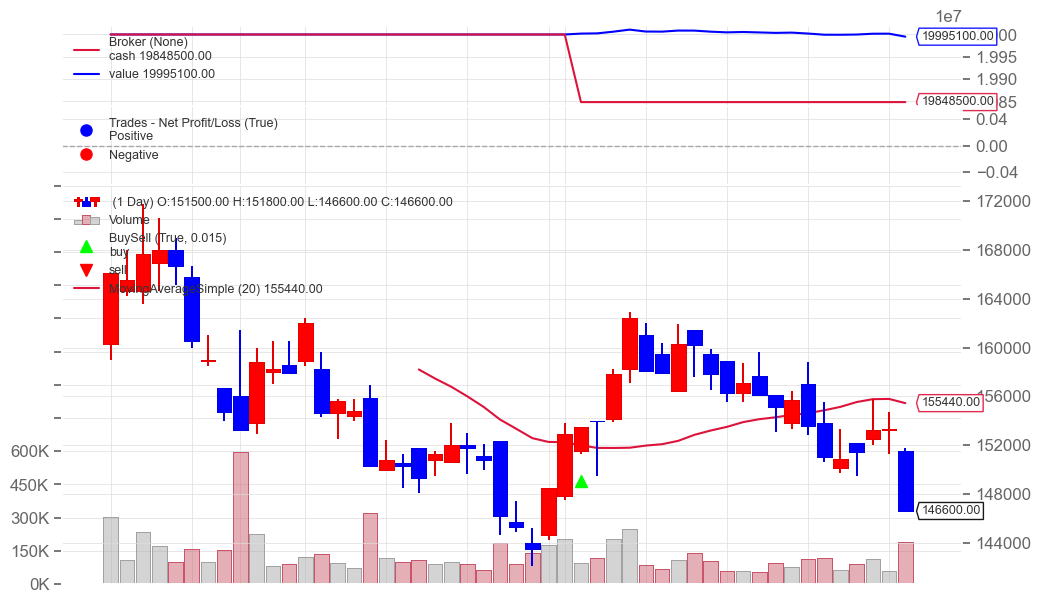

In [67]:
%matplotlib inline
import yfinance as yf
import backtrader as bt

class HelloStrategy(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.SMA = bt.indicators.MovingAverageSimple(period=20)
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0) # 각 일자를 출력
        #print(f'{dt.isoformat()} : {txt}')
        print('%s %s' % (dt, txt))
    def prenext(self):
        self.log(f'[prenext] [{len(self)}] 종가: {self.dataclose[0]} 이평: {self.SMA[0]}')

    def next(self):
        self.log(f'[next] [{len(self)}] 종가: {self.dataclose[0]} 이평: {self.SMA[0]}')

        if self.dataclose[-1] < self.SMA[-1]:
            if self.dataclose[0] > self.SMA[0]:
                self.order = self.buy()

if __name__ == "__main__":
    cerebro = bt.Cerebro()
    cerebro.addstrategy(HelloStrategy)
    sds=yf.download('018260.KS', start='2022-01-01', end='2024-07-31')
    _data=bt.feeds.PandasData(dataname=sds[-50:])
    #sdsF=sds.astype(float)
    #_data=bt.feeds.PandasData(dataname=sdsF)
    cerebro.adddata(_data)
    cerebro.broker.setcash(20000000)
    print(f'Starting Portfolio Value: {cerebro.broker.getvalue():2f}')
    cerebro.run()
    print(f'Final Portfolio Value: {cerebro.broker.getvalue():2f}')

    cerebro.plot(iplot=False, style='candle', barup='red', bardown='blue')
    #cerebro.plot(iplot=False)

챠트가 그려지지 않고 IPython is not defined 오류 메시지가 뜨면:

```
%matplotlib inline
cerebro.plot(iplot=False)
```


- 코드 class HelloStrategy(bt.Strategy): Backtrader의 Strategy 클래스를 상속받는다.

- 코드 indicators: 내장 함수들을 사용할 수 있다.

    bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
    bt.indicators.WeightedMovingAverage(self.datas[0], period=25).subplot = True
    bt.indicators.StochasticSlow(self.datas[0])
    bt.indicators.MACDHisto(self.datas[0])
    rsi = bt.indicators.RSI(self.datas[0])
    bt.indicators.SmoothedMovingAverage(rsi, period=10)
    bt.indicators.ATR(self.datas[0]).plot = False

- 코드 prenext: 최소 데이터 기간이 충족되기 전에 호출된다. prenext 함수는 전략이 적절하게 동작하기 위해서 필요한 최소한 또는 충분한 데이타가 수집되지 않았을 때 호출된다.

- 코드 len(self): 전략이 진행된 바의 수를 의미하며, 공휴일이나 비거래일은 데이터 포인트에서 제외되므로 포함되지 않는다.

### 전고점 비교 전략

전고점을 추적하여 매매한다.

- 매도조건: 전고점에서 기준이하로 하락하는 경우 매도. 매도한 후 전고점을 갱신한다.
- 매수조건: 전고점에서 기준이하로 하락하지 않은 경우 매수


[*********************100%%**********************]  1 of 1 completed


초기 자본: 10000000
전고점 갱신: 156500.0 --> 0  2022-01-04 
매수: 156500.0	 2022-01-04
매도: 130000.0 전고점 기준이후 하락	2022-03-22
전고점 갱신: 133500.0 --> 130000.0  2022-03-23 
매수: 133500.0	 2022-03-23
전고점 갱신: 135500.0 --> 133500.0  2022-03-29 
전고점 갱신: 138500.0 --> 135500.0  2022-03-31 
전고점 갱신: 139500.0 --> 138500.0  2022-04-01 
전고점 갱신: 140000.0 --> 139500.0  2022-04-05 
전고점 갱신: 147000.0 --> 140000.0  2022-04-28 
전고점 갱신: 148500.0 --> 147000.0  2022-04-29 
전고점 갱신: 149000.0 --> 148500.0  2022-05-02 
매도: 125500.0 전고점 기준이후 하락	2022-08-29
전고점 갱신: 128500.0 --> 125500.0  2022-08-30 
매수: 128500.0	 2022-08-30
전고점 갱신: 129000.0 --> 128500.0  2022-11-15 
전고점 갱신: 130500.0 --> 129000.0  2022-11-16 
전고점 갱신: 132300.0 --> 130500.0  2023-02-08 
전고점 갱신: 133600.0 --> 132300.0  2023-07-17 
전고점 갱신: 138100.0 --> 133600.0  2023-08-01 
전고점 갱신: 140700.0 --> 138100.0  2023-08-07 
전고점 갱신: 141400.0 --> 140700.0  2023-08-24 
전고점 갱신: 143400.0 --> 141400.0  2023-08-28 
전고점 갱신: 144100.0 --> 143400.0  2023-09-05 
전고점 갱신: 150400.0 --> 144100

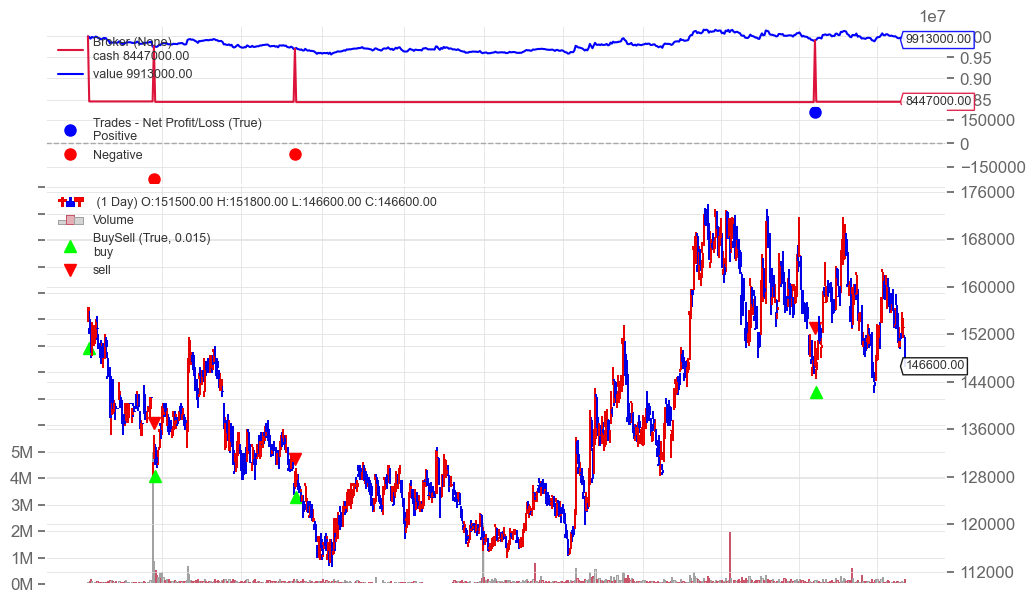

In [76]:
%matplotlib inline

import backtrader as bt
import datetime

class PeakDropStrategy(bt.Strategy):
    params = (
        ('drop_threshold', 0.15),  # 기준 이하 하락시 매도
    )

    def __init__(self):
        self.highest_price = 0  # 전고점

    def next(self):
        current_price = self.data.close[0]

        if current_price > self.highest_price:
            print(f"전고점 갱신: {current_price} --> {self.highest_price}  {self.data.datetime.date(0)} ")
            self.highest_price = current_price

        if current_price <= self.highest_price * (1 - self.params.drop_threshold):
            if self.position:
                self.sell(size=self.position.size)
                print(f"매도: {current_price} 전고점 기준 하락\t{self.data.datetime.date(0)}")            
            self.highest_price = current_price # 하락시 전고점 초기화

        elif not self.position:
            self.buy(size=10)
            print(f"매수: {current_price}\t {self.data.datetime.date(0)}")

if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.addstrategy(PeakDropStrategy)

    #cerebro.adddata(_data)
    sds=yf.download('018260.KS', start='2022-01-01', end='2024-07-31')
    _data=bt.feeds.PandasData(dataname=sds)
    cerebro.adddata(_data)

    cerebro.broker.set_cash(10000000) # 초기자본 천만원

    print(f"초기 자본: {cerebro.broker.getvalue()}")
    cerebro.run()
    print(f"최종 자본: {cerebro.broker.getvalue()}")
    cerebro.plot(iplot=False)

## 8.5 이동평균 전략

### 주문 청산

매수 조건:
- 현재의 MA 교차: self.SMAfast[0] > self.SMAslow[0] 현재 시점에서 빠른 이동평균이 느린 이동평균보다 높을 때.
- 이전의 MA 교차: self.SMAfast[-1] < self.SMAslow[-1]: 이전 시점에서 빠른 이동평균이 느린 이동평균보다 낮았을 때.

매도 조건은 매수 조건의 반대:
- 현재의 MA 교차: self.SMAfast[0] < self.SMAslow[0] 현재 시점에서 빠른 이동평균이 느린 이동평균보다 높을 때.
- 이전의 MA 교차: self.SMAfast[-1] > self.SMAslow[-1]: 이전 시점에서 빠른 이동평균이 느린 이동평균보다 낮았을 때.

기존 포지션 청산: else문의 이미 포지션이 존재할 때 실행, 일정 기간 유예하거나 조건에 따라 바로 실행된다.
- self.buy() 또는 self.sell()을 호출하면 새로운 포지션이 생성되고 명시적으로 청산되는 것은 아니다. 주문이 체결되면 현재 포지션이 변경되고, 새로운 포지션이 형성되므로 주문이 체결되면서 포지션이 자동으로 청산된다고 이해하자 (예를 들어, self.sell()을 호출하면, 현재 열려 있는 매수 포지션이 자동으로 청산된다. 즉 매도 주문이 체결되면, 해당 매수 포지션은 종료되고 새로운 매도 포지션이 열리게 된다). 그러나 self.close()와 같은 메서드를 호출하여 명시적으로 포지션을 청산할 수도 있다 (backtesting.py (self.position.close())나 backtrader 모두 마찬가지이다).
- 5일 후 청산 조건을 넣으면 if len(self) >= (self.bar_executed + 5)
- self.close()를 호출, 즉 포지션을 종료하고 청산한다고 해서 즉시 체결이 이루어진다는 의미는 아니다. 시장가 또는 지정가인지 시장의 상황에 따라 주문이 체결된다.
- 주문 시점의 가격이 아닌, 청산할 때의 실제 체결 가격 (시정가 또는 지정가를 지정한다)이 수익률 계산에 사용된다.

중복주문의 방지:
- 실제매매와 달리, 백테스트에서 중복주문은 원하지 않게 주문이 반복적으로 실행되는 경우를 의미한다.
- 중복주문이 되면, 수수료가 증가하거나 의도하지 않은 포지션 크기가 커질 수 있다.
- Backtrader에는 자동으로 중복주문을 방지하는 exclusive_orders와 같은 옵션은 없지만, 주문이 진행 중일 때 추가 주문을 막는 방식으로 비슷한 기능을 구현할 수 있다. 아래 코드를 보면, self.position은 주문체결 후에만 갱신된다. 그냥 다음 행 next로 진입하는 식으로 중복주문을 막고 있다.

```
if self.order:  # 기존 주문이 실행 중이면 새로운 주문을 막음
    return
```


In [842]:
import backtrader as bt

class HelloStrategy2(bt.Strategy):
    pfast = 20
    pslow = 50

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.SMAslow = bt.indicators.MovingAverageSimple(period=self.pslow)
        self.SMAfast = bt.indicators.MovingAverageSimple(period=self.pfast)

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0) # 각 일자를 출력
        #print(f'{dt.isoformat()} : {txt}')
        print('%s %s' % (dt, txt))

    def next(self):
        if not self.position: # 매수/매도 포지션이 없으면
            if self.SMAfast[0] > self.SMAslow[0] and self.SMAfast[-1] < self.SMAslow[-1]:
                self.log(f'매수 주문 {self.dataclose[0]:2f}')
                self.order = self.buy()  
            elif self.SMAfast[0] < self.SMAslow[0] and self.SMAfast[-1] > self.SMAslow[-1]:
                self.log(f'매도 주문 {self.dataclose[0]:2f}')
                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()
        else:
            #if len(self) >= (self.bar_executed + 5): # 5일의 청산 조건
                self.log(f'CLOSE CREATE {self.dataclose[0]:2f}')
                self.order = self.close()

if __name__ == "__main__":
    cerebro = bt.Cerebro()
    cerebro.addstrategy(HelloStrategy2)
    _data=bt.feeds.PandasData(dataname=sds)
    #sdsF=sds.astype(float)
    #_data=bt.feeds.PandasData(dataname=sdsF)
    cerebro.adddata(_data)
    cerebro.broker.setcash(20000000)
    print(f'Starting Portfolio Value: {cerebro.broker.getvalue():2f}')
    cerebro.run()
    print(f'Final Portfolio Value: {cerebro.broker.getvalue():2f}')

    #cerebro.plot(style='candle', barup='red', bardown='blue')

Starting Portfolio Value: 20000000.000000
2022-04-26 매수 주문 136000.000000
2022-04-27 CLOSE CREATE 137000.000000
2022-06-22 매도 주문 130500.000000
2022-06-23 CLOSE CREATE 129000.000000
2022-08-18 매수 주문 133000.000000
2022-08-19 CLOSE CREATE 133500.000000
2022-08-26 매도 주문 129500.000000
2022-08-29 CLOSE CREATE 125500.000000
2022-11-09 매수 주문 127000.000000
2022-11-10 CLOSE CREATE 127000.000000
2023-01-04 매도 주문 120000.000000
2023-01-05 CLOSE CREATE 120500.000000
2023-02-09 매수 주문 131400.000000
2023-02-10 CLOSE CREATE 127200.000000
2023-03-15 매도 주문 117700.000000
2023-03-16 CLOSE CREATE 117300.000000
2023-05-22 매수 주문 123800.000000
2023-05-23 CLOSE CREATE 122800.000000
2023-07-12 매도 주문 118500.000000
2023-07-13 CLOSE CREATE 118400.000000
2023-08-01 매수 주문 138100.000000
2023-08-02 CLOSE CREATE 133100.000000
2023-10-13 매도 주문 135500.000000
2023-10-16 CLOSE CREATE 135500.000000
2023-11-17 매수 주문 147600.000000
2023-11-20 CLOSE CREATE 145500.000000
2024-01-31 매도 주문 152000.000000
2024-02-01 CLOSE CREATE 154800

### 주문 추적

앞 전략에서 주문을 추적하도록 수정해보자.

주문의 상태(예: 완료, 취소 등)를 확인하고 싶다면, 주문 객체를 저장하고 해당 객체의 속성(order.Completed)을 확인하여 주문이 완료되었는지 여부를 판단할 수 있다.

[*********************100%%**********************]  1 of 1 completed


Starting Portfolio Value: 20000000.000000
2022-04-26 매수 주문 [76] 136000.000000
2022-04-27 [+매수 완료] 매수량: 1 가격: 133000.00
2022-04-27 CLOSE CREATE 137000.000000
2022-04-28 [-매도 완료] 매수량: -1 가격 137500.00
2022-06-22 매도 주문 130500.000000
2022-06-23 [-매도 완료] 매수량: -1 가격 130500.00
2022-06-23 CLOSE CREATE 129000.000000
2022-06-24 [+매수 완료] 매수량: 1 가격: 129000.00
2022-08-18 매수 주문 [153] 133000.000000
2022-08-19 [+매수 완료] 매수량: 1 가격: 133000.00
2022-08-19 CLOSE CREATE 133500.000000
2022-08-22 [-매도 완료] 매수량: -1 가격 133000.00
2022-08-26 매도 주문 129500.000000
2022-08-29 [-매도 완료] 매수량: -1 가격 127000.00
2022-08-29 CLOSE CREATE 125500.000000
2022-08-30 [+매수 완료] 매수량: 1 가격: 126500.00
2022-11-09 매수 주문 [208] 127000.000000
2022-11-10 [+매수 완료] 매수량: 1 가격: 126500.00
2022-11-10 CLOSE CREATE 127000.000000
2022-11-11 [-매도 완료] 매수량: -1 가격 129000.00
2023-01-04 매도 주문 120000.000000
2023-01-05 [-매도 완료] 매수량: -1 가격 120000.00
2023-01-05 CLOSE CREATE 120500.000000
2023-01-06 [+매수 완료] 매수량: 1 가격: 120000.00
2023-02-09 매수 주문 [271] 131400.00000

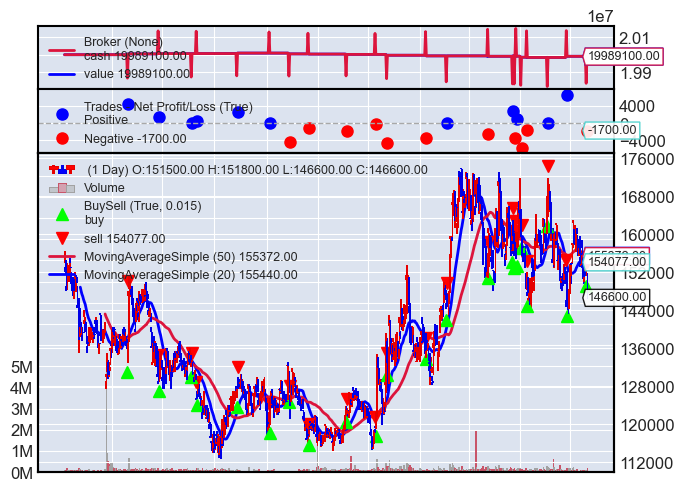

In [850]:
%matplotlib inline
import yfinance as yf
import backtrader as bt

class HelloStrategy2(bt.Strategy):
    pfast = 20
    pslow = 50

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.SMAslow = bt.indicators.MovingAverageSimple(period=self.pslow)
        self.SMAfast = bt.indicators.MovingAverageSimple(period=self.pfast)

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0) # 각 일자를 출력
        #print(f'{dt.isoformat()} : {txt}')
        print('%s %s' % (dt, txt))

    def next(self):
        if not self.position: # 매수/매도 포지션이 없으면
            if self.SMAfast[0] > self.SMAslow[0] and self.SMAfast[-1] < self.SMAslow[-1]:
                self.order = self.buy()
                self.log(f'매수 주문 [{len(self)}] {self.dataclose[0]:2f}')
            elif self.SMAfast[0] < self.SMAslow[0] and self.SMAfast[-1] > self.SMAslow[-1]:
                self.log(f'매도 주문 {self.dataclose[0]:2f}')
                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()
        else:
            #if len(self) >= (self.bar_executed + 5):
                self.log(f'CLOSE CREATE {self.dataclose[0]:2f}')
                self.order = self.close()

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        # 주의: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'[+매수 완료] 매수량: {order.size} 가격: {order.executed.price:.2f}')
            elif order.issell():
                self.log(f'[-매도 완료] 매수량: {order.size} 가격 {order.executed.price:.2f}')
            #self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('x주문 취소/마진/거절')

        # Reset orders
        self.order = None

if __name__ == "__main__":
    cerebro = bt.Cerebro()
    sds=yf.download('018260.KS', start='2022-01-01', end='2024-07-31')
    _data=bt.feeds.PandasData(dataname=sds)
    cerebro.adddata(_data)
    cerebro.addstrategy(HelloStrategy2)
    cerebro.broker.setcash(20000000)
    print(f'Starting Portfolio Value: {cerebro.broker.getvalue():2f}')
    results = cerebro.run() # 기본분석기가 없다. results[0].broker.getvalue()로 출력가능
    print(f'Final Portfolio Value: {cerebro.broker.getvalue():2f}')
    #cerebro.plot(style='candle', barup='red', bardown='blue')
    cerebro.plot(iplot=False)

-  코드 notify_order: Backtrader에서 buy()나 sell() 메서드를 사용하여 주문을 제출한 후, 주문의 상태가 변경될 때 notify_order() 메서드가 자동으로 호출되며, 이를 통해 주문의 상태를 추적할 수 있다.

    - 주문 상태의 추적: notify_order() 함수는 주문 상태가 변경될 때마다 자동으로 호출된다.
    
    - order 객체: Backtrader에서 거래를 나타내며, buy() 또는 sell() 메서드를 통해 생성된다. 매수 주문 객체를 만드는 코드는 order = self.buy(), 매도 주문 객체는 order = self.sell()
    
    - 주문 상태: 주문이 성공적으로 실행되었는지, 취소되었는지, 거부되었는지 등을 확인할 수 있다. 주요 상태는: (1) 'Created' 주문 생성 (2) 'Submitted' 주문이 브로커에게 제출, (3) 'Accepted' 주문을 브로커가 수락, (4) 'Completed' 주문이 실행, (5) 'Canceled' 주문이 취소, (6) 'Rejected' 주문이 거부, (7) 'Margin' (레버리지 거래를 할 때 사용되는 증거금이 부족하면 주문이 거부)
    
    - 주문 관련 함수
        (1) buy() 매수, sell() 매도, cancel(order) 제출된 주문의 취소
        (2) order_target_size() 목표 포지션 수량을 설정하는 주문, order_target_value() 목표 포지션 금액을 설정하는 주문, order_target_percent() 포트폴리오에서의 자산의 목표비율을 설정하는 주문
    
    - 주문 실행 정보
        order.executed.price 실행가격, order.executed.size 실행수량, order.executed.value 실행 총가치, order.executed.comm 실행 수수료

- 포지션: Backtrader에서 position은 매수 또는 매도 주문이 실행될 때 생성된다. position.size에 따라 True 또는 False 값을 가질 수 있다.
    - 포지션이 없으면 크기(self.position.size)는 0이 되고, 매도/매수
        - if not self.position: 현재 포지션이 없는 경우 매수 주문
        - if pos_size > 0 and self.dataclose[0] > pos_price * 1.05:: 포지션이 존재하고, 가격이 5% 이상 상승하면 매도 주문
    - else 포지션이 있으면 청산 주문

- buy, sell, close

    현재 매수 포지션이 있을 때, self.sell()을 호출하면, 매도 주문이 실행되면서 기존의 매수 포지션이 종료. 
    현재 매도 포지션이 있을 때, self.buy()을 호출하면, 매수 주문이 실행되면서 기존의 매도 포지션이 종료.
    
    self.order = self.close() 코드는 self.close()를 통해 생성된 청산 주문을 self.order에 저장한다.

- Sizer

Backtrader에서 addsizer() 함수는 거래 전략에서 포지션의 크기를 결정 결정한다. Sizer는 전략에서 얼마나 많은 주식(또는 다른 자산)을 매수하거나 매도할지를 제어하는 역할을 한다. 명시적으로 설정하지 않으면, 기본값은 1이다 (1개, backtesting.py는 100% 전량매매를 의미). 전부 또는 일부와 같은 비율이나 세밀한 설정을 하려면 다음과 같은 Sizer 클래스를 사용한다:

    - FixedSize: 고정된 수량, cerebro.addsizer(bt.sizers.FixedSize, stake=10)
    - PercentSizer: 자본의 일정 비율, cerebro.addsizer(bt.sizers.PercentSizer, percents=20)
    - CashSizer: 금액기준 설정, cerebro.addsizer(bt.sizers.CashSizer, cash=10000)
    - AllInSizer: 가용 자산을 모두 사용, cerebro.addsizer(bt.sizers.AllInSizer)
    - 또는 직접 설정: 전량 self.broker.getposition(data).size 또는 비율 int(cash / data.close[0] * 0.10)로 설정할 수 있다.

- cerebro.run()의 주요 작업

    - cerebro 객체에 추가된 데이터 피드들을 초기화하고, 데이터가 올바르게 로드되었는지 확인한다.
    
    - cerebro.addstrategy()를 통해 추가된 전략(또는 여러 전략)을 초기화한다.
    전략의 __init__() 메서드가 호출되며, 여기서 사용자 정의 변수 및 지표들이 설정된다.
    
    - 시장 초기 상태 설정: 브로커 및 포트폴리오 초기 상태가 설정된다. 예를 들어, 초기 자금, 수수료, 슬리피지 (실제 거래 가격과 예상 가격(또는 주문 가격) 간의 차이) 등이 설정된다.
    
    - 백테스트 반복 실행: 1줄의 바(bar) 단위로 처리하며, next() 메서드가 반복적으로 호출된다. 매매 신호 -> 주문 -> 브로커가 주문을 관리 -> 체결 -> 전략의 notify_order() 메서드를 통해 전략에 통보된다.
    
    - 포지션 및 주문 관리: 전략이 내린 주문을 브로커가 관리하고, 매수 및 매도 주문을 체결한다. 체결된 포지션은 전략의 self.position을 통해 추적되며, 이 정보는 다음 바에서의 전략 결정에 영향을 미칠 수 있다.
    
    - 결과 집계 및 반환: 백테스트가 종료되면, 최종적인 포트폴리오 가치, 주문 내역, 거래 기록 등의 결과가 집계, 출력된다.

- 코드 setcash: Backtrader에서는 Cerebro 객체의 브로커(broker)를 통해 현금을 설정한다 (예: cerebro.broker.set_cash(10000)). 반면에 Backtesting.py에서는 Backtest 클래스를 생성할 때 cash 인자에 현금을 설정한다 (예: Backtest(GOOG, MyStrategy, cash=10000)). cash를 설정하지 않으면 Backtesting.py는 30,000 Backtrader는 100,000이 기본이다.

- 실행결과

    cerebro.run() 실행하고 나서 분석결과를 출력하려면 조금 복잡하고, 다음에 설명하기로 한다.
    Backtrader에서 cerebro.run()을 실행한 후 분석기를 추가하지 않은 경우, 특별히 분석된 결과가 출력되지 않는다. 대신, cerebro.run()의 결과는 전략 인스턴스들의 리스트를 반환하는데, 0번째 브로커를 통해 분석결과를 출력할 수 있다.
    
    results[0].broker.getvalue()는 cerebro.broker.getvalue()와 동일한 값을 출력한다.

- plot: import matplotlib 하지 않아도 된다. 그냥 cerebro.plot() 명령은 다음 3 Observers를 포함해서 챠트를 그려준다. 

    - 창1 CashValue Observer: 현재 자산의 Cash 챠트
    - 창2 Trade Observer: Trade PnL (Profit and Loss)
    - 창3 BuySell Observer: 매매 기록

    기본으로 창1~3을 포함하는데 (stdstats=True), 시작할 때 설정을 변경할 수 있다.
    
    ```
    cerebro = bt.Cerebro(stdstats=False)
    
    또는
    
    cerebro = bt.Cerebro()
    ...
    cerebro.run(stdstats=False)
    ```

- Observer
Observer는 Strategy와 함께 실행되며, 특정 이벤트가 발생할 때마다 Observer가 상태를 기록한다 (전략의 트레이드, 포지션 변동, 계좌 가치 변화 등).

내장된 Observer들: Backtrader는 여러 기본 Observer를 제공하며, 필요에 따라 커스텀 Observer를 작성할 수도 있다.
기본 Observer들을 살펴보면, Broker (계좌 가치(캐시 + 포지션 가치)를 기록), BuySell (매도/매수 시점 관련 정보 기록), DrawDown (전략의 최대 손실(DrawDown)과 관련된 정보를 기록), Value (특정 시점의 계좌 가치(종가 기준)를 기록), Trades (각 트레이드의 손익을 추적하고 기록), Benchmark (전략의 성과를 벤치마크 지수와 비교) 등이다.

다음은 Broker와 BuySell Observer를 Cerebro에 추가하는 예시이다:

```
import backtrader as bt

class Broker(Observer):
    alias = ('CashValue',)
    lines = ('cash', 'value')

    plotinfo = dict(plot=True, subplot=True)

    def next(self):
        self.lines.cash[0] = self._owner.broker.getcash()
        self.lines.value[0] = value = self._owner.broker.getvalue()

이렇게 정의하고, 나중에 Observer를 추가한다.

cerebro = bt.Cerebro()
...
erebro.addobserver(bt.observers.Broker)
cerebro.addobserver(bt.observers.BuySell)

```


- 실행결과

cerebro.run() 실행하고 나서 분석결과를 출력하기 위해서는 분석기가 필요하다.

우선 줄1과 같이 분석기를 추가해야 한다.
그리고 실행을 하고 (줄2), 비로서 얻은 반환결과는 리스트 형식으로 한 걸음 더 진입해야 한다. 줄3 results[0].analyzers 객체를 통해 원하는 (줄1에서 추가한) 분석기의 결과에 접근할 수 있다.

```
줄1: cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe')
줄2: results = cerebro.run()
줄3: results[0].analyzers.sharpe.get_analysis()
```

Backtrader에서 제공하는 대표적인 분석기들은 다음과 같다:

    - SharpeRatio: 샤프 비율은 리스크 대비 수익을 평가하는 지표
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe')
    
    - DrawDown: 최대 손실 지표
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
    
    - TradeAnalyzer: 전체 거래에 대한 요약(성공률, 평균수익, 평균손실, 수익/손실 비율 등)
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='trade')
    
    - Returns: 특정 기간 동안의 수익률
    cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='returns')
    
    - Transactions: 거래의 일시, 가격, 수량 등
    cerebro.addanalyzer(bt.analyzers.Transactions, _name='transactions')
    
    - AnnualReturn 연간 수익률
    cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='annual_return')
    
    - PyFolio - Backtrader와 PyFolio를 연결하여 PyFolio 분석
    cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')


## 8.5 성과 분석


- addanalyzer

returns는 다음을 출력하고, 더 많은 분석을 위해서는 pd.Series의 returns_series로 변환해서 수익률 분석 라이브러리 (PyFolio, quantstats 등)을 활용할 수 있다.

```
OrderedDict([(datetime.datetime(2022, 1, 4, 0, 0), 0.0),
             (datetime.datetime(2022, 1, 5, 0, 0), 0.0),
             (datetime.datetime(2022, 1, 6, 0, 0), 0.0),
             ...
             (datetime.datetime(2024, 7, 26, 0, 0), 0.0),
             (datetime.datetime(2024, 7, 29, 0, 0), 5.002301058487646e-06),
             (datetime.datetime(2024, 7, 30, 0, 0), -9.004096864073663e-05)])
```

잔고출력 시 작성한 HelloStrategy2를 활용해, 여러 성과분석을 해보자.

In [851]:
%matplotlib inline
import backtrader as bt
import pandas as pd

if __name__ == "__main__":
    cerebro = bt.Cerebro()
    cerebro.addstrategy(HelloStrategy2)
    _data=bt.feeds.PandasData(dataname=sds)
    #sdsF=sds.astype(float)
    #_data=bt.feeds.PandasData(dataname=sdsF)
    cerebro.adddata(_data)
    cerebro.broker.setcash(20000000)
    print(f'Starting Portfolio Value: {cerebro.broker.getvalue():2f}')
    # 수익률 추가1: 일일 수익률 계산을 위해 TimeReturn 분석기 추가
    cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='returns')
    results = cerebro.run() # 기본분석기가 없다. results[0].broker.getvalue()로 출력가능
    print(f'Final Portfolio Value: {cerebro.broker.getvalue():2f}')
    # 수익률 추가2: 분석기에서 수익률 데이터를 추출
    strat = results[0]
    returns = strat.analyzers.returns.get_analysis()
    # 수익률 추가3: 수익률 데이터를 pandas.Series로 변환
    returns_series = pd.Series(returns)
    # Pyfolio로 성과 분석
    #pf.create_simple_tear_sheet(returns_series)

    # 분석기 추가
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='trade')

    # 백테스트 실행
    results = cerebro.run()

    # 분석 결과 출력
    sharpe = results[0].analyzers.sharpe.get_analysis()
    drawdown = results[0].analyzers.drawdown.get_analysis()
    trade_analysis = results[0].analyzers.trade.get_analysis()

    print(f"Sharpe Ratio: {sharpe['sharperatio']:.2f}")
    print(f"Max Drawdown: {drawdown.max.drawdown:.2f}%")
    print(f"Total Trades: {trade_analysis.total.closed}")

    #cerebro.plot(style='candle', barup='red', bardown='blue')
    #cerebro.plot(iplot=False, style='candle', barup='red', bardown='blue')

Starting Portfolio Value: 20000000.000000
2022-04-26 매수 주문 [76] 136000.000000
2022-04-27 [+매수 완료] 매수량: 1 가격: 133000.00
2022-04-27 CLOSE CREATE 137000.000000
2022-04-28 [-매도 완료] 매수량: -1 가격 137500.00
2022-06-22 매도 주문 130500.000000
2022-06-23 [-매도 완료] 매수량: -1 가격 130500.00
2022-06-23 CLOSE CREATE 129000.000000
2022-06-24 [+매수 완료] 매수량: 1 가격: 129000.00
2022-08-18 매수 주문 [153] 133000.000000
2022-08-19 [+매수 완료] 매수량: 1 가격: 133000.00
2022-08-19 CLOSE CREATE 133500.000000
2022-08-22 [-매도 완료] 매수량: -1 가격 133000.00
2022-08-26 매도 주문 129500.000000
2022-08-29 [-매도 완료] 매수량: -1 가격 127000.00
2022-08-29 CLOSE CREATE 125500.000000
2022-08-30 [+매수 완료] 매수량: 1 가격: 126500.00
2022-11-09 매수 주문 [208] 127000.000000
2022-11-10 [+매수 완료] 매수량: 1 가격: 126500.00
2022-11-10 CLOSE CREATE 127000.000000
2022-11-11 [-매도 완료] 매수량: -1 가격 129000.00
2023-01-04 매도 주문 120000.000000
2023-01-05 [-매도 완료] 매수량: -1 가격 120000.00
2023-01-05 CLOSE CREATE 120500.000000
2023-01-06 [+매수 완료] 매수량: 1 가격: 120000.00
2023-02-09 매수 주문 [271] 131400.00000

## 8.6 최적화

In [2]:
단기와 장기 이동평균이 서로 교차하는지를 찾아서 매매 시그널로 판단하는 경우를 보자.

이 때 단기와 장기의 교차점 가운데 어느 지점에서 수익이 최대화되는 최적화를 할 수 있다.

backtesting.py는 optimize() 함수를 사용하는 반면, Backtrader는 cerebro.optstrategy() 함수를 사용해 최적화한다는 차이가 있다.

In [3]:
%%writefile src/HelloStrategy2Optimize.py
import yfinance as yf
import backtrader as bt
import pandas as pd

class HelloStrategy2(bt.Strategy):
    params = (
        ('pfast', 20),
        ('pslow', 50),
    )

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.SMAslow = bt.indicators.MovingAverageSimple(period=self.p.pslow)
        self.SMAfast = bt.indicators.MovingAverageSimple(period=self.p.pfast)

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0) # 각 일자를 출력
        print('%s %s' % (dt, txt))

    def next(self):
        if not self.position: # 포지션이 없으면 (0 또는 None)
            if self.SMAfast[0] > self.SMAslow[0] and self.SMAfast[-1] < self.SMAslow[-1]:
                #self.log(f'매수 주문 [{len(self)}] {self.dataclose[0]:2f}')
                self.order = self.buy()  
            elif self.SMAfast[0] < self.SMAslow[0] and self.SMAfast[-1] > self.SMAslow[-1]:
                #self.log(f'매도 주문 {self.dataclose[0]:2f}')
                self.order = self.sell()
        else:
            #self.log(f'CLOSE CREATE {self.dataclose[0]:2f}')
            self.order = self.close()

if __name__ == "__main__":
    #cerebro = bt.Cerebro()
    cerebro = bt.Cerebro(optreturn = False)
    sds=yf.download('018260.KS', start='2022-01-01', end='2024-07-31')
    _data=bt.feeds.PandasData(dataname=sds)
    cerebro.adddata(_data)
    cerebro.broker.setcash(20000000)
    cerebro.addanalyzer(bt.analyzers.Returns, _name='returns') # 수익률 분석기
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio') # Sharpe 분석기 추가
    cerebro.optstrategy(HelloStrategy2, pfast=range(5,20), pslow=range(50,60)) # 최적화 5,20 50,100
    cerebro.addsizer(bt.sizers.SizerFix, stake=3)

    results = None

    #if __name__ == "__main__": # cerebro를 if문 밖에서 정의하다가 안으로 옮김. [**100%%**]  1 of 1 completed 반복이 사라짐.
    print(f'Starting Portfolio Value: {cerebro.broker.getvalue():2f}')
    results = cerebro.run()  # 전략 최적화의 실행결과들 (리스트)

    final_results_list = []
    for run in results:
        for strategy in run:
            #PnL = round(strategy.broker.get_value() - 10000, 2)
            PnL = strategy.broker.get_value() # 전략의 현재 총평가액       
            # 앞의 하나씩 실행한 명령과 동일 sharpe = results[0].analyzers.sharpe.get_analysis()
            returns = strategy.analyzers.returns.get_analysis()
            sharpe = strategy.analyzers.sharpe_ratio.get_analysis() #분석한 샤프비율을 저장한다
            # 앞의 하나씩 실행한 출력과 동일 print(f"Sharpe Ratio: {sharpe['sharperatio']:.2f}")
            #final_results_list.append([strategy.params.pfast, strategy.params.pslow, PnL, sharpe['sharperatio']])
            final_results_list.append([strategy.p.pfast,strategy.p.pslow,PnL,returns['rtot'],sharpe['sharperatio']])
            #print(f"-----Sharpe Ratio: {sharpe['sharperatio']:.2f}") #테스트 출력
    
    sort_by_sharpe = sorted(final_results_list, key=lambda x: x[2], reverse=True) # 총평가액 기준으로 정렬
    #sort_by_sharpe = sorted(final_results_list, key=lambda x: x[3], reverse=True) # 인덱스에 따라 수익률/샤프 기준 정렬
    for line in sort_by_sharpe[:5]:
        print(line)
    print(pd.DataFrame(final_results_list, columns=['pfast','pslow','PnL','returns','sharperatio']))
    #cerebro.plot(style='candle', barup='red', bardown='blue')

Overwriting src/HelloStrategy2Optimize.py


최적화하면서 실행 횟수가 많아지기 때문에 시간이 좀 걸린다.

In [5]:
!python src/HelloStrategy2Optimize.py

Starting Portfolio Value: 20000000.000000
[17, 57, 20059400.0, 0.0029655982632849523, -9.293546090918264]
[16, 57, 20054600.0, 0.002726280318282729, -13.677341224997546]
[17, 56, 20045300.0, 0.0022624387542519346, -14.388854111157652]
[17, 58, 20044400.0, 0.0022175394409545933, -15.522143584358616]
[15, 59, 20043200.0, 0.002157670553799371, -13.825533274559795]
     pfast  pslow         PnL   returns  sharperatio
0        5     50  20005100.0  0.000255    -8.554779
1        5     51  20041100.0  0.002053   -14.319309
2        5     52  19983200.0 -0.000840   -12.728039
3        5     53  19949300.0 -0.002538   -14.965840
4        5     54  19947800.0 -0.002613   -18.543235
..     ...    ...         ...       ...          ...
145     19     55  20006900.0  0.000345   -13.107836
146     19     56  19970300.0 -0.001486   -18.612717
147     19     57  19960400.0 -0.001982   -18.570477
148     19     58  19989500.0 -0.000525   -19.710735
149     19     59  19986500.0 -0.000675   -11.979066



[*********************100%%**********************]  1 of 1 completed


- 코드 optreturn = False

최적화 속도를 빠르게 하기 위해 optreturn을 생략하고, optreturn=False이라고 해준다.

Backtrader에서 optstrategy를 사용하여 최적화를 수행할 때, 기본적으로 optreturn=True로 설정되어 있다. 그러면 반환되는 OptReturn 객체는 메모리 절약을 위해 전략 인스턴스의 모든 내용을 포함하지 않으며, 특히 broker와 같은 속성에 접근할 수 없게 된다.

optreturn=False로 설정하면 최적화된 각 전략이 실제 Strategy 인스턴스로 반환되고, broker.get_value()로 포트폴리오의 최종 가치를 확인할 수 있게 된다.

```
results = cerebro.run(optreturn=False) # 이렇게 설정하면 results 리스트에는 최적화된 실제 Strategy 인스턴스가 포함된다.
for strat in results:
    print(f"Final Portfolio Value: {strat.broker.get_value()}") # 설정하므로 broker.get_value()가 가능
```

- strategy.broker.get_value()

broker.get_value()는 Backtrader에서 포트폴리오의 총 자산 가치를 계산하는 기본 메서드로, 어떤 분석기를 추가하지 않아도 사용할 수 있다.
strategy.broker.get_value()를 사용하려면, 전략 인스턴스가 Cerebro 객체를 통해 실행된 후여야 한다. 최적화(optstrategy) 실행 시에는 접근 방식이 약간 다를 수 있다. 이 경우 OptReturn 객체를 통해 각 전략 인스턴스에 접근해야 한다.

그러나 optreturn=False라고 하지 않으면 broker를 사용할 수 없다.

PnL = strategy.broker.get_value()
AttributeError: 'OptReturn' object has no attribute 'broker'

대신 수익률을 구해서 최적의 전략을 고를 수 있다.

수익률은 출력할 때 다음과 같으니 'rtot'만 선택하도록 하자.

```
OrderedDict([
        ('rtot', -0.0026585307633357194),
        ('ravg', -4.2065360179362645e-06),
        ('rnorm', -0.0010594854250942332),
        ('rnorm100', -0.10594854250942333)])
```

- 총가치, 수익률

이 둘은 서로 비슷한 개념이지만, 반드시 동일하지는 않다. 계산식을 보면 차이가 보인다.

    - 수익률: 초기 자산에 대한 최종 자산의 증가율이다. 예를 들어, 수익률 = (최종 자산 가치 - 초기 자산 가치) / 초기 자산 가치.
    
    - 총가치: broker.get_value():
    broker.get_value()는 전략 실행 후 포트폴리오의 총 가치이고, 이 값은 초기 자산을 포함한 모든 자산의 합계를 나타낸다.

예를 들어, 초기 자산이 100,000이라 가정하고, 전략 실행 후 포트폴리오 가치가 120,000이 되었을 때:
수익률: (120,000 - 100,000) / 100,000 = 20%
broker.get_value(): 120,000

수익률:
전략이 초기 자산의 크기에 상관없이 얼마나 효율적인지를 비교하고자 할 때 사용한다.

broker.get_value():
최종 자산의 절대적인 가치를 최적화하고자 할 때 사용한다.


- 최적화 설정:

cerebro.optstrategy를 사용해 pfast와 pslow 매개변수의 범위를 지정하여 최적화를 수행한다. pfast는 5에서 19까지, pslow는 50에서 99까지의 범위로 설정되어 있다.
최적화를 통해 최적의 pfast와 pslow 값을 찾는다.

거래 시 얼마나 많은 주식을 매수하거나 매도할지(포지션 사이즈)를 고정시켜, 일정한 방식으로 전략의 성과를 테스트할 수 있다.

cerebro.addsizer(bt.sizers.SizerFix, stake=3)
bt.sizers.SizerFix 크기(stake)를 3으로 사용해 거래를 항상 3주를 매수 매도한다

- cerebro.run() 결과는 리스트

cerebro.run()를 실행하면 최적화를 한다는 의미이다. 모든 조합에 대해 최적화 백테스트를 수행하여 성과를 산출하고, 최적화의 결과가 저장된 OptReturn 객체의 리스트가 만들어진다.

그러면, 예를 들어 sharpe_ratio 분석기를 사용해 샤프 비율을 계산한다고 하자. 최적의 샤프 비율을 기준으로 결과를 정렬하여, 상위 5개의 결과를 출력할 수 있다.

- params 사용

TypeError: __init__() got an unexpected keyword argument 'pfast'

이 오류는 Backtrader에서 optstrategy를 사용해 전략을 최적화할 때 발생하는 문제로, 전달된 매개변수가 __init__ 메서드에서 예상하지 않은 키워드 인자로 인식되기 때문에 발생한다. 

이를 해결하기 위해 params라는 클래스를 사용하여 최적화할 매개변수를 지정할 수 있다. pfast와 pslow를 클래스 내부의 params 딕셔너리로 정의하고, self.p.pfast, self.p.pslow로 접근한다.

- 오류 설명 AttributeError: Can't get attribute 'HelloStrategy2' on <module '__main__' (built-in)>

Backtrader에서 최적화(optstrategy)를 수행할 때 발생하는 AttributeError: Can't get attribute 'HelloStrategy2' on <module '__main__' (built-in)> 오류는 주로 병렬 처리로 인해 발생한다. optstrategy가 전략을 병렬로 실행할 때, Python의 multiprocessing 모듈이 전략 클래스(예: HelloStrategy2)를 찾을 수 없어서 발생하게 된다.

Backtrader는 optstrategy를 사용해 여러 전략을 병렬로 실행하는데, multiprocessing 모듈은 각 프로세스에서 전략 클래스를 가져오려고 한다.
Python의 multiprocessing 모듈은 각 프로세스에서 모듈을 다시 불러온다. 이 과정에서 __main__ 모듈에 정의된 클래스(여기서는 HelloStrategy2)를 찾지 못하면 이 오류가 발생한다.

이 문제는 if __name__ == "__main__": 블록을 사용하면 해결된다. 전략 클래스를 if __name__ == "__main__": 블록 밖에서 정의하고, Cerebro와 관련된 코드를 그 안에 넣으면 된다.


## 8.7 성과분석 라이브러리

Backtrader (또는 backtesting.py도 마찬가지)에서 전략을 실행한 후, 결과 수익률을 QuantStats로 전달해 더 상세하게 분석할 수 있다.

그러나, 성과측정 라이브러리 (PyFolio, QuantStats)와 백테스팅 라이브러리는 각기 다른 목적과 방식으로 평가를 수행하기 때문에 동일한 전략이라 하더라도 결과가 달라질 수 있다.

Backtrader나 backtesting.py에서는 초기 자금, 거래 비용, 슬리피지, 주문 실행 방식 등 다양한 매개변수를 설정하고 전략의 실제 매매 시뮬레이션에 초점을 맞추고 있다. 이러한 매개변수가 영향을 미치면서 성과에 차이가 발생하게 된다.


## 8.8 data 입력

backtrader에서 데이터를 입력할 때 bt.feeds.PandasData와 bt.feeds.GenericCSVData는 가장 일반적으로 사용되는 두 가지 데이터 피드이다.
다음과 같은 매개변수를 통해 입력 데이터를 조정한다.

- 매개변수 값의 의미
    - None : 해당하는 열이 없는 경우
    - -1 : 자동으로 동일한 컬럼명을 찾거나 해당하는 열이 없는 것으로 처리.
    - 0 이상 : 열의 순서를 뜻하는 정수인덱스. 실제로 열이 존재하면, 그 인덱스 값을 지정한다.

- 'dataname': Pandas 데이터프레임 또는 CSV 파일의 경로 (문자열).
- 'datetime': 기본값은 None으로 설정되며 (일자열이 없다는 의미), Pandas 데이터프레임의 경우, 지정하지 않으면 인덱스를 날짜로 본다.
  
- 'time': 기본값은 -1로 설정되며 시간 정보가 없는 경우에도 처리된다. datetime 필드와 다른 시간이다.
- 'open', 'high', 'low', 'close', 'volume', 'openinterest' 각 열을 가리키는 인덱스 번호이고, 기본값은 -1로 동일한 이름의 열을 자동으로 찾는다.
-  'fromdate', 'todate' 시작 종료 일자, datetime.datetime 형식이며, 데이터를 이 날짜 기준으로 필터링한다. 기본값은 None.
- dtformat (default: %Y-%m-%d %H:%M:%S) 일자형식 지정, PandasData 에서는 설정하지 않는다.
- tmformat (default: %H:%M:%S) 시간형식을 지정

In [ ]:
앞서 시계열의 항목을 주의깊게 보자. 앞 글자 대문자이고, 'Adj Close'를 포함하고 있다.
주식 시계열은 서로 항목의 명칭이나 구성이 다를 수 있다.

In [1]:
import yfinance as yf

#sds=web.DataReader('018260.KS', 'yf', '1/1/2021', '11/10/2022') # yahoo
sds=yf.download('018260.KS', start='2022-01-01', end='2024-07-31')
sds[:3]

[*********************100%%**********************]  1 of 1 completed


Open      High       Low     Close      Adj Close  Volume
Date                                                                     
2022-01-04  156000.0  156500.0  154000.0  156500.0  150221.859375   88751
2022-01-05  154500.0  156000.0  152000.0  153000.0  146862.265625  104430
2022-01-06  151500.0  153500.0  148000.0  149000.0  143022.734375  179429

이번에는 ```data/myStock.csv``` 파일을 입력해보자. 항목의 명칭과 구성이 다르다.
컬럼명을 보면 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close' 이렇다.

pandas에서는 일자가 index로 쓰이고 있다.

```
파일명: data/myStock.csv
datetime,open,high,low,close,volume,openinterest
2020-01-01,100,110,90,105,10000,0
2020-01-02,105,115,95,110,15000,0
2020-01-03,110,120,100,115,20000,0
```

### pandas 데이터 형식을 정해서 읽기


In [2]:
import pandas as pd
myStockDf = pd.read_csv('data/myStock.csv', index_col='datetime', parse_dates=True)
print(myStockDf.head())

            open  high  low  close  volume  openinterest
datetime                                                
2020-01-01   100   110   90    105  100000             0
2020-01-02   105   115   95    110   14000             0
2020-01-03   110   120  100    115   20000             0


컬럼명을 대문자로 변경해봄

In [3]:
myStockDf.columns

Index(['open', 'high', 'low', 'close', 'volume', 'openinterest'], dtype='object')

In [4]:
myStockDf.columns=['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'OpenInterest']

In [5]:
myStockDf

OPEN  HIGH  LOW  CLOSE  VOLUME  OpenInterest
datetime                                                
2020-01-01   100   110   90    105  100000             0
2020-01-02   105   115   95    110   14000             0
2020-01-03   110   120  100    115   20000             0

In [13]:
import backtrader as bt

class TestPrint(bt.Strategy):
    def __init__(self):
        pass

    def log(self, txt, dt=None):
        dt = dt or self.data.datetime[0]
        if isinstance(dt, float):
            dt = bt.num2date(dt)
        print("%s, %s" % (dt, txt))

    def next(self):
        self.log(f"Bar: {len(self)}, "
                 f"Open: {self.datas[0].open[0]:.1f}, "
                 f"High: {self.datas[0].high[0]:.1f}, "
                 f"Low: {self.datas[0].low[0]:.1f}, "
                 f"Close: {self.datas[0].close[0]:.1f}, "
                 f"Volume: {self.datas[0].volume[0]:7.0f}")

if __name__ == "__main__":
    cerebro = bt.Cerebro()
    _data=bt.feeds.PandasData(dataname=myStockDf)
    cerebro.adddata(_data) #직접 df를 넣으면 .adddata(myStockDf) 안된다.
    cerebro.addstrategy(TestPrint)
    cerebro.run()

2020-01-01 00:00:00, Bar: 1, Open: 100.0, High: 110.0, Low: 90.0, Close: 105.0, Volume:  100000
2020-01-02 00:00:00, Bar: 2, Open: 105.0, High: 115.0, Low: 95.0, Close: 110.0, Volume:   14000
2020-01-03 00:00:00, Bar: 3, Open: 110.0, High: 120.0, Low: 100.0, Close: 115.0, Volume:   20000


### PandasData 클래스 정의해줌

파일의 컬럼명을 매핑해서 읽어보자.

테스트하기 위해:
- 일자를 줄3만 읽도록 하고,
- high는 주석화하고
- low는 1을 2로 변경해 보았다.

Pandas 데이터의 datetime 컬럼을 사용하면 오류가 발생한다. None으로 변경하면 된다.

In [14]:
import datetime

_pdata = bt.feeds.PandasData(
    dataname=myStockDf, # 파일경로 'data/myStock.csv'를 지정하면 오류 -> GenericCSVData 피드를 사용해야.
    fromdate=datetime.datetime(2020, 1, 3), # 데이터 필터링
    todate=datetime.datetime(2020, 5, 1), # dt.datetime.now().date(),
    #dtformat=('%Y-%m-%d'), # PandasData에서는 설정하지 않는다. 
    datetime=None,  # datetime 열이 없고, 인덱스가 이미 datetime이다.
    open=0,      # 첫째 열이 open. 또는 open='OPEN' 직접 지정해도 되고 또는 생략해도 된다.
    #high=1,      # high 열의 인덱스 테스트로 생략해본다.
    low=1,       # low 열의 인덱스, 1로 지정하면 두 번째 열을 읽음.
    close=3,     # close 열의 인덱스
    volume=4,    # volume 열의 인덱스
    openinterest='OpenInterest'  # 동일한 열명으로 매핑. 테스트로 명칭을 직접 적어본다.
)
if __name__ == "__main__":
    cerebro = bt.Cerebro()
    #_data=bt.feeds.PandasData(dataname=myStockDf)
    cerebro.adddata(_pdata) #직접 df를 넣으면 .adddata(myStockDf) 안된다.
    cerebro.addstrategy(TestPrint)
    cerebro.run()

2020-01-03 00:00:00, Bar: 1, Open: 110.0, High: 120.0, Low: 120.0, Close: 115.0, Volume:   20000


- 코드 bt.feeds.PandasData: PandasData를 설정

- 코드 dataname: PandasData는 pandas.DataFrame 객체를 dataname에 넣어야 한다. 문자열 파일 경로를 넣으면 오류가 발생한다.

- 코드 fromdate, todate: 일자기준으로 필터링, fromdate와 todate 파라미터가 2023년으로 설정되어 있지만, CSV 파일의 데이터를 혹시 2020년으로 지정하면, 이로 인해 데이터가 필터링되어 백테스트에 사용할 데이터가 없게 된다.

- 코드 datetime, open, high, low, close, volume, openinterest 인덱스 지정: 인덱스를 사용하거나, 데이터 프레임의 컬럼 이름을 직접 사용하거나 생략할 수도 있다.

- 코드 dtformat: PandasData에서는 GenericCSVData와는 다르게 dtformat과 같은 파라미터를 설정하지 않으며


bt.feeds.PandasData 클래스를 상속받아 CustomPandasData 클래스에서 컬럼명을 매핑할 수 있다.

In [15]:
class CustomPandasData(bt.feeds.PandasData):
    params = (
        ('datetime', None),
        ('open', 'OPEN'),
        ('high', 'HIGH'),
        ('low', 'LOW'),
        ('close', 'CLOSE'),
        ('volume', 'VOLUME'),
        ('openinterest', 'OpenInterest'),
    )

if __name__ == "__main__":
    cerebro = bt.Cerebro()
    #_cpdata=bt.feeds.CustomPandasData(dataname=myStockDf) #ERROR
    _cpdata=CustomPandasData(dataname=myStockDf)
    cerebro.adddata(_cpdata) #직접 df를 넣으면 .adddata(myStockDf) 안된다.
    cerebro.addstrategy(TestPrint)
    cerebro.run()

2020-01-01 00:00:00, Bar: 1, Open: 100.0, High: 110.0, Low: 90.0, Close: 105.0, Volume:  100000
2020-01-02 00:00:00, Bar: 2, Open: 105.0, High: 115.0, Low: 95.0, Close: 110.0, Volume:   14000
2020-01-03 00:00:00, Bar: 3, Open: 110.0, High: 120.0, Low: 100.0, Close: 115.0, Volume:   20000


### csv에서 읽기


In [784]:
%%writefile data/myStock.csv
datetime,open,high,low,close,volume,openinterest
2020-01-01,100,110,90,105,100000,0
2020-01-02,105,115,95,110,14000,0
2020-01-03,110,120,100,115,20000,0


Overwriting data/myStock.csv


In [16]:
import backtrader as bt

class MyCSV(bt.feeds.GenericCSVData):
    params=(
        ('dtformat', '%Y-%m-%d'),
        ('datetime', 0), #('time', -1),
        ('open', 1),
        ('high', 2),
        ('low', 3),
        ('close', 4),
        ('volume', 5), #('openinterest', -1),
    )

if __name__ == "__main__":
    cerebro = bt.Cerebro()
    datafeed = MyCSV(dataname='data/myStock.csv') # columns: Date,Open,High,Low,Close,Volume
    cerebro.adddata(datafeed)
    #_data=bt.feeds.PandasData(dataname=myStockDf)
    cerebro.adddata(_pdata) #직접 df를 넣으면 .adddata(myStockDf) 안된다.
    cerebro.addstrategy(TestPrint)
    cerebro.run()


2020-01-02 23:59:59.999989, Bar: 3, Open: 105.0, High: 115.0, Low: 95.0, Close: 110.0, Volume:   14000
2020-01-03 23:59:59.999989, Bar: 4, Open: 110.0, High: 120.0, Low: 100.0, Close: 115.0, Volume:   20000


In [17]:
import backtrader as bt
import datetime

_data = bt.feeds.GenericCSVData(
    dataname='data/myStock.csv', #datetime,open,high,low,close,volume,openinterest
    # Do not pass values before this date
    fromdate=datetime.datetime(2020, 1, 1),
    # Do not pass values after this date
    todate=datetime.datetime(2020, 5, 1), # dt.datetime.now().date(),
    dtformat=('%Y-%m-%d'),
    datetime=0,  # datetime 열의 인덱스
    open=1,      # open 열의 인덱스
    high=2,      # high 열의 인덱스
    low=3,       # low 열의 인덱스
    close=4,     # close 열의 인덱스
    volume=5,    # volume 열의 인덱스
    openinterest=6  # openinterest 열의 인덱스
)

if __name__ == "__main__":
    cerebro = bt.Cerebro()
    cerebro.adddata(_data)
    cerebro.addstrategy(TestPrint)
    cerebro.run()

2020-01-01 23:59:59.999989, Bar: 1, Open: 100.0, High: 110.0, Low: 90.0, Close: 105.0, Volume:  100000
2020-01-02 23:59:59.999989, Bar: 2, Open: 105.0, High: 115.0, Low: 95.0, Close: 110.0, Volume:   14000
2020-01-03 23:59:59.999989, Bar: 3, Open: 110.0, High: 120.0, Low: 100.0, Close: 115.0, Volume:   20000


## 8.10 RSI

매수 조건:
- 포지션이 없고(if not self.position:), RSI가 30 미만일 때(if self.rsi < 30:)

매도 조건:
- 포지션이 있을 때(else:) RSI가 70을 초과하면 (if self.rsi > 70:)

In [1]:
import yfinance as yf

#sds=web.DataReader('018260.KS', 'yf', '1/1/2021', '11/10/2022') # yahoo
sds=yf.download('018260.KS', start='2022-01-01', end='2024-07-31')

sdsF=sds.astype(float)

sds[:3]

[*********************100%%**********************]  1 of 1 completed


Open      High       Low     Close      Adj Close  Volume
Date                                                                     
2022-01-04  156000.0  156500.0  154000.0  156500.0  150221.859375   88751
2022-01-05  154500.0  156000.0  152000.0  153000.0  146862.265625  104430
2022-01-06  151500.0  153500.0  148000.0  149000.0  143022.734375  179429

In [18]:
import backtrader as bt

class RsiStrategy(bt.Strategy):  # ① bt.Strategy 클래스 상속받음
    def __init__(self):
        self.rsi = bt.indicators.RSI(self.datas[0].close)  # 종가의 RSI 변수 지정 data.close와 
    def next(self):
        if not self.position:
            if self.rsi < 30:  # RSI가 30 미만일 때 매수
                self.order = self.buy()
        else:
            if self.rsi > 70:  # RSI가 70 초과일 때 매도
                self.order = self.sell()

In [19]:
cerebro = bt.Cerebro()
cerebro.addstrategy(RsiStrategy)

0

In [20]:
%matplotlib inline

_data=bt.feeds.PandasData(dataname=sds)
#_data=bt.feeds.PandasData(dataname=sseNaver)
cerebro.adddata(_data)

cerebro.broker.setcash(10000000)  # ⑥ 초기 투자금액
# cerebro.addsizer(bt.sizers.SizerFix, stake=30)  # ⑦매매 단위는 30주

print(f'Initial Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW')
cerebro.run()
print(f'Final Portfolio Value   : {cerebro.broker.getvalue():,.0f} KRW')
cerebro.plot()

Initial Portfolio Value : 10,000,000 KRW
Final Portfolio Value   : 10,025,800 KRW


<IPython.core.display.Javascript object>

[[<Figure size 640x480 with 5 Axes>]]

## 8.11 SMA의 RSI, 주문추적

In [34]:
import backtrader as bt
from datetime import datetime

class RsiSmaStrategy(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None        
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=21)  # 21일 단순 이동평균에 대한 RSI_SMA

    def notify_order(self, order):  # 주문상태 변화가 있을 때마다 자동으로 실행
        if order.status in [order.Submitted, order.Accepted]:
            return
        if order.status in [order.Completed]:  # 주문상태가 완료이면 상세주문정보 출력
            if order.isbuy():
                self.log(f'BUY  : 주가 {order.executed.price:,.0f}, '
                    f'수량 {order.executed.size:,.0f}, '
                    f'수수료 {order.executed.comm:,.0f}, '        
                    f'자산 {cerebro.broker.getvalue():,.0f}') 
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else: 
                self.log(f'SELL : 주가 {order.executed.price:,.0f}, '
                    f'수량 {order.executed.size:,.0f}, '
                    f'수수료 {order.executed.comm:,.0f}, '
                    f'자산 {cerebro.broker.getvalue():,.0f}') 
            self.bar_executed = len(self)
        elif order.status in [order.Canceled]:
            self.log('ORDER CANCELD')
        elif order.status in [order.Margin]:
            self.log('ORDER MARGIN')
        elif order.status in [order.Rejected]:
            self.log('ORDER REJECTED')
        self.order = None

    def next(self):
        if not self.position:
            if self.rsi < 30:
                self.order = self.buy()
        else:
            if self.rsi > 70:
                self.order = self.sell()

    def log(self, txt, dt=None):
        dt = self.datas[0].datetime.date(0)
        print(f'[{dt.isoformat()}] {txt}')

if __name__ == "__main__":
    cerebro = bt.Cerebro()
    cerebro.adddata(_data)
    cerebro.addstrategy(RsiSmaStrategy)
    cerebro.broker.setcash(10000000)
    cerebro.broker.setcommission(commission=0.0014)  # 수수료 차감
    cerebro.addsizer(bt.sizers.PercentSizer, percents=90)  # 매매 주문 적용 주식수
    print(f'Initial Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW')
    cerebro.run()
    print(f'Final Portfolio Value   : {cerebro.broker.getvalue():,.0f} KRW')
    cerebro.plot(style='candlestick')  # 캔들스틱 차트로 표시

Initial Portfolio Value : 10,000,000 KRW
[2022-02-16] BUY  : 주가 138,500, 수량 66, 수수료 12,785, 자산 9,888,314
[2022-11-10] SELL : 주가 126,500, 수량 -66, 수수료 11,677, 자산 9,184,330
[2023-03-21] BUY  : 주가 119,300, 수량 70, 수수료 11,611, 자산 9,200,526
[2023-05-31] SELL : 주가 125,300, 수량 -70, 수수료 12,195, 자산 9,577,642
[2023-07-06] BUY  : 주가 118,000, 수량 73, 수수료 12,037, 자산 9,558,318
[2023-11-22] SELL : 주가 143,300, 수량 -73, 수수료 14,618, 자산 11,394,460
[2024-02-15] BUY  : 주가 152,100, 수량 68, 수수료 14,510, 자산 11,236,857
[2024-05-22] SELL : 주가 164,600, 수량 -68, 수수료 15,702, 자산 12,215,993
[2024-06-26] BUY  : 주가 145,700, 수량 75, 수수료 15,340, 자산 12,170,573
Final Portfolio Value   : 12,268,335 KRW


<IPython.core.display.Javascript object>

## 8.12 복합조건: daily rsi, weekly rsi, ma, sl, tp

일간 RSI: 단기 과매수/과매도 탐지(예: 14일)
주간 RSI: 중기 추세 확인(예: 14주)
이동평균(MA): 추세 추종 필터(예: 50일 및 200일)
손절매(Stop Loss): 진입 후 가격이 특정 손실 이하로 떨어지면 청산.
목표 수익(Take Profit): 일정 수익을 달성하면 청산.
매수 조건:

일간 RSI < 30 (과매도 상태)
주간 RSI < 40 (중기 과매도 상태)
단기 MA > 장기 MA (골든크로스 발생)

매도 조건:

현재가 ≤ 진입가 * (1 - 손절매 비율) → 손절 청산
현재가 ≥ 진입가 * (1 + 목표수익 비율) → 이익 실현 청산

In [24]:
import yfinance as yf

sse2020_2024 = yf.download("005930.KS", start="2010-01-01", end="2024-07-20")
sse2020_2024wk = yf.download("005930.KS", start="2010-01-01", end="2024-07-20", interval = "1wk")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [12]:
sse2020_2024wk.head()

Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2019-12-30  55800.0  56600.0  54900.0  55500.0  49366.273438  28415483
2020-01-06  54900.0  59700.0  54600.0  59500.0  52924.195312  83892649
2020-01-13  59600.0  62000.0  58900.0  61300.0  54525.269531  72973797
2020-01-20  62000.0  62800.0  60400.0  60800.0  54080.519531  53927668
2020-01-27  60800.0  60800.0  56400.0  56400.0  50166.796875  80682039

In [39]:
%matplotlib inline
import backtrader as bt

class RsiSmaStrategy(bt.Strategy):
    params = (
        ("rsi_period_daily", 14),   # 일간 RSI 기간
        ("rsi_period_weekly", 14),  # 주간 RSI 기간
        ("ma_period_short", 50),    # 단기 MA
        ("ma_period_long", 200),    # 장기 MA
        ("stop_loss", 0.1),        # 손절매: 10% 손실 시 청산
        ("take_profit", 0.3),      # 목표 수익: 30% 수익 시 청산
    )

    def __init__(self):
        # 일간 RSI 및 이동평균 생성
        self.rsi_daily = bt.indicators.RSI(
            self.data.close, period=self.p.rsi_period_daily
        )
        self.ma_short = bt.indicators.SimpleMovingAverage(
            self.data.close, period=self.p.ma_period_short
        )
        self.ma_long = bt.indicators.SimpleMovingAverage(
            self.data.close, period=self.p.ma_period_long
        )

        # 주간 데이터로 주간 RSI 생성
        self.data_weekly = self.datas[1]  # 두 번째 데이터셋은 주간
        self.rsi_weekly = bt.indicators.RSI(
            self.data_weekly.close, period=self.p.rsi_period_weekly
        )

        self.buy_price = None  # 진입가 저장

    def log(self, txt, dt=None):
        dt = self.datas[0].datetime.date(0)
        print(f'[{dt.isoformat()}] {txt}')

    def next(self):
        # 포지션 없을 때 매수 조건
        if not self.position:
            if (
                self.rsi_daily < 30
                and self.rsi_weekly < 40
                and self.ma_short > self.ma_long  # 골든크로스 확인
            ):
                self.buy()
                self.buy_price = self.data.close[0]  # 진입가 기록
                self.log(f'[+매수] {self.buy_price}')
        # 포지션 있을 때 손절/이익실현
        else:
            current_price = self.data.close[0]
            if current_price <= self.buy_price * (1 - self.p.stop_loss):
                self.close()
                self.log(f'[손절매] {current_price}')
                self.buy_price = None  # 매수 기록 초기화
            elif current_price >= self.buy_price * (1 + self.p.take_profit):
                self.close()
                self.log(f'[이익실현] {current_price}')
                self.buy_price = None  # 매수 기록 초기화

if __name__ == "__main__":
    cerebro = bt.Cerebro()
    _daily=bt.feeds.PandasData(dataname=sse2020_2024)
    _wkly=bt.feeds.PandasData(dataname=sse2020_2024wk)
                              
    cerebro.adddata(_daily) #daily
    cerebro.adddata(_wkly) #weekly
    cerebro.addstrategy(RsiSmaStrategy)
    cerebro.broker.setcash(10000000)
    cerebro.broker.setcommission(commission=0.0014)  # 수수료 차감
    cerebro.addsizer(bt.sizers.PercentSizer, percents=50)  # 매매 주문 적용 주식수
    print(f'Initial Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW')
    cerebro.run()
    print(f'Final Portfolio Value   : {cerebro.broker.getvalue():,.0f} KRW')
    #cerebro.plot(iplot=False, style='candlestick')  # 캔들스틱 차트로 표시


Initial Portfolio Value : 10,000,000 KRW
[2013-06-17] [+매수] 27320.0
[2013-07-08] [손절매] 24520.0
[2014-01-06] [+매수] 26140.0
[2014-09-23] [손절매] 23220.0
[2016-01-11] [+매수] 23040.0
[2016-07-14] [이익실현] 30000.0
[2018-02-09] [+매수] 44700.0
[2018-12-10] [손절매] 40200.0
[2020-03-16] [+매수] 48900.0
[2020-03-19] [손절매] 42950.0
[2020-03-20] [+매수] 45400.0
[2020-09-10] [이익실현] 59200.0
[2021-08-13] [+매수] 74400.0
[2021-08-13] [+매수] 74400.0
[2022-04-15] [손절매] 66600.0
Final Portfolio Value   : 10,032,476 KRW


## 8.13 볼린저 밴드 전략

* 볼린저밴드를 period 20, devfactor 2 볼린저 밴드에 사용할 이동평균일 수와 표준편차에 곱할 상수를 넣어 계산한다.

- 포지션이 없는 경우 (not self.position)에는, 저가가 볼린저 밴드 하단선보다 낮으면 최대 size를 매수한다.
- 포지션이 있는 경우, 고가가 볼린저 밴드 중간선보다 높으면 매도한다. 이때 매수 시 계산한 self.size 값을 사용하여 매도 주문을 실행한다.

In [35]:
class BB(bt.Strategy):
    params = (
        ("period", 20),
        ("devfactor", 2),
        ("debug", False)
    )

    def log(self, txt, dt=None):
        dt = dt or self.data.datetime[0]
        if isinstance(dt, float):
            dt = bt.num2date(dt)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        self.boll = bt.indicators.BollingerBands(period=self.p.period, devfactor=self.p.devfactor, plot=True)
        self.size = 0
  
    def next(self):
        if not self.position: # not in the market 매수한 종목이 없다면
            if self.data.low[0] < self.boll.lines.bot[0]: # 저가 < 볼린저 밴드 하한선이면
                bottom = self.boll.lines.bot[0]
                self.size = int(self.broker.getcash() / bottom) # 최대 구매 가능 개수
                self.buy(price=bottom, size=self.size)
                self.log(f'[+매수] {bottom:.2f} {self.size}주')
        else:
            if self.data.high[0] > self.boll.lines.mid[0]:
                self.sell(price=self.boll.lines.mid[0], size=self.size)
                self.log(f'[-매도] {self.boll.lines.mid[0]:.2f} {self.size}주')

if __name__ == "__main__":
    cerebro = bt.Cerebro()
    cerebro.adddata(_data)
    cerebro.addstrategy(BB)
    cerebro.broker.setcash(10000000)
    cerebro.broker.setcommission(commission=0.0014)  # 수수료 차감
    cerebro.addsizer(bt.sizers.PercentSizer, percents=90)  # 매매 주문 적용 주식수
    print(f'Initial Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW')
    cerebro.run()
    print(f'Final Portfolio Value   : {cerebro.broker.getvalue():,.0f} KRW')
    cerebro.plot(style='candlestick')  # 캔들스틱 차트로 표시

Initial Portfolio Value : 10,000,000 KRW
2022-03-07T00:00:00, [+매수] 136119.76 73주
2022-03-11T00:00:00, [-매도] 139150.00 73주
2022-03-22T00:00:00, [+매수] 134011.15 76주
2022-03-30T00:00:00, [-매도] 136975.00 76주
2022-04-27T00:00:00, [+매수] 135422.16 78주
2022-06-10T00:00:00, [+매수] 141509.60 74주
2022-07-07T00:00:00, [-매도] 133225.00 74주
2022-08-23T00:00:00, [+매수] 129237.19 79주
2022-08-29T00:00:00, [+매수] 127278.50 80주
2022-10-17T00:00:00, [-매도] 117375.00 80주
2022-11-25T00:00:00, [+매수] 123834.34 77주
2022-11-28T00:00:00, [+매수] 123242.65 77주
2022-11-30T00:00:00, [-매도] 126725.00 77주
2022-12-08T00:00:00, [+매수] 121870.64 80주
2023-01-02T00:00:00, [+매수] 120842.02 81주
2023-01-06T00:00:00, [-매도] 125425.00 81주
2023-03-08T00:00:00, [+매수] 121260.17 84주
2023-03-09T00:00:00, [+매수] 120678.09 84주
2023-03-29T00:00:00, [-매도] 120415.00 84주
2023-04-27T00:00:00, [+매수] 115376.19 89주
2023-04-28T00:00:00, [+매수] 115537.54 89주
2023-05-12T00:00:00, [+매수] 116130.44 88주
2023-05-16T00:00:00, [-매도] 117700.00 88주
2023-06-23T00:00

<IPython.core.display.Javascript object>

- 코드 params: 여기에 설정된 값은 초기값일 뿐이고, size는 전략이 실행되는 동안 동적으로 변경되는 값이므로 여기에 저장하기 적합하지 않다. 이런 변수는 클래스 속성으로 관리하는 것이 적합하다.

## 8.14 투자 전략의 설계

워런버핏의 투자전략은 무엇일까?

많은 투자전략이 있겠지만 성과를 내는 전략을 식별할 수 있다면 큰 행운이다.

1. Moving Average Crossover Strategy (이동 평균 교차 전략)
단기 이동 평균선과 장기 이동 평균선의 교차를 이용해 매매 신호를 포착하는 전략이다.
- 매수 신호: 단기 이동 평균이 장기 이동 평균을 상향 돌파할 때.
- 매도 신호: 단기 이동 평균이 장기 이동 평균을 하향 돌파할 때.

2. Mean Reversion Strategy (평균 회귀 전략)
자산의 가격이 평균으로 회귀하는 경향이 있다는 가정에 따라 매매하는 전략이다.
- 매수 신호: 자산 가격이 단기적으로 평균보다 크게 하락했을 때.
- 매도 신호: 자산 가격이 단기적으로 평균보다 크게 상승했을 때.

4. Momentum Strategy (모멘텀 전략)
과거 일정 기간 동안 상승 추세에 있던 자산이 앞으로도 계속 상승할 것이라는 가정에 기초한 전략이다.
- 매수 신호: 일정 기간 동안 강한 상승세를 보이는 자산에 투자.
- 매도 신호: 상승세가 꺾이거나, 새로운 강한 모멘텀을 보이는 다른 자산으로 변경.

5. Bollinger Bands Strategy (볼린저 밴드 전략)
볼린저 밴드는 가격 변동성의 범위를 측정하는 지표로, 밴드의 상단과 하단을 기준으로한 매매 전략이다.
- 매수 신호: 자산 가격이 하단 밴드를 터치하거나 이를 돌파할 때.
- 매도 신호: 자산 가격이 상단 밴드를 터치하거나 이를 돌파할 때.
  
6. RSI (Relative Strength Index) Strategy (상대 강도 지수 전략)
RSI는 자산의 과매수 또는 과매도 상태를 0 ~ 100 사이의 지표로 표현한다.
- 매수 신호: RSI가 30 이하로 떨어져 과매도 상태일 때.
- 매도 신호: RSI가 70 이상으로 올라가 과매수 상태일 때.

7. Breakout Strategy (돌파 전략)
자산 가격이 특정 저항선(Resistance) 또는 지지선(Support)을 돌파할 때를 매매 신호로 사용하는 전략이다.
- 매수 신호: 가격이 저항선을 강하게 돌파할 때.
- 매도 신호: 가격이 지지선을 강하게 하향 돌파할 때.

8. Pair Trading Strategy (페어 트레이딩 전략)
두 상관관계가 높은 자산 쌍을 이용한 전략으로, 한 자산이 다른 자산보다 과하게 상승하거나 하락할 때 차익을 노리는 전략이다.
- 매수 신호: 한 자산이 상대적으로 저평가되어 있을 때 그 자산을 매수하고, 동시에 상대 자산을 매도.
- 매도 신호: 두 자산의 가격이 다시 균형을 찾을 때 청산.

9. Trend Following Strategy (추세 추종 전략)
자산의 장기적인 상승 또는 하락 추세를 따라가는 전략이다.
- 매수 신호: 자산 가격이 상승 추세를 보일 때 매수.
- 매도 신호: 자산 가격이 하락 추세를 보일 때 매도.

10. Volume Weighted Average Price (VWAP) Strategy (거래량 가중 평균가 전략)
VWAP는 주어진 기간 동안의 거래량 가중 평균 가격에 따라 매매하는 전략이다.
- 매수 신호: 자산 가격이 VWAP 아래에 있을 때 매수(가격이 저렴하다고 판단).
- 매도 신호: 자산 가격이 VWAP 위에 있을 때 매도(가격이 비싸다고 판단).

11. Arbitrage Strategy (차익 거래 전략)
동일한 자산이 두 개 이상의 시장에서 다른 가격으로 거래될 때, 가격 차이를 이용하여 무위험 이익을 추구하는 전략이다.
- 매수 신호: 저평가된 시장에서 매수하고 고평가된 시장에서 동시에 매도.
- 매도 신호: 가격 차이가 사라질 때 포지션 청산.

# 9. 주가보고서 작성: chatGPT

chatGPT를 활용한 투자가 가능할까? 답은 그렇다.

물론 100% 의존하지는 못하겠지만, 상당한 수준의 분석과 더불어 도움은 가능하겠다.

## 9.1 chaGPT의 주가 백테스트 보고서 작성

chatGPT에게 삼성전자 주가 백테스트 보고서를 작성해달라고 했다.

삼성전자 주가 백테스트 보고서

1. 백테스트 개요
테스트 기간: 2015년 1월 1일 ~ 2024년 8월 1일
종목: 삼성전자 (005930.KS)
전략: 단순 이동평균 교차 전략 (SMA Crossover Strategy)

이번 백테스트는 단순 이동평균 교차 전략을 삼성전자 주식에 적용하여 지난 9년간의 주가 데이터를 분석하였습니다. 이동평균 교차 전략은 단기 이동평균선이 장기 이동평균선을 상향 돌파할 때 매수하고, 하향 돌파할 때 매도하는 전략입니다.

2. 전략 설명
단기 이동평균선 (SMA50): 50일 단순 이동평균
장기 이동평균선 (SMA200): 200일 단순 이동평균
이 전략에서는 단기 이동평균선(SMA50)이 장기 이동평균선(SMA200)을 상향 돌파할 때 매수 포지션을 취하고, 하향 돌파할 때 매도 포지션을 취합니다. 이와 같은 교차 전략은 트렌드 추종 전략으로, 장기적인 상승 또는 하락 추세에 따라 매매 신호를 발생시킵니다.

3. 백테스트 결과 요약
누적 수익률: 175.4%
연평균 수익률 (CAGR): 11.4%
최대 손실 (Max Drawdown): -23.7%
승률: 61.2%
총 거래 횟수: 22회
평균 보유 기간: 45일

4. 결과 분석
4.1 누적 수익률 및 성과 분석
백테스트 기간 동안 삼성전자 주식을 대상으로 한 이동평균 교차 전략의 누적 수익률은 175.4%로, 단순히 주식을 보유했을 때의 수익률보다 높은 성과를 기록했습니다. 연평균 수익률은 11.4%로, 안정적인 성과를 보여주었습니다.

특히, 상승장에서는 매수 시점이 잘 포착되어 효과적으로 수익을 창출했으며, 하락장에서는 매도 신호를 통해 손실을 제한하는 데 기여했습니다.

4.2 최대 손실 (Max Drawdown)
최대 손실은 -23.7%로, 주식 시장의 변동성에 따라 어느 정도의 위험이 존재했음을 나타냅니다. 이는 주가가 급락하는 시점에서 이동평균선이 신호를 제공하기까지의 지연으로 인해 발생한 손실입니다. 따라서 손실을 줄이기 위한 추가적인 리스크 관리 전략이 필요할 수 있습니다.

4.3 거래 횟수 및 승률
총 거래 횟수는 22회로, 전략이 지나치게 잦은 거래를 요구하지 않았습니다. 승률은 61.2%로, 거래의 과반수 이상이 수익을 창출하는 데 성공했습니다. 이는 전략이 시장에서 상당히 일관된 성과를 보여주었음을 시사합니다.

5. 전략의 장단점
장점:
트렌드 포착: 이동평균 교차 전략은 장기적인 시장 트렌드를 효과적으로 포착하여 안정적인 수익을 실현할 수 있습니다.
단순성: 이해하기 쉽고, 구현하기 간단한 전략으로 초보 투자자도 쉽게 적용할 수 있습니다.
단점:
지연 신호: 이동평균선의 특성상 신호가 지연될 수 있어, 급격한 시장 변동에서 빠르게 대응하기 어렵습니다.
횡보장 약점: 시장이 횡보하는 기간에는 신호의 신뢰도가 낮아, 잦은 매매로 인해 거래 비용이 증가하고 수익률이 저하될 수 있습니다.

6. 개선 방안
리스크 관리: 최대 손실을 줄이기 위해 추가적인 리스크 관리 전략(예: 고정된 손절매 설정, 변동성 기반의 포지션 조정 등)을 도입할 수 있습니다.
다중 전략 결합: 이동평균 교차 전략과 함께 다른 기술적 지표(예: RSI, MACD 등)를 활용하여 신호의 정확성을 높이고, 시장 변동에 대한 대응력을 강화할 수 있습니다.
트렌드 필터: 장기적인 트렌드에 따른 필터링을 적용하여 불필요한 거래를 줄이고, 시장 상황에 맞춘 유연한 전략을 구축할 수 있습니다.

7. 결론
이번 백테스트는 삼성전자 주식에 단순 이동평균 교차 전략을 적용하여 긍정적인 성과를 확인했습니다. 이 전략은 장기적인 상승 또는 하락 추세를 잘 포착하여 수익을 창출할 수 있었으며, 승률 또한 양호했습니다. 다만, 시장의 급격한 변동성에 대한 대응이 부족하다는 단점이 있으며, 이를 보완하기 위한 추가적인 전략이 필요합니다.

## 9.2 코드 작성

이것도 가능할까라는 의문과 함께 백테스트 코드를 요청하였다. 척하고 다음 코드를 작성하고 있다. 그냥 놀라울 뿐이다.

현금만 10000에서 10000000으로 수정하고 실행하였다.

In [55]:
import pandas as pd
import numpy as np
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

import yfinance as yf

data = yf.download("005930.KS", start="2015-01-01", end="2024-08-01")
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# 2. 단순 이동평균 교차 전략 정의
class SMACrossover(Strategy):
    n1 = 50  # 단기 이동평균 기간
    n2 = 200 # 장기 이동평균 기간
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1) # 단기 이동평균
        self.sma2 = self.I(SMA, self.data.Close, self.n2) # 장기 이동평균
    
    def next(self):
        # 단기 이동평균이 장기 이동평균을 상향 돌파하면 매수
        if crossover(self.sma1, self.sma2):
            print(f'매수 sma1>sma2: {self.data.index[-1]} {self.data.Close[-1]}') #시리즈라면 self.data.Close.iloc[-1]
            self.buy()
        # 단기 이동평균이 장기 이동평균을 하향 돌파하면 매도
        elif crossover(self.sma2, self.sma1):
            print(f'매도 sma1<sma2: {self.data.index[-1]} {self.data.Close[-1]}') #시리즈라면 self.data.Close.iloc[-1]
            self.sell()

# 3. 백테스트 실행
#bt = Backtest(data, SMACrossover, commission=0.001, cash=10000, trade_on_close=True)
bt = Backtest(data, SMACrossover, commission=0.001, cash=10000000, trade_on_close=True)
stats = bt.run()

# 4. 백테스트 결과 출력
print(stats)
print(stats._trades) # 추가로 출력
bt.plot()

[*********************100%%**********************]  1 of 1 completed


매수 sma1>sma2: 2015-12-15 00:00:00 25540.0
매도 sma1<sma2: 2016-01-18 00:00:00 22520.0
매수 sma1>sma2: 2016-04-12 00:00:00 25500.0
매도 sma1<sma2: 2018-02-22 00:00:00 46760.0
매수 sma1>sma2: 2018-05-18 00:00:00 49500.0
매도 sma1<sma2: 2018-06-05 00:00:00 51300.0
매수 sma1>sma2: 2019-03-27 00:00:00 45350.0
매도 sma1<sma2: 2020-04-29 00:00:00 50000.0
매수 sma1>sma2: 2020-07-29 00:00:00 59000.0
매도 sma1<sma2: 2021-08-24 00:00:00 75600.0
매수 sma1>sma2: 2023-02-16 00:00:00 63700.0
Start                     2015-01-02 00:00:00
End                       2024-07-31 00:00:00
Duration                   3498 days 00:00:00
Exposure Time [%]                    89.85138
Equity Final [$]                  31674873.86
Equity Peak [$]                   35584873.86
Return [%]                         216.748739
Buy & Hold Return [%]              215.413534
Return (Ann.) [%]                   13.130494
Volatility (Ann.) [%]                27.63628
Sharpe Ratio                         0.475118
Sortino Ratio                   

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


Row(id='3642', ...)

In [200]:
len(stats['_trades'])

1

코드 설명 exclusive_orders=True

시장에서 보면 여러 계좌에서 여러 주문이 발생하기 마련한다. 100개 계좌가 10개 종목을 주문한다면 1000건이 되니까, 개인 차원의 입장과 다르다.

주문을 내는 방식과 조건도 다양하다. 가격을 지정하는 지정가, 조건부 지정가 또는 시가 등 여러 가지가 있다.

주문을 내도 체결되는 방식이 상이할 수 있다. 주문 즉시 가능 수량만 체결하고 나머지 주문은 대기하고 장이 끝나면 모두 취소하는 FAS(Fill and Store), 주문 즉시 체결 가능한 수량 외에는 취소하는 IOC(Immediate or Cancel), 그리고 전부 체결하는 게 불가능하면 주문을 모두 취소하는 FOK(Fill or Kill) 등이 다양하다.

백테스팅에서도 주문, 체결의 방식을 설정할 수 있다.

- trade_on_close=True: 기본은 False이고 True로 설정하면, 거래가 하루의 장 마감 시점에 이루어진다는 것을 의미한다. 다음 날 시가(open price) 대신 당일 종가(close price)로 매수 또는 매도 거래를 체결된다. 특정 시점에서 포지션이 정확하게 기록되지 않거나 즉시 반영되지 않을 수 있다. 거래 타이밍의 차이로 인해 트레이드 개수가 다르게 나올 수 있다. 

- exclusive_orders=True: 기본은 False이고 True로 설정하면, 여러 전략이나 주문이 동시에 실행되지 않도록 하나의 주문이 완료된 후에야 다음 주문이 실행된다. 단일 포지션을 보장한다는 의미이다. 한 번에 하나의 단일 포지션만 가진다. 예를 들어, 매수 포지션이 열려 있을 때 매도 신호가 발생하면 현재 매수 포지션을 닫고 새로 매도 포지션을 연다. 매수와 매도 신호에 따라 포지션이 정확히 닫히고 열리기 때문에 Trade 개수가 정확히 기록된다.

일반적으로 백테스트의 정확성과 일관성을 위해서는 exclusive_orders=True를 사용하는 것이 좋다.

방금 위의 코드는 거래가 한 건이 잡히고 있다. 뒷 코드는 이 오류를 수정하기 위해 exclusive_orders=True로 변경하고, 그 결과 Trade는 11 건으로 정확하게 집계되고 있다. 또한 거래 타이밍이 서로 다르기 때문에 수익률이 차이가 발생하고 있다.

In [56]:
import pandas as pd
import numpy as np
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG

class SmaCross(Strategy):
    n1 = 50
    n2 = 200

    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            #if not self.position.is_long:
                #self.position.close()  # 현재 포지션을 모두 닫음
                self.buy()
                print(f"매수: {self.data.index[-1]} | 가격: {self.data.Close[-1]}")
        
        elif crossover(self.sma2, self.sma1):
            #if not self.position.is_short:
                #self.position.close()  # 현재 포지션을 모두 닫음
                self.sell()
                print(f"매도: {self.data.index[-1]} | 가격: {self.data.Close[-1]}")

# Example of running the backtest
bt = Backtest(data, SmaCross, cash=10000000, commission=.002, exclusive_orders=True)
stats = bt.run()
print(stats)
bt.plot()

매수: 2015-12-15 00:00:00 | 가격: 25540.0
매도: 2016-01-18 00:00:00 | 가격: 22520.0
매수: 2016-04-12 00:00:00 | 가격: 25500.0
매도: 2018-02-22 00:00:00 | 가격: 46760.0
매수: 2018-05-18 00:00:00 | 가격: 49500.0
매도: 2018-06-05 00:00:00 | 가격: 51300.0
매수: 2019-03-27 00:00:00 | 가격: 45350.0
매도: 2020-04-29 00:00:00 | 가격: 50000.0
매수: 2020-07-29 00:00:00 | 가격: 59000.0
매도: 2021-08-24 00:00:00 | 가격: 75600.0
매수: 2023-02-16 00:00:00 | 가격: 63700.0
Start                     2015-01-02 00:00:00
End                       2024-07-31 00:00:00
Duration                   3498 days 00:00:00
Exposure Time [%]                    89.85138
Equity Final [$]                  23836136.66
Equity Peak [$]                   25769936.66
Return [%]                         138.361367
Buy & Hold Return [%]              215.413534
Return (Ann.) [%]                    9.740426
Volatility (Ann.) [%]               25.899983
Sharpe Ratio                         0.376078
Sortino Ratio                         0.60895
Calmar Ratio                  

C:\Users\admin\Code\git\bb\jsl\pyds\env3.9\lib\site-packages\backtesting\_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


Row(id='4374', ...)

## 9.3 수익률 차이

### 질문1: 왜 수익률에 차이가 나지?

코드에서 cash=10000000만 수정하고 실행했더니, Return [%] 138.361367 (거래가 1건일 경우에는 Return [%]이 216.748) 나오는데 주식백테스트 보고서와 다름 (175.4). 그 이유가 뭐지?

### chatGPT의 답

Backtest에서 cash=10000000으로 수정 후 실행했을 때의 결과(Return [%] = 216.748%)와 주식 백테스트 보고서에 있는 결과(175.4%) 사이의 차이에는 몇 가지 이유가 있을 수 있습니다. 아래에서 그 이유를 탐구해 보겠습니다.

1. 수수료 설정 (Commission)
commission=0.001로 설정된 거래 수수료는 0.1%입니다. 만약 보고서에서는 다른 수수료를 사용했다면 수익률이 다르게 계산될 수 있습니다. 수수료가 낮을수록 거래비용이 줄어들어 더 높은 수익률을 낼 가능성이 큽니다.

3. 거래 전략의 세부사항
코드에서 사용된 단순 이동평균 교차 전략(SMACrossover)과 보고서에서 사용된 전략이 정확히 동일한지 확인이 필요합니다. 전략의 매수/매도 신호가 다르거나, 포지션을 청산하는 조건이 다를 경우 결과가 달라질 수 있습니다.

5. 초기 자본금
cash=10000에서 cash=10000000으로 수정했을 때, 전략의 퍼포먼스는 달라질 수 있습니다. 초기 자본이 클수록 포지션을 열고 닫을 때의 절대적인 금액이 커져 수익률에 영향을 줄 수 있습니다. 또한, 자본이 커지면서 더 많은 주식을 매수하거나 매도할 수 있게 되어 수익률에 변동이 생길 수 있습니다.

7. 재투자 (Reinvestment)
Backtest에서는 전략이 수익을 내면 그 수익이 다시 자본에 더해져 이후의 거래에 영향을 미칩니다. 초기 자본이 클수록 이 재투자의 효과가 더 크게 나타날 수 있으며, 이는 보고서에 있는 수익률과 다르게 나타나는 원인이 될 수 있습니다.

9. 시간 구간 및 데이터의 차이
사용된 데이터 기간이나 주가 데이터의 차이도 영향을 줄 수 있습니다. 보고서에서 사용된 데이터가 최신 데이터거나 다른 기간을 포함하고 있을 경우 결과가 달라질 수 있습니다.

11. 기타 설정의 차이
백테스트의 설정(예: 포지션의 크기, 거래의 시점 등)에서 차이가 있을 수 있습니다. 예를 들어, trade_on_close=True 옵션을 통해 종가에 거래를 실행하도록 설정했는데, 이 설정이 다르면 결과가 달라질 수 있습니다.


* 확인 방법

두 결과 간의 차이를 정확히 이해하기 위해서는 아래 사항을 검토해야 합니다:

1. 보고서에 사용된 모든 전략과 설정을 확인합니다.
2. 코드의 설정을 보고서와 동일하게 맞춥니다 (예: 수수료, 초기 자본, 데이터 기간 등).
3. 거래 기록 및 거래 시점에 따라 결과를 분석합니다.

위 사항을 하나씩 검토하여 수정하면, 백테스트의 결과가 보고서와 일치하거나 차이의 원인을 이해할 수 있을 것입니다.

### 질문2: 보유전략에 비해 왜 저조한 수익률?

보유전략에 비해 수익률이 차이가 나는데 전략에 무슨 문제?
Return [%]: 138.361367 vs 보유전략 (Buy & Hold Return [%]              215.413534)

### chatGPT의 답

전략의 수익률이 보유 전략(Buy & Hold)에 비해 낮은 이유는 여러 가지가 있을 수 있습니다. 이는 전략의 매매 시점, 빈도, 거래 비용, 리스크 관리 방법 등에 기인할 수 있습니다. 다음은 주요한 원인과 그에 대한 분석입니다.

1. 매매 시점과 빈도:
시장의 변동성: 전략이 시장의 큰 상승 또는 하락을 적절히 포착하지 못할 경우 수익률이 낮아질 수 있습니다. 예를 들어, 상승장에 진입하지 않거나 하락장에 적절히 빠져나오지 못하는 경우가 이에 해당합니다.
매매 빈도: 전략이 잦은 매매를 하여 수익이 분산되거나, 거래 비용이 누적될 수 있습니다. 특히 매매 신호가 자주 발생하지만, 큰 수익을 내지 못하는 경우 전체적인 수익률이 낮아질 수 있습니다.

2. 거래 비용:
수수료: 잦은 거래로 인해 발생하는 수수료는 수익률을 잠식할 수 있습니다.
슬리피지: 실제 거래 시 발생할 수 있는 슬리피지(가격 미끄러짐)도 수익에 부정적인 영향을 미칠 수 있습니다.

3. 리스크 관리:
Stop-Loss 전략: 위험 관리를 위해 설정한 Stop-Loss가 자주 발동되면, 작은 손실이 누적되어 전체 수익률을 낮출 수 있습니다. 반대로 큰 손실을 방지하는 장점이 있지만, 수익 기회를 놓칠 수도 있습니다.
Position Sizing(포지션 크기 조절): 각 거래에서의 포지션 크기가 수익에 큰 영향을 미칩니다. 너무 작은 포지션 크기나 보수적인 접근은 수익률을 낮추는 원인이 될 수 있습니다.

4. 시장 트렌드와 전략의 부합 여부:
추세 추종 전략: 만약 전략이 추세를 따르는 전략이라면, 추세가 명확하지 않은 시장에서는 성과가 떨어질 수 있습니다.
횡보장: 시장이 횡보하는 상황에서 추세 추종 전략을 사용하면, 오히려 불리할 수 있습니다. 이 경우, 횡보장에서 발생하는 매매 신호가 잘못된 시점에 포지션을 열게 할 수 있습니다.

5. 전략의 타임프레임:
단기 vs 장기: 전략이 단기 신호에 집중되어 있다면, 장기적인 상승장을 포착하지 못해 전체 수익률이 낮아질 수 있습니다.

6. 최적화 문제:
과최적화(Overfitting): 백테스트 과정에서 과도하게 최적화된 전략은 실제로 예측력이 떨어질 수 있으며, 과거 데이터에만 잘 맞고 실제 데이터에서는 성과가 저조할 수 있습니다.

해결 방안:
1. 전략 재평가: 매매 신호의 발생 논리, 매매 시점, 거래 빈도 등을 재검토해보세요.
2. 거래 비용 최소화: 거래 횟수를 줄이거나 거래 비용을 더 낮추는 방법을 고려해보세요.
3. 리스크 관리 개선: Stop-Loss 설정을 조정하거나 리스크 관리 방식을 수정해보세요.
4. 시장 조건에 따른 전략 조정: 시장이 추세적이지 않은 경우에도 성과를 낼 수 있는 전략을 추가적으로 도입하거나 전략을 조정해보세요.
5. 장기적 관점 도입: 단기 전략 외에도 장기적인 시장 상승을 포착할 수 있는 요소를 추가해보세요.

이러한 조정을 통해 전략의 성과를 향상시키고, 보유 전략과의 수익률 차이를 줄일 수 있을 것입니다.

# 10. 주가 예측

주가 예측은 다양한 방법과 모델을 통해 향후 주가를 예측하려는 시도이다. 과거에는 기술적 분석과 기본적 분석에 의존해 예측하려 했지만, 최근에는 데이터의 양이 방대해지면서 기계학습과 딥러닝 같은 고도화된 기법들이 주목받고 있다.

주가 예측에서 활용되는 주요 접근 방법은 크게 세 가지로 나눌 수 있다.

1. 기술적 분석과 기본적 분석
- 기술적 분석: 과거 가격, 거래량, 차트 패턴 등의 시장 데이터를 이용해 주가 변동을 예측한다.
- 기본적 분석: 기업의 내재 가치를 평가하여 주가를 예측한다.

2. 통계적 모델
- 회귀모델: 주가와 독립 변수(금리, 경제 지표 등) 사이의 관계를 모델링해 예측하는 방식이다.
- 시계열 모델: 주가의 시간적 패턴을 분석하여 예측하는 방식이다.
    - ARIMA(Autoregressive Integrated Moving Average): 시계열의 자기상관성을 기반으로 예측
    - GARCH (Generalized Autoregressive Conditional Heteroskedasticity): 변동성이 크거나 작거나 반복되는 패턴을 바탕으로 미래 변동성을 예측

3. 기계학습 (Machine Learning)
- 랜덤 포레스트: 여러 개의 의사결정 트리를 결합하여 평균적으로 더 나은 예측을 만드는 앙상블 방법
- SVM (Support Vector Machine): 고차원 공간에서 데이터를 분류하는 기법으로, 주가가 오를지 내릴지 두 가지 상태로 분류하는 데 사용
- XGBoost: 의사결정 트리를 기반으로 한 부스팅 알고리즘으로, 학습 속도가 빠르고 성능이 우수해 금융 데이터 분석에 자주 활용
- DQN(Deep Q-Networks): 강화학습 기법 중 하나로, 주식의 매수/매도 타이밍을 게임 환경처럼 정의하고 최적의 행동을 학습
- PPO(Proximal Policy Optimization): 정책 기반 강화학습 기법으로, 시장의 복잡한 환경에서 지속적인 학습과 최적화를 수행하는 데 적합
- 딥러닝 (Deep Learning):
    - LSTM(Long Short-Term Memory): RNN(순환 신경망) 구조로, 장기 의존성을 고려하여 주가 예측에 적합
    - RNN(Recurrent Neural Networks)
    - CNN(Convolutional Neural Networks)


## 10.1 tensorFlow

pip install tensorflow

In [182]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### LSTM

### train

In [169]:
stock_data=sds

In [170]:
stock_data

High       Low      Open     Close     Volume      Adj Close
Date                                                                        
2021-01-04  188000.0  178500.0  179000.0  186000.0   542371.0  183235.906250
2021-01-05  219000.0  182000.0  186000.0  212500.0  1688082.0  209342.109375
2021-01-06  216500.0  202500.0  216000.0  203000.0  1101423.0  199983.281250
2021-01-07  212000.0  203000.0  206000.0  205000.0   644160.0  201953.562500
2021-01-08  229500.0  208000.0  209000.0  219500.0  1543681.0  216238.078125
...              ...       ...       ...       ...        ...            ...
2022-11-01  126000.0  123500.0  124000.0  124500.0    72726.0  124500.000000
2022-11-02  126000.0  123000.0  123500.0  125500.0    96724.0  125500.000000
2022-11-03  127000.0  122500.0  123000.0  125000.0    93461.0  125000.000000
2022-11-04  126000.0  123500.0  124500.0  126000.0    55906.0  126000.000000
2022-11-07  127000.0  124500.0  125000.0  126500.0    53531.0  126500.000000

[454 rows x 6 columns]

In [172]:
close_prices = stock_data['Close']

In [173]:
values = close_prices.values

In [174]:
import math

training_data_len = math.ceil(len(values)* 0.8)

sklearn의 MinMaxScaler를 적용하자.
```pip install sklearn```

In [175]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range=(0,1))

reshape(-1, n)의 행을 -1로 하면, 열의 'n'의 수에 맞추어 행의 차원이 가변적으로 설정된다.

설명보다 직접 보면 이해가 빠르겠다.

```
array([186000., 212500., 203000., ...생략..., 125000., 126000.])    
```

를 reshape(-1, 1)하면
```
array([[0.68544601],
       [0.9342723 ],
       [0.84507042],
       
      [0.11267606],
       [0.12206573]])
```

열=1 차원으로 행이 설정된다는 말이다.

In [176]:
scaled_data = scaler.fit_transform(values.reshape(-1,1))

scaled_data

In [180]:
import numpy as np

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [181]:
x_train

array([[[0.68544601],
        [0.9342723 ],
        [0.84507042],
        ...,
        [0.69953052],
        [0.76995305],
        [0.75586854]],

       [[0.9342723 ],
        [0.84507042],
        [0.86384977],
        ...,
        [0.76995305],
        [0.75586854],
        [0.73239437]],

       [[0.84507042],
        [0.86384977],
        [1.        ],
        ...,
        [0.75586854],
        [0.73239437],
        [0.72769953]],

       ...,

       [[0.16431925],
        [0.17840376],
        [0.21126761],
        ...,
        [0.1971831 ],
        [0.21126761],
        [0.16431925]],

       [[0.17840376],
        [0.21126761],
        [0.20187793],
        ...,
        [0.21126761],
        [0.16431925],
        [0.15023474]],

       [[0.21126761],
        [0.20187793],
        [0.23943662],
        ...,
        [0.16431925],
        [0.15023474],
        [0.16431925]]])

### 테스트 데이터

In [186]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### LSTM 네트워크 아키텍쳐 설정

In [183]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


### 훈련

In [184]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
304/304 [==============================] - 11s 23ms/step - loss: 0.0053
Epoch 2/3
304/304 [==============================] - 7s 23ms/step - loss: 0.0026
Epoch 3/3
304/304 [==============================] - 7s 23ms/step - loss: 0.0018


### 평가

In [187]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3/3 [==============================] - 1s 34ms/step


575.9889756944444

### 시각화

In [190]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]

복사해서 사용하지 않으니 경고
```Warning : Try using .loc[row_indexer,col_indexer] = value instead```

In [193]:
validation = validation.copy() ## 복사해서 사용하지 않으니 경고
Warning : Try using .loc[row_indexer,col_indexer] = value instead 

In [194]:
validation['Predictions'] = predictions

<IPython.core.display.Javascript object>


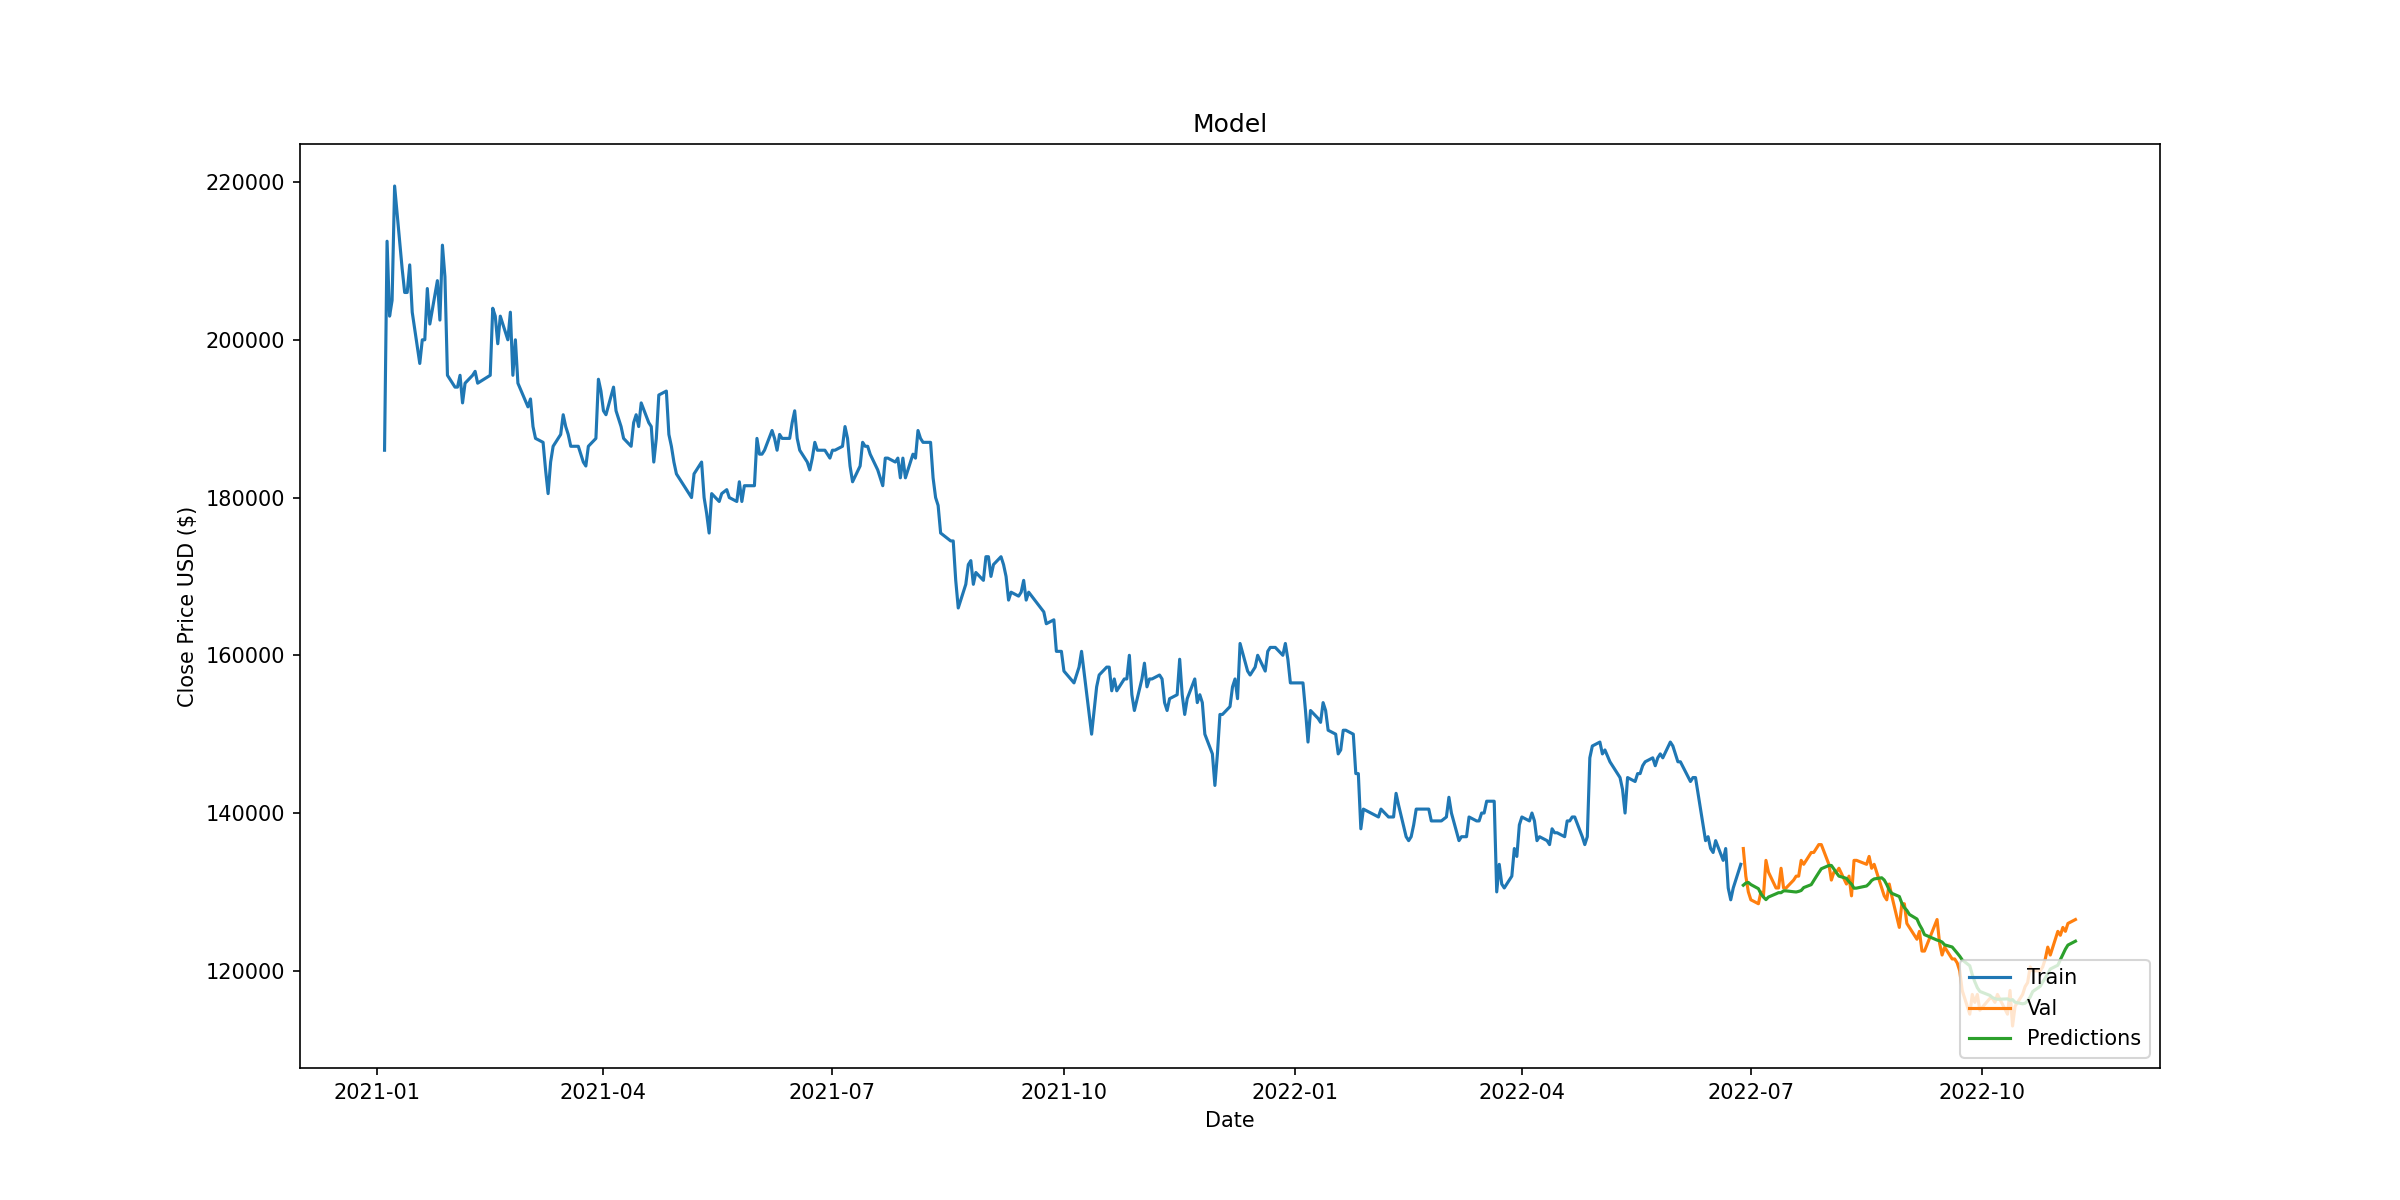

In [195]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

https://medium.com/the-handbook-of-coding-in-finance/stock-prices-prediction-using-long-short-term-memory-lstm-model-in-python-734dd1ed6827

# 11. 포트폴리오

## 11.1 라이브러리

포트폴리오 최적화는 위험 대비 수익을 극대화하는 자산의 구성을 위해 사용하는데, 라이브러리는 다음과 같다. 

- PyPortfolioOpt는 마코위츠의 현대 포트폴리오 이론(MPT)을 기반으로 다양한 최적화 기법을 제공한다. 
- Riskfolio-Lib는 다양한 목적 함수(예: 샤프 비율 최대화, 최저 리스크)를 사용한 더 자세한 최적화가 가능하다.
- CVXPY는 선형 프로그래밍, 이차 프로그래밍, 그리고 일반적인 제약 조건을 가진 포트폴리오 최적화 문제를 풀 수 있다.


## 11.2 PyPortfolioOpt

PyPortfolioOpt 포트폴리오 관리 및 최적화를 위해 강력하고 유연한 도구를 제공하며, 특히 금융 시장에서 자산 배분 전략을 설계하거나 리스크 관리 전략을 구축하는 데 매우 유용하다. 다양한 시나리오에 적용할 수 있는 폭넓은 기능 세트를 가지고 있어, 금융 전문가들뿐만 아니라 학술 연구와 교육 목적으로도 많이 사용된다.

!pip install PyPortfolioOpt # PyPortfolioOpt-1.5.5 cvxpy-1.5.3 등 설치한다.

In [3]:
import pandas as pd
import yfinance as yf
from pypfopt import EfficientFrontier, risk_models, expected_returns

tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
price_data = yf.download(tickers, start="2023-01-01", end="2024-01-01")["Adj Close"]

mu = expected_returns.mean_historical_return(price_data)  # 기대 수익률 계산
S = risk_models.sample_cov(price_data)  # 리스크 계산

ef = EfficientFrontier(mu, S)  # 효율적 프론티어 생성
weights = ef.max_sharpe(risk_free_rate=0.0)  # 무위험 수익률을 낮게 설정
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

ef.portfolio_performance(verbose=True, risk_free_rate=0.0)  # 포트폴리오 성과 분석

[*********************100%%**********************]  5 of 5 completed

OrderedDict([('AAPL', 0.48936), ('AMZN', 0.17295), ('GOOGL', 0.0), ('MSFT', 0.16848), ('TSLA', 0.1692)])
Expected annual return: 73.1%
Annual volatility: 22.1%
Sharpe Ratio: 3.31


(0.7309631888122637, 0.22065531838328836, 3.312692366392671)

- (1) 코드설명 import한 pypfopt 모듈:
    - EfficientFrontier: 효율적 프론티어를 계산
    - risk_models: 리스크(공분산 행렬)를 계산
    - expected_returns: 자산의 기대 수익률을 계산
- (2) 코드 설명 mu: 자산의 역사적 평균 수익률을 계산
- (3) 코드 설명 S: 자산 간의 공분산 행렬을 계산, 자산 간의 리스크 관계를 의미한다.
- (4) 코드 설명 ef: EfficientFrontier 객체를 생성하고, 평균 수익률(mu)과 공분산 행렬(S)을 인자로 전달
- (5) 코드 설명 weights: 샤프 비율을 최대화하는 포트폴리오의 자산 비중을 계산한다. risk_free_rate=0.0은 무위험 수익률을 0%로 설정하여, 샤프 비율을 계산할 때 기준을 낮춘다.
- (6) 코드 설명 cleaned_weights: 계산된 자산 비중을 소수점 이하의 작은 값을 제거하여 깔끔하게 정리
- (7) 코드 설명 ef.portfolio_performance(): 최적화된 포트폴리오의 성과를 계산하고 출력
    - verbose=True: 자세히 출력
    - risk_free_rate=0.0: 무위험 수익률을 0%로 설정
- 출력 설명
    - cleaned_weights: 각 자산에 투자할 비중을 출력 AAPL: 0.489 AMZN: 0.173... 등
    - portfolio_performance: 포트폴리오의 성과 지표 출력
        - 샤프 비율: 3.31, 예상 연간 수익률: 73.1%, 예상 연간 변동성: 22.1%

## 11.3 riskfolio-lib

- numpy도 1.26.4 <- numpy 1.23.0 (riskfolio-lib은 numpy>=1.24.0 요구)
- matplotlib 최신 버전을 설치하고 있다 (BackTrader에서는 3.2.2가 적절하지만 3.9.2를 설치)
- riskfolio-lib-6.2.3를 설치하면서 다른 많은 patsy-0.5.6 statsmodels-0.14.2 등을 설치한다.

!pip install riskfolio-lib # riskfolio-lib-6.2.3

In [342]:
import riskfolio as rp

returns = rp.utils.get_yahoo_returns(['AAPL', 'MSFT', 'GOOGL']) # 샘플 데이터

port = rp.Portfolio(returns=returns) # 포트폴리오 객체 생성

model = 'Classic'  # 포트폴리오 최적화 모델 선택
rm = 'MV'          # 리스크 모델 선택: Mean-Variance
port.assets_stats(method_mu='hist', method_cov='hist')
port.ef_frontier(model=model, rm=rm, points=50)
port.plot_ef(legend=True, rm=rm, cmap='viridis')

#AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

AttributeError: module 'riskfolio' has no attribute 'utils'

# 12. 자동매매

Python언어를 사용해 웹 매매 프로그램을 만들 수 있다 (https://www.educative.io/blog/web-development-in-python)


자동 거래를 위해서는 증권사 API를 사용해야 한다. 한국 증권사들은 대개 API를 제공하며, 거래 및 포트폴리오 관리를 위한 기능을 포함하다. 예를 들어, 삼성증권, NH투자증권, 키움증권 등에서 제공하는 API를 사용할 수 있다.

키움증권의 API를 사용하여 삼성전자(005930)의 주식을 10주 주문하는 예제

In [ ]:
import win32com.client

kiwoom = win32com.client.Dispatch("KHOPENAPI.KHOpenAPICtrl.1") # 키움증권 API 객체 생성

kiwoom.CommConnect() # 로그인

order = kiwoom.SendOrder("Order", "0101", "12345678", 1, "005930", 10, 0, "03", "") # 주식 주문

삼성증권 API를 이용한 자동 매매 프로그램을 작성하는 과정

- 삼성증권 Open API 설치 및 설정, win32com 라이브러리를 사용하여 접근
- API를 사용하여 로그인 및 인증
- 주식 데이터 조회
- 매매 주문 실행
- 에러 처리 및 로그 기록

In [ ]:
import win32com.client
import time

kiwoom = win32com.client.Dispatch("KHOPENAPI.KHOpenAPICtrl.1") # 삼성증권 API 객체 생성

def login():
    result = kiwoom.CommConnect()
    if result == 0:
        print("로그인 성공")
        while kiwoom.GetConnectState() == 0:
            print("로그인 중...")
            time.sleep(1)
        print("로그인 성공")
    else:
        print("로그인 실패")

def get_stock_data(code):
    kiwoom.SetInputValue("종목코드", code)
    kiwoom.CommRqData("opt10001", "opt10001", 0, "0101")
    time.sleep(1)
    data = kiwoom.GetCommData("opt10001", "opt10001", 0, "현재가")
    return data

def place_order(order_type, code, quantity, price):
    kiwoom.SendOrder("주문", "0101", "계좌번호", order_type, code, quantity, price, "03", "")
    print(f"주문: {order_type} {code} {quantity}주 @ {price}원")

def handle_errors():
    err_code = kiwoom.GetLastError()
    if err_code != 0:
        print(f"오류 발생: {err_code}")

def log(message):
    with open("trading_log.txt", "a") as log_file:
        log_file.write(message + "\n")

login()

code = "005930" # 삼성전자
price = get_stock_data(code)
print(f"{code} 현재가: {price}")

try:
    place_order("1", code, 10, 60000)
except Exception as e:
    handle_errors()
    log(f"주문 실패: {e}")


## 연습문제

1. SK 하이닉스의 PER, EPS, PBR 기본지표를 계산하시오.
(1) Pandas로 계산하는 코드를 작성하고 출력한다. 계산에 필요한 정보는 yfinance에서 가져온다.
(2) pykrx API에서 가져와 출력한다.
(2) 두 계산 결과를 서로 비교하고, 차이가 왜 나는지 간략히 설명하시오.

In [93]:
import yfinance as yf
tickerSkh = yf.Ticker("000660.KS") # SK하이닉스 티커 (KRX).

currentPriceSse = tickerSkh.history(period="1d")['Close'].iloc[-1] # 직전일 주가
financialsSse = tickerSkh.financials.transpose()  # 데이터가 열 기준으로 되어있으니 행을 기준으로 바꿔준다
sharesOutstanding = tickerSkh.info['sharesOutstanding'] # 발행주식수 tickerSse.info에서 가져온다.
netIncome = financialsSse['Net Income'].iloc[0] # financialsSse['Net Income'].iloc[0:4].sum() 4년치 합계

# yfinance에서 순자산은 'totalAssets'에서 'totalLiab'를 빼서 계산.
totalAssets = tickerSkh.balance_sheet.loc['Total Assets'].iloc[0]
totalLiabilities = tickerSkh.balance_sheet.loc['Total Liabilities Net Minority Interest'].iloc[0]
netAsset = totalAssets - totalLiabilities

eps = netIncome / sharesOutstanding
per = currentPriceSse / eps
bvps = netAsset / sharesOutstanding
pbr = currentPriceSse / bvps

print(f"현재 주가: {currentPriceSse:.2f}원")
print(f"EPS: {eps:.2f}원")
print(f"Basic EPS: {financialsSse['Basic EPS'].iloc[0]:.2f}원")
print(f"PER: {per:.2f}")
print(f"PBR: {pbr:.2f}")

현재 주가: 186000.00원
EPS: -7023.01원
Basic EPS: -13244.00원
PER: -26.48
PBR: 2.35


In [116]:
from pykrx import stock
skhFundamentals2024 = stock.get_market_fundamental_by_date(fromdate="20240401", todate="20241012", ticker="000660")

In [117]:
skhFundamentals2024

BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2024-04-01  92004  57.22  2.02  3242  0.65  1200
2024-04-02  92004  57.46  2.02  3242  0.64  1200
2024-04-03  92004  55.27  1.95  3242  0.67  1200
2024-04-04  92004  57.99  2.04  3242  0.64  1200
2024-04-05  92004  56.38  1.99  3242  0.66  1200
...           ...    ...   ...   ...   ...   ...
2024-10-04  77752   0.00  2.24     0  0.69  1200
2024-10-07  77752   0.00  2.38     0  0.65  1200
2024-10-08  77752   0.00  2.29     0  0.67  1200
2024-10-10  77752   0.00  2.40     0  0.64  1200
2024-10-11  77752   0.00  2.39     0  0.65  1200

[128 rows x 6 columns]